In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222666, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222665, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466         1.32465    17   
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473         1.32469    17   
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476         1.32480    17   
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481         1.32466    17   
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482         1.32512    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00000   1.324640  0.00004    1.324635  
2020-01-01 17:05:00    2     1   0.00000   1.324675  0.00011    1.324663  
2020-01-01 17:10:00    2     1  -0.00005   1.324675  0.00017    1.324670  
2020-01-01 17:15:00    2     1  -0.00011   1.324700  0.00022    1.324723  
2020-01-01 17:20:00    2     1   0.00016   1.324695  0.00025    1.324717

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.32463  1.32463  1.32462  1.32466         1.32465    17   
2020-01-01 17:05:00  1.32465  1.32465  1.32462  1.32473         1.32469    17   
2020-01-01 17:10:00  1.32464  1.32469  1.32459  1.32476         1.32480    17   
2020-01-01 17:15:00  1.32469  1.32480  1.32459  1.32481         1.32466    17   
2020-01-01 17:20:00  1.32482  1.32466  1.32457  1.32482         1.32512    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00000   1.324640  0.00004    1.324635   
2020-01-01 17:05:00    2     1   0.00000   1.324675  0.00011    1.324663   
2020-01-01 17:10:00    2     1  -0.00005   1.324675  0.00017    1.324670   
2020-01-01 17:15:00    2     1  -0.00011   1.324700  0.00022    1.324723   
2020-01-01 17:20:00    2     1   0.00016   1.324695  0.00025    1.324717   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.512911  
2020-01-01 17:05:00 -25.512686  
2020-01-01 17:10:00 -25.512686  
2020-01-01 17:15:00 -25.512678  
2020-01-01 17:20:00 -25.512688

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32462  1.32466         1.32465    17    2   
2020-01-01 17:05:00  1.32465  1.32462  1.32473         1.32469    17    2   
2020-01-01 17:10:00  1.32464  1.32459  1.32476         1.32480    17    2   
2020-01-01 17:15:00  1.32469  1.32459  1.32481         1.32466    17    2   
2020-01-01 17:20:00  1.32482  1.32457  1.32482         1.32512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000   1.324640  0.00004    1.324635 -25.512911  
2020-01-01 17:05:00     1   0.00000   1.324675  0.00011    1.324663 -25.512686  
2020-01-01 17:10:00     1  -0.00005   1.324675  0.00017    1.324670 -25.512686  
2020-01-01 17:15:00     1  -0.00011   1.324700  0.00022

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133599
133599
44533
44533
44533
44533


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133599, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133574, 24, 12)
(44508, 24, 12)
(44508, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133574, 1)
(44508, 1)
(44508, 1)


array([[0.6475849 ],
       [0.6488571 ],
       [0.64790297],
       ...,
       [0.8175907 ],
       [0.8210187 ],
       [0.8217602 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6475849 , 0.6488571 , 0.64790297, ..., 0.8175907 , 0.8210187 ,
       0.8217602 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 257.5207 - mae: 2.3310 - mse: 257.5207 - root_mean_squared_error: 16.0475 - mape: 1285.9208
Epoch 1: val_mse improved from inf to 0.29112, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 50s 110ms/step - loss: 256.8197 - mae: 2.3260 - mse: 256.8197 - root_mean_squared_error: 16.0256 - mape: 1282.6112 - val_loss: 0.2911 - val_mae: 0.4983 - val_mse: 0.2911 - val_root_mean_squared_error: 0.5396 - val_mape: 4019.1409
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.1611 - mae: 0.3446 - mse: 0.1611 - root_mean_squared_error: 0.4013 - mape: 2191.8030
Epoch 2: val_mse improved from 0.29112 to 0.06270, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.1611 - mae: 0.3446 - mse: 0.1611 - root_mean_squared_error: 0.4013 - mape: 2191.8030 - val_loss: 0.0627 - val_mae: 0.2076 - val_mse: 0.0627 - val_root_mean_squared_error: 0.2504 - val_mape: 13251.6104
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0475 - mae: 0.1874 - mse: 0.0475 - root_mean_squared_error: 0.2179 - mape: 5122.2300
Epoch 3: val_mse improved from 0.06270 to 0.05447, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0475 - mae: 0.1874 - mse: 0.0475 - root_mean_squared_error: 0.2179 - mape: 5122.2300 - val_loss: 0.0545 - val_mae: 0.1818 - val_mse: 0.0545 - val_root_mean_squared_error: 0.2334 - val_mape: 14737.4678
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0458 - mae: 0.1841 - mse: 0.0458 - root_mean_squared_error: 0.2140 - mape: 5004.5444
Epoch 4: val_mse improved from 0.05447 to 0.05268, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0458 - mae: 0.1841 - mse: 0.0458 - root_mean_squared_error: 0.2140 - mape: 5004.5444 - val_loss: 0.0527 - val_mae: 0.1784 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 14526.9355
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0445 - mae: 0.1814 - mse: 0.0445 - root_mean_squared_error: 0.2109 - mape: 4879.8120
Epoch 5: val_mse improved from 0.05268 to 0.05032, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0445 - mae: 0.1814 - mse: 0.0445 - root_mean_squared_error: 0.2109 - mape: 4879.8120 - val_loss: 0.0503 - val_mae: 0.1741 - val_mse: 0.0503 - val_root_mean_squared_error: 0.2243 - val_mape: 14222.6465
Epoch 6/60
347/347 [==============================] - ETA: 0s - loss: 0.0420 - mae: 0.1764 - mse: 0.0420 - root_mean_squared_error: 0.2051 - mape: 4696.3706
Epoch 6: val_mse improved from 0.05032 to 0.04615, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0420 - mae: 0.1764 - mse: 0.0420 - root_mean_squared_error: 0.2051 - mape: 4696.3706 - val_loss: 0.0461 - val_mae: 0.1667 - val_mse: 0.0461 - val_root_mean_squared_error: 0.2148 - val_mape: 13633.0508
Epoch 7/60
347/347 [==============================] - ETA: 0s - loss: 0.0355 - mae: 0.1612 - mse: 0.0355 - root_mean_squared_error: 0.1884 - mape: 4469.7744
Epoch 7: val_mse improved from 0.04615 to 0.03079, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0355 - mae: 0.1612 - mse: 0.0355 - root_mean_squared_error: 0.1884 - mape: 4469.7744 - val_loss: 0.0308 - val_mae: 0.1345 - val_mse: 0.0308 - val_root_mean_squared_error: 0.1755 - val_mape: 11843.1348
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 0.0129 - mae: 0.0886 - mse: 0.0129 - root_mean_squared_error: 0.1136 - mape: 3186.1353
Epoch 8: val_mse improved from 0.03079 to 0.00997, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0129 - mae: 0.0886 - mse: 0.0129 - root_mean_squared_error: 0.1136 - mape: 3186.1353 - val_loss: 0.0100 - val_mae: 0.0670 - val_mse: 0.0100 - val_root_mean_squared_error: 0.0999 - val_mape: 8568.2666
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0579 - mse: 0.0057 - root_mean_squared_error: 0.0755 - mape: 2843.4028
Epoch 9: val_mse improved from 0.00997 to 0.00704, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0057 - mae: 0.0579 - mse: 0.0057 - root_mean_squared_error: 0.0755 - mape: 2843.4028 - val_loss: 0.0070 - val_mae: 0.0545 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0839 - val_mape: 7688.0332
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0510 - mse: 0.0046 - root_mean_squared_error: 0.0676 - mape: 2701.7678
Epoch 10: val_mse improved from 0.00704 to 0.00547, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0046 - mae: 0.0510 - mse: 0.0046 - root_mean_squared_error: 0.0676 - mape: 2694.4910 - val_loss: 0.0055 - val_mae: 0.0448 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0740 - val_mape: 7214.3818
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0462 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 2734.2734
Epoch 11: val_mse improved from 0.00547 to 0.00463, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0038 - mae: 0.0462 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 2734.2734 - val_loss: 0.0046 - val_mae: 0.0392 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 6868.4258
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0434 - mse: 0.0034 - root_mean_squared_error: 0.0583 - mape: 2188.9753
Epoch 12: val_mse improved from 0.00463 to 0.00406, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 108ms/step - loss: 0.0034 - mae: 0.0434 - mse: 0.0034 - root_mean_squared_error: 0.0583 - mape: 2188.9753 - val_loss: 0.0041 - val_mae: 0.0362 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0637 - val_mape: 6585.0239
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0411 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 2648.9927
Epoch 13: val_mse improved from 0.00406 to 0.00354, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0031 - mae: 0.0411 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 2648.9927 - val_loss: 0.0035 - val_mae: 0.0322 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 6335.5952
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0393 - mse: 0.0028 - root_mean_squared_error: 0.0529 - mape: 2285.6011
Epoch 14: val_mse improved from 0.00354 to 0.00329, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0028 - mae: 0.0393 - mse: 0.0028 - root_mean_squared_error: 0.0529 - mape: 2285.6011 - val_loss: 0.0033 - val_mae: 0.0325 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 6106.8379
Epoch 15/60
347/347 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0376 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1781.5447
Epoch 15: val_mse improved from 0.00329 to 0.00290, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0025 - mae: 0.0376 - mse: 0.0025 - root_mean_squared_error: 0.0505 - mape: 1781.5447 - val_loss: 0.0029 - val_mae: 0.0287 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0539 - val_mape: 5916.8428
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0361 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 2123.8523
Epoch 16: val_mse improved from 0.00290 to 0.00273, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0023 - mae: 0.0361 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 2123.8523 - val_loss: 0.0027 - val_mae: 0.0295 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 5730.5244
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0341 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1812.3075
Epoch 17: val_mse improved from 0.00273 to 0.00242, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0021 - mae: 0.0341 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1812.3075 - val_loss: 0.0024 - val_mae: 0.0265 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0491 - val_mape: 5535.4243
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2050.3081
Epoch 18: val_mse improved from 0.00242 to 0.00219, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 0.0019 - mae: 0.0327 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 2050.3081 - val_loss: 0.0022 - val_mae: 0.0267 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mape: 5359.8589
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0312 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1664.2761
Epoch 19: val_mse did not improve from 0.00219
347/347 [==============================] - 12s 34ms/step - loss: 0.0017 - mae: 0.0312 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1664.2761 - val_loss: 0.0022 - val_mae: 0.0325 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0472 - val_mape: 5101.6631
Epoch 20/60
347/347 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0303 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 1632.6565
Epoch 20: val_mse improved from 0.00219 to 0.00181, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 37s 106ms/step - loss: 0.0016 - mae: 0.0303 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 1632.6565 - val_loss: 0.0018 - val_mae: 0.0238 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 4984.2583
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0288 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1809.4552
Epoch 21: val_mse improved from 0.00181 to 0.00153, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 36s 105ms/step - loss: 0.0015 - mae: 0.0288 - mse: 0.0015 - root_mean_squared_error: 0.0382 - mape: 1809.4552 - val_loss: 0.0015 - val_mae: 0.0211 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 4812.9785
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1700.3412
Epoch 22: val_mse improved from 0.00153 to 0.00146, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 107ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1700.3412 - val_loss: 0.0015 - val_mae: 0.0215 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 4668.1685
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1710.4977
Epoch 23: val_mse did not improve from 0.00146
347/347 [==============================] - 12s 34ms/step - loss: 0.0012 - mae: 0.0264 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 1710.4977 - val_loss: 0.0016 - val_mae: 0.0292 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 4435.9849
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1493.2156
Epoch 24: val_mse improved from 0.00146 to 0.00127, saving model to /content/drive/MyDrive/modelweight

347/347 [==============================] - 36s 105ms/step - loss: 0.0010 - mae: 0.0244 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1493.2156 - val_loss: 0.0013 - val_mae: 0.0230 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 4233.8301
Epoch 25/60
347/347 [==============================] - ETA: 0s - loss: 9.5457e-04 - mae: 0.0234 - mse: 9.5457e-04 - root_mean_squared_error: 0.0309 - mape: 1315.3934
Epoch 25: val_mse improved from 0.00127 to 0.00093, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 9.5457e-04 - mae: 0.0234 - mse: 9.5457e-04 - root_mean_squared_error: 0.0309 - mape: 1315.3934 - val_loss: 9.3022e-04 - val_mae: 0.0159 - val_mse: 9.3022e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 4086.4106
Epoch 26/60
347/347 [==============================] - ETA: 0s - loss: 8.6469e-04 - mae: 0.0224 - mse: 8.6469e-04 - root_mean_squared_error: 0.0294 - mape: 1559.7976
Epoch 26: val_mse did not improve from 0.00093
347/347 [==============================] - 12s 34ms/step - loss: 8.6469e-04 - mae: 0.0224 - mse: 8.6469e-04 - root_mean_squared_error: 0.0294 - mape: 1559.7976 - val_loss: 0.0011 - val_mae: 0.0242 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 3841.3279
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 7.5831e-04 - mae: 0.0210 - mse: 7.5831e-04 - root_mean_squared_error: 0.0275 - mape: 1255.5393
Epoch 27: val_mse did not improve from 0.00093
347/347 [======

347/347 [==============================] - 36s 105ms/step - loss: 5.6398e-04 - mae: 0.0182 - mse: 5.6398e-04 - root_mean_squared_error: 0.0237 - mape: 1056.9064 - val_loss: 6.8793e-04 - val_mae: 0.0178 - val_mse: 6.8793e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 3322.5430
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 5.2171e-04 - mae: 0.0176 - mse: 5.2171e-04 - root_mean_squared_error: 0.0228 - mape: 1021.7578
Epoch 30: val_mse did not improve from 0.00069
347/347 [==============================] - 12s 33ms/step - loss: 5.2171e-04 - mae: 0.0176 - mse: 5.2171e-04 - root_mean_squared_error: 0.0228 - mape: 1021.7578 - val_loss: 8.2125e-04 - val_mae: 0.0227 - val_mse: 8.2125e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 3131.3882
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 4.6170e-04 - mae: 0.0166 - mse: 4.6170e-04 - root_mean_squared_error: 0.0215 - mape: 1134.8074
Epoch 31: val_mse improved from 0.00069 to 0.00053, sa

347/347 [==============================] - 38s 110ms/step - loss: 4.6170e-04 - mae: 0.0166 - mse: 4.6170e-04 - root_mean_squared_error: 0.0215 - mape: 1134.8074 - val_loss: 5.2556e-04 - val_mae: 0.0165 - val_mse: 5.2556e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 2965.6572
Epoch 32/60
347/347 [==============================] - ETA: 0s - loss: 4.0924e-04 - mae: 0.0156 - mse: 4.0924e-04 - root_mean_squared_error: 0.0202 - mape: 1014.9366
Epoch 32: val_mse improved from 0.00053 to 0.00033, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 105ms/step - loss: 4.0924e-04 - mae: 0.0156 - mse: 4.0924e-04 - root_mean_squared_error: 0.0202 - mape: 1014.9366 - val_loss: 3.2964e-04 - val_mae: 0.0102 - val_mse: 3.2964e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2818.1714
Epoch 33/60
347/347 [==============================] - ETA: 0s - loss: 3.7347e-04 - mae: 0.0150 - mse: 3.7347e-04 - root_mean_squared_error: 0.0193 - mape: 926.6976
Epoch 33: val_mse did not improve from 0.00033
347/347 [==============================] - 12s 34ms/step - loss: 3.7347e-04 - mae: 0.0150 - mse: 3.7347e-04 - root_mean_squared_error: 0.0193 - mape: 926.6976 - val_loss: 4.5529e-04 - val_mae: 0.0152 - val_mse: 4.5529e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 2664.8857
Epoch 34/60
347/347 [==============================] - ETA: 0s - loss: 3.2698e-04 - mae: 0.0140 - mse: 3.2698e-04 - root_mean_squared_error: 0.0181 - mape: 793.6586
Epoch 34: val_mse did not improve from 0.00033
347/347 [=

347/347 [==============================] - 36s 105ms/step - loss: 2.9724e-04 - mae: 0.0134 - mse: 2.9724e-04 - root_mean_squared_error: 0.0172 - mape: 801.7205 - val_loss: 2.5734e-04 - val_mae: 0.0099 - val_mse: 2.5734e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 2410.2437
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 3.0031e-04 - mae: 0.0135 - mse: 3.0031e-04 - root_mean_squared_error: 0.0173 - mape: 791.1074
Epoch 36: val_mse did not improve from 0.00026
347/347 [==============================] - 12s 34ms/step - loss: 3.0031e-04 - mae: 0.0135 - mse: 3.0031e-04 - root_mean_squared_error: 0.0173 - mape: 791.1074 - val_loss: 6.7357e-04 - val_mae: 0.0228 - val_mse: 6.7357e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2302.6187
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 2.6616e-04 - mae: 0.0127 - mse: 2.6616e-04 - root_mean_squared_error: 0.0163 - mape: 801.4172
Epoch 37: val_mse improved from 0.00026 to 0.00020, saving

347/347 [==============================] - 36s 105ms/step - loss: 2.6616e-04 - mae: 0.0127 - mse: 2.6616e-04 - root_mean_squared_error: 0.0163 - mape: 801.4172 - val_loss: 1.9731e-04 - val_mae: 0.0084 - val_mse: 1.9731e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 2193.0244
Epoch 38/60
347/347 [==============================] - ETA: 0s - loss: 2.3482e-04 - mae: 0.0120 - mse: 2.3482e-04 - root_mean_squared_error: 0.0153 - mape: 734.2070
Epoch 38: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 38s 109ms/step - loss: 2.3482e-04 - mae: 0.0120 - mse: 2.3482e-04 - root_mean_squared_error: 0.0153 - mape: 734.2070 - val_loss: 1.7437e-04 - val_mae: 0.0086 - val_mse: 1.7437e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 2120.3574
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 2.4983e-04 - mae: 0.0126 - mse: 2.4983e-04 - root_mean_squared_error: 0.0158 - mape: 665.2335
Epoch 39: val_mse did not improve from 0.00017
347/347 [==============================] - 12s 34ms/step - loss: 2.4983e-04 - mae: 0.0126 - mse: 2.4983e-04 - root_mean_squared_error: 0.0158 - mape: 665.2335 - val_loss: 2.5979e-04 - val_mae: 0.0121 - val_mse: 2.5979e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 2028.3671
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 2.1721e-04 - mae: 0.0117 - mse: 2.1721e-04 - root_mean_squared_error: 0.0147 - mape: 764.0997
Epoch 40: val_mse did not improve from 0.00017
347/347 [==

347/347 [==============================] - 37s 107ms/step - loss: 2.1868e-04 - mae: 0.0117 - mse: 2.1868e-04 - root_mean_squared_error: 0.0148 - mape: 731.2390 - val_loss: 1.6624e-04 - val_mae: 0.0089 - val_mse: 1.6624e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1879.2638
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 2.1842e-04 - mae: 0.0116 - mse: 2.1842e-04 - root_mean_squared_error: 0.0148 - mape: 654.1695
Epoch 42: val_mse improved from 0.00017 to 0.00012, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)


347/347 [==============================] - 37s 106ms/step - loss: 2.1842e-04 - mae: 0.0116 - mse: 2.1842e-04 - root_mean_squared_error: 0.0148 - mape: 654.1695 - val_loss: 1.1712e-04 - val_mae: 0.0070 - val_mse: 1.1712e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1816.7708
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 1.7665e-04 - mae: 0.0105 - mse: 1.7665e-04 - root_mean_squared_error: 0.0133 - mape: 699.2431
Epoch 43: val_mse did not improve from 0.00012
347/347 [==============================] - 12s 34ms/step - loss: 1.7665e-04 - mae: 0.0105 - mse: 1.7665e-04 - root_mean_squared_error: 0.0133 - mape: 699.2431 - val_loss: 1.7913e-04 - val_mae: 0.0101 - val_mse: 1.7913e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 1776.3855
Epoch 44/60
347/347 [==============================] - ETA: 0s - loss: 2.0265e-04 - mae: 0.0108 - mse: 2.0265e-04 - root_mean_squared_error: 0.0142 - mape: 627.0318
Epoch 44: val_mse did not improve from 0.00012
347/347 [==

347/347 [==============================] - 37s 108ms/step - loss: 1.8658e-04 - mae: 0.0109 - mse: 1.8658e-04 - root_mean_squared_error: 0.0137 - mape: 579.2803 - val_loss: 1.0387e-04 - val_mae: 0.0067 - val_mse: 1.0387e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1595.1095
Epoch 47/60
347/347 [==============================] - ETA: 0s - loss: 1.6986e-04 - mae: 0.0103 - mse: 1.6986e-04 - root_mean_squared_error: 0.0130 - mape: 516.2521
Epoch 47: val_mse did not improve from 0.00010
347/347 [==============================] - 12s 34ms/step - loss: 1.6986e-04 - mae: 0.0103 - mse: 1.6986e-04 - root_mean_squared_error: 0.0130 - mape: 516.2521 - val_loss: 2.5063e-04 - val_mae: 0.0135 - val_mse: 2.5063e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 1510.7583
Epoch 48/60
347/347 [==============================] - ETA: 0s - loss: 1.6758e-04 - mae: 0.0100 - mse: 1.6758e-04 - root_mean_squared_error: 0.0129 - mape: 595.3063
Epoch 48: val_mse improved from 0.00010 to 0.00008, saving

347/347 [==============================] - 37s 105ms/step - loss: 1.6758e-04 - mae: 0.0100 - mse: 1.6758e-04 - root_mean_squared_error: 0.0129 - mape: 595.3063 - val_loss: 8.3349e-05 - val_mae: 0.0060 - val_mse: 8.3349e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 1438.9821
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 1.6049e-04 - mae: 0.0100 - mse: 1.6049e-04 - root_mean_squared_error: 0.0127 - mape: 458.0072
Epoch 49: val_mse did not improve from 0.00008
347/347 [==============================] - 12s 34ms/step - loss: 1.6049e-04 - mae: 0.0100 - mse: 1.6049e-04 - root_mean_squared_error: 0.0127 - mape: 458.0072 - val_loss: 9.0042e-05 - val_mae: 0.0068 - val_mse: 9.0042e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 1311.8040
Epoch 50/60
347/347 [==============================] - ETA: 0s - loss: 1.4466e-04 - mae: 0.0093 - mse: 1.4466e-04 - root_mean_squared_error: 0.0120 - mape: 456.7726
Epoch 50: val_mse did not improve from 0.00008
347/347 [==

347/347 [==============================] - 37s 106ms/step - loss: 1.5522e-04 - mae: 0.0095 - mse: 1.5522e-04 - root_mean_squared_error: 0.0125 - mape: 429.4521 - val_loss: 6.8765e-05 - val_mae: 0.0054 - val_mse: 6.8765e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 1315.5702
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.4535e-04 - mae: 0.0091 - mse: 1.4535e-04 - root_mean_squared_error: 0.0121 - mape: 425.9680
Epoch 54: val_mse did not improve from 0.00007
347/347 [==============================] - 12s 34ms/step - loss: 1.4535e-04 - mae: 0.0091 - mse: 1.4535e-04 - root_mean_squared_error: 0.0121 - mape: 425.9680 - val_loss: 1.3746e-04 - val_mae: 0.0102 - val_mse: 1.3746e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 1247.6871
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 1.6283e-04 - mae: 0.0096 - mse: 1.6283e-04 - root_mean_squared_error: 0.0128 - mape: 413.1565
Epoch 55: val_mse did not improve from 0.00007
347/347 [==

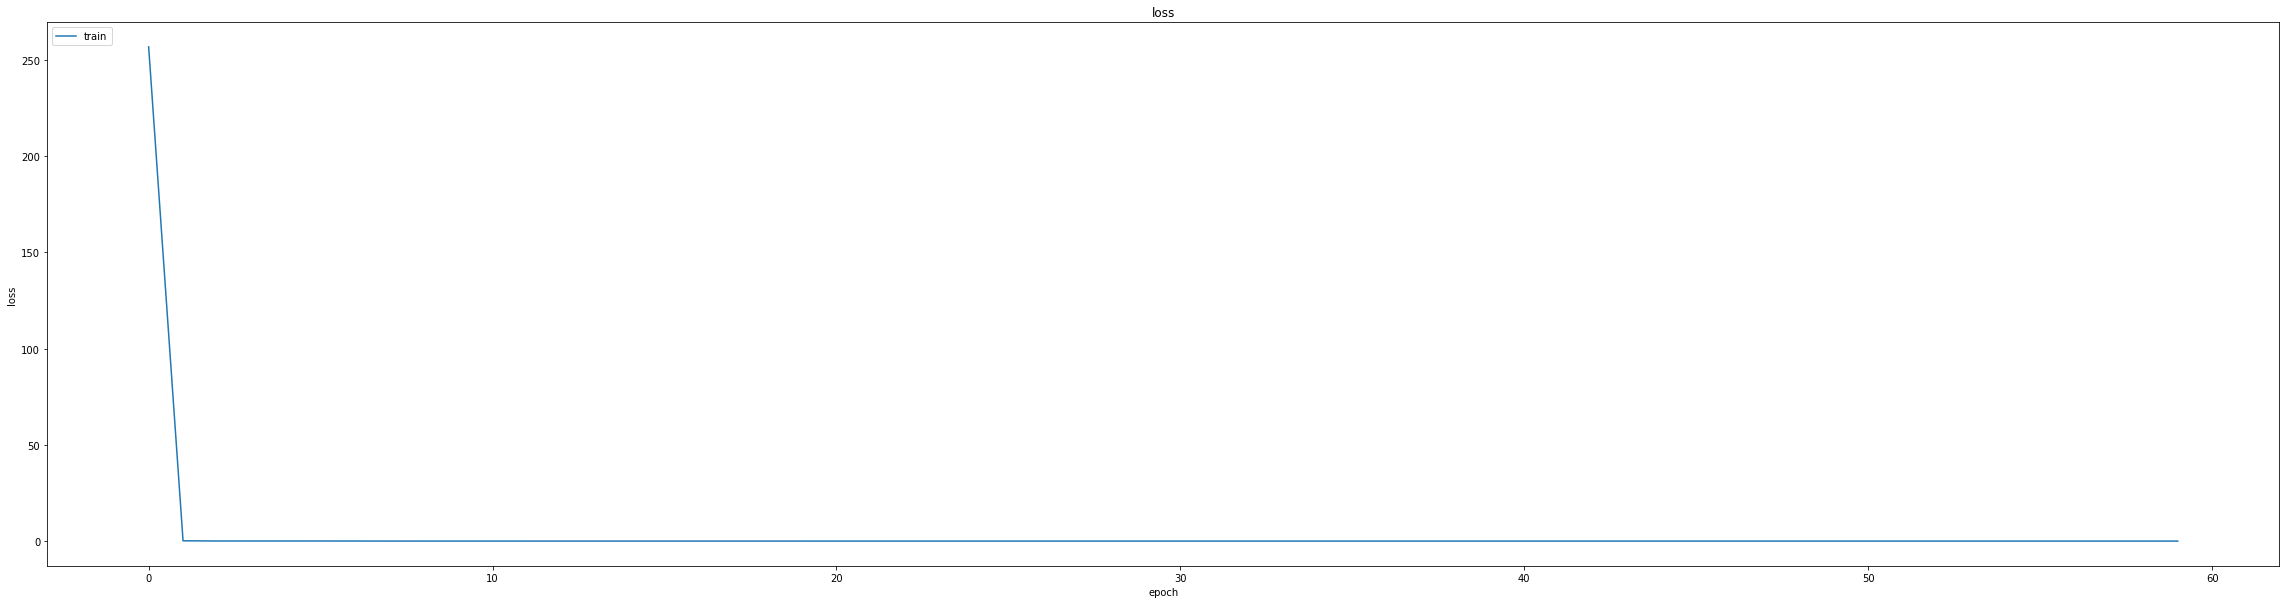

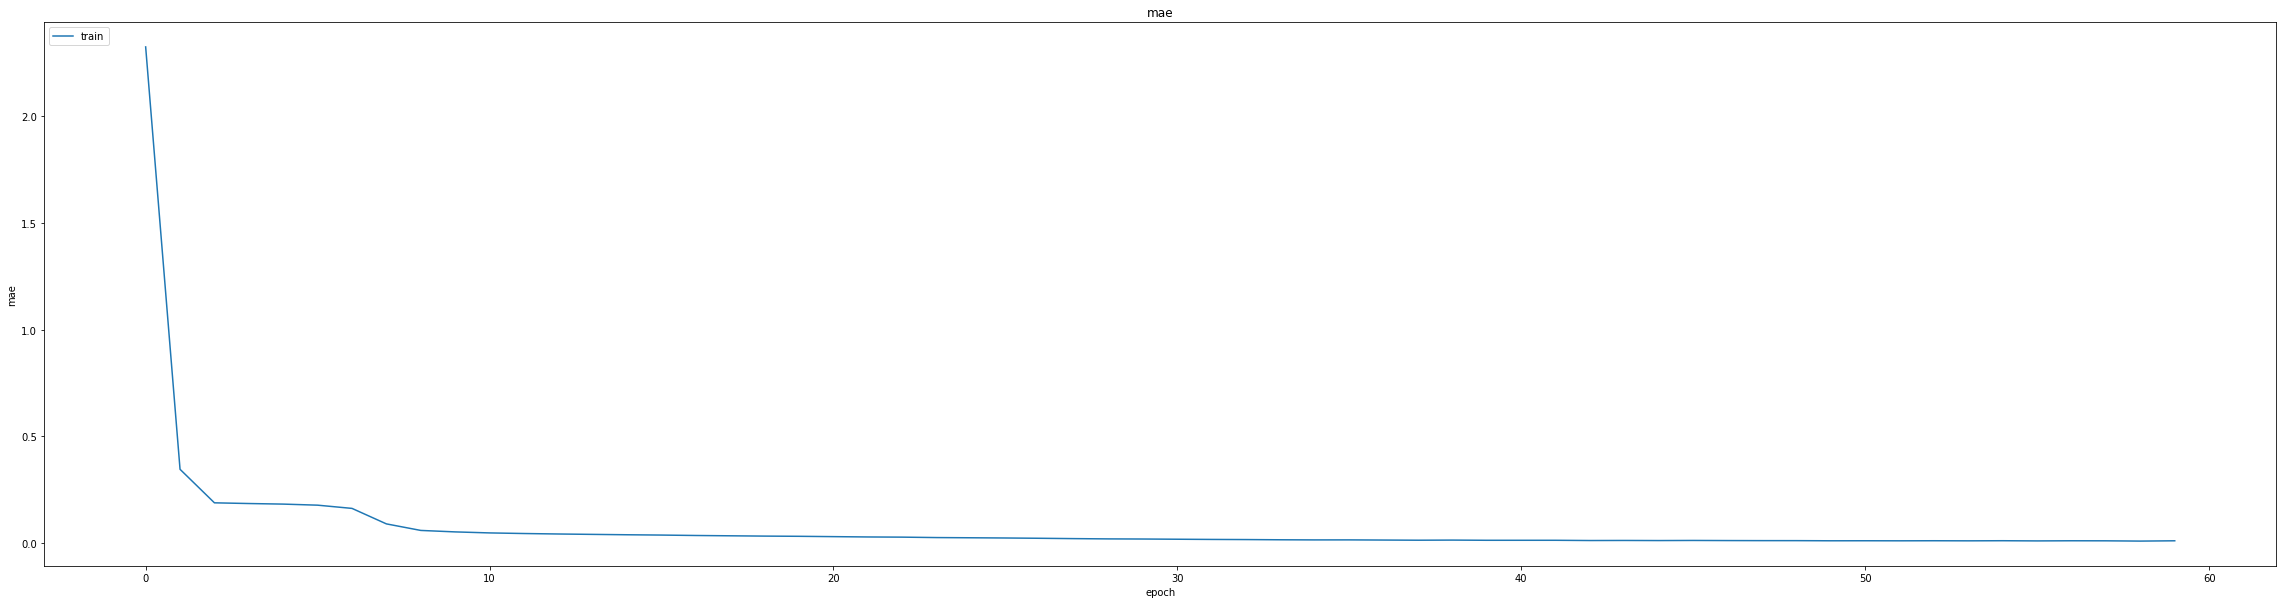

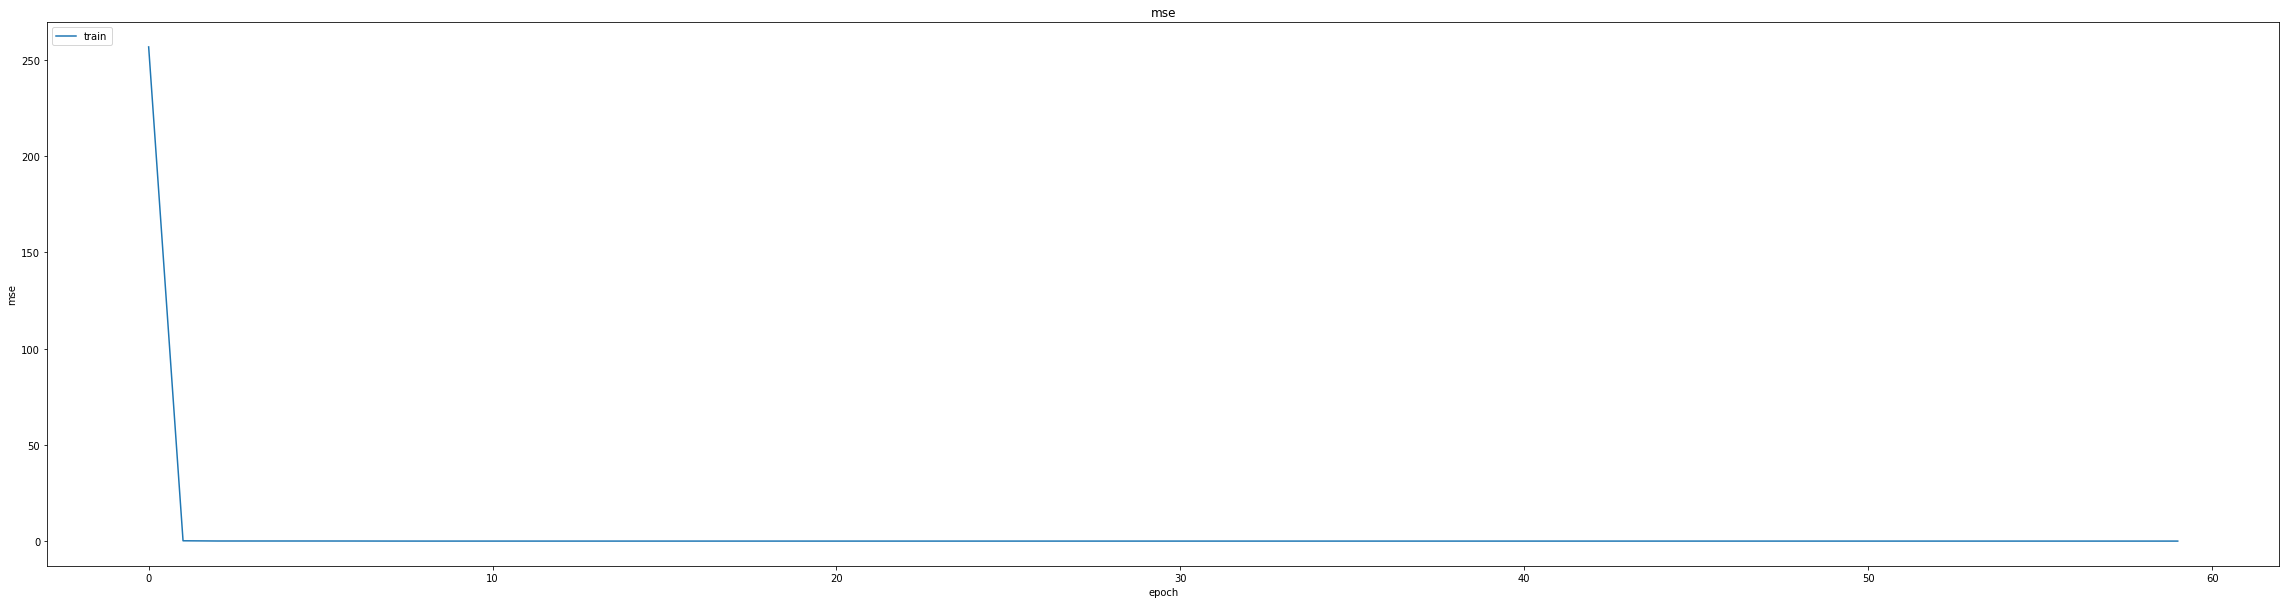

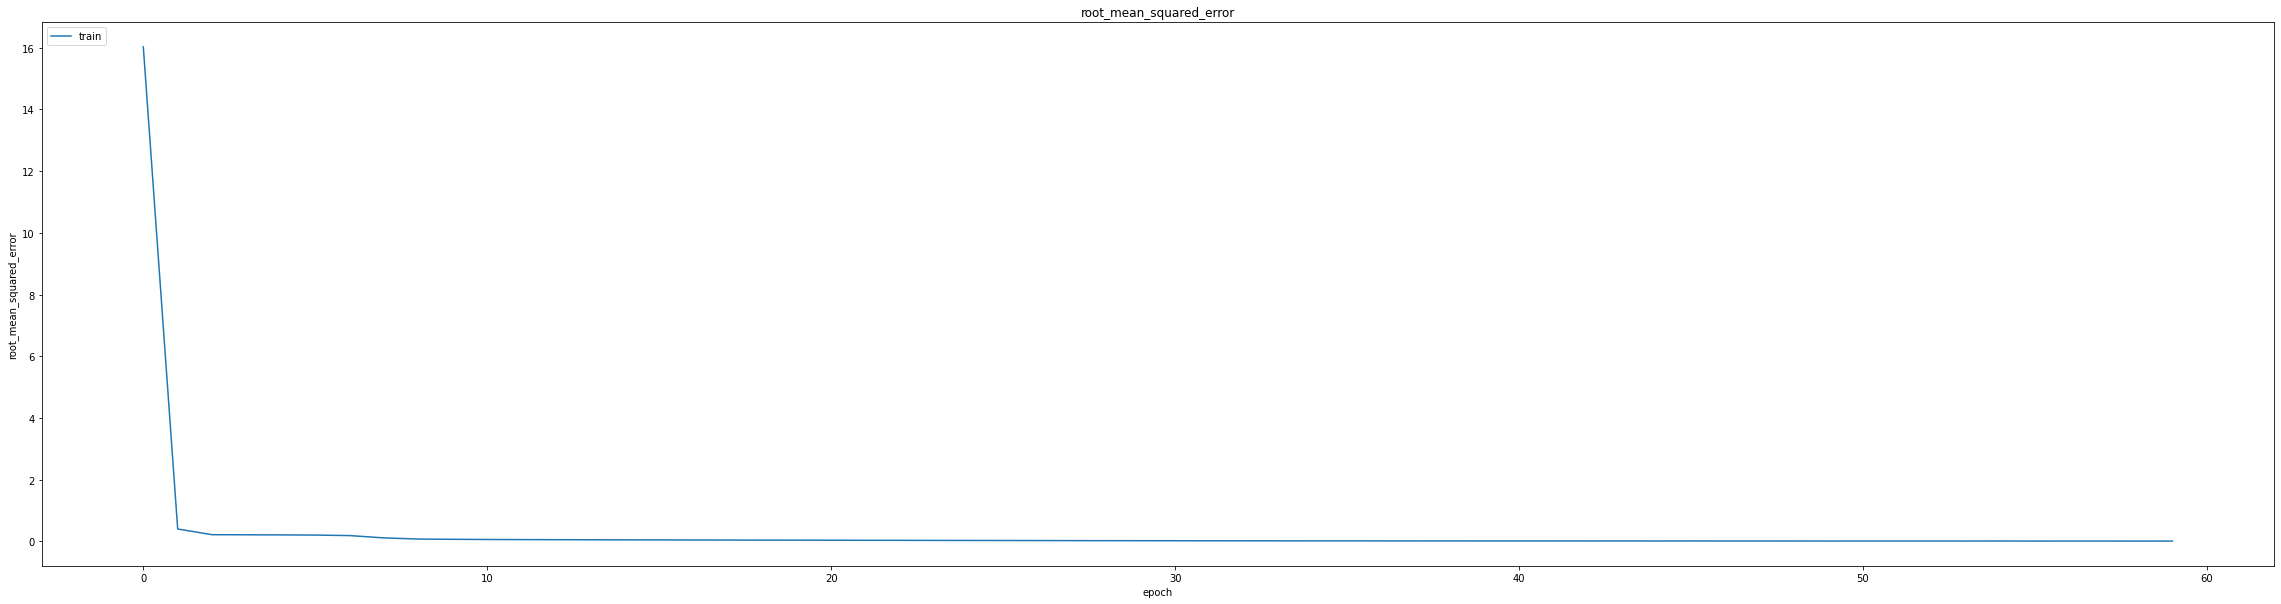

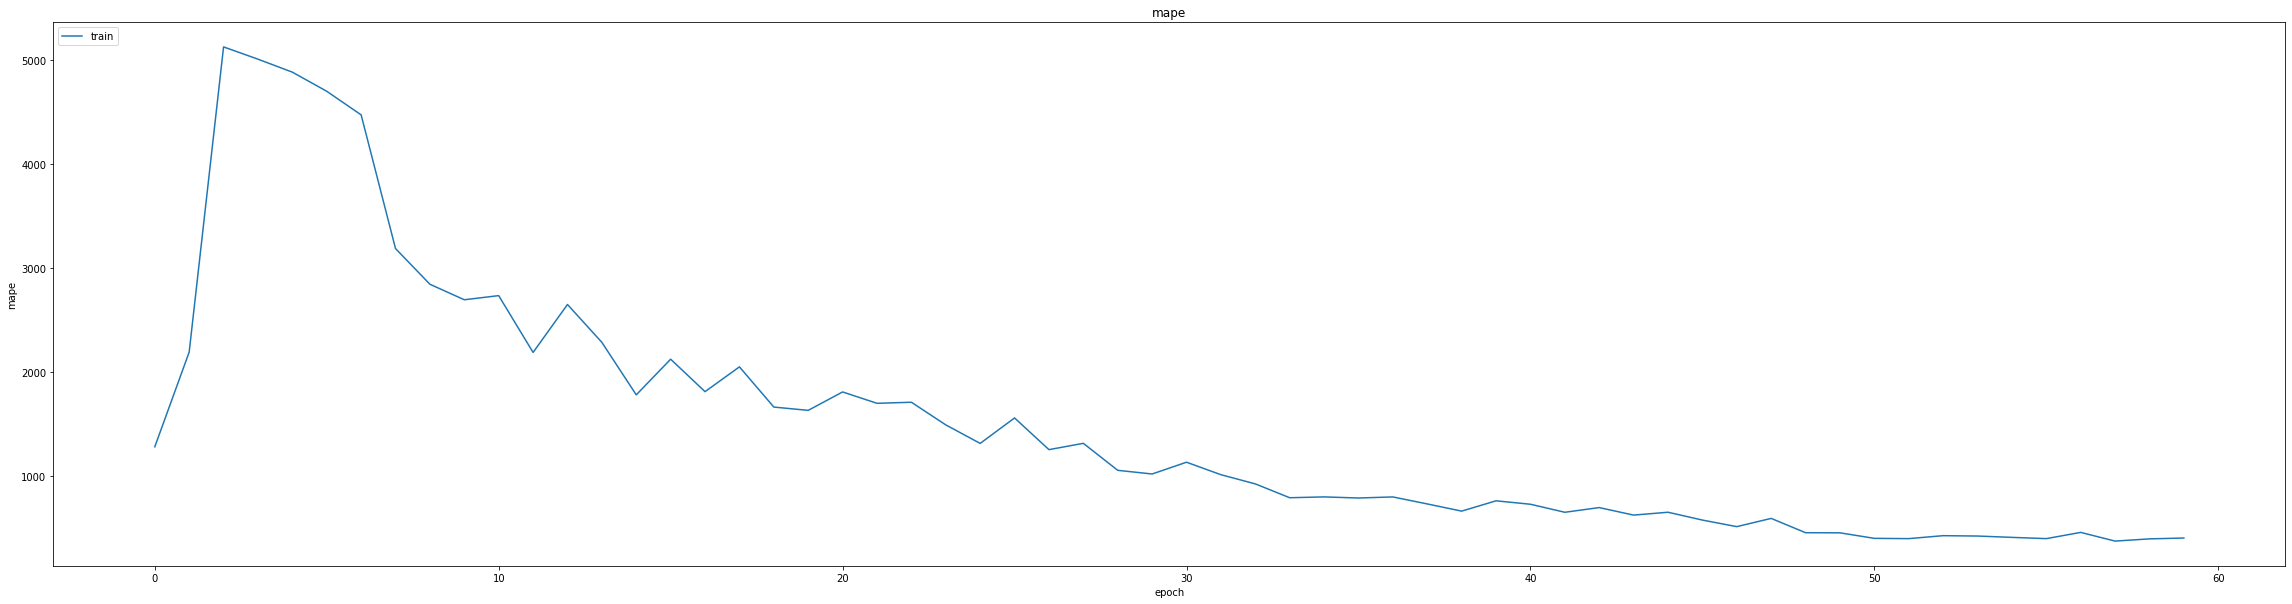

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005441731307655573
0.008292493410408497
1391/1391 [==============================] - 10s 6ms/step
0.9901667517948145


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0189 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 475.6195
Epoch 1: val_mse did not improve from 0.00007
347/347 [==============================] - 21s 39ms/step - loss: 0.0025 - mae: 0.0189 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 475.6195 - val_loss: 2.6658e-04 - val_mae: 0.0154 - val_mse: 2.6658e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 1286.2134 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 4.7975e-05 - mae: 0.0054 - mse: 4.7975e-05 - root_mean_squared_error: 0.0069 - mape: 448.3282
Epoch 2: val_mse did not improve from 0.00007
347/347 [==============================] - 12s 34ms/step - loss: 4.7975e-05 - mae: 0.0054 - mse: 4.7975e-05 - root_mean_squared_error: 0.0069 - mape: 448.3282 - val_loss: 1.8340e-04 - val_mae: 0.0125 - val_mse: 1.8340e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1102.2761 - lr: 0.0010
lr cha

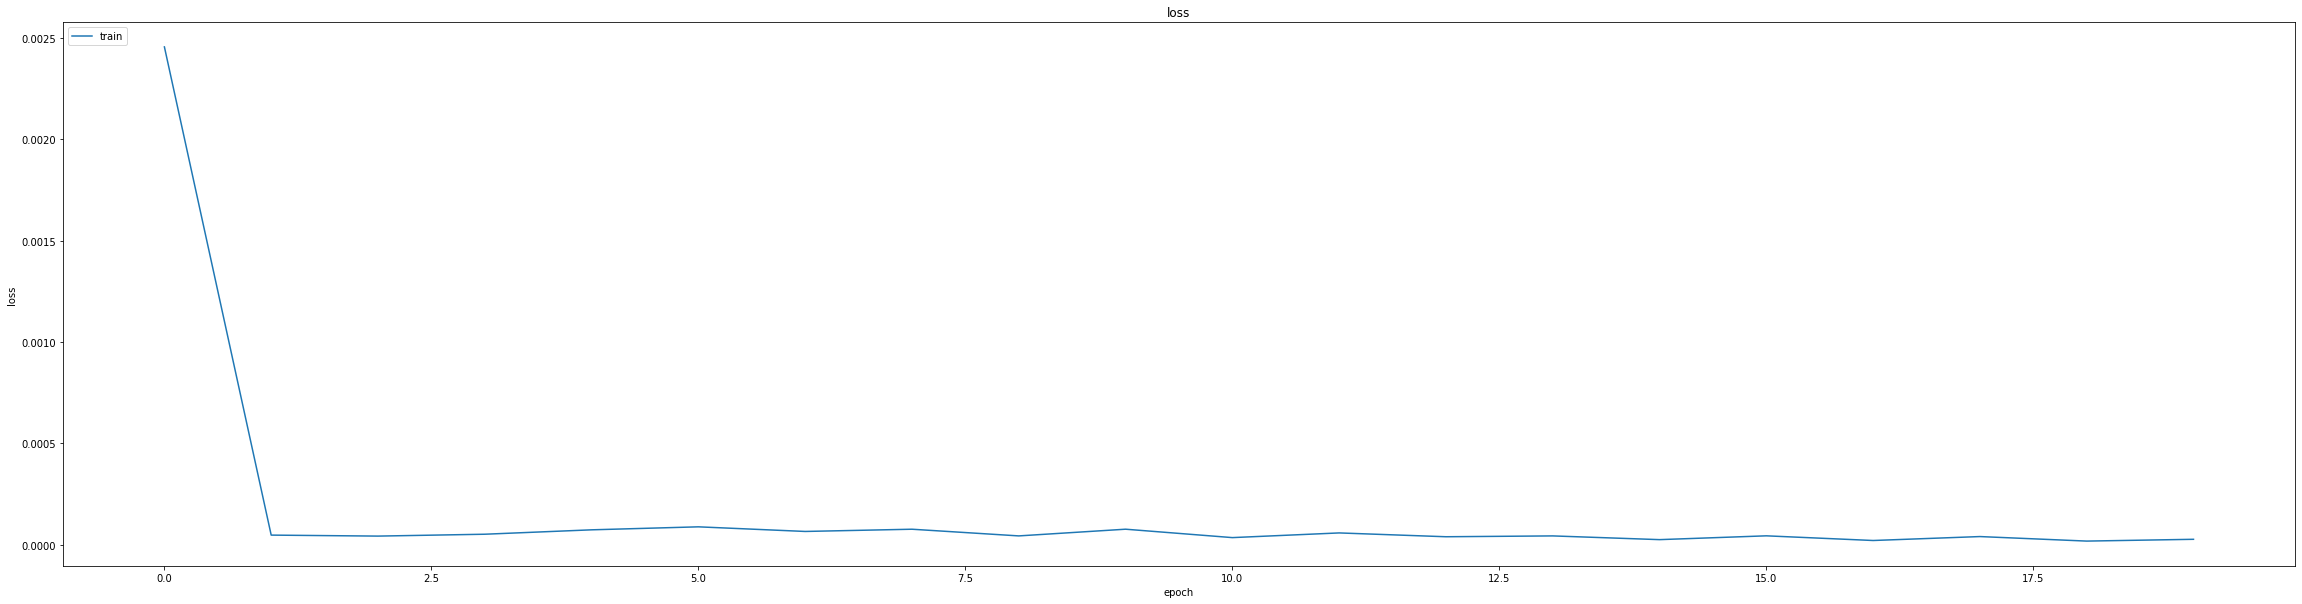

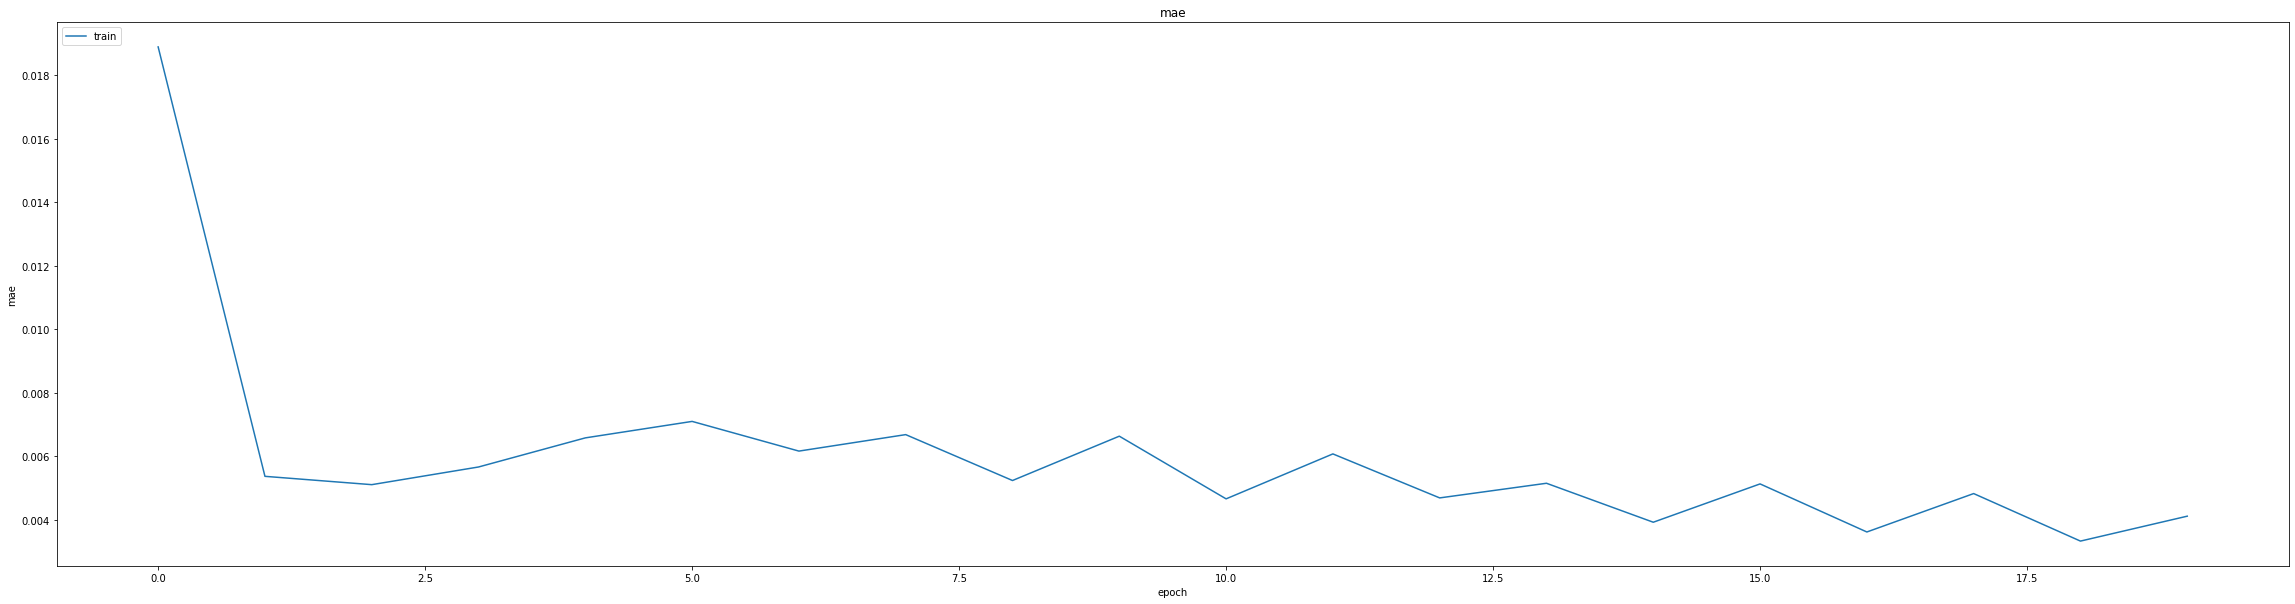

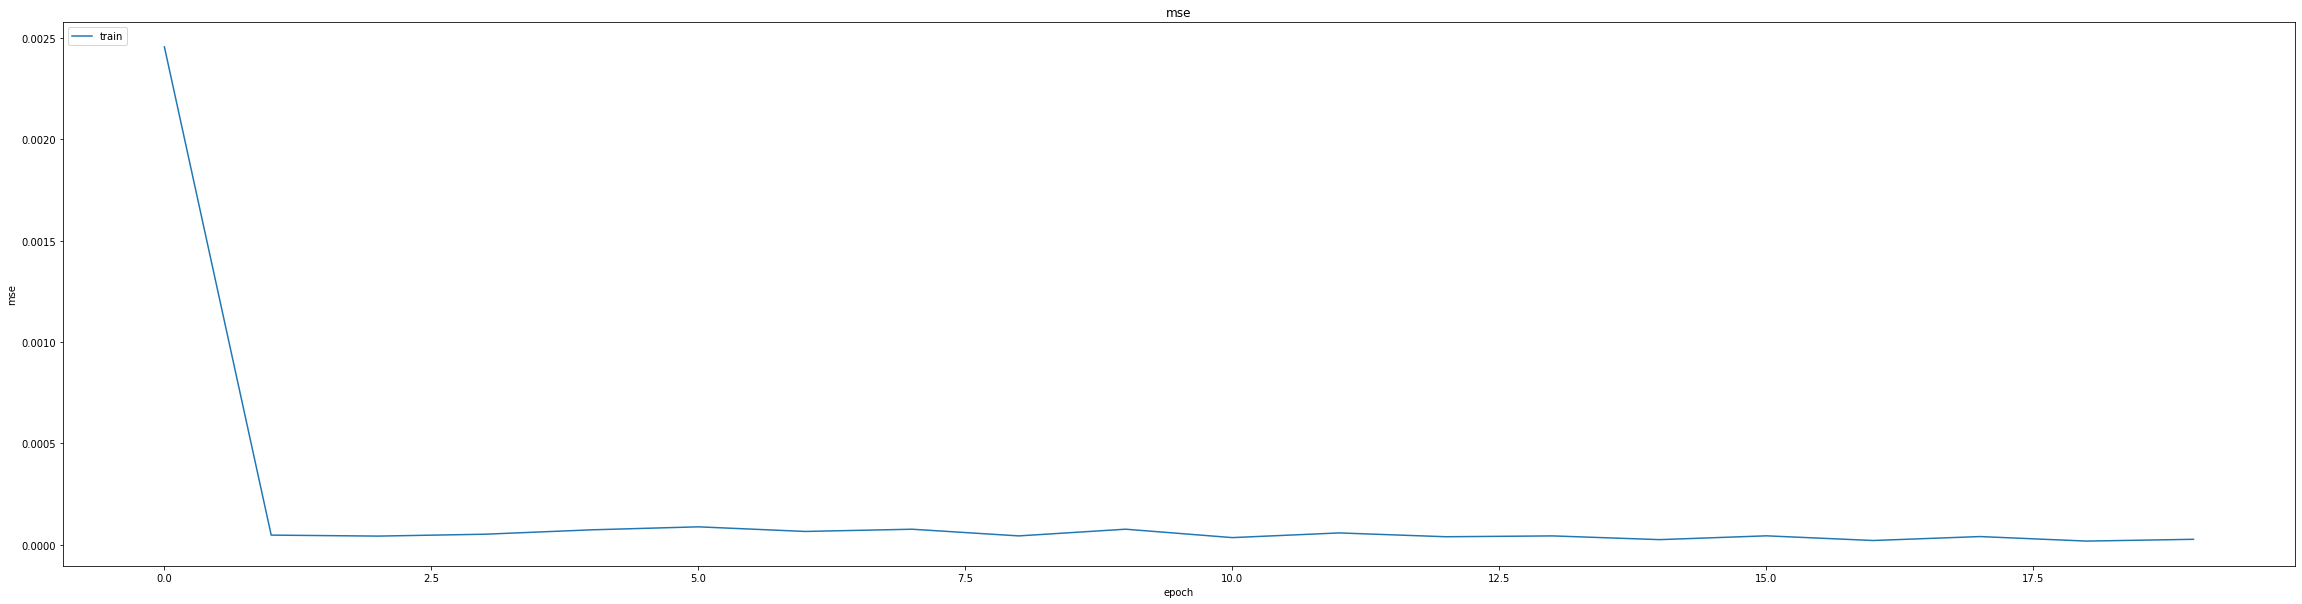

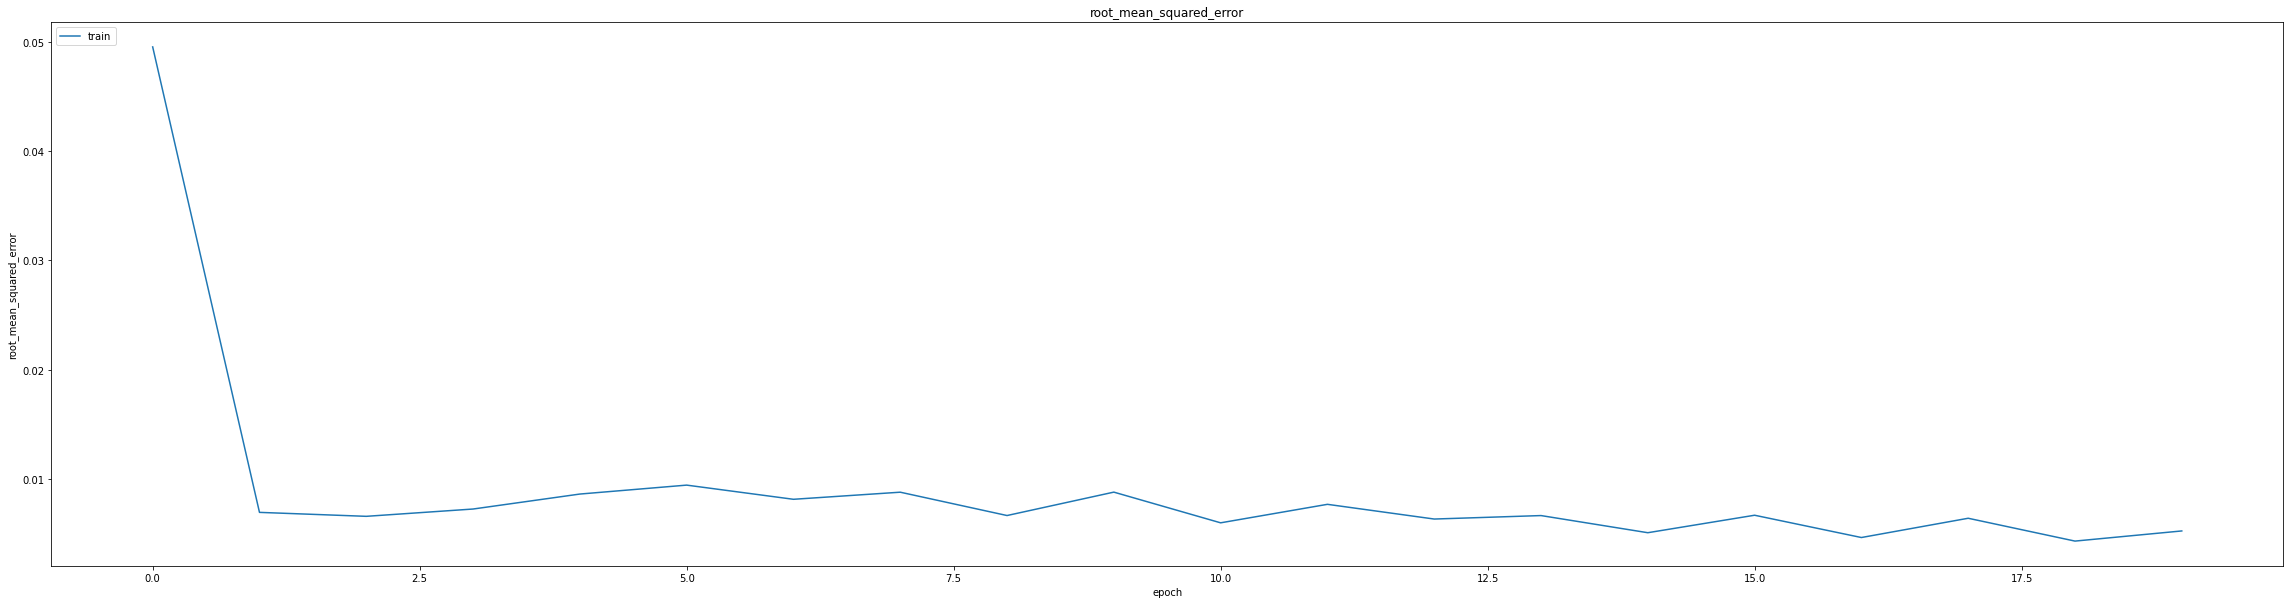

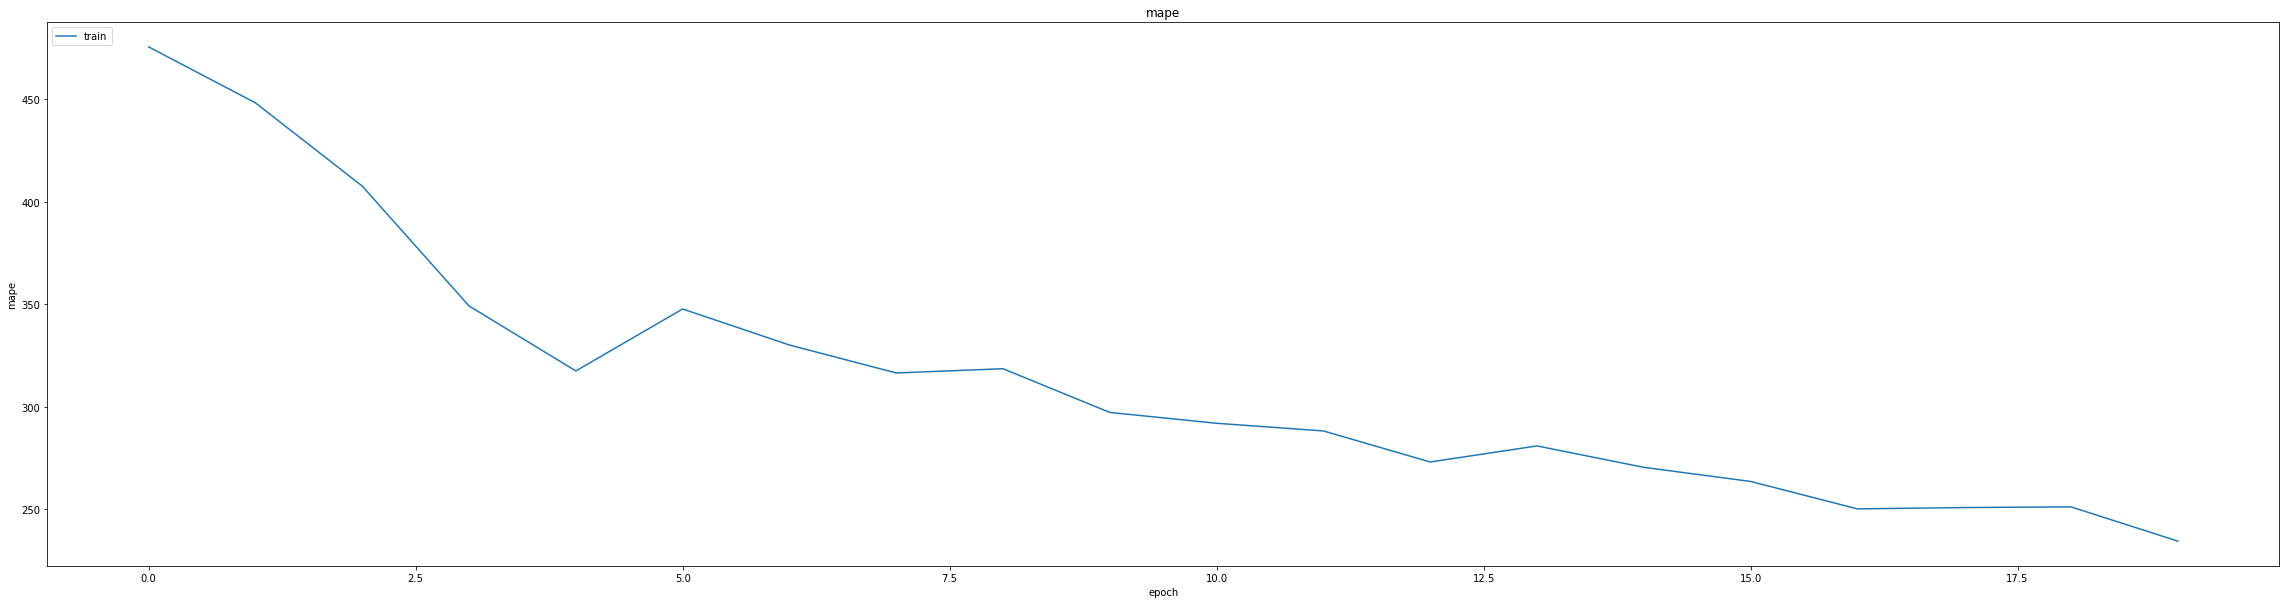

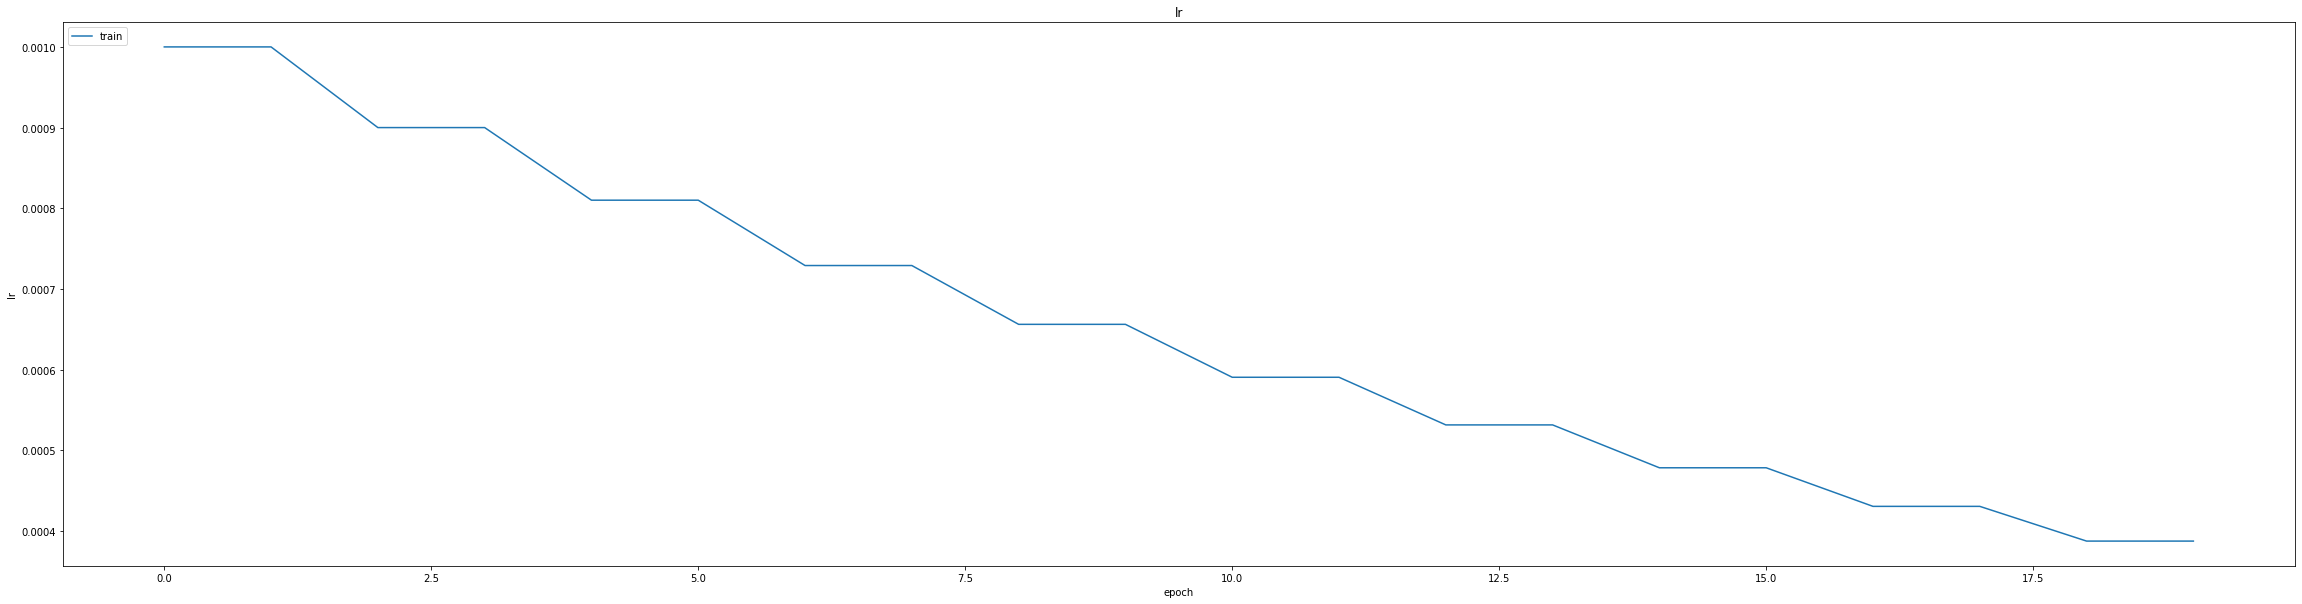

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007394345942884684
0.008330563083291054
1391/1391 [==============================] - 9s 5ms/step
0.9885272338082075


1391/1391 [==============================] - 8s 6ms/step


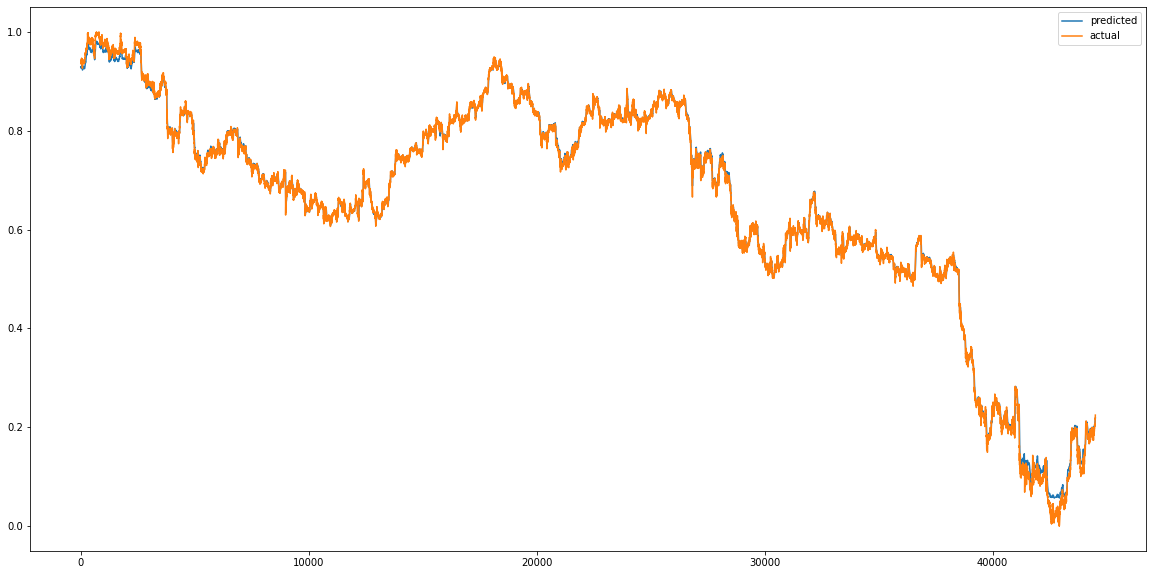

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


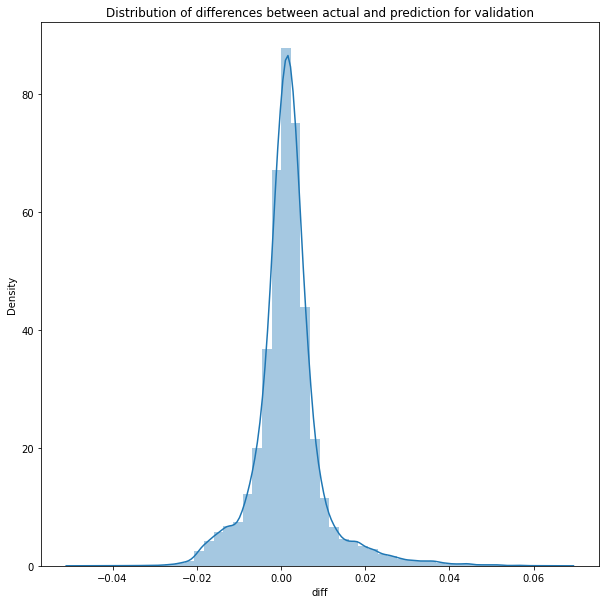

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 8s 5ms/step


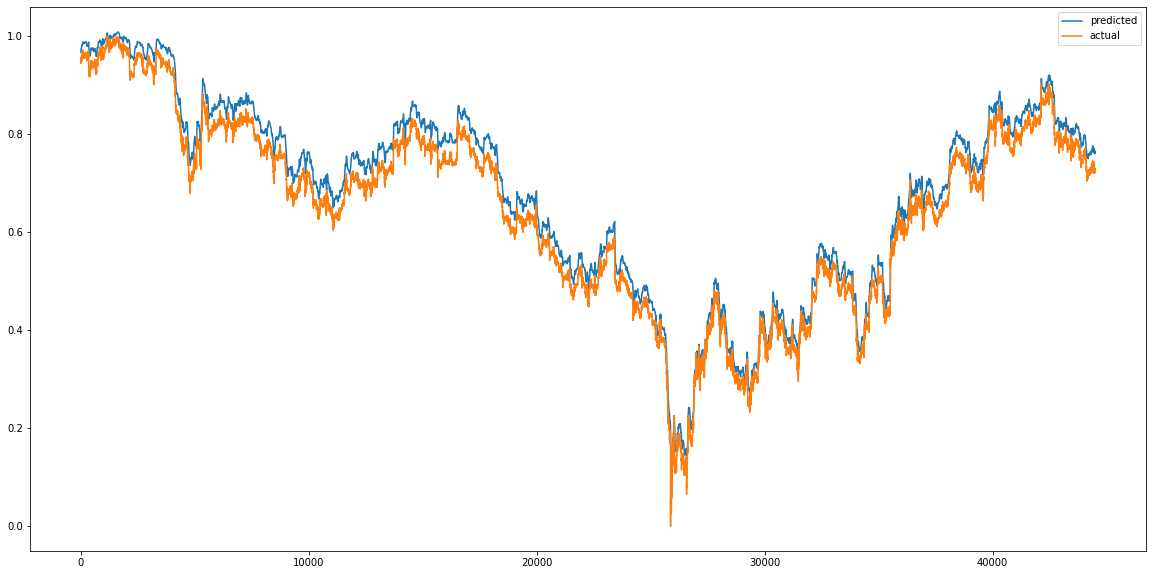

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


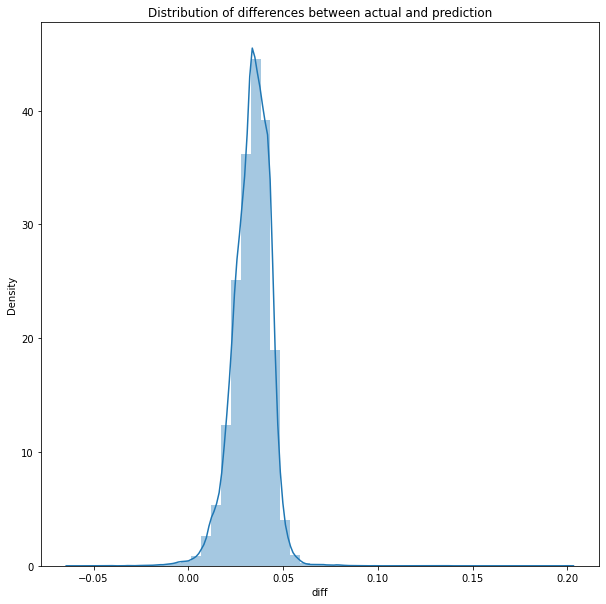

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0012112842442219387
RMSE :  0.03480350907914227
MAE :  0.03351032718951794
1391/1391 [==============================] - 8s 5ms/step
R2_Score  : 0.9683992735363334


count    44508.000000
mean         0.033430
std          0.009680
min         -0.061052
25%          0.027727
50%          0.034213
75%          0.040091
max          0.199773
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 252.5191 - mae: 2.1069 - mse: 252.5192 - root_mean_squared_error: 15.8909 - mape: 3333.6460
Epoch 1: val_mse improved from inf to 0.05365, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 21s 50ms/step - loss: 251.8311 - mae: 2.1016 - mse: 251.8312 - root_mean_squared_error: 15.8692 - mape: 3324.6660 - val_loss: 0.0537 - val_mae: 0.1813 - val_mse: 0.0537 - val_root_mean_squared_error: 0.2316 - val_mape: 14436.5781
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.0458 - mae: 0.1837 - mse: 0.0458 - root_mean_squared_error: 0.2139 - mape: 4647.0234
Epoch 2: val_mse improved from 0.05365 to 0.05316, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0458 - mae: 0.1837 - mse: 0.0458 - root_mean_squared_error: 0.2139 - mape: 4647.0234 - val_loss: 0.0532 - val_mae: 0.1798 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2306 - val_mape: 14488.6738
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 0.0451 - mae: 0.1823 - mse: 0.0451 - root_mean_squared_error: 0.2124 - mape: 4778.2632
Epoch 3: val_mse improved from 0.05316 to 0.05168, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0451 - mae: 0.1823 - mse: 0.0451 - root_mean_squared_error: 0.2124 - mape: 4778.2632 - val_loss: 0.0517 - val_mae: 0.1764 - val_mse: 0.0517 - val_root_mean_squared_error: 0.2273 - val_mape: 14435.8662
Epoch 4/60
345/347 [============================>.] - ETA: 0s - loss: 0.0434 - mae: 0.1782 - mse: 0.0434 - root_mean_squared_error: 0.2083 - mape: 4689.6660
Epoch 4: val_mse improved from 0.05168 to 0.04778, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0434 - mae: 0.1782 - mse: 0.0434 - root_mean_squared_error: 0.2083 - mape: 4663.5908 - val_loss: 0.0478 - val_mae: 0.1683 - val_mse: 0.0478 - val_root_mean_squared_error: 0.2186 - val_mape: 14090.0566
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1572 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 4483.4663
Epoch 5: val_mse improved from 0.04778 to 0.02349, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0358 - mae: 0.1570 - mse: 0.0358 - root_mean_squared_error: 0.1891 - mape: 4458.5283 - val_loss: 0.0235 - val_mae: 0.1105 - val_mse: 0.0235 - val_root_mean_squared_error: 0.1533 - val_mape: 11179.1279
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 0.0186 - mae: 0.1069 - mse: 0.0186 - root_mean_squared_error: 0.1362 - mape: 4078.3691
Epoch 6: val_mse improved from 0.02349 to 0.01194, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 0.0185 - mae: 0.1068 - mse: 0.0185 - root_mean_squared_error: 0.1361 - mape: 4055.6165 - val_loss: 0.0119 - val_mae: 0.0782 - val_mse: 0.0119 - val_root_mean_squared_error: 0.1093 - val_mape: 8813.5840
Epoch 7/60
344/347 [============================>.] - ETA: 0s - loss: 0.0121 - mae: 0.0867 - mse: 0.0121 - root_mean_squared_error: 0.1100 - mape: 3034.8164
Epoch 7: val_mse improved from 0.01194 to 0.01187, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0121 - mae: 0.0867 - mse: 0.0121 - root_mean_squared_error: 0.1100 - mape: 3009.2639 - val_loss: 0.0119 - val_mae: 0.0812 - val_mse: 0.0119 - val_root_mean_squared_error: 0.1090 - val_mape: 8619.7607
Epoch 8/60
346/347 [============================>.] - ETA: 0s - loss: 0.0103 - mae: 0.0802 - mse: 0.0103 - root_mean_squared_error: 0.1015 - mape: 3239.6067
Epoch 8: val_mse improved from 0.01187 to 0.01128, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0103 - mae: 0.0802 - mse: 0.0103 - root_mean_squared_error: 0.1015 - mape: 3230.8672 - val_loss: 0.0113 - val_mae: 0.0795 - val_mse: 0.0113 - val_root_mean_squared_error: 0.1062 - val_mape: 8432.1680
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0745 - mse: 0.0090 - root_mean_squared_error: 0.0947 - mape: 3054.0828
Epoch 9: val_mse improved from 0.01128 to 0.00902, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0090 - mae: 0.0745 - mse: 0.0090 - root_mean_squared_error: 0.0947 - mape: 3054.0828 - val_loss: 0.0090 - val_mae: 0.0683 - val_mse: 0.0090 - val_root_mean_squared_error: 0.0950 - val_mape: 8009.6724
Epoch 10/60
346/347 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0691 - mse: 0.0078 - root_mean_squared_error: 0.0883 - mape: 2959.1172
Epoch 10: val_mse improved from 0.00902 to 0.00724, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0078 - mae: 0.0691 - mse: 0.0078 - root_mean_squared_error: 0.0883 - mape: 2951.0935 - val_loss: 0.0072 - val_mae: 0.0593 - val_mse: 0.0072 - val_root_mean_squared_error: 0.0851 - val_mape: 7454.8662
Epoch 11/60
344/347 [============================>.] - ETA: 0s - loss: 0.0066 - mae: 0.0632 - mse: 0.0066 - root_mean_squared_error: 0.0811 - mape: 2450.7163
Epoch 11: val_mse improved from 0.00724 to 0.00580, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 0.0066 - mae: 0.0632 - mse: 0.0066 - root_mean_squared_error: 0.0811 - mape: 2430.0388 - val_loss: 0.0058 - val_mae: 0.0517 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0761 - val_mape: 6886.0874
Epoch 12/60
345/347 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0582 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 2256.3657
Epoch 12: val_mse improved from 0.00580 to 0.00469, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0056 - mae: 0.0582 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 2243.7883 - val_loss: 0.0047 - val_mae: 0.0455 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 6393.6104
Epoch 13/60
344/347 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0530 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 2123.0513
Epoch 13: val_mse improved from 0.00469 to 0.00405, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 0.0047 - mae: 0.0530 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 2105.1306 - val_loss: 0.0041 - val_mae: 0.0440 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0637 - val_mape: 5944.8398
Epoch 14/60
346/347 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0474 - mse: 0.0038 - root_mean_squared_error: 0.0614 - mape: 2082.9727
Epoch 14: val_mse improved from 0.00405 to 0.00311, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0038 - mae: 0.0474 - mse: 0.0038 - root_mean_squared_error: 0.0614 - mape: 2077.3330 - val_loss: 0.0031 - val_mae: 0.0377 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 5392.9561
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0443 - mse: 0.0033 - root_mean_squared_error: 0.0572 - mape: 2361.7827
Epoch 15: val_mse improved from 0.00311 to 0.00222, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0033 - mae: 0.0443 - mse: 0.0033 - root_mean_squared_error: 0.0572 - mape: 2355.3699 - val_loss: 0.0022 - val_mae: 0.0276 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0471 - val_mape: 4934.9175
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0403 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 1748.7085
Epoch 16: val_mse improved from 0.00222 to 0.00202, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0027 - mae: 0.0403 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 1743.9672 - val_loss: 0.0020 - val_mae: 0.0303 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 4644.0962
Epoch 17/60
344/347 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 1611.3146
Epoch 17: val_mse improved from 0.00202 to 0.00168, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0484 - mape: 1597.7087 - val_loss: 0.0017 - val_mae: 0.0260 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 4430.8325
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 1362.9126
Epoch 18: val_mse did not improve from 0.00168
347/347 [==============================] - 6s 18ms/step - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 1355.3177 - val_loss: 0.0017 - val_mae: 0.0323 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 4195.7495
Epoch 19/60
346/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 1406.1028
Epoch 19: val_mse improved from 0.00168 to 0.00118, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 18s 51ms/step - loss: 0.0017 - mae: 0.0324 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 1402.3052 - val_loss: 0.0012 - val_mae: 0.0198 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 4008.4727
Epoch 20/60
344/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 1178.3951
Epoch 20: val_mse did not improve from 0.00118
347/347 [==============================] - 6s 17ms/step - loss: 0.0016 - mae: 0.0308 - mse: 0.0016 - root_mean_squared_error: 0.0398 - mape: 1168.4545 - val_loss: 0.0022 - val_mae: 0.0420 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 3803.7422
Epoch 21/60
344/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1294.8258
Epoch 21: val_mse improved from 0.00118 to 0.00085, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 19s 55ms/step - loss: 0.0014 - mae: 0.0286 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1283.8822 - val_loss: 8.4717e-04 - val_mae: 0.0167 - val_mse: 8.4717e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 3656.0342
Epoch 22/60
346/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 1208.2990
Epoch 22: val_mse improved from 0.00085 to 0.00074, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 18s 53ms/step - loss: 0.0011 - mae: 0.0255 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 1205.0175 - val_loss: 7.4480e-04 - val_mae: 0.0153 - val_mse: 7.4480e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 3498.1794
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 9.8607e-04 - mae: 0.0243 - mse: 9.8607e-04 - root_mean_squared_error: 0.0314 - mape: 1275.9520
Epoch 23: val_mse did not improve from 0.00074
347/347 [==============================] - 6s 17ms/step - loss: 9.8541e-04 - mae: 0.0242 - mse: 9.8541e-04 - root_mean_squared_error: 0.0314 - mape: 1268.8333 - val_loss: 8.2893e-04 - val_mae: 0.0215 - val_mse: 8.2893e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 3392.2102
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 8.7622e-04 - mae: 0.0229 - mse: 8.7622e-04 - root_mean_squared_error: 0.0296 - mape: 1215.5514
Epoch 24: val_mse did not improve from 0.00074
347/347 [========

347/347 [==============================] - 16s 46ms/step - loss: 7.6312e-04 - mae: 0.0214 - mse: 7.6312e-04 - root_mean_squared_error: 0.0276 - mape: 1272.1993 - val_loss: 5.0489e-04 - val_mae: 0.0127 - val_mse: 5.0489e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 3054.7979
Epoch 26/60
346/347 [============================>.] - ETA: 0s - loss: 7.0947e-04 - mae: 0.0207 - mse: 7.0947e-04 - root_mean_squared_error: 0.0266 - mape: 1166.5822
Epoch 26: val_mse improved from 0.00050 to 0.00040, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 7.0918e-04 - mae: 0.0207 - mse: 7.0918e-04 - root_mean_squared_error: 0.0266 - mape: 1163.4163 - val_loss: 4.0367e-04 - val_mae: 0.0113 - val_mse: 4.0367e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 2889.8965
Epoch 27/60
344/347 [============================>.] - ETA: 0s - loss: 6.2314e-04 - mae: 0.0194 - mse: 6.2314e-04 - root_mean_squared_error: 0.0250 - mape: 901.5844
Epoch 27: val_mse did not improve from 0.00040
347/347 [==============================] - 6s 17ms/step - loss: 6.2321e-04 - mae: 0.0194 - mse: 6.2321e-04 - root_mean_squared_error: 0.0250 - mape: 893.9893 - val_loss: 5.1561e-04 - val_mae: 0.0180 - val_mse: 5.1561e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 2741.6487
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 5.6773e-04 - mae: 0.0186 - mse: 5.6773e-04 - root_mean_squared_error: 0.0238 - mape: 853.4760
Epoch 28: val_mse improved from 0.00040 to 0.00033, saving 

347/347 [==============================] - 18s 52ms/step - loss: 5.6773e-04 - mae: 0.0186 - mse: 5.6773e-04 - root_mean_squared_error: 0.0238 - mape: 853.4760 - val_loss: 3.3025e-04 - val_mae: 0.0122 - val_mse: 3.3025e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 2547.0918
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 5.2717e-04 - mae: 0.0179 - mse: 5.2717e-04 - root_mean_squared_error: 0.0230 - mape: 1035.0575
Epoch 29: val_mse improved from 0.00033 to 0.00026, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 5.2650e-04 - mae: 0.0179 - mse: 5.2650e-04 - root_mean_squared_error: 0.0229 - mape: 1029.2719 - val_loss: 2.6079e-04 - val_mae: 0.0115 - val_mse: 2.6079e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 2406.5476
Epoch 30/60
345/347 [============================>.] - ETA: 0s - loss: 4.8901e-04 - mae: 0.0173 - mse: 4.8901e-04 - root_mean_squared_error: 0.0221 - mape: 738.2631
Epoch 30: val_mse did not improve from 0.00026
347/347 [==============================] - 6s 17ms/step - loss: 4.8870e-04 - mae: 0.0173 - mse: 4.8870e-04 - root_mean_squared_error: 0.0221 - mape: 734.1393 - val_loss: 3.0151e-04 - val_mae: 0.0133 - val_mse: 3.0151e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 2241.1523
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 4.5387e-04 - mae: 0.0167 - mse: 4.5387e-04 - root_mean_squared_error: 0.0213 - mape: 724.6094
Epoch 31: val_mse improved from 0.00026 to 0.00022, saving 

347/347 [==============================] - 16s 47ms/step - loss: 4.5270e-04 - mae: 0.0167 - mse: 4.5270e-04 - root_mean_squared_error: 0.0213 - mape: 718.4863 - val_loss: 2.1669e-04 - val_mae: 0.0102 - val_mse: 2.1669e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2142.0056
Epoch 32/60
345/347 [============================>.] - ETA: 0s - loss: 4.2022e-04 - mae: 0.0161 - mse: 4.2022e-04 - root_mean_squared_error: 0.0205 - mape: 708.7861
Epoch 32: val_mse did not improve from 0.00022
347/347 [==============================] - 6s 17ms/step - loss: 4.1968e-04 - mae: 0.0161 - mse: 4.1968e-04 - root_mean_squared_error: 0.0205 - mape: 704.8309 - val_loss: 6.4148e-04 - val_mae: 0.0230 - val_mse: 6.4148e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 2024.2062
Epoch 33/60
345/347 [============================>.] - ETA: 0s - loss: 3.4131e-04 - mae: 0.0144 - mse: 3.4131e-04 - root_mean_squared_error: 0.0185 - mape: 743.4700
Epoch 33: val_mse did not improve from 0.00022
347/347 [====

347/347 [==============================] - 17s 49ms/step - loss: 3.4093e-04 - mae: 0.0146 - mse: 3.4093e-04 - root_mean_squared_error: 0.0185 - mape: 689.6385 - val_loss: 1.4946e-04 - val_mae: 0.0081 - val_mse: 1.4946e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1904.6288
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 3.0352e-04 - mae: 0.0137 - mse: 3.0352e-04 - root_mean_squared_error: 0.0174 - mape: 675.2401
Epoch 36: val_mse did not improve from 0.00015
347/347 [==============================] - 6s 17ms/step - loss: 3.0352e-04 - mae: 0.0137 - mse: 3.0352e-04 - root_mean_squared_error: 0.0174 - mape: 675.2401 - val_loss: 2.6124e-04 - val_mae: 0.0137 - val_mse: 2.6124e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 1885.5906
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 2.8920e-04 - mae: 0.0133 - mse: 2.8920e-04 - root_mean_squared_error: 0.0170 - mape: 658.4606
Epoch 37: val_mse did not improve from 0.00015
347/347 [====

347/347 [==============================] - 17s 48ms/step - loss: 3.0806e-04 - mae: 0.0137 - mse: 3.0806e-04 - root_mean_squared_error: 0.0176 - mape: 692.1429 - val_loss: 1.2910e-04 - val_mae: 0.0074 - val_mse: 1.2910e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1834.0457
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 2.6185e-04 - mae: 0.0126 - mse: 2.6185e-04 - root_mean_squared_error: 0.0162 - mape: 618.7736
Epoch 39: val_mse did not improve from 0.00013
347/347 [==============================] - 6s 17ms/step - loss: 2.6185e-04 - mae: 0.0126 - mse: 2.6185e-04 - root_mean_squared_error: 0.0162 - mape: 618.7736 - val_loss: 1.4315e-04 - val_mae: 0.0083 - val_mse: 1.4315e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1798.2333
Epoch 40/60
347/347 [==============================] - ETA: 0s - loss: 2.6600e-04 - mae: 0.0129 - mse: 2.6600e-04 - root_mean_squared_error: 0.0163 - mape: 595.6360
Epoch 40: val_mse did not improve from 0.00013
347/347 [====

347/347 [==============================] - 16s 47ms/step - loss: 2.0613e-04 - mae: 0.0113 - mse: 2.0613e-04 - root_mean_squared_error: 0.0144 - mape: 592.7968 - val_loss: 1.1927e-04 - val_mae: 0.0068 - val_mse: 1.1927e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 1702.9238
Epoch 45/60
347/347 [==============================] - ETA: 0s - loss: 2.1028e-04 - mae: 0.0114 - mse: 2.1028e-04 - root_mean_squared_error: 0.0145 - mape: 534.1600
Epoch 45: val_mse did not improve from 0.00012
347/347 [==============================] - 6s 17ms/step - loss: 2.1028e-04 - mae: 0.0114 - mse: 2.1028e-04 - root_mean_squared_error: 0.0145 - mape: 534.1600 - val_loss: 1.5589e-04 - val_mae: 0.0095 - val_mse: 1.5589e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 1707.7051
Epoch 46/60
347/347 [==============================] - ETA: 0s - loss: 2.1771e-04 - mae: 0.0116 - mse: 2.1771e-04 - root_mean_squared_error: 0.0148 - mape: 573.6563
Epoch 46: val_mse did not improve from 0.00012
347/347 [====

347/347 [==============================] - 17s 48ms/step - loss: 1.8224e-04 - mae: 0.0103 - mse: 1.8224e-04 - root_mean_squared_error: 0.0135 - mape: 523.1202 - val_loss: 9.4848e-05 - val_mae: 0.0069 - val_mse: 9.4848e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 1566.8549
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 1.6616e-04 - mae: 0.0101 - mse: 1.6616e-04 - root_mean_squared_error: 0.0129 - mape: 517.1395
Epoch 53: val_mse did not improve from 0.00009
347/347 [==============================] - 6s 17ms/step - loss: 1.6616e-04 - mae: 0.0101 - mse: 1.6616e-04 - root_mean_squared_error: 0.0129 - mape: 517.1395 - val_loss: 6.2339e-04 - val_mae: 0.0235 - val_mse: 6.2339e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 1558.7678
Epoch 54/60
346/347 [============================>.] - ETA: 0s - loss: 1.6382e-04 - mae: 0.0100 - mse: 1.6382e-04 - root_mean_squared_error: 0.0128 - mape: 497.0897
Epoch 54: val_mse did not improve from 0.00009
347/347 [====

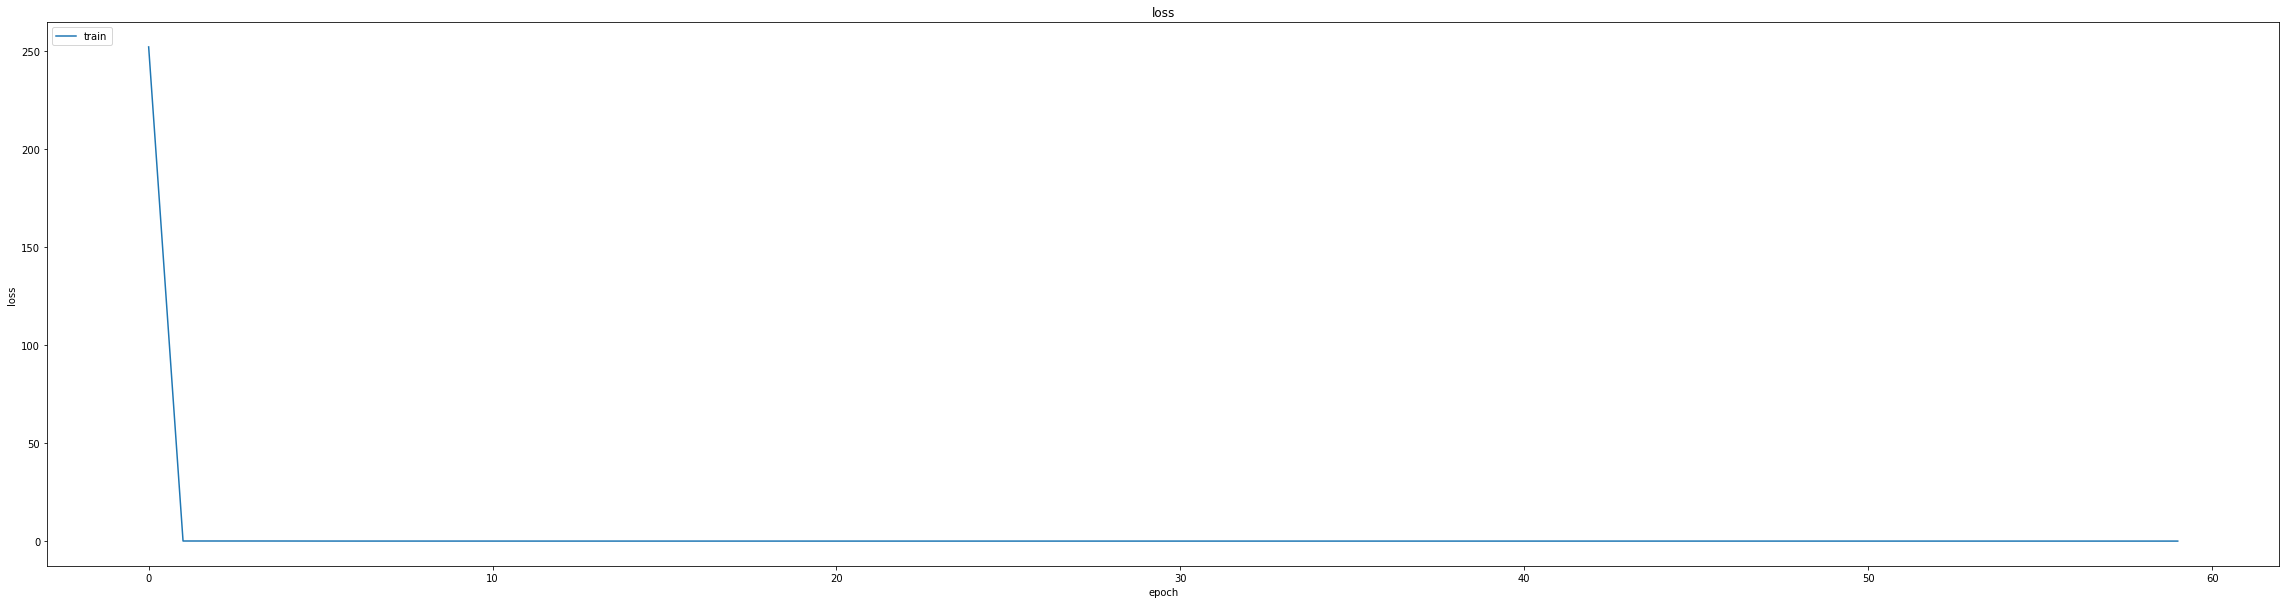

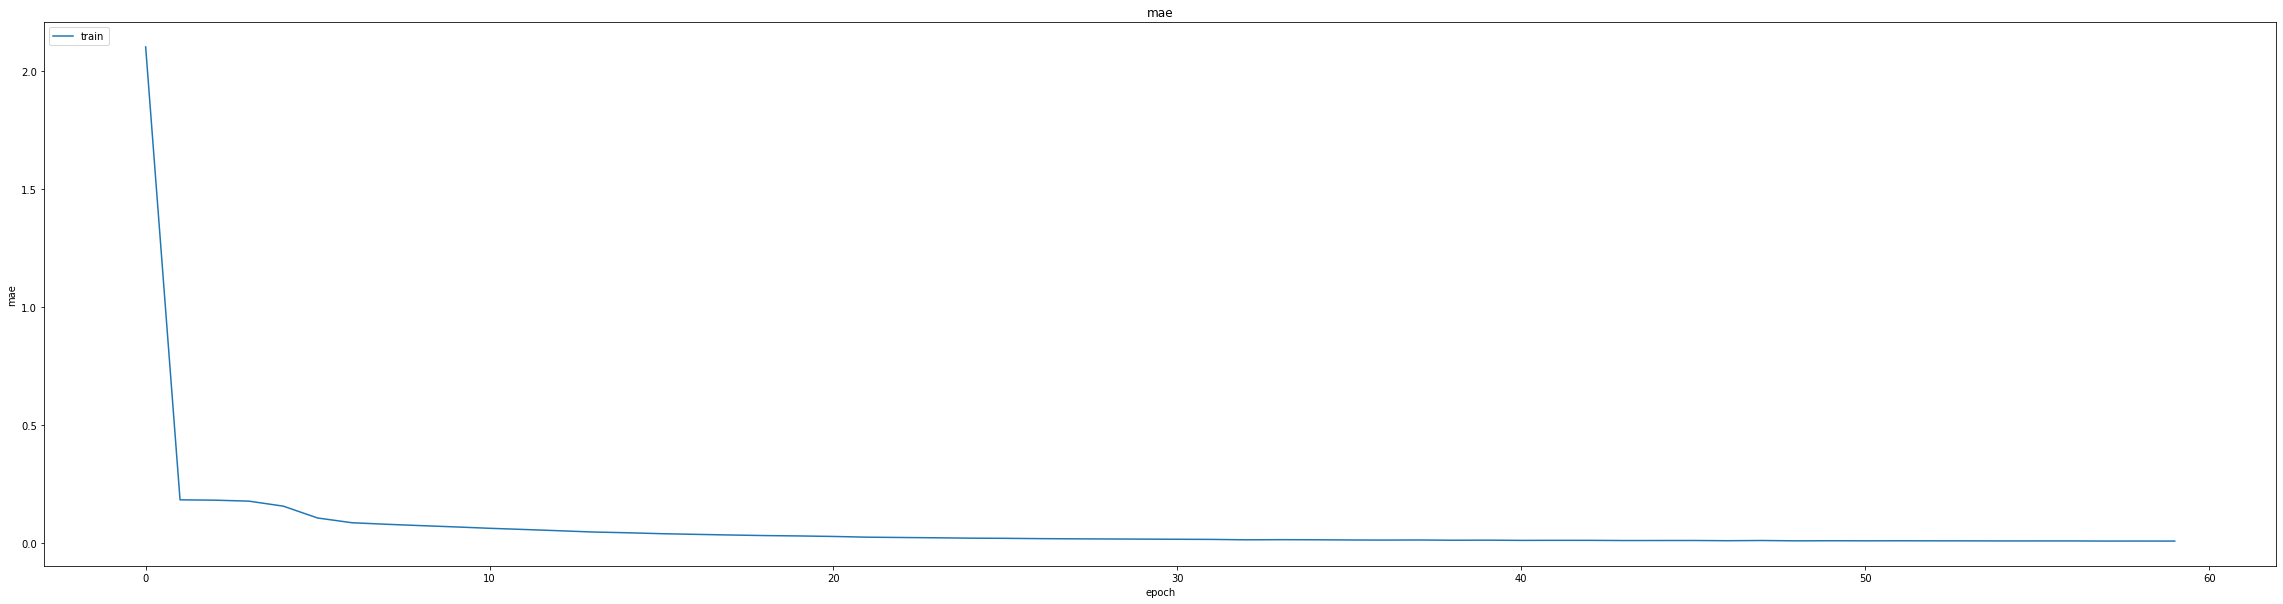

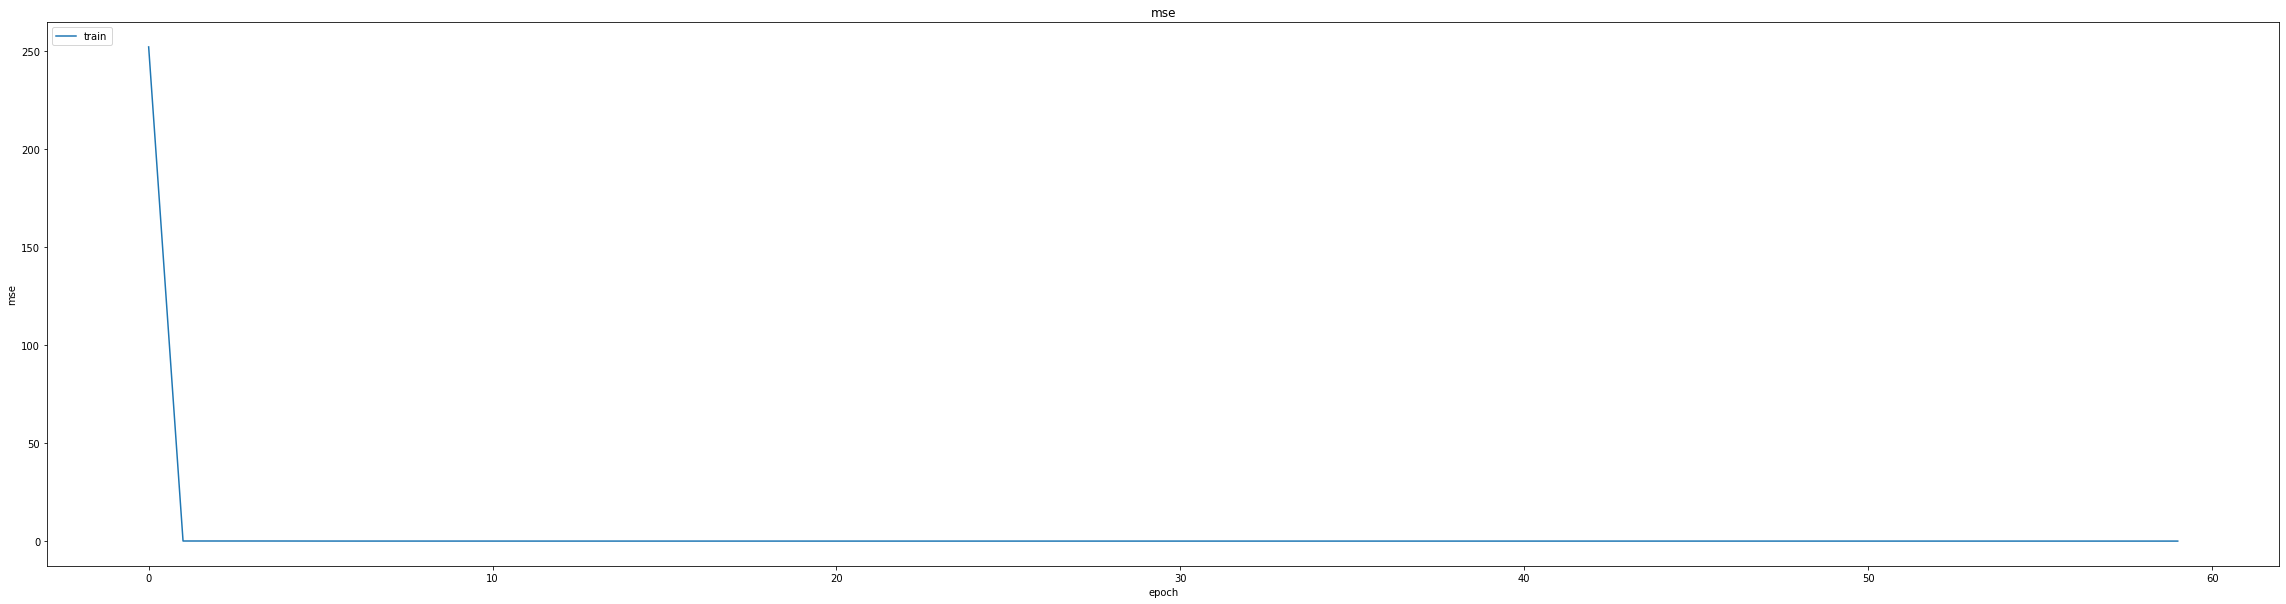

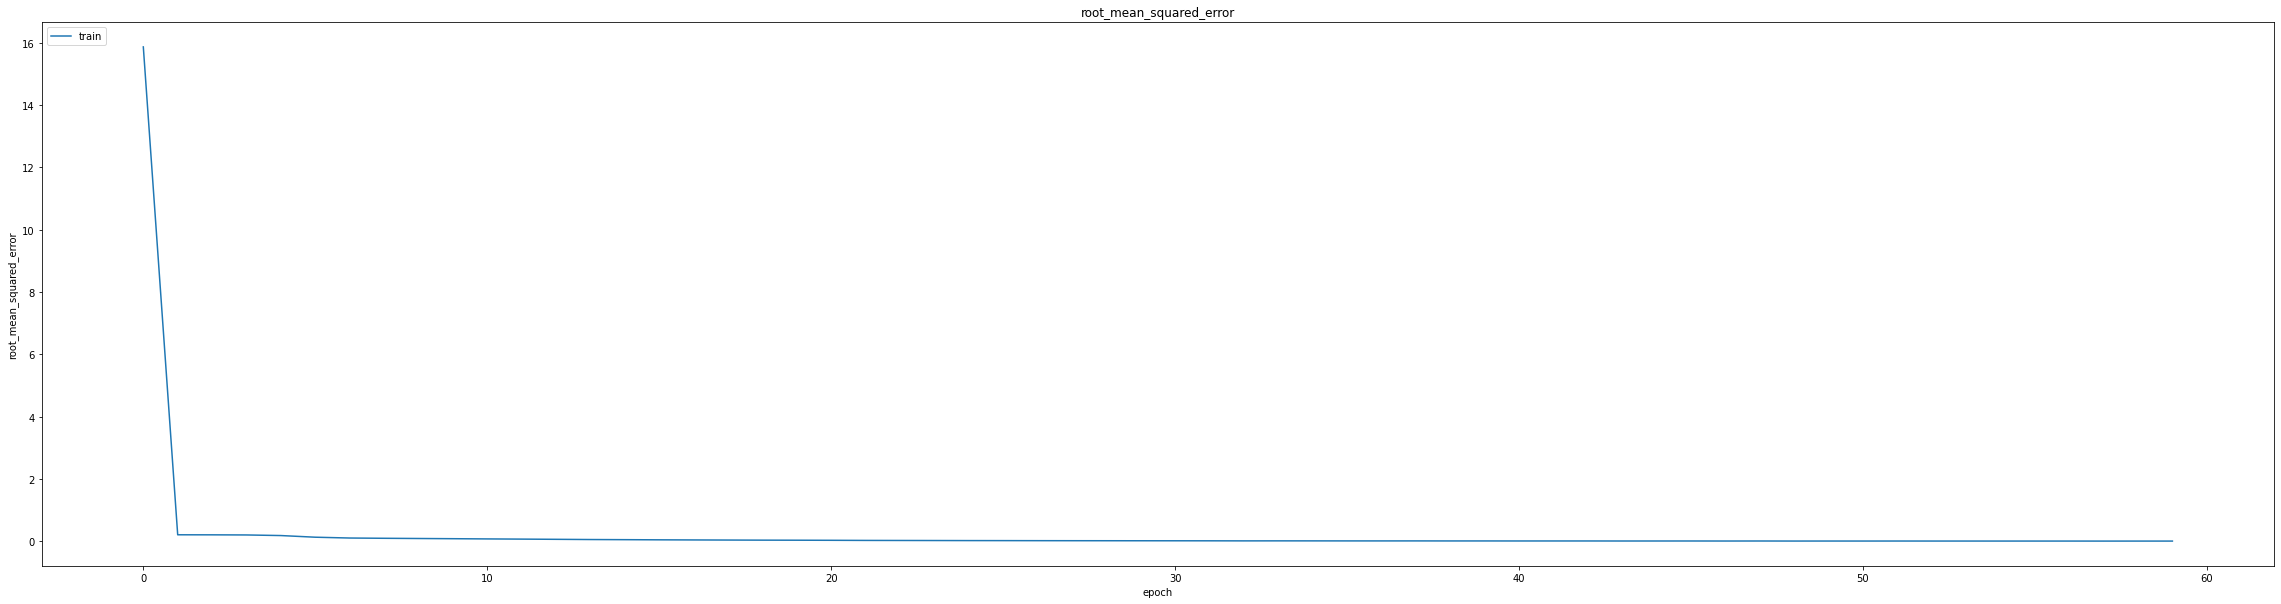

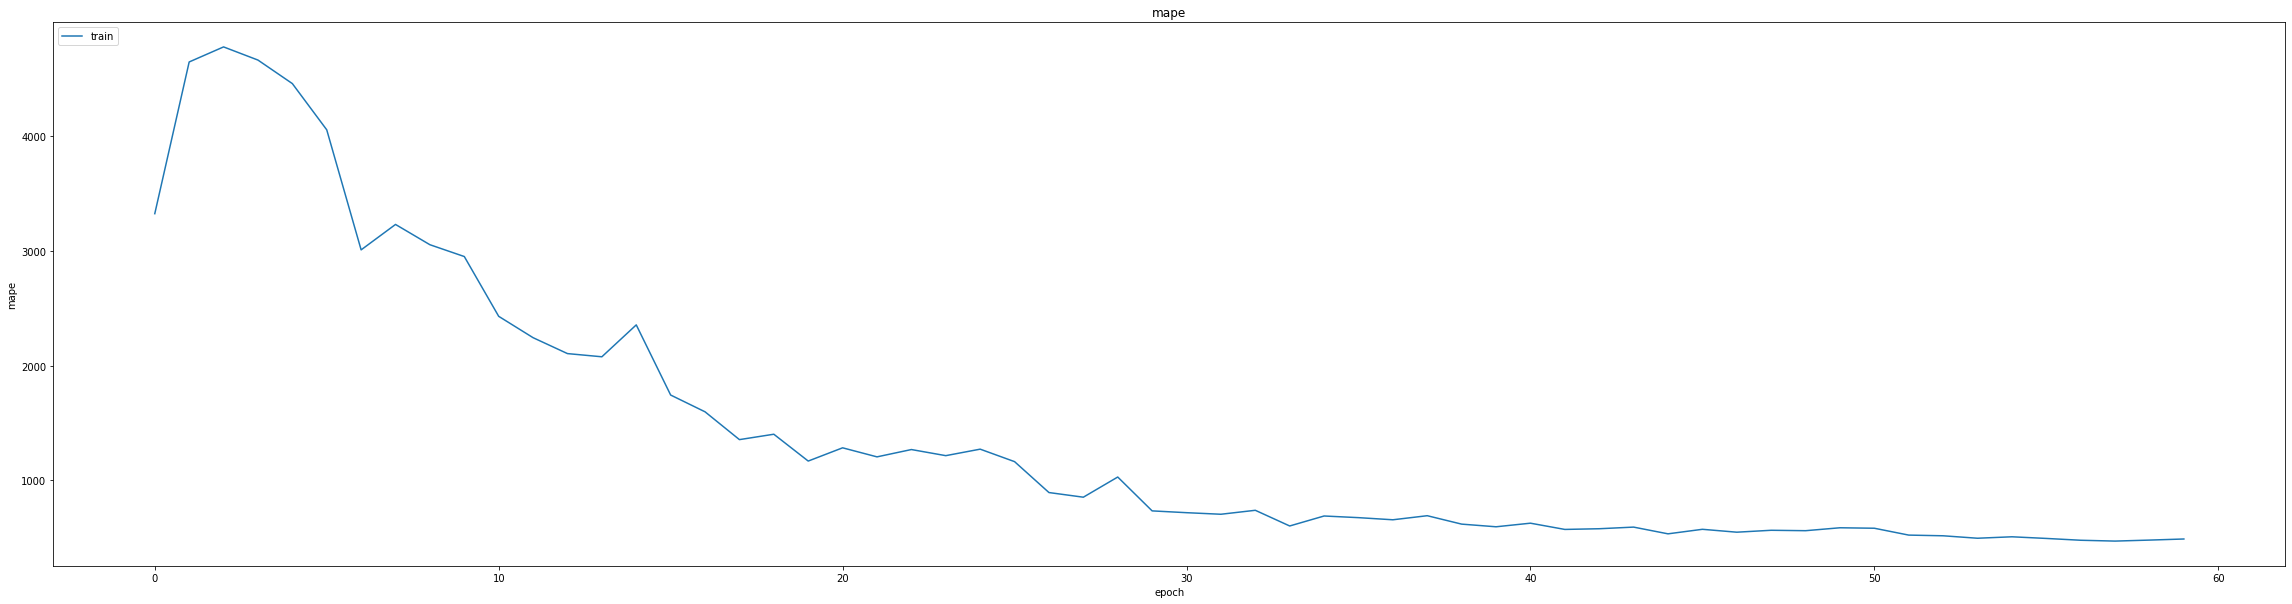

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006836083717644215
0.009738987311720848
1391/1391 [==============================] - 6s 4ms/step
0.9973647668455982


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0194 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 534.5327
Epoch 1: val_mse did not improve from 0.00009
347/347 [==============================] - 12s 20ms/step - loss: 0.0022 - mae: 0.0193 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 531.5468 - val_loss: 3.6000e-04 - val_mae: 0.0173 - val_mse: 3.6000e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 1494.7970 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 7.8300e-05 - mae: 0.0069 - mse: 7.8300e-05 - root_mean_squared_error: 0.0088 - mape: 510.0280
Epoch 2: val_mse did not improve from 0.00009
347/347 [==============================] - 6s 17ms/step - loss: 7.8245e-05 - mae: 0.0069 - mse: 7.8245e-05 - root_mean_squared_error: 0.0088 - mape: 507.1783 - val_loss: 4.3572e-04 - val_mae: 0.0199 - val_mse: 4.3572e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 1235.4003 - lr: 0.0010
lr chan

347/347 [==============================] - 18s 52ms/step - loss: 5.0715e-05 - mae: 0.0054 - mse: 5.0715e-05 - root_mean_squared_error: 0.0071 - mape: 263.3533 - val_loss: 6.9790e-05 - val_mae: 0.0066 - val_mse: 6.9790e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 730.6440 - lr: 5.3144e-04
Epoch 14/20
345/347 [============================>.] - ETA: 0s - loss: 4.2355e-05 - mae: 0.0050 - mse: 4.2355e-05 - root_mean_squared_error: 0.0065 - mape: 252.0381
Epoch 14: val_mse did not improve from 0.00007
347/347 [==============================] - 6s 18ms/step - loss: 4.3319e-05 - mae: 0.0051 - mse: 4.3319e-05 - root_mean_squared_error: 0.0066 - mape: 250.6391 - val_loss: 0.0014 - val_mae: 0.0357 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 712.1182 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
344/347 [============================>.] - ETA: 0s - loss: 3.4409e-05 - mae: 0.0045 - mse: 3.4409e-05 - root_mean_squared_error: 0.0059 - mape: 266.5736

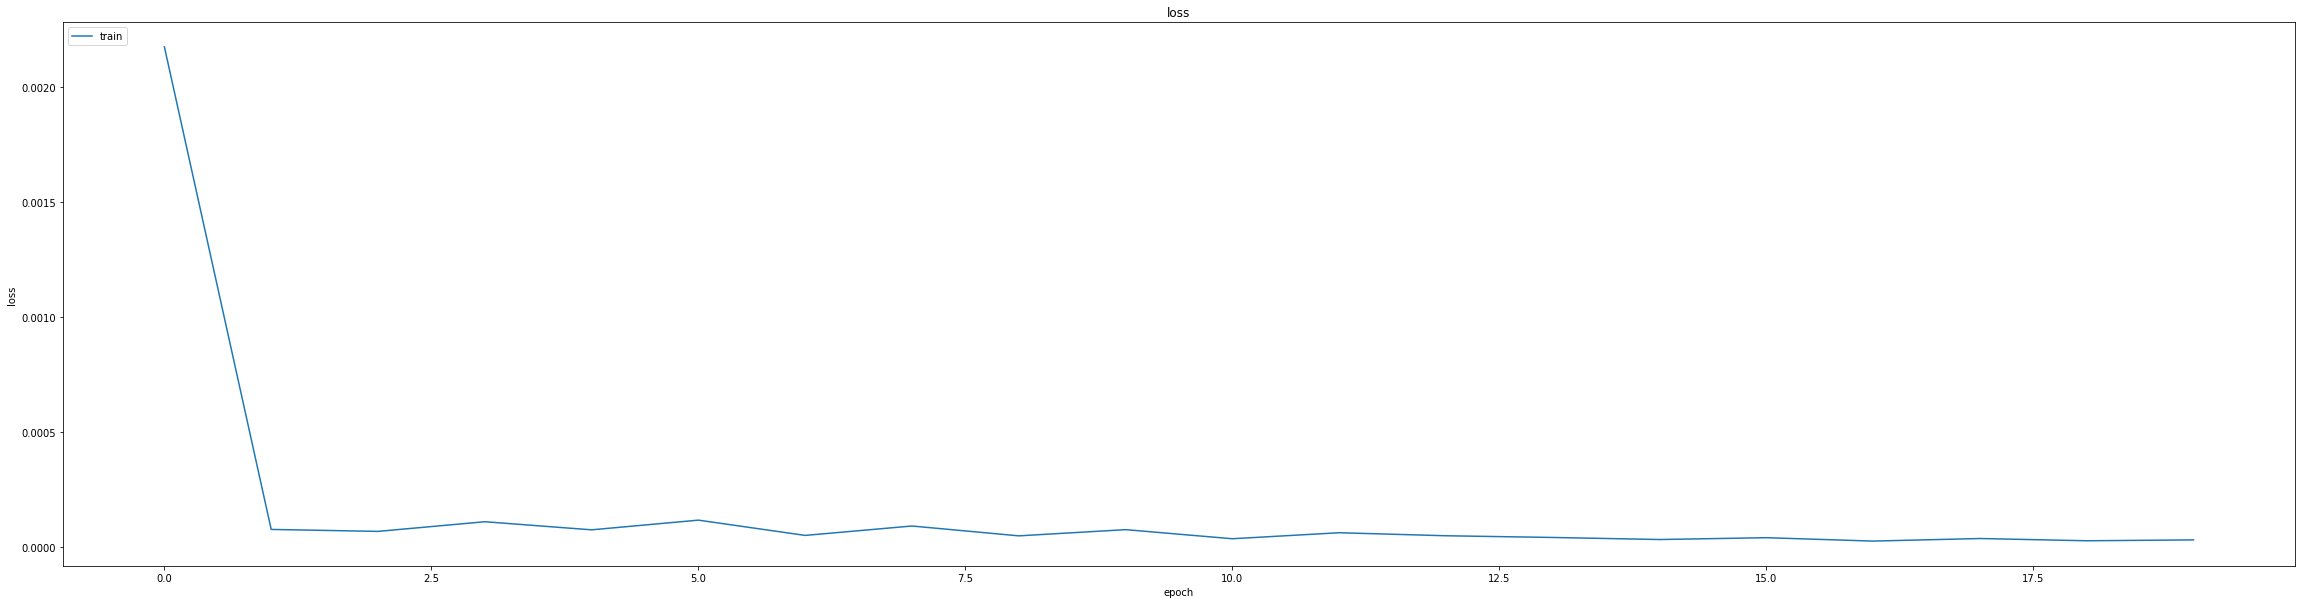

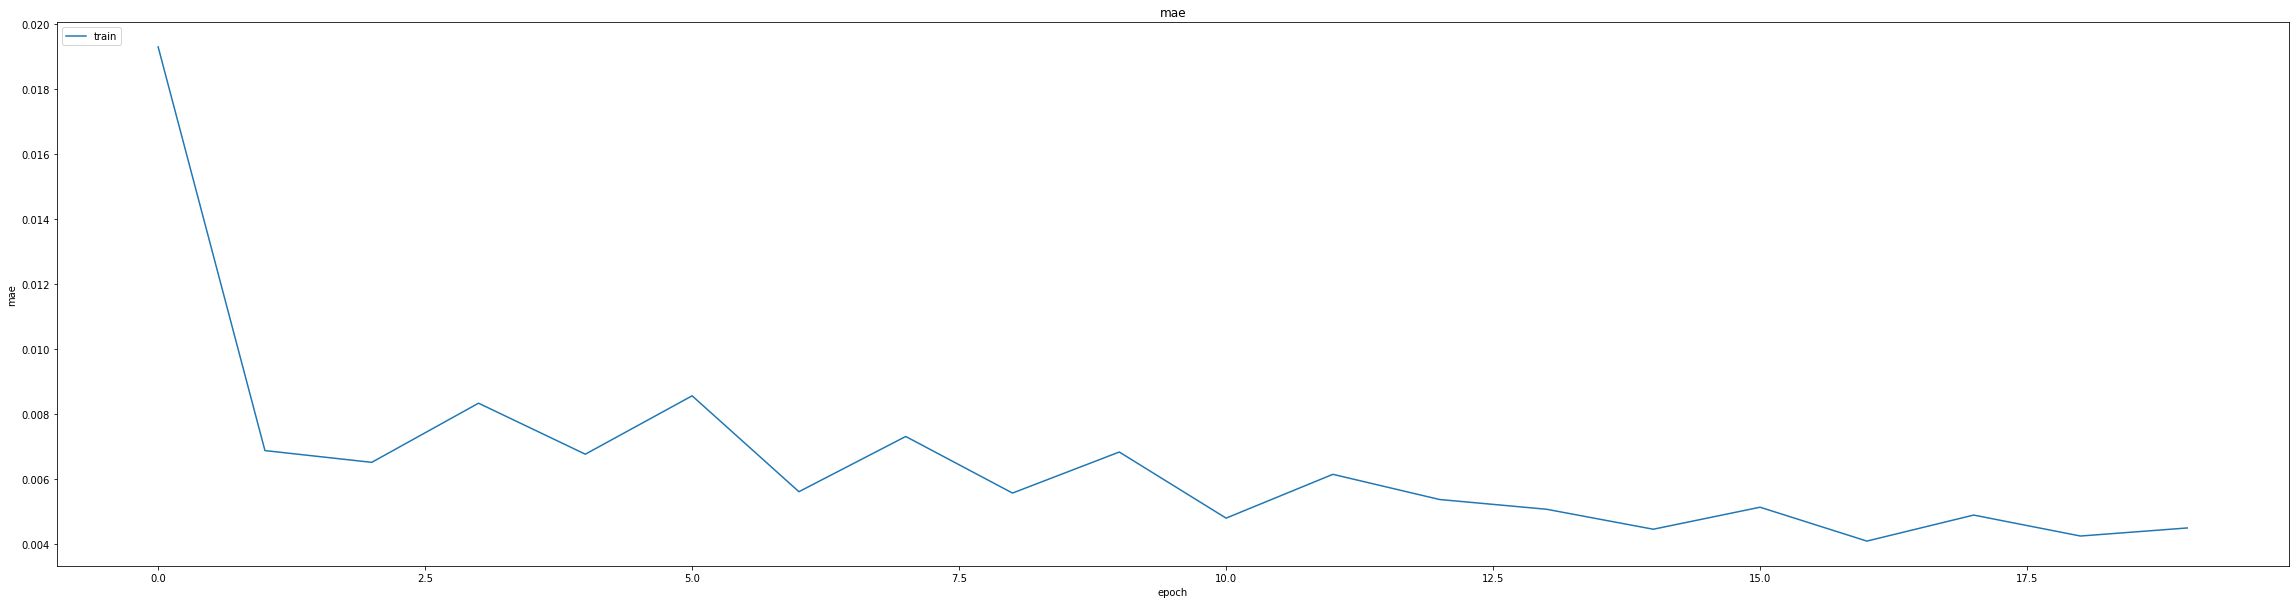

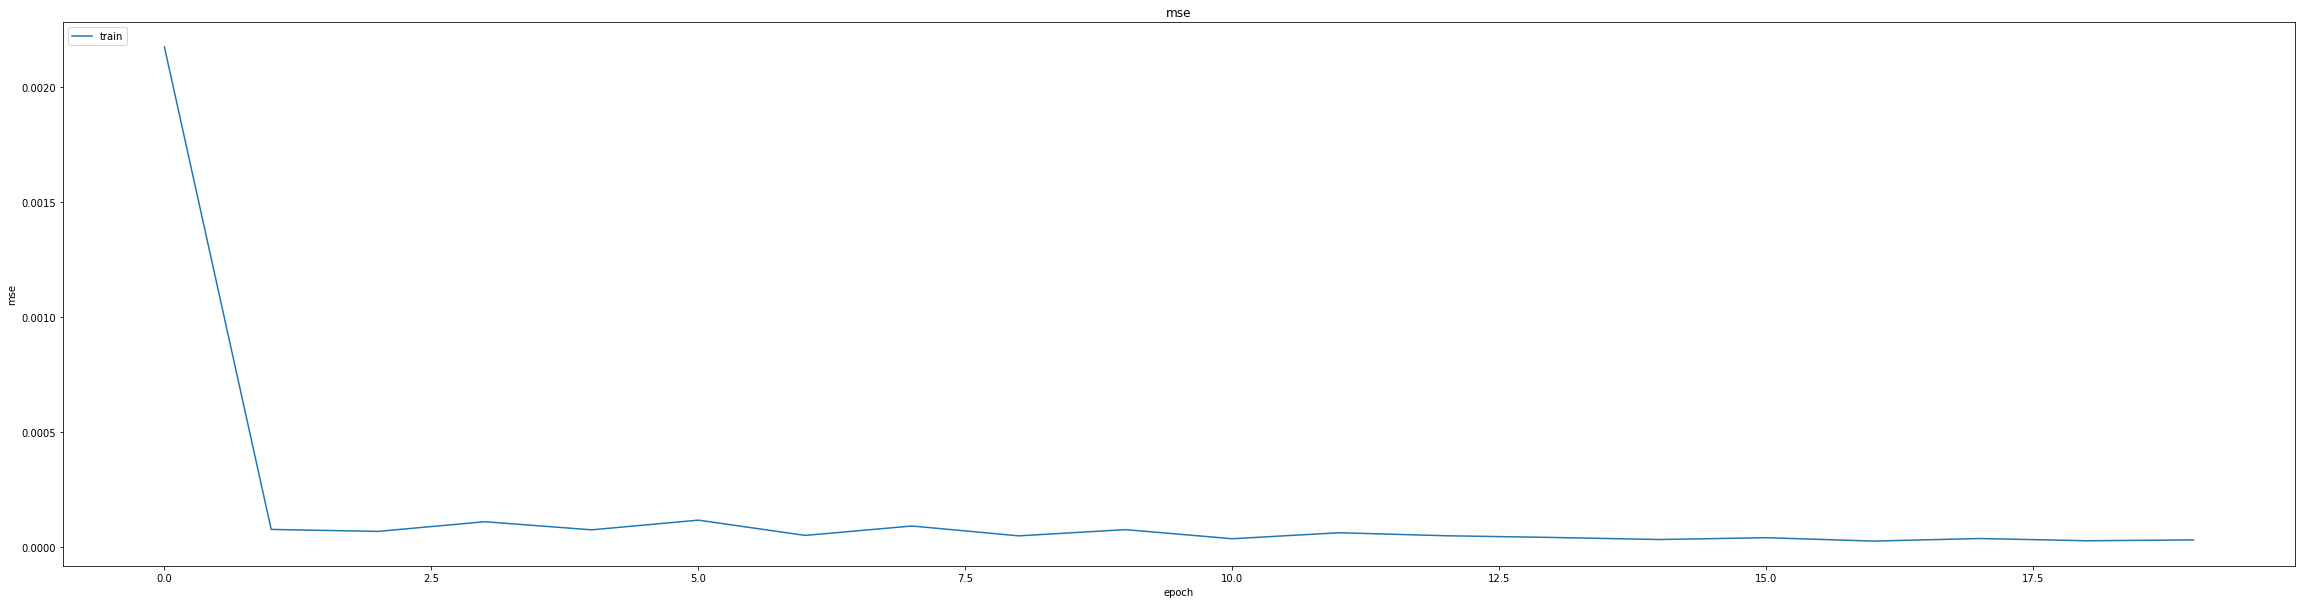

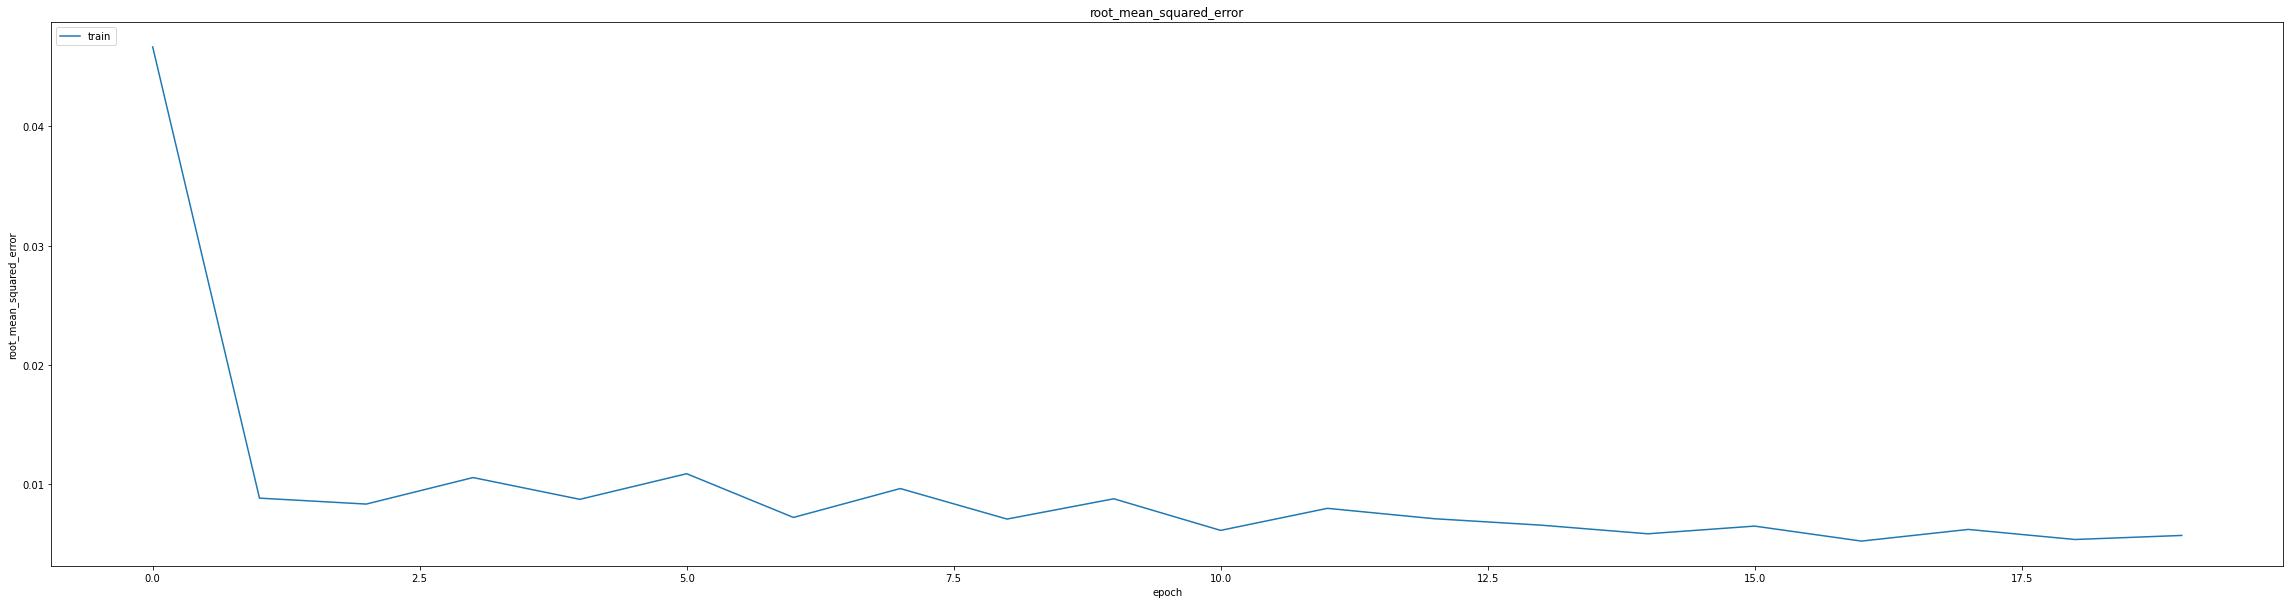

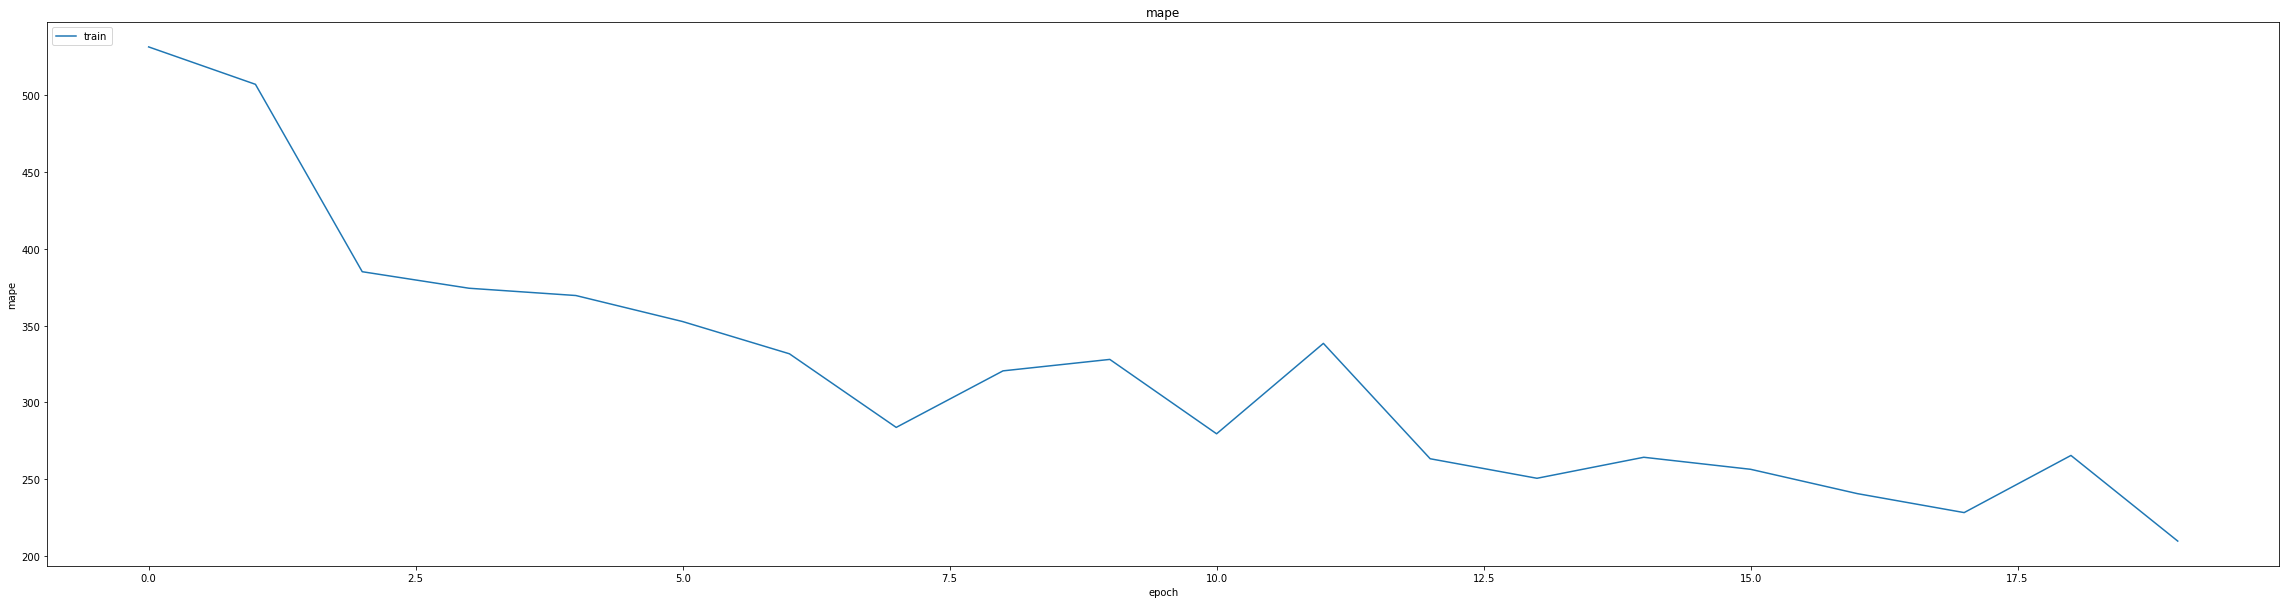

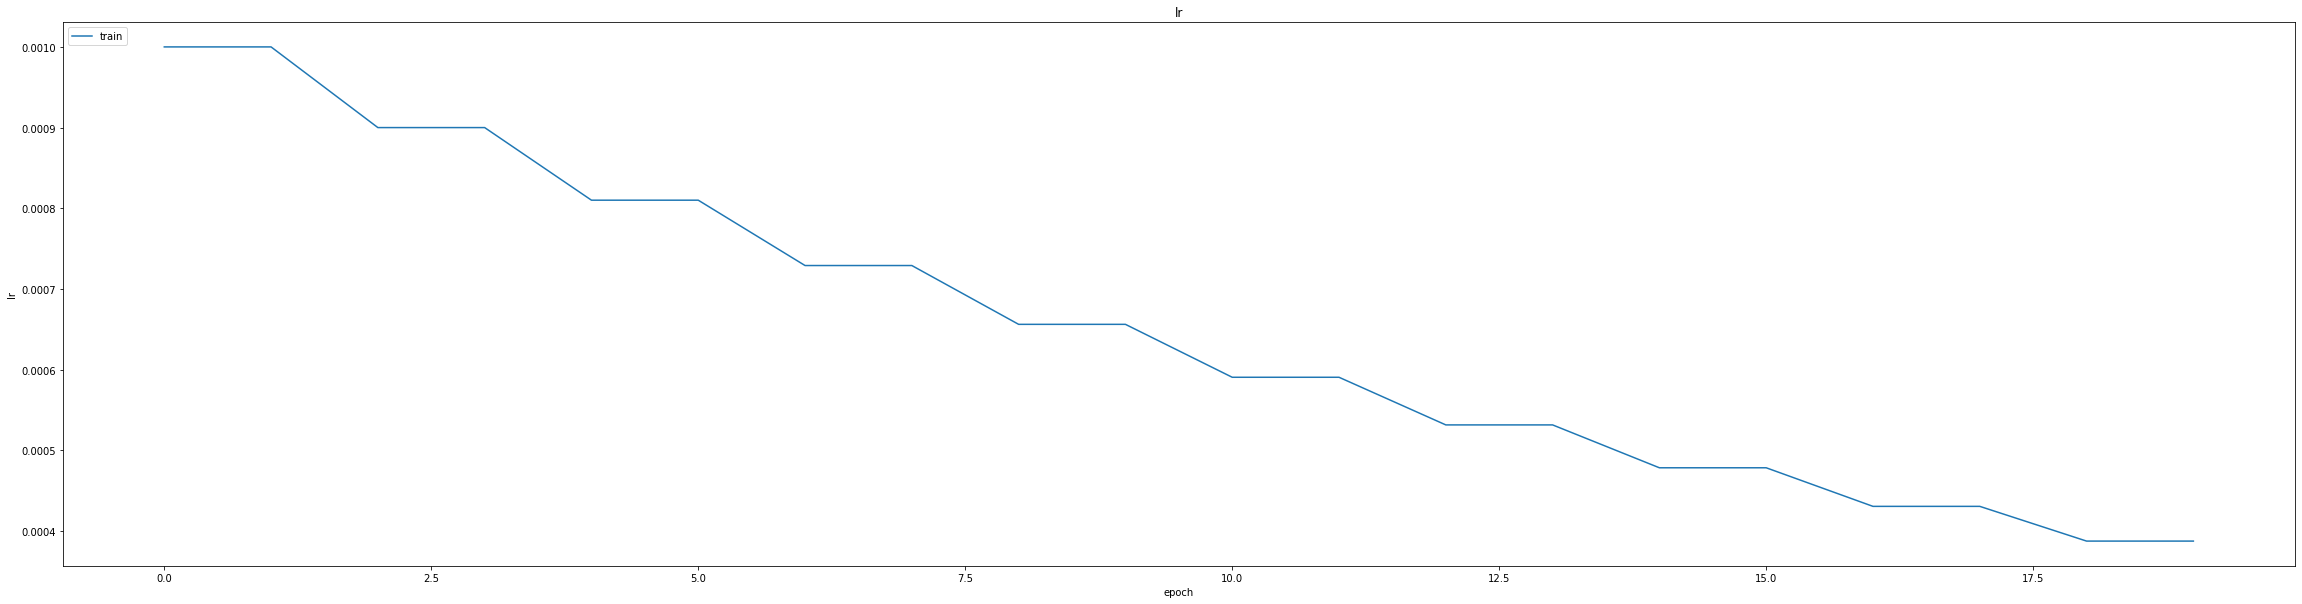

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006565100979059935
0.008354036137461662
1391/1391 [==============================] - 6s 4ms/step
0.9940110691732659


1391/1391 [==============================] - 5s 4ms/step


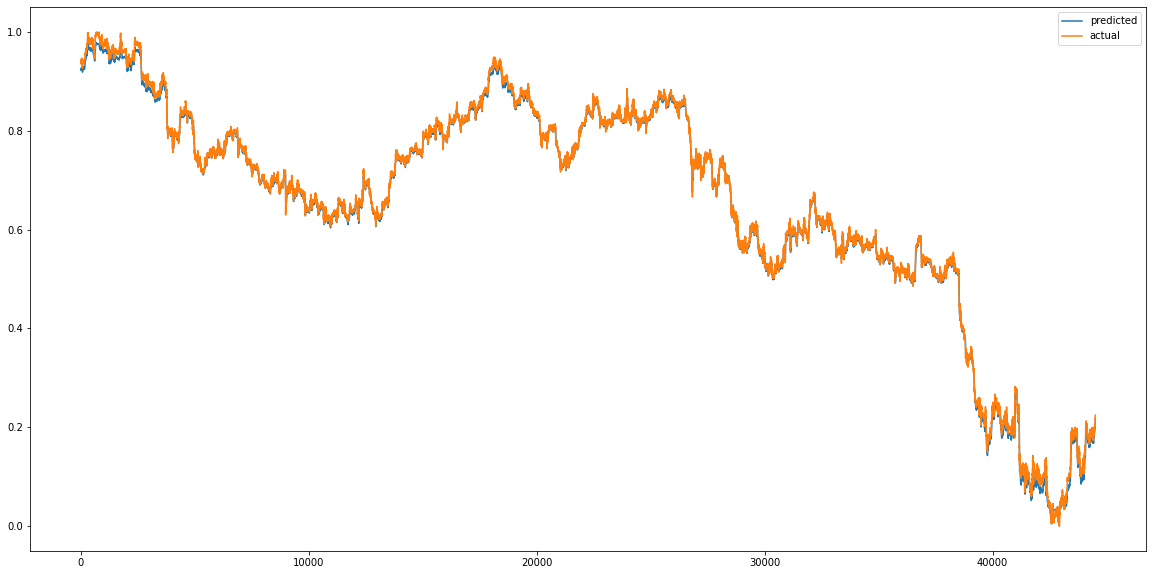

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


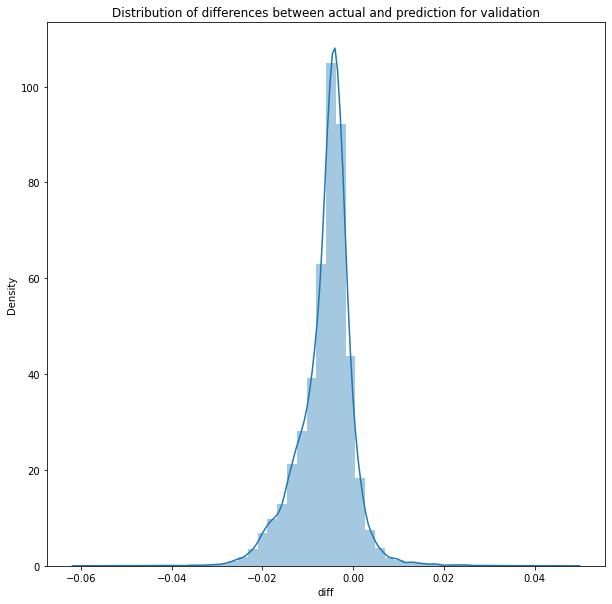

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 4ms/step


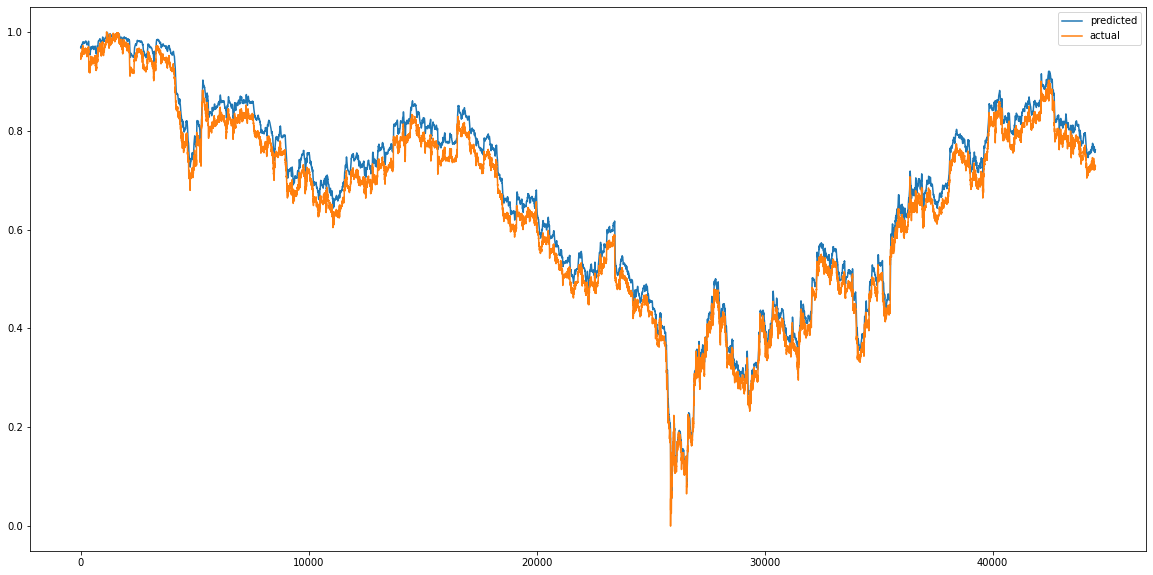

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


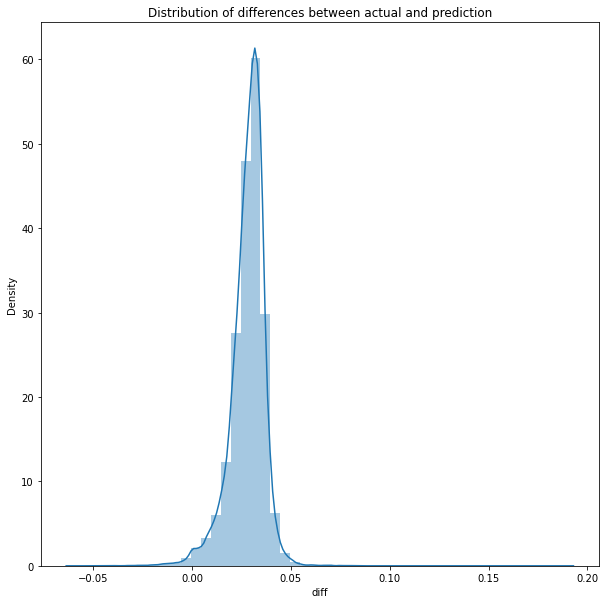

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0008705410782678627
RMSE :  0.02950493311749516
MAE :  0.028332435534407403
1391/1391 [==============================] - 6s 4ms/step
R2_Score  : 0.9772887902914618


count    44508.000000
mean         0.028178
std          0.008748
min         -0.060515
25%          0.024143
50%          0.029507
75%          0.033630
max          0.189863
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 251.1195 - mae: 2.2617 - mse: 251.1195 - root_mean_squared_error: 15.8468 - mape: 5315.5566
Epoch 1: val_mse improved from inf to 0.05827, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 39s 87ms/step - loss: 251.1195 - mae: 2.2617 - mse: 251.1195 - root_mean_squared_error: 15.8468 - mape: 5315.5566 - val_loss: 0.0583 - val_mae: 0.1875 - val_mse: 0.0583 - val_root_mean_squared_error: 0.2414 - val_mape: 15212.2812
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1587 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 5208.1602
Epoch 2: val_mse improved from 0.05827 to 0.02379, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0356 - mae: 0.1584 - mse: 0.0356 - root_mean_squared_error: 0.1888 - mape: 5179.0952 - val_loss: 0.0238 - val_mae: 0.1278 - val_mse: 0.0238 - val_root_mean_squared_error: 0.1543 - val_mape: 8919.0742
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.0114 - mae: 0.0845 - mse: 0.0114 - root_mean_squared_error: 0.1070 - mape: 2869.5032
Epoch 3: val_mse improved from 0.02379 to 0.00602, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0114 - mae: 0.0844 - mse: 0.0114 - root_mean_squared_error: 0.1068 - mape: 2853.4797 - val_loss: 0.0060 - val_mae: 0.0582 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0776 - val_mape: 6287.0396
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0054 - mae: 0.0575 - mse: 0.0054 - root_mean_squared_error: 0.0736 - mape: 2163.6697
Epoch 4: val_mse did not improve from 0.00602
347/347 [==============================] - 7s 20ms/step - loss: 0.0054 - mae: 0.0575 - mse: 0.0054 - root_mean_squared_error: 0.0736 - mape: 2163.6697 - val_loss: 0.0061 - val_mae: 0.0644 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0779 - val_mape: 5743.5781
Epoch 5/60
346/347 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0519 - mse: 0.0044 - root_mean_squared_error: 0.0667 - mape: 1994.4143
Epoch 5: val_mse improved from 0.00602 to 0.00591, saving model to /content/drive/MyDrive/modelweights/GBP_

347/347 [==============================] - 29s 84ms/step - loss: 0.0044 - mae: 0.0519 - mse: 0.0044 - root_mean_squared_error: 0.0667 - mape: 1989.0073 - val_loss: 0.0059 - val_mae: 0.0647 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0769 - val_mape: 5590.1797
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0479 - mse: 0.0038 - root_mean_squared_error: 0.0616 - mape: 1739.6166
Epoch 6: val_mse did not improve from 0.00591
347/347 [==============================] - 7s 20ms/step - loss: 0.0038 - mae: 0.0478 - mse: 0.0038 - root_mean_squared_error: 0.0616 - mape: 1734.8973 - val_loss: 0.0061 - val_mae: 0.0687 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0780 - val_mape: 5329.6484
Epoch 7/60
345/347 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0441 - mse: 0.0032 - root_mean_squared_error: 0.0568 - mape: 1856.7195
Epoch 7: val_mse did not improve from 0.00591
347/347 [==============================] - 7s 20ms/step - los

347/347 [==============================] - 30s 87ms/step - loss: 0.0023 - mae: 0.0373 - mse: 0.0023 - root_mean_squared_error: 0.0481 - mape: 1603.1206 - val_loss: 0.0050 - val_mae: 0.0657 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0705 - val_mape: 4446.4346
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0344 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 1448.7261
Epoch 10: val_mse did not improve from 0.00497
347/347 [==============================] - 7s 20ms/step - loss: 0.0020 - mae: 0.0344 - mse: 0.0020 - root_mean_squared_error: 0.0445 - mape: 1448.7261 - val_loss: 0.0053 - val_mae: 0.0689 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0729 - val_mape: 4367.0659
Epoch 11/60
345/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 1709.5048
Epoch 11: val_mse improved from 0.00497 to 0.00461, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 29s 84ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0410 - mape: 1699.9589 - val_loss: 0.0046 - val_mae: 0.0641 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0679 - val_mape: 4301.0425
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1575.1205
Epoch 12: val_mse improved from 0.00461 to 0.00408, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 83ms/step - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1575.1205 - val_loss: 0.0041 - val_mae: 0.0603 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 4215.0713
Epoch 13/60
346/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1418.6022
Epoch 13: val_mse did not improve from 0.00408
347/347 [==============================] - 7s 20ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 1414.7500 - val_loss: 0.0046 - val_mae: 0.0650 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 4102.6538
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1405.9485
Epoch 14: val_mse improved from 0.00408 to 0.00358, saving model to /content/drive/MyDrive/modelweights/

347/347 [==============================] - 29s 84ms/step - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1405.9485 - val_loss: 0.0036 - val_mae: 0.0569 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 3978.0645
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 9.1817e-04 - mae: 0.0231 - mse: 9.1817e-04 - root_mean_squared_error: 0.0303 - mape: 1367.4468
Epoch 15: val_mse did not improve from 0.00358
347/347 [==============================] - 7s 20ms/step - loss: 9.1850e-04 - mae: 0.0231 - mse: 9.1850e-04 - root_mean_squared_error: 0.0303 - mape: 1363.7410 - val_loss: 0.0036 - val_mae: 0.0576 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0603 - val_mape: 3829.2349
Epoch 16/60
345/347 [============================>.] - ETA: 0s - loss: 7.9134e-04 - mae: 0.0214 - mse: 7.9134e-04 - root_mean_squared_error: 0.0281 - mape: 1279.8229
Epoch 16: val_mse improved from 0.00358 to 0.00301, saving model to /content/dri

347/347 [==============================] - 29s 84ms/step - loss: 7.9108e-04 - mae: 0.0214 - mse: 7.9108e-04 - root_mean_squared_error: 0.0281 - mape: 1272.6716 - val_loss: 0.0030 - val_mae: 0.0524 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 3669.7607
Epoch 17/60
347/347 [==============================] - ETA: 0s - loss: 6.7403e-04 - mae: 0.0197 - mse: 6.7403e-04 - root_mean_squared_error: 0.0260 - mape: 1247.7847
Epoch 17: val_mse did not improve from 0.00301
347/347 [==============================] - 7s 20ms/step - loss: 6.7403e-04 - mae: 0.0197 - mse: 6.7403e-04 - root_mean_squared_error: 0.0260 - mape: 1247.7847 - val_loss: 0.0031 - val_mae: 0.0532 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0554 - val_mape: 3504.3008
Epoch 18/60
346/347 [============================>.] - ETA: 0s - loss: 5.7909e-04 - mae: 0.0183 - mse: 5.7909e-04 - root_mean_squared_error: 0.0241 - mape: 1171.4258
Epoch 18: val_mse improved from 0.00301 to 0.00243, saving model to /con

347/347 [==============================] - 29s 84ms/step - loss: 5.7913e-04 - mae: 0.0183 - mse: 5.7913e-04 - root_mean_squared_error: 0.0241 - mape: 1168.2468 - val_loss: 0.0024 - val_mae: 0.0473 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 3348.2600
Epoch 19/60
345/347 [============================>.] - ETA: 0s - loss: 4.9100e-04 - mae: 0.0168 - mse: 4.9100e-04 - root_mean_squared_error: 0.0222 - mape: 1004.6279
Epoch 19: val_mse did not improve from 0.00243
347/347 [==============================] - 8s 22ms/step - loss: 4.9096e-04 - mae: 0.0168 - mse: 4.9096e-04 - root_mean_squared_error: 0.0222 - mape: 999.0168 - val_loss: 0.0027 - val_mae: 0.0504 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mape: 3189.5249
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 4.1378e-04 - mae: 0.0154 - mse: 4.1378e-04 - root_mean_squared_error: 0.0203 - mape: 1021.9172
Epoch 20: val_mse improved from 0.00243 to 0.00225, saving model to /cont

347/347 [==============================] - 37s 106ms/step - loss: 4.1366e-04 - mae: 0.0154 - mse: 4.1366e-04 - root_mean_squared_error: 0.0203 - mape: 1019.1424 - val_loss: 0.0023 - val_mae: 0.0458 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 3033.7463
Epoch 21/60
346/347 [============================>.] - ETA: 0s - loss: 3.5658e-04 - mae: 0.0143 - mse: 3.5658e-04 - root_mean_squared_error: 0.0189 - mape: 1008.2922
Epoch 21: val_mse did not improve from 0.00225
347/347 [==============================] - 7s 21ms/step - loss: 3.5677e-04 - mae: 0.0143 - mse: 3.5677e-04 - root_mean_squared_error: 0.0189 - mape: 1005.5588 - val_loss: 0.0030 - val_mae: 0.0528 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0543 - val_mape: 2882.9700
Epoch 22/60
345/347 [============================>.] - ETA: 0s - loss: 3.0097e-04 - mae: 0.0132 - mse: 3.0097e-04 - root_mean_squared_error: 0.0173 - mape: 1091.3068
Epoch 22: val_mse improved from 0.00225 to 0.00211, saving model to /co

347/347 [==============================] - 29s 84ms/step - loss: 3.0057e-04 - mae: 0.0131 - mse: 3.0057e-04 - root_mean_squared_error: 0.0173 - mape: 1085.2000 - val_loss: 0.0021 - val_mae: 0.0447 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0460 - val_mape: 2734.0728
Epoch 23/60
345/347 [============================>.] - ETA: 0s - loss: 2.6130e-04 - mae: 0.0123 - mse: 2.6130e-04 - root_mean_squared_error: 0.0162 - mape: 832.8165
Epoch 23: val_mse improved from 0.00211 to 0.00206, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 2.6117e-04 - mae: 0.0123 - mse: 2.6117e-04 - root_mean_squared_error: 0.0162 - mape: 828.1616 - val_loss: 0.0021 - val_mae: 0.0442 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0454 - val_mape: 2600.4890
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 2.2007e-04 - mae: 0.0113 - mse: 2.2007e-04 - root_mean_squared_error: 0.0148 - mape: 917.9485
Epoch 24: val_mse did not improve from 0.00206
347/347 [==============================] - 8s 23ms/step - loss: 2.2007e-04 - mae: 0.0113 - mse: 2.2007e-04 - root_mean_squared_error: 0.0148 - mape: 917.9485 - val_loss: 0.0025 - val_mae: 0.0482 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0495 - val_mape: 2467.2405
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 1.9330e-04 - mae: 0.0106 - mse: 1.9330e-04 - root_mean_squared_error: 0.0139 - mape: 880.9382
Epoch 25: val_mse improved from 0.00206 to 0.00192, saving model to /content

347/347 [==============================] - 29s 85ms/step - loss: 1.9314e-04 - mae: 0.0106 - mse: 1.9314e-04 - root_mean_squared_error: 0.0139 - mape: 878.5418 - val_loss: 0.0019 - val_mae: 0.0425 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 2342.7502
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 1.6842e-04 - mae: 0.0099 - mse: 1.6842e-04 - root_mean_squared_error: 0.0130 - mape: 719.6843
Epoch 26: val_mse improved from 0.00192 to 0.00182, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 84ms/step - loss: 1.6819e-04 - mae: 0.0099 - mse: 1.6819e-04 - root_mean_squared_error: 0.0130 - mape: 715.6573 - val_loss: 0.0018 - val_mae: 0.0413 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 2225.3259
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 1.4465e-04 - mae: 0.0092 - mse: 1.4465e-04 - root_mean_squared_error: 0.0120 - mape: 797.8931
Epoch 27: val_mse improved from 0.00182 to 0.00157, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)


347/347 [==============================] - 29s 85ms/step - loss: 1.4465e-04 - mae: 0.0092 - mse: 1.4465e-04 - root_mean_squared_error: 0.0120 - mape: 797.8931 - val_loss: 0.0016 - val_mae: 0.0383 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 2115.4966
Epoch 28/60
347/347 [==============================] - ETA: 0s - loss: 1.3486e-04 - mae: 0.0089 - mse: 1.3486e-04 - root_mean_squared_error: 0.0116 - mape: 719.8096
Epoch 28: val_mse did not improve from 0.00157
347/347 [==============================] - 7s 20ms/step - loss: 1.3486e-04 - mae: 0.0089 - mse: 1.3486e-04 - root_mean_squared_error: 0.0116 - mape: 719.8096 - val_loss: 0.0017 - val_mae: 0.0396 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 2012.5295
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 1.1498e-04 - mae: 0.0082 - mse: 1.1498e-04 - root_mean_squared_error: 0.0107 - mape: 733.5121
Epoch 29: val_mse did not improve from 0.00157
347/347 [====================

347/347 [==============================] - 28s 82ms/step - loss: 1.0619e-04 - mae: 0.0079 - mse: 1.0619e-04 - root_mean_squared_error: 0.0103 - mape: 686.1797 - val_loss: 0.0011 - val_mae: 0.0326 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 1826.9041
Epoch 31/60
347/347 [==============================] - ETA: 0s - loss: 9.9860e-05 - mae: 0.0077 - mse: 9.9860e-05 - root_mean_squared_error: 0.0100 - mape: 686.9547
Epoch 31: val_mse did not improve from 0.00112
347/347 [==============================] - 7s 20ms/step - loss: 9.9860e-05 - mae: 0.0077 - mse: 9.9860e-05 - root_mean_squared_error: 0.0100 - mape: 686.9547 - val_loss: 0.0016 - val_mae: 0.0386 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 1750.7863
Epoch 32/60
345/347 [============================>.] - ETA: 0s - loss: 9.5697e-05 - mae: 0.0076 - mse: 9.5697e-05 - root_mean_squared_error: 0.0098 - mape: 613.6857
Epoch 32: val_mse did not improve from 0.00112
347/347 [====================

347/347 [==============================] - 29s 82ms/step - loss: 1.0361e-04 - mae: 0.0078 - mse: 1.0361e-04 - root_mean_squared_error: 0.0102 - mape: 377.4341 - val_loss: 9.3979e-04 - val_mae: 0.0300 - val_mse: 9.3979e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 1126.2057
Epoch 52/60
345/347 [============================>.] - ETA: 0s - loss: 1.0071e-04 - mae: 0.0074 - mse: 1.0071e-04 - root_mean_squared_error: 0.0100 - mape: 404.1132
Epoch 52: val_mse did not improve from 0.00094
347/347 [==============================] - 7s 20ms/step - loss: 1.0055e-04 - mae: 0.0074 - mse: 1.0055e-04 - root_mean_squared_error: 0.0100 - mape: 401.8552 - val_loss: 0.0018 - val_mae: 0.0412 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 1097.4047
Epoch 53/60
346/347 [============================>.] - ETA: 0s - loss: 1.2927e-04 - mae: 0.0080 - mse: 1.2927e-04 - root_mean_squared_error: 0.0114 - mape: 405.5521
Epoch 53: val_mse did not improve from 0.00094
347/347 [============

347/347 [==============================] - 28s 82ms/step - loss: 6.9779e-05 - mae: 0.0064 - mse: 6.9779e-05 - root_mean_squared_error: 0.0084 - mape: 322.5249 - val_loss: 5.9514e-04 - val_mae: 0.0238 - val_mse: 5.9514e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 975.5102


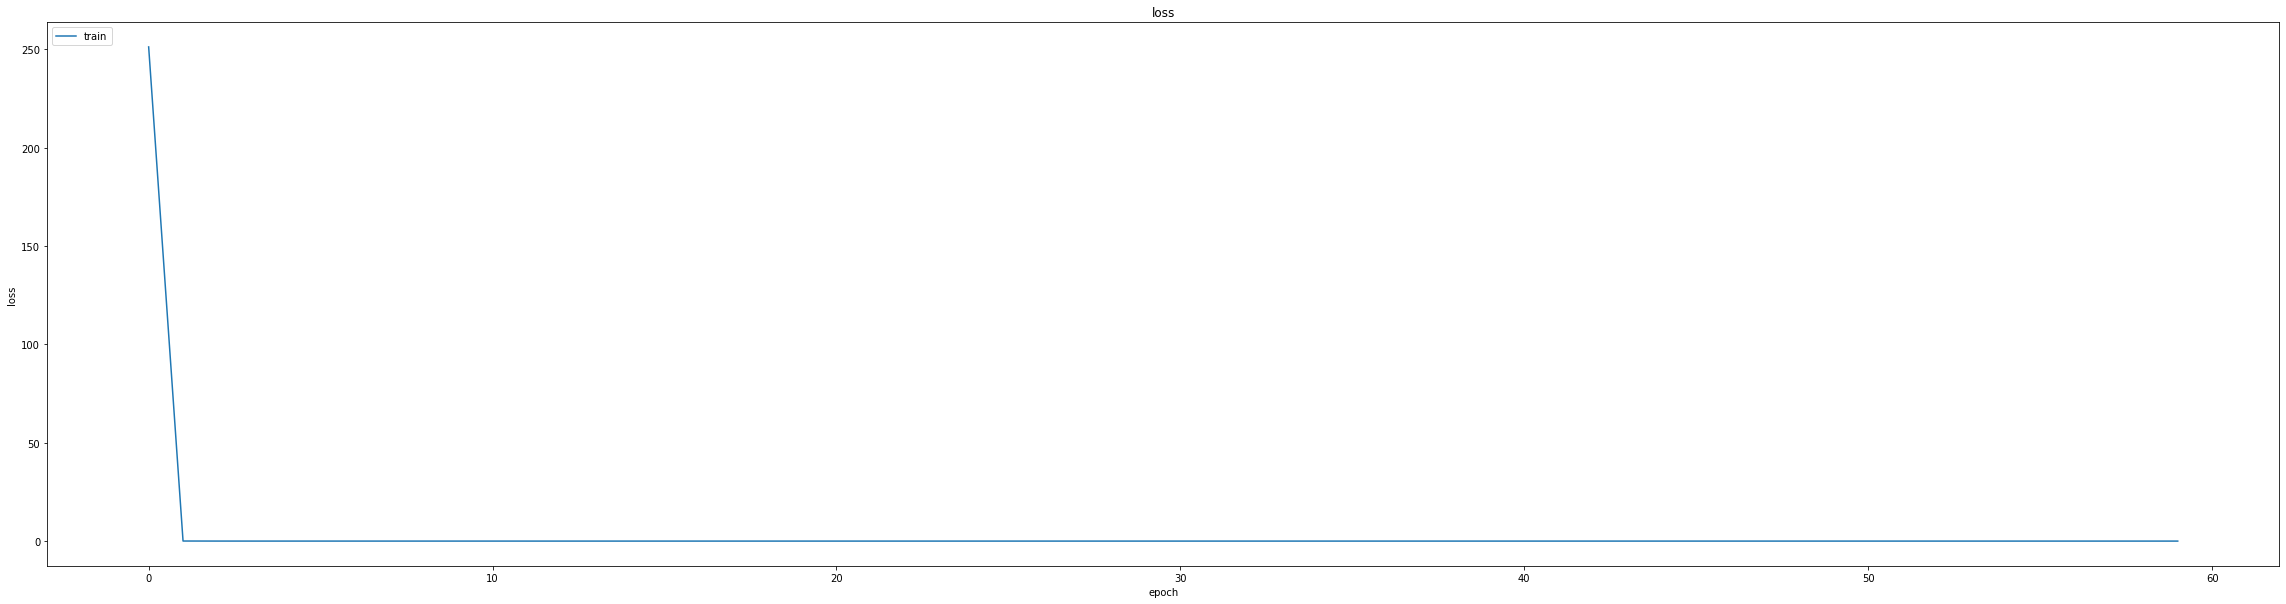

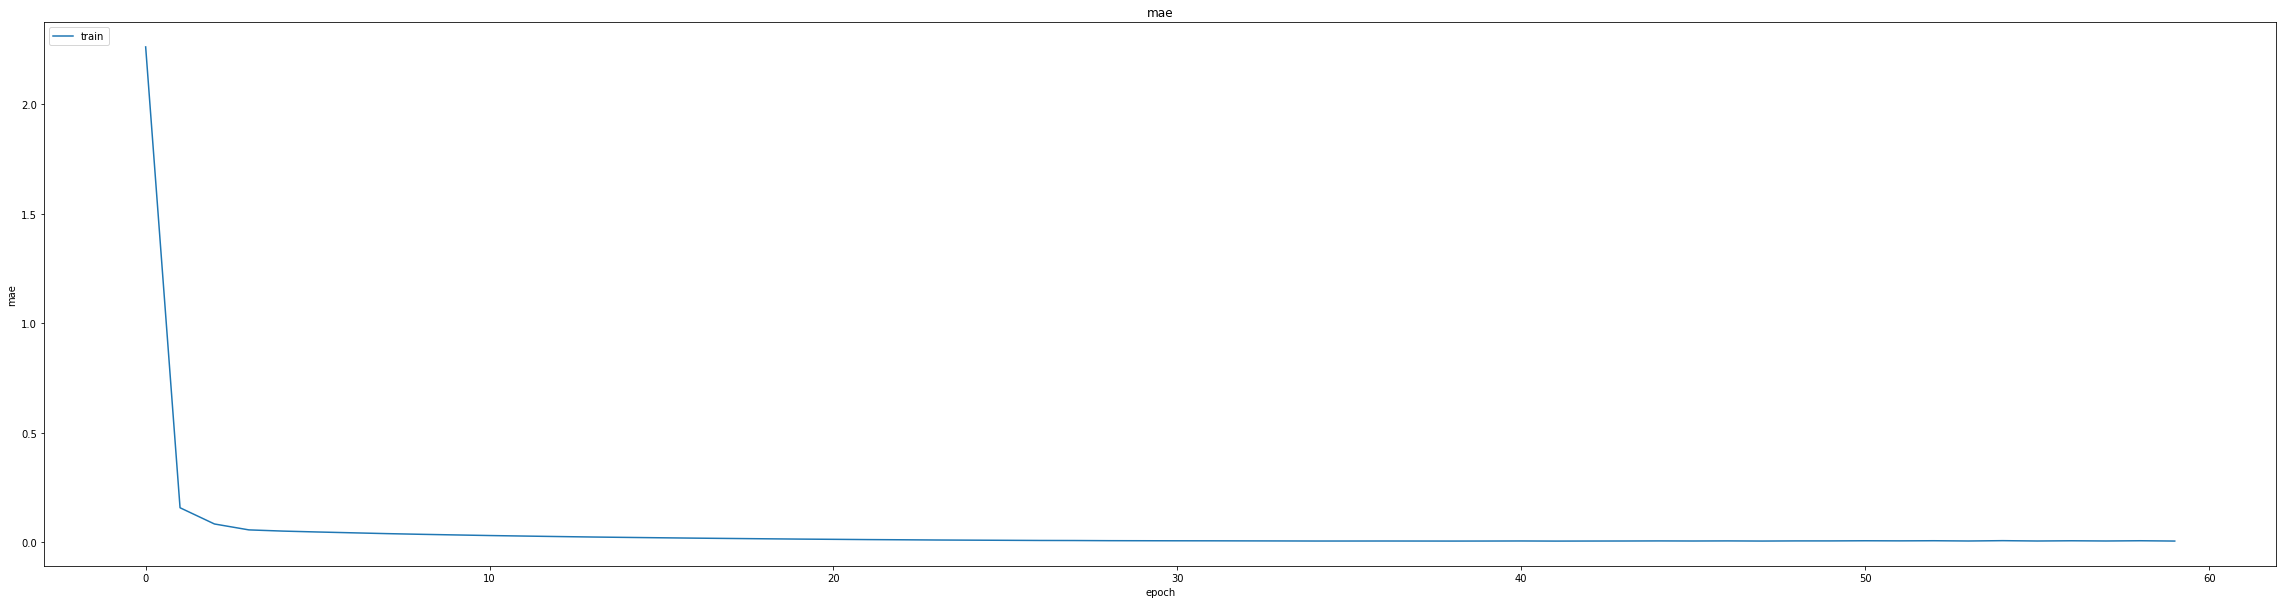

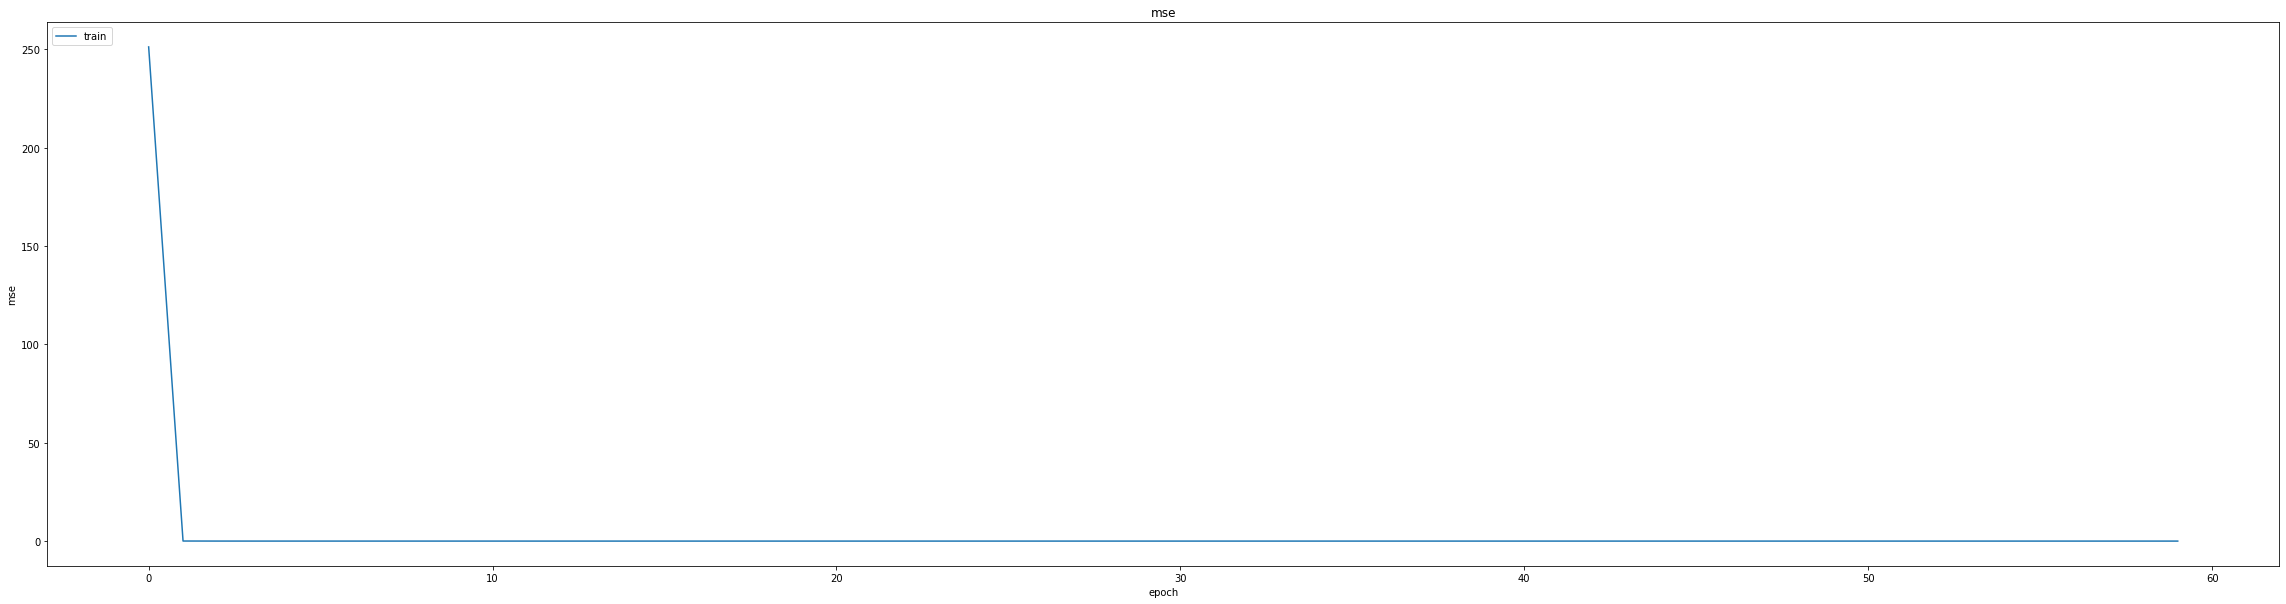

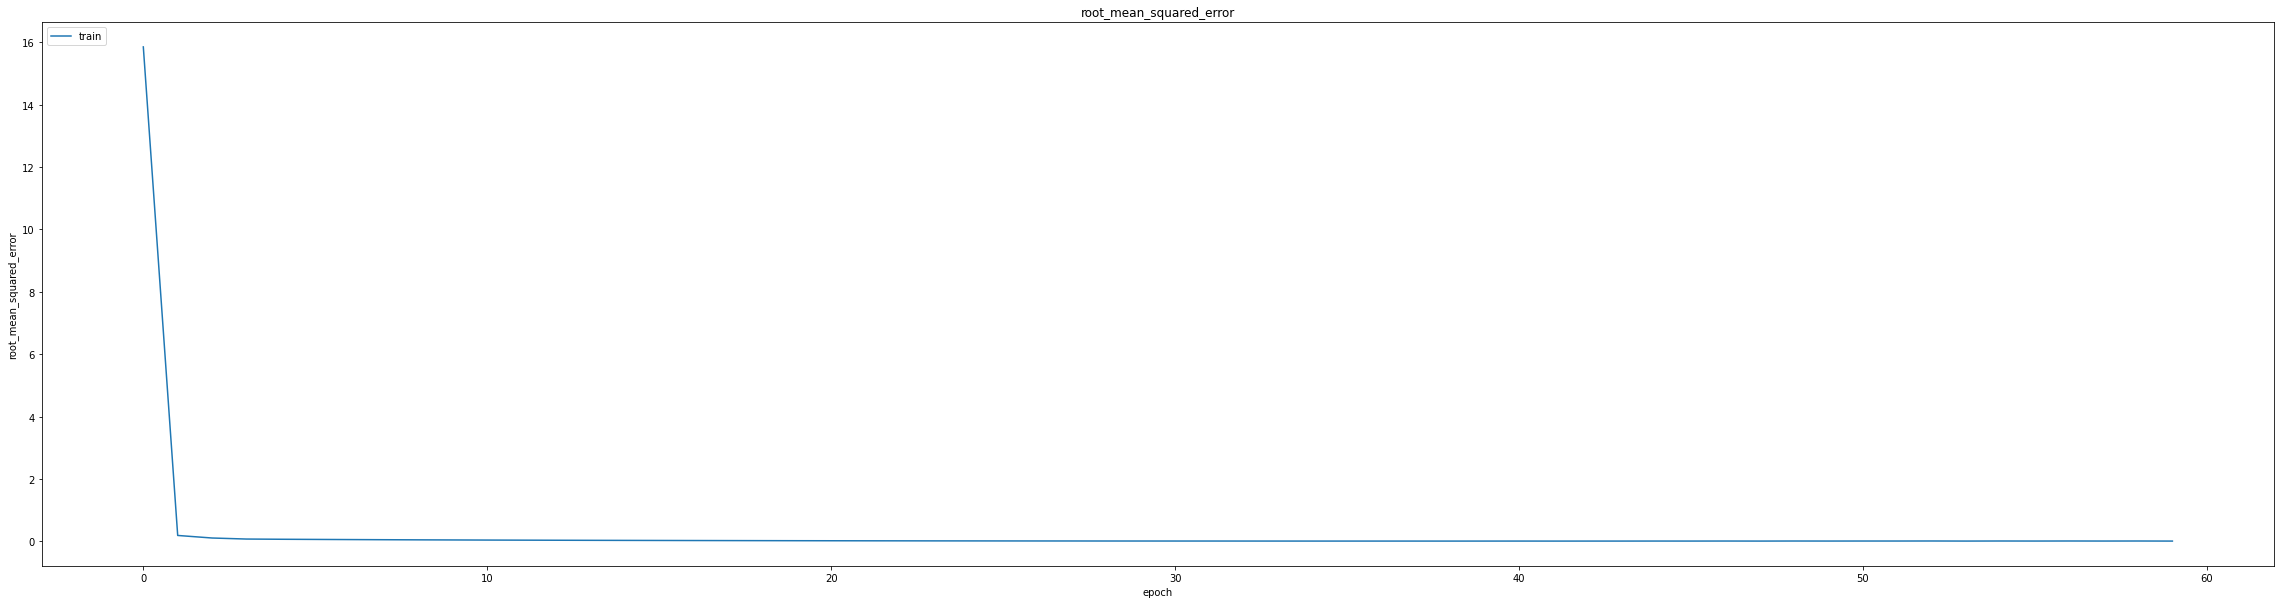

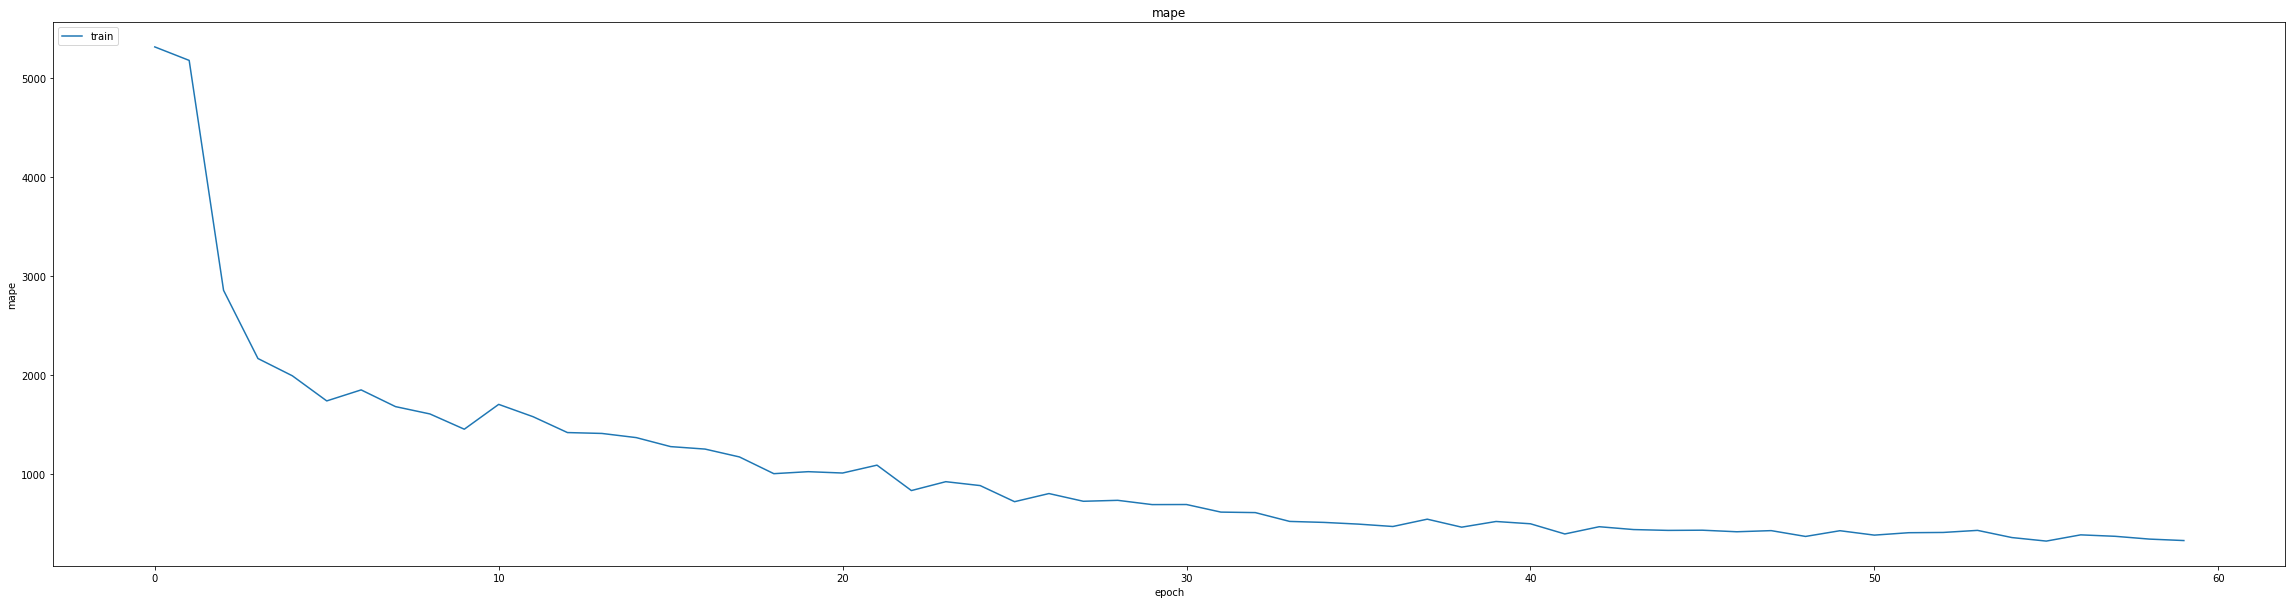

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023842157796025276
0.024395443499088287
1391/1391 [==============================] - 8s 5ms/step
0.9886868582283351


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


346/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0127 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 490.6346
Epoch 1: val_mse did not improve from 0.00060
347/347 [==============================] - 14s 23ms/step - loss: 0.0011 - mae: 0.0127 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 489.3000 - val_loss: 0.0011 - val_mae: 0.0332 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 1061.9899 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 2.6921e-05 - mae: 0.0040 - mse: 2.6921e-05 - root_mean_squared_error: 0.0052 - mape: 322.4528
Epoch 2: val_mse did not improve from 0.00060
347/347 [==============================] - 7s 19ms/step - loss: 2.6921e-05 - mae: 0.0040 - mse: 2.6921e-05 - root_mean_squared_error: 0.0052 - mape: 322.4528 - val_loss: 0.0012 - val_mae: 0.0336 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 944.5861 - lr: 0.0010
lr changed to 0.0009000000427477062

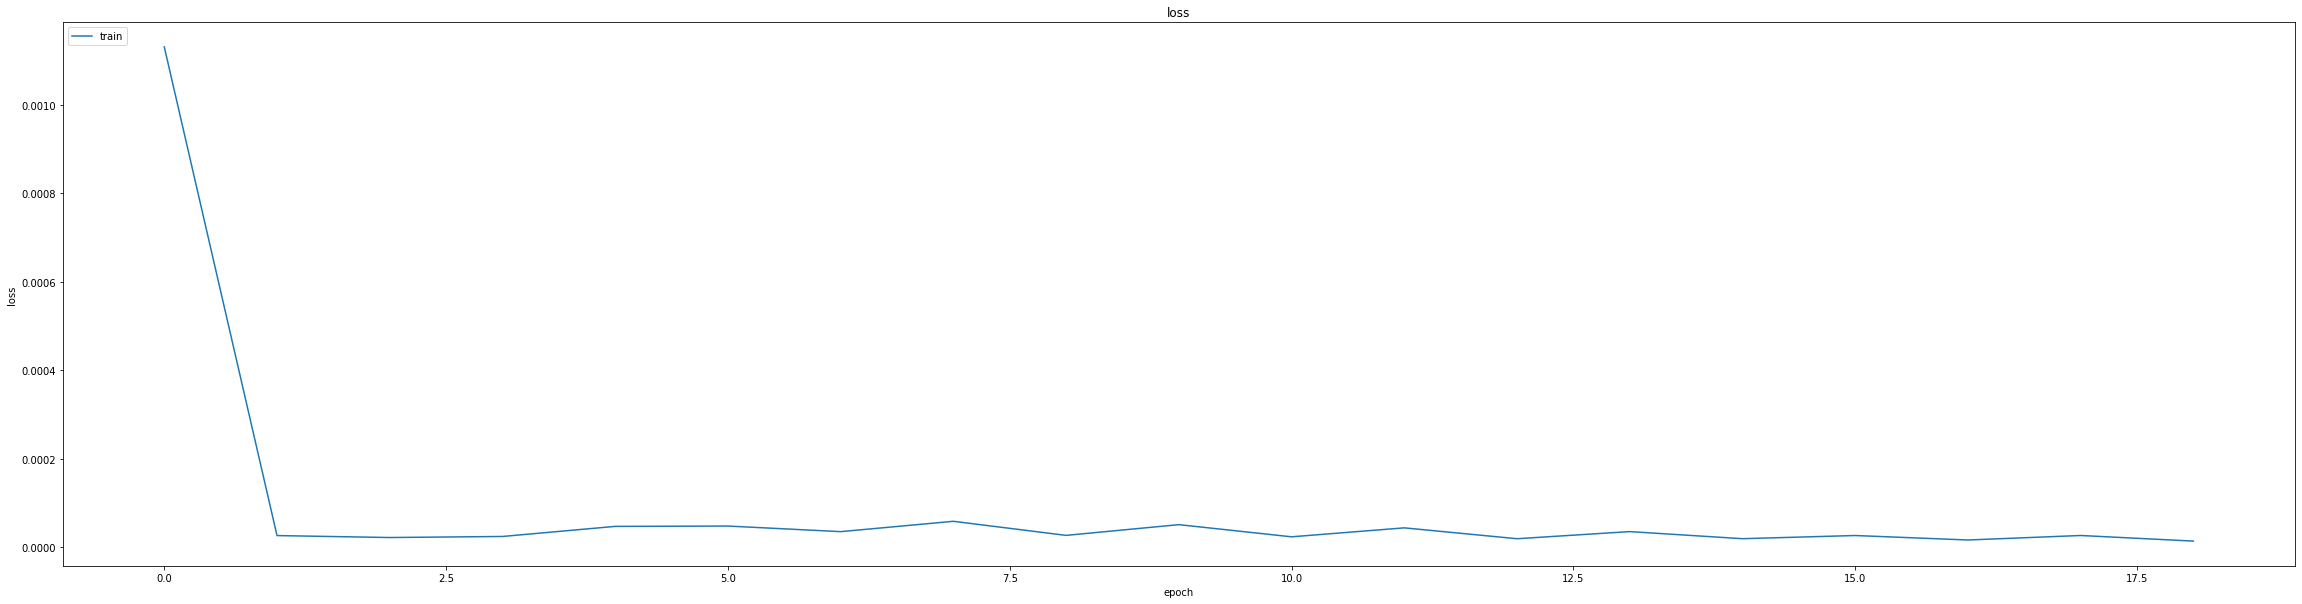

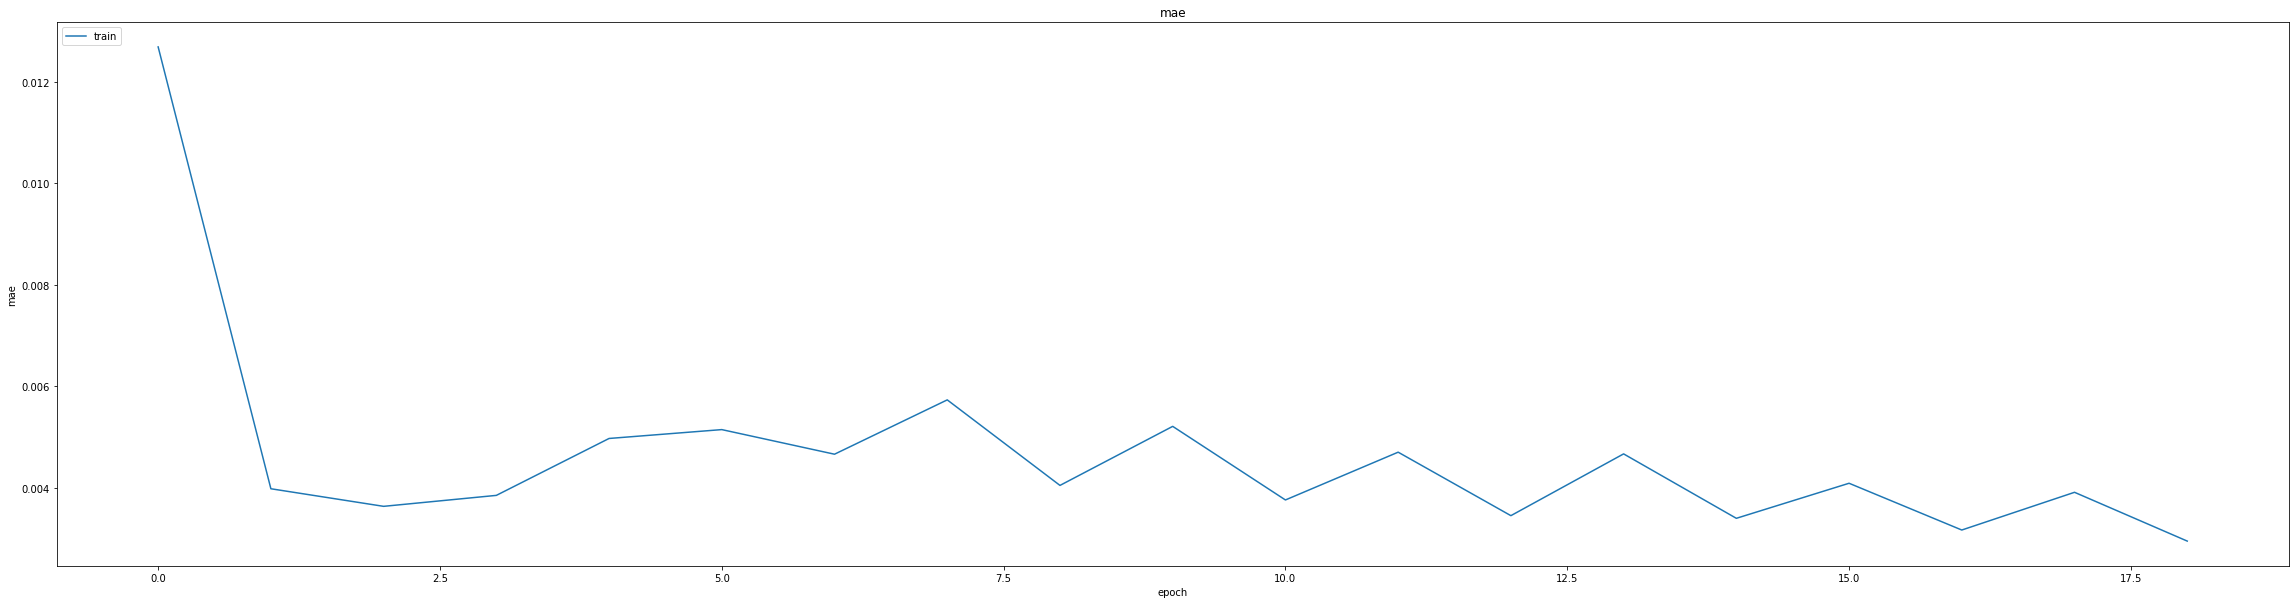

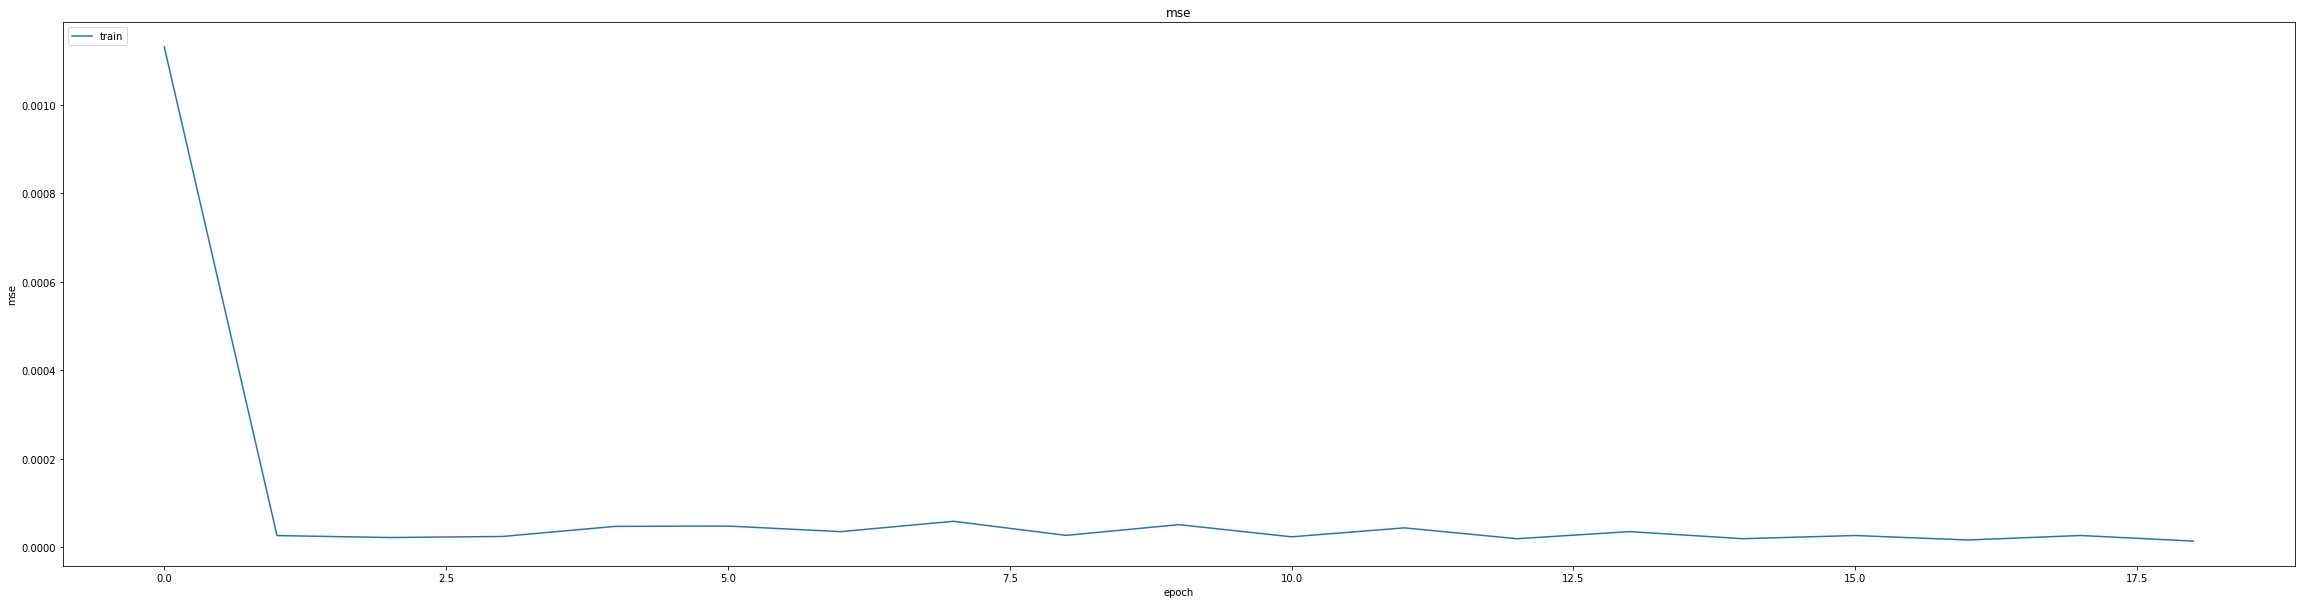

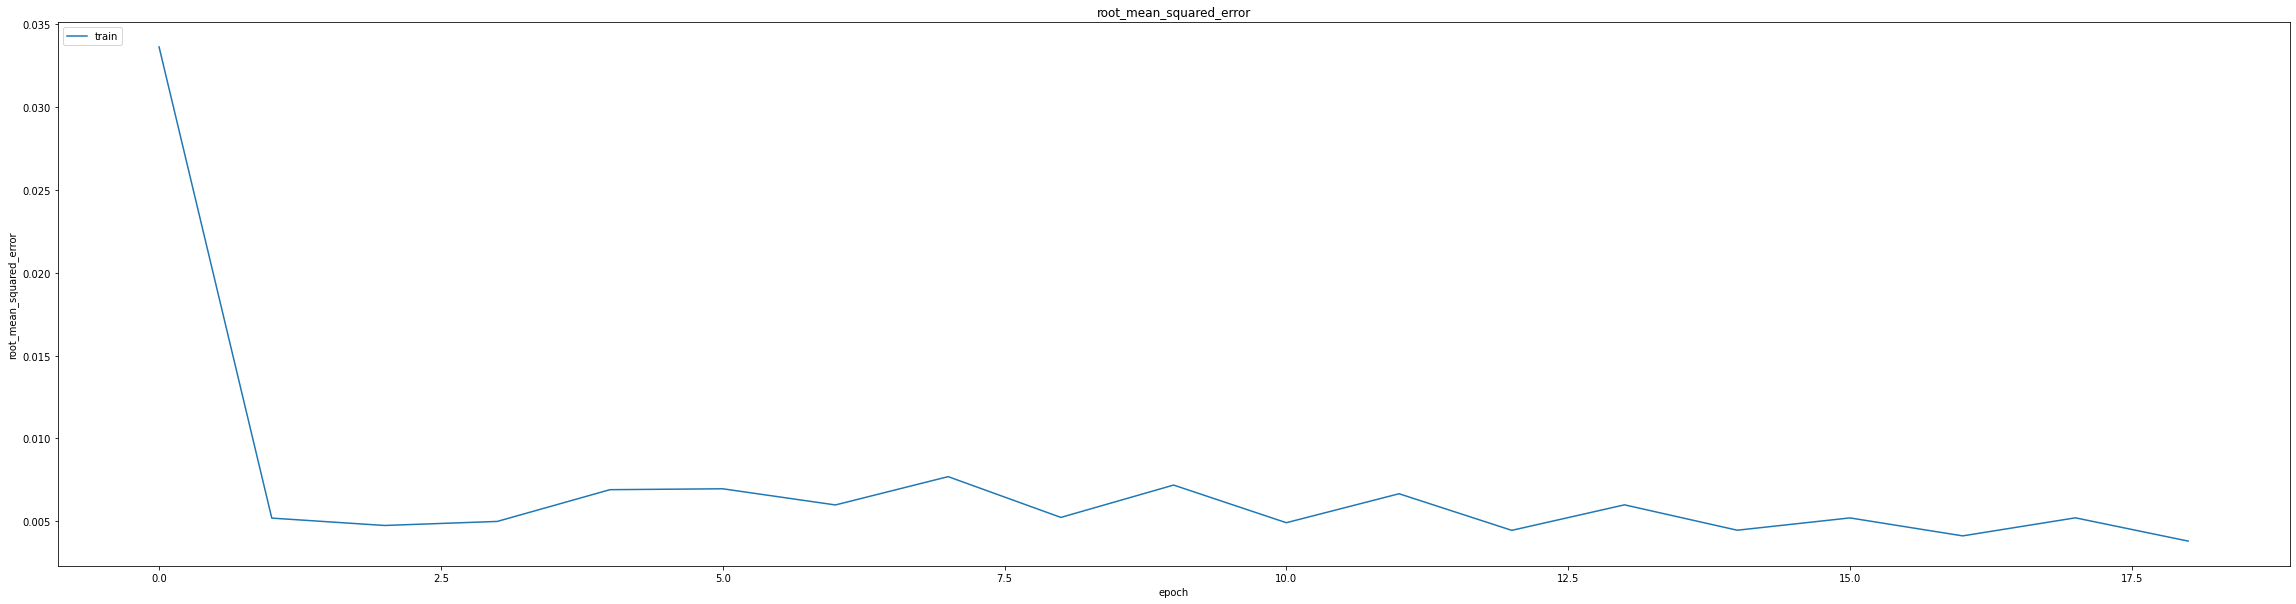

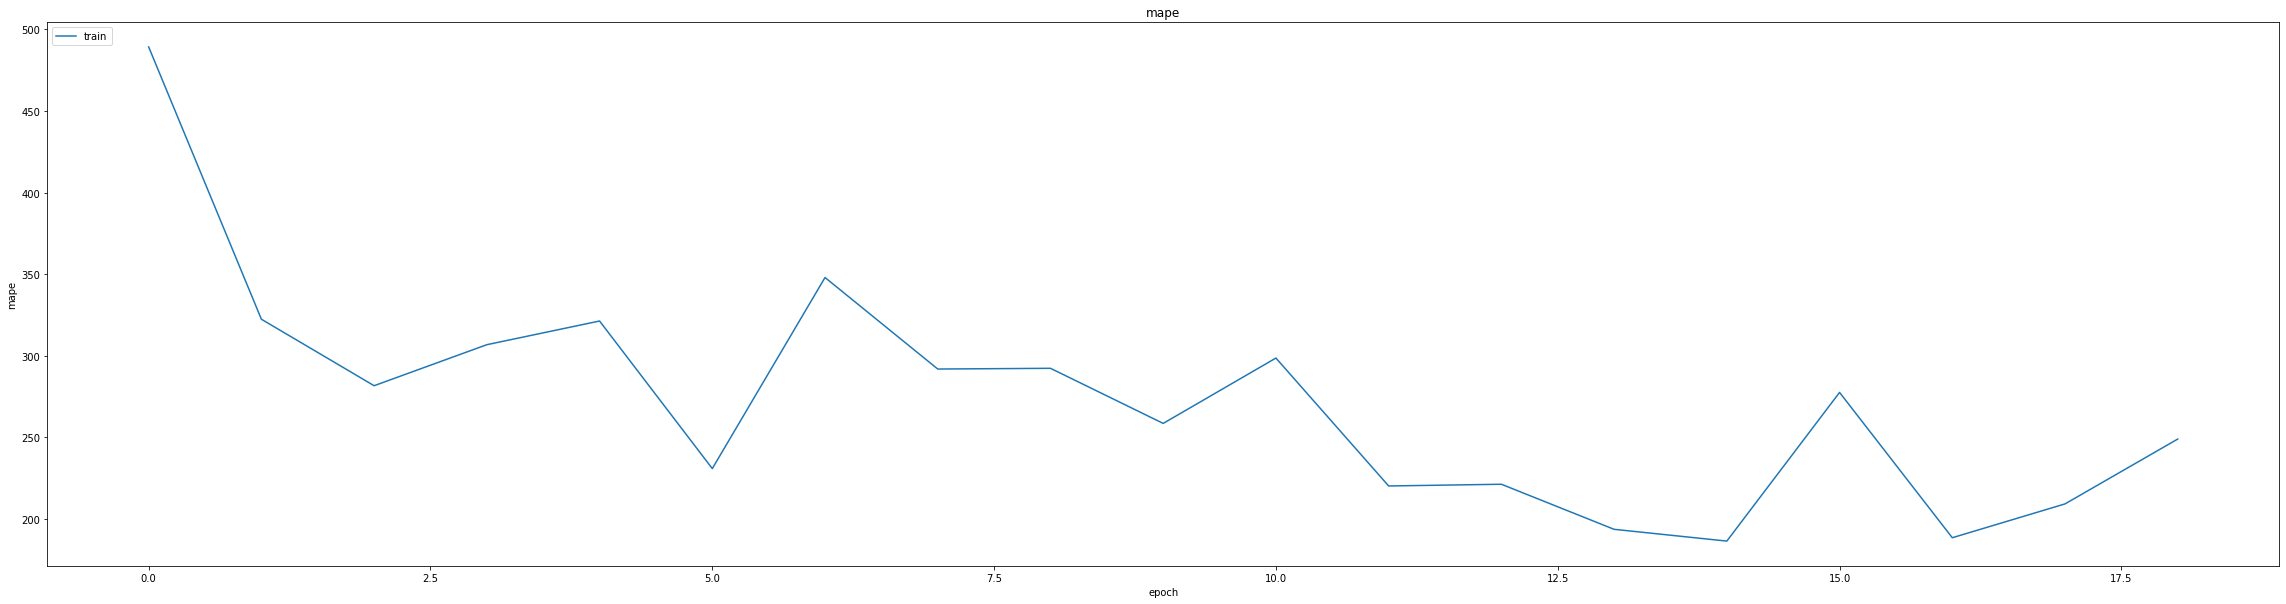

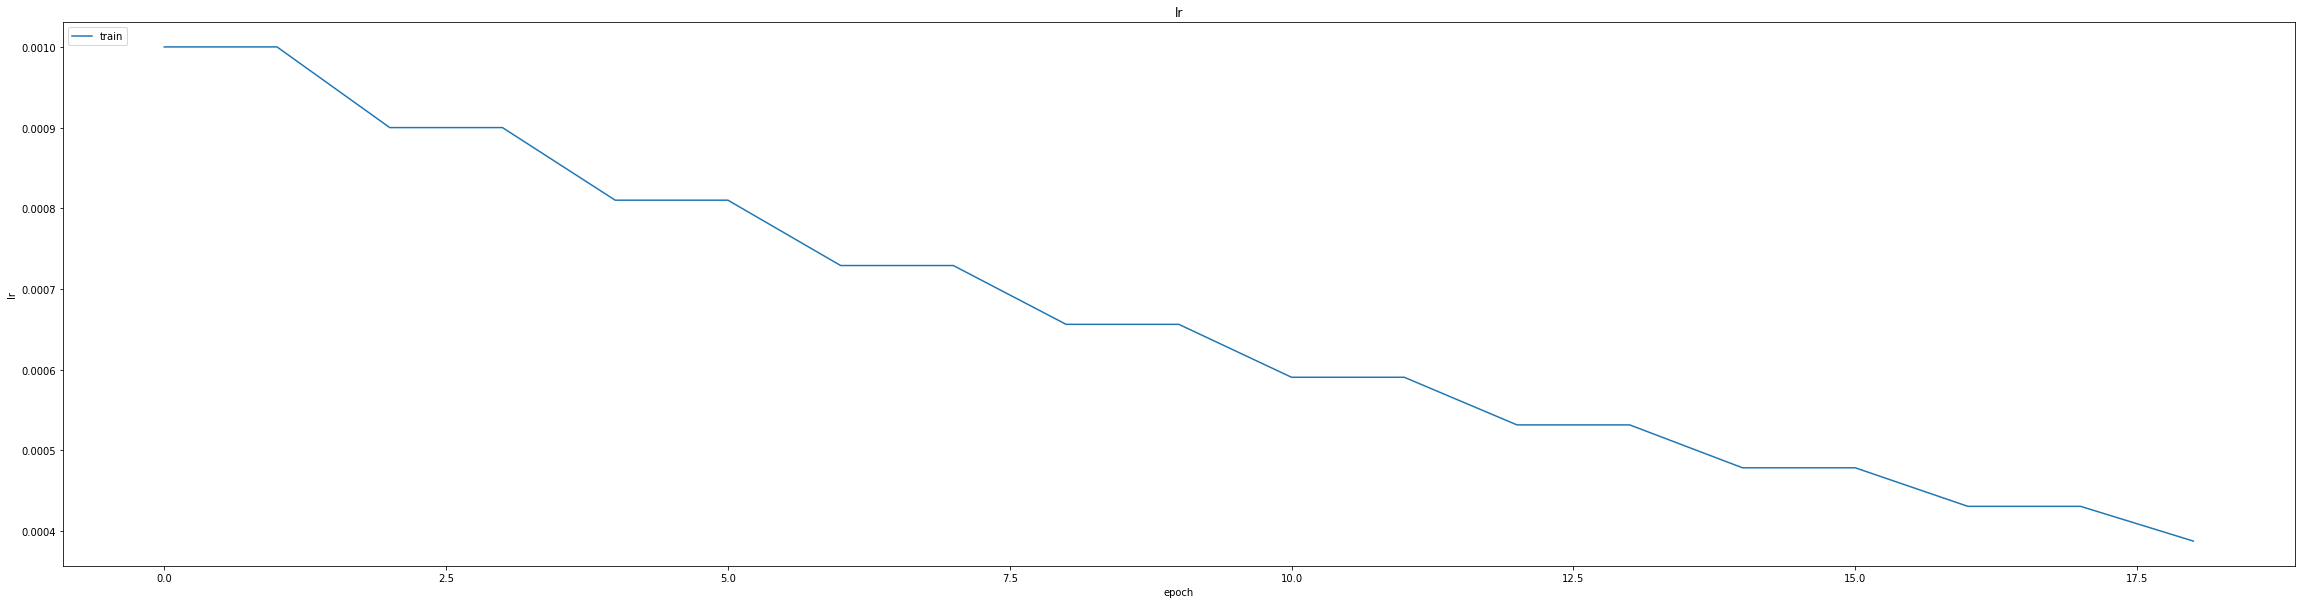

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02860715426504612
0.02916303090751171
1391/1391 [==============================] - 8s 5ms/step
0.9795670895210888


1391/1391 [==============================] - 7s 5ms/step


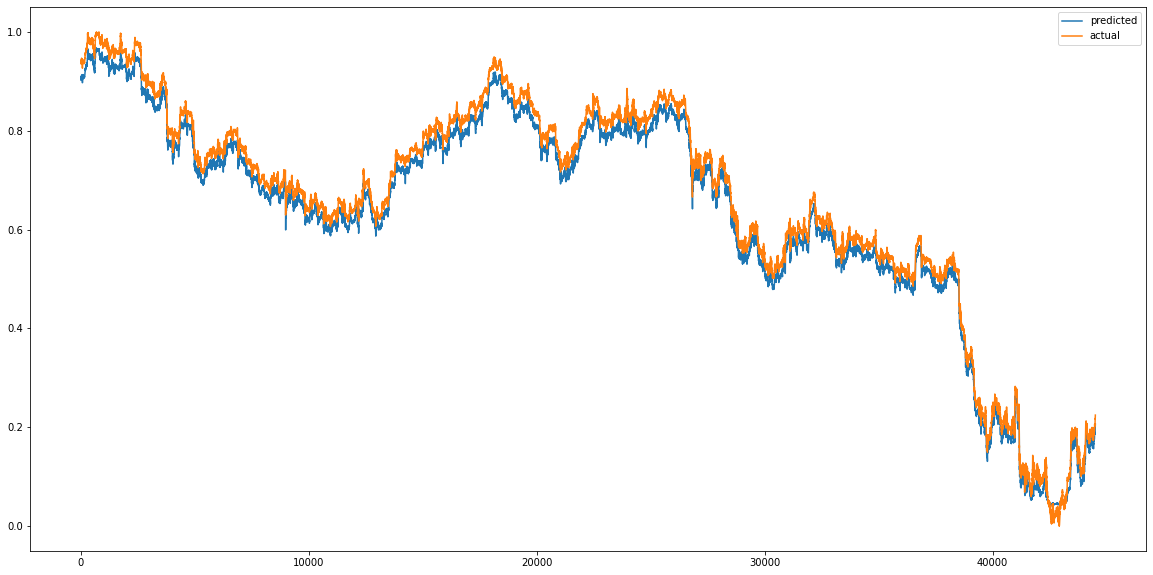

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


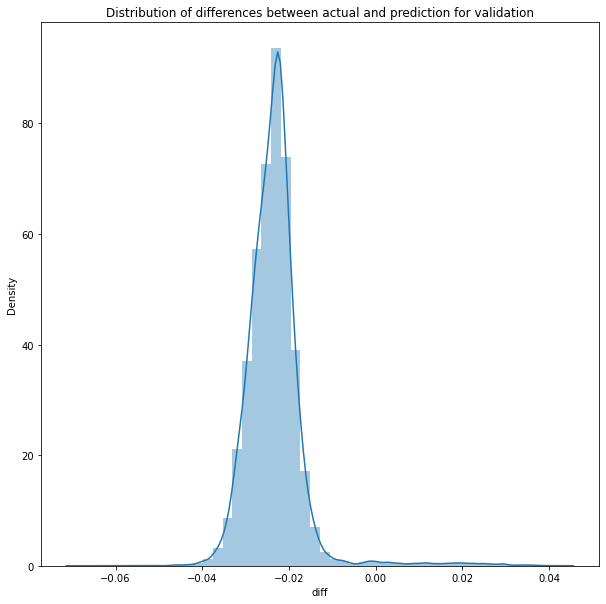

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 7s 5ms/step


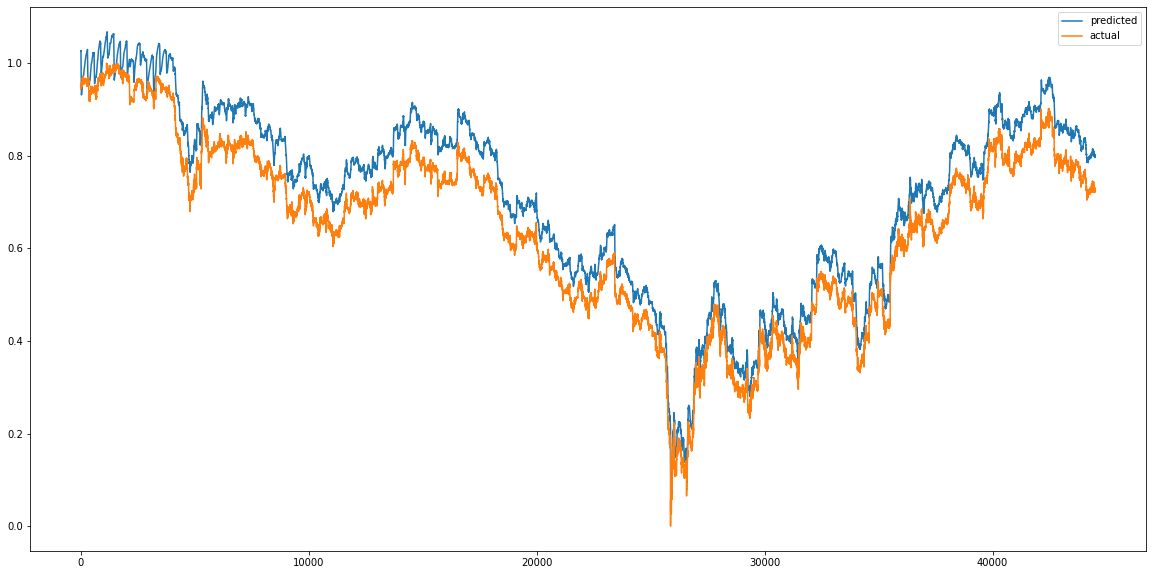

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


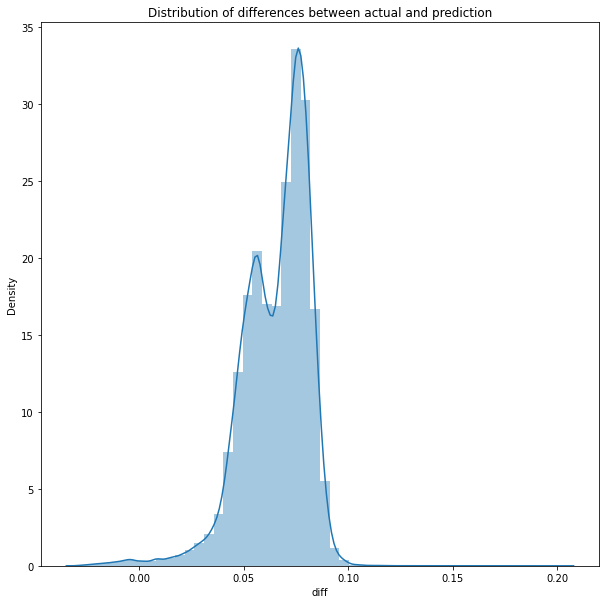

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00452288754842365
RMSE :  0.06725241667348207
MAE :  0.06544237128618197
1391/1391 [==============================] - 7s 5ms/step
R2_Score  : 0.8820041349517946


count    44508.000000
mean         0.065316
std          0.016021
min         -0.029336
25%          0.055170
50%          0.068868
75%          0.077155
max          0.202101
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 362.0512 - mae: 3.1250 - mse: 362.0512 - root_mean_squared_error: 19.0276 - mape: 8141.9141
Epoch 1: val_mse improved from inf to 0.07167, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 16s 39ms/step - loss: 360.0215 - mae: 3.1086 - mse: 360.0215 - root_mean_squared_error: 18.9742 - mape: 8096.6475 - val_loss: 0.0717 - val_mae: 0.1873 - val_mse: 0.0717 - val_root_mean_squared_error: 0.2677 - val_mape: 18420.2812
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0474 - mae: 0.1761 - mse: 0.0474 - root_mean_squared_error: 0.2177 - mape: 5672.7046
Epoch 2: val_mse improved from 0.07167 to 0.04163, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0473 - mae: 0.1759 - mse: 0.0473 - root_mean_squared_error: 0.2175 - mape: 5641.1211 - val_loss: 0.0416 - val_mae: 0.1354 - val_mse: 0.0416 - val_root_mean_squared_error: 0.2040 - val_mape: 15488.3564
Epoch 3/60
344/347 [============================>.] - ETA: 0s - loss: 0.0231 - mae: 0.1075 - mse: 0.0231 - root_mean_squared_error: 0.1520 - mape: 4772.0732
Epoch 3: val_mse improved from 0.04163 to 0.02726, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0231 - mae: 0.1073 - mse: 0.0231 - root_mean_squared_error: 0.1519 - mape: 4731.8130 - val_loss: 0.0273 - val_mae: 0.0885 - val_mse: 0.0273 - val_root_mean_squared_error: 0.1651 - val_mape: 13885.7715
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0145 - mae: 0.0790 - mse: 0.0145 - root_mean_squared_error: 0.1206 - mape: 4703.9326
Epoch 4: val_mse improved from 0.02726 to 0.02117, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0145 - mae: 0.0790 - mse: 0.0145 - root_mean_squared_error: 0.1206 - mape: 4703.9326 - val_loss: 0.0212 - val_mae: 0.0714 - val_mse: 0.0212 - val_root_mean_squared_error: 0.1455 - val_mape: 12767.3613
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.0108 - mae: 0.0673 - mse: 0.0108 - root_mean_squared_error: 0.1037 - mape: 4353.6875
Epoch 5: val_mse improved from 0.02117 to 0.01753, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0108 - mae: 0.0673 - mse: 0.0108 - root_mean_squared_error: 0.1037 - mape: 4353.6875 - val_loss: 0.0175 - val_mae: 0.0623 - val_mse: 0.0175 - val_root_mean_squared_error: 0.1324 - val_mape: 11916.0742
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 0.0085 - mae: 0.0602 - mse: 0.0085 - root_mean_squared_error: 0.0922 - mape: 4156.2007
Epoch 6: val_mse improved from 0.01753 to 0.01474, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0085 - mae: 0.0602 - mse: 0.0085 - root_mean_squared_error: 0.0922 - mape: 4121.0864 - val_loss: 0.0147 - val_mae: 0.0544 - val_mse: 0.0147 - val_root_mean_squared_error: 0.1214 - val_mape: 11225.4902
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0544 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 3687.9302
Epoch 7: val_mse improved from 0.01474 to 0.01294, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0069 - mae: 0.0544 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 3677.9194 - val_loss: 0.0129 - val_mae: 0.0544 - val_mse: 0.0129 - val_root_mean_squared_error: 0.1138 - val_mape: 10634.1553
Epoch 8/60
344/347 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0496 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 3506.5776
Epoch 8: val_mse improved from 0.01294 to 0.01124, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0057 - mae: 0.0496 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 3476.9441 - val_loss: 0.0112 - val_mae: 0.0497 - val_mse: 0.0112 - val_root_mean_squared_error: 0.1060 - val_mape: 10122.8008
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0459 - mse: 0.0048 - root_mean_squared_error: 0.0694 - mape: 3427.2908
Epoch 9: val_mse improved from 0.01124 to 0.00991, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0048 - mae: 0.0459 - mse: 0.0048 - root_mean_squared_error: 0.0694 - mape: 3418.0012 - val_loss: 0.0099 - val_mae: 0.0461 - val_mse: 0.0099 - val_root_mean_squared_error: 0.0995 - val_mape: 9686.4814
Epoch 10/60
344/347 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0426 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 3152.4465
Epoch 10: val_mse improved from 0.00991 to 0.00884, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0041 - mae: 0.0425 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 3125.8069 - val_loss: 0.0088 - val_mae: 0.0429 - val_mse: 0.0088 - val_root_mean_squared_error: 0.0940 - val_mape: 9295.6914
Epoch 11/60
345/347 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0389 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 3220.7346
Epoch 11: val_mse improved from 0.00884 to 0.00779, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0035 - mae: 0.0389 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 3202.7700 - val_loss: 0.0078 - val_mae: 0.0391 - val_mse: 0.0078 - val_root_mean_squared_error: 0.0882 - val_mape: 8945.9053
Epoch 12/60
345/347 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0361 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 3014.0344
Epoch 12: val_mse improved from 0.00779 to 0.00709, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 0.0031 - mae: 0.0361 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 2997.2510 - val_loss: 0.0071 - val_mae: 0.0393 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0842 - val_mape: 8630.8174
Epoch 13/60
345/347 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 2918.2073
Epoch 13: val_mse improved from 0.00709 to 0.00642, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0027 - mae: 0.0339 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 2901.8894 - val_loss: 0.0064 - val_mae: 0.0372 - val_mse: 0.0064 - val_root_mean_squared_error: 0.0801 - val_mape: 8348.7412
Epoch 14/60
344/347 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0320 - mse: 0.0024 - root_mean_squared_error: 0.0494 - mape: 2944.6169
Epoch 14: val_mse improved from 0.00642 to 0.00581, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 0.0024 - mae: 0.0320 - mse: 0.0024 - root_mean_squared_error: 0.0494 - mape: 2919.7332 - val_loss: 0.0058 - val_mae: 0.0345 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0762 - val_mape: 8086.3901
Epoch 15/60
344/347 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0305 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2780.0696
Epoch 15: val_mse improved from 0.00581 to 0.00532, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0022 - mae: 0.0305 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 2756.5229 - val_loss: 0.0053 - val_mae: 0.0335 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0729 - val_mape: 7848.7334
Epoch 16/60
346/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0289 - mse: 0.0020 - root_mean_squared_error: 0.0448 - mape: 2719.0559
Epoch 16: val_mse improved from 0.00532 to 0.00484, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0020 - mae: 0.0289 - mse: 0.0020 - root_mean_squared_error: 0.0448 - mape: 2711.6724 - val_loss: 0.0048 - val_mae: 0.0312 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0696 - val_mape: 7618.2358
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0271 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 2530.4680
Epoch 17: val_mse improved from 0.00484 to 0.00442, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 0.0018 - mae: 0.0271 - mse: 0.0018 - root_mean_squared_error: 0.0422 - mape: 2516.3210 - val_loss: 0.0044 - val_mae: 0.0303 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0665 - val_mape: 7384.3818
Epoch 18/60
344/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0255 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 2440.3359
Epoch 18: val_mse improved from 0.00442 to 0.00397, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 0.0016 - mae: 0.0255 - mse: 0.0016 - root_mean_squared_error: 0.0399 - mape: 2419.6870 - val_loss: 0.0040 - val_mae: 0.0276 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0630 - val_mape: 7152.5205
Epoch 19/60
347/347 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0241 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 2403.2998
Epoch 19: val_mse improved from 0.00397 to 0.00362, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0014 - mae: 0.0241 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 2403.2998 - val_loss: 0.0036 - val_mae: 0.0277 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0602 - val_mape: 6918.8516
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0226 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2317.8542
Epoch 20: val_mse improved from 0.00362 to 0.00328, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 0.0013 - mae: 0.0226 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2311.5520 - val_loss: 0.0033 - val_mae: 0.0275 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 6687.1133
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0215 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 2231.5513
Epoch 21: val_mse improved from 0.00328 to 0.00292, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 0.0011 - mae: 0.0215 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 2231.5513 - val_loss: 0.0029 - val_mae: 0.0250 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 6458.2217
Epoch 22/60
344/347 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0203 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 2173.6589
Epoch 22: val_mse improved from 0.00292 to 0.00260, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 0.0010 - mae: 0.0203 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 2155.2598 - val_loss: 0.0026 - val_mae: 0.0233 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 6223.6548
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 9.1967e-04 - mae: 0.0192 - mse: 9.1967e-04 - root_mean_squared_error: 0.0303 - mape: 2101.9116
Epoch 23: val_mse improved from 0.00260 to 0.00233, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 9.1967e-04 - mae: 0.0192 - mse: 9.1967e-04 - root_mean_squared_error: 0.0303 - mape: 2101.9116 - val_loss: 0.0023 - val_mae: 0.0232 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0483 - val_mape: 5989.0625
Epoch 24/60
347/347 [==============================] - ETA: 0s - loss: 8.2948e-04 - mae: 0.0184 - mse: 8.2948e-04 - root_mean_squared_error: 0.0288 - mape: 1980.3451
Epoch 24: val_mse improved from 0.00233 to 0.00207, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 8.2948e-04 - mae: 0.0184 - mse: 8.2948e-04 - root_mean_squared_error: 0.0288 - mape: 1980.3451 - val_loss: 0.0021 - val_mae: 0.0223 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 5751.4160
Epoch 25/60
344/347 [============================>.] - ETA: 0s - loss: 7.4351e-04 - mae: 0.0175 - mse: 7.4351e-04 - root_mean_squared_error: 0.0273 - mape: 1913.5253
Epoch 25: val_mse improved from 0.00207 to 0.00181, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 7.4167e-04 - mae: 0.0175 - mse: 7.4167e-04 - root_mean_squared_error: 0.0272 - mape: 1897.3113 - val_loss: 0.0018 - val_mae: 0.0210 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 5508.1978
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 6.6874e-04 - mae: 0.0167 - mse: 6.6874e-04 - root_mean_squared_error: 0.0259 - mape: 1815.8363
Epoch 26: val_mse improved from 0.00181 to 0.00156, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 6.6806e-04 - mae: 0.0167 - mse: 6.6806e-04 - root_mean_squared_error: 0.0258 - mape: 1805.6794 - val_loss: 0.0016 - val_mae: 0.0187 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 5270.0098
Epoch 27/60
347/347 [==============================] - ETA: 0s - loss: 5.9438e-04 - mae: 0.0159 - mse: 5.9438e-04 - root_mean_squared_error: 0.0244 - mape: 1762.4769
Epoch 27: val_mse improved from 0.00156 to 0.00139, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 5.9438e-04 - mae: 0.0159 - mse: 5.9438e-04 - root_mean_squared_error: 0.0244 - mape: 1762.4769 - val_loss: 0.0014 - val_mae: 0.0189 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0373 - val_mape: 5029.4058
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 5.3155e-04 - mae: 0.0152 - mse: 5.3155e-04 - root_mean_squared_error: 0.0231 - mape: 1750.3201
Epoch 28: val_mse improved from 0.00139 to 0.00118, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 5.3160e-04 - mae: 0.0152 - mse: 5.3160e-04 - root_mean_squared_error: 0.0231 - mape: 1740.5344 - val_loss: 0.0012 - val_mae: 0.0168 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 4795.4404
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 4.7241e-04 - mae: 0.0144 - mse: 4.7241e-04 - root_mean_squared_error: 0.0217 - mape: 1605.2096
Epoch 29: val_mse improved from 0.00118 to 0.00107, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 4.7158e-04 - mae: 0.0144 - mse: 4.7158e-04 - root_mean_squared_error: 0.0217 - mape: 1596.2251 - val_loss: 0.0011 - val_mae: 0.0178 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 4568.2915
Epoch 30/60
346/347 [============================>.] - ETA: 0s - loss: 4.1799e-04 - mae: 0.0137 - mse: 4.1799e-04 - root_mean_squared_error: 0.0204 - mape: 1532.9033
Epoch 30: val_mse improved from 0.00107 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 4.1860e-04 - mae: 0.0137 - mse: 4.1860e-04 - root_mean_squared_error: 0.0205 - mape: 1528.7461 - val_loss: 9.6380e-04 - val_mae: 0.0181 - val_mse: 9.6380e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 4342.7549
Epoch 31/60
344/347 [============================>.] - ETA: 0s - loss: 3.7586e-04 - mae: 0.0131 - mse: 3.7586e-04 - root_mean_squared_error: 0.0194 - mape: 1475.4033
Epoch 31: val_mse improved from 0.00096 to 0.00076, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 3.7586e-04 - mae: 0.0131 - mse: 3.7586e-04 - root_mean_squared_error: 0.0194 - mape: 1462.9193 - val_loss: 7.6365e-04 - val_mae: 0.0139 - val_mse: 7.6365e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 4129.2354
Epoch 32/60
345/347 [============================>.] - ETA: 0s - loss: 3.3013e-04 - mae: 0.0124 - mse: 3.3013e-04 - root_mean_squared_error: 0.0182 - mape: 1387.5881
Epoch 32: val_mse improved from 0.00076 to 0.00070, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 3.3027e-04 - mae: 0.0124 - mse: 3.3027e-04 - root_mean_squared_error: 0.0182 - mape: 1379.8292 - val_loss: 7.0215e-04 - val_mae: 0.0150 - val_mse: 7.0215e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 3922.0554
Epoch 33/60
344/347 [============================>.] - ETA: 0s - loss: 2.9622e-04 - mae: 0.0119 - mse: 2.9622e-04 - root_mean_squared_error: 0.0172 - mape: 1322.7015
Epoch 33: val_mse improved from 0.00070 to 0.00061, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 39ms/step - loss: 2.9539e-04 - mae: 0.0119 - mse: 2.9539e-04 - root_mean_squared_error: 0.0172 - mape: 1311.4901 - val_loss: 6.1048e-04 - val_mae: 0.0141 - val_mse: 6.1048e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 3728.4810
Epoch 34/60
346/347 [============================>.] - ETA: 0s - loss: 2.6239e-04 - mae: 0.0113 - mse: 2.6239e-04 - root_mean_squared_error: 0.0162 - mape: 1279.5879
Epoch 34: val_mse improved from 0.00061 to 0.00051, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 2.6247e-04 - mae: 0.0113 - mse: 2.6247e-04 - root_mean_squared_error: 0.0162 - mape: 1276.1094 - val_loss: 5.0922e-04 - val_mae: 0.0117 - val_mse: 5.0922e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 3549.2402
Epoch 35/60
344/347 [============================>.] - ETA: 0s - loss: 2.3441e-04 - mae: 0.0107 - mse: 2.3441e-04 - root_mean_squared_error: 0.0153 - mape: 1215.1440
Epoch 35: val_mse improved from 0.00051 to 0.00047, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 40ms/step - loss: 2.3462e-04 - mae: 0.0107 - mse: 2.3462e-04 - root_mean_squared_error: 0.0153 - mape: 1204.8595 - val_loss: 4.6959e-04 - val_mae: 0.0129 - val_mse: 4.6959e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 3380.3955
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 2.1364e-04 - mae: 0.0103 - mse: 2.1364e-04 - root_mean_squared_error: 0.0146 - mape: 1098.5507
Epoch 36: val_mse did not improve from 0.00047
347/347 [==============================] - 6s 17ms/step - loss: 2.1364e-04 - mae: 0.0103 - mse: 2.1364e-04 - root_mean_squared_error: 0.0146 - mape: 1098.5507 - val_loss: 5.6206e-04 - val_mae: 0.0176 - val_mse: 5.6206e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3227.1689
Epoch 37/60
344/347 [============================>.] - ETA: 0s - loss: 1.8960e-04 - mae: 0.0098 - mse: 1.8960e-04 - root_mean_squared_error: 0.0138 - mape: 1077.1921
Epoch 37: val_mse did not improve from 0.00047
347/347 [

347/347 [==============================] - 13s 38ms/step - loss: 1.7481e-04 - mae: 0.0095 - mse: 1.7481e-04 - root_mean_squared_error: 0.0132 - mape: 1033.8732 - val_loss: 3.8612e-04 - val_mae: 0.0132 - val_mse: 3.8612e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 2948.0400
Epoch 39/60
347/347 [==============================] - ETA: 0s - loss: 1.5527e-04 - mae: 0.0089 - mse: 1.5527e-04 - root_mean_squared_error: 0.0125 - mape: 994.6365 
Epoch 39: val_mse improved from 0.00039 to 0.00036, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 38ms/step - loss: 1.5527e-04 - mae: 0.0089 - mse: 1.5527e-04 - root_mean_squared_error: 0.0125 - mape: 994.6365 - val_loss: 3.5657e-04 - val_mae: 0.0132 - val_mse: 3.5657e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2823.4856
Epoch 40/60
345/347 [============================>.] - ETA: 0s - loss: 1.4525e-04 - mae: 0.0087 - mse: 1.4525e-04 - root_mean_squared_error: 0.0121 - mape: 923.6158
Epoch 40: val_mse did not improve from 0.00036
347/347 [==============================] - 6s 17ms/step - loss: 1.4521e-04 - mae: 0.0087 - mse: 1.4521e-04 - root_mean_squared_error: 0.0121 - mape: 918.4473 - val_loss: 3.8068e-04 - val_mae: 0.0145 - val_mse: 3.8068e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2702.0491
Epoch 41/60
345/347 [============================>.] - ETA: 0s - loss: 1.3140e-04 - mae: 0.0083 - mse: 1.3140e-04 - root_mean_squared_error: 0.0115 - mape: 875.2205
Epoch 41: val_mse improved from 0.00036 to 0.00024, saving m

347/347 [==============================] - 13s 39ms/step - loss: 1.3147e-04 - mae: 0.0083 - mse: 1.3147e-04 - root_mean_squared_error: 0.0115 - mape: 870.3344 - val_loss: 2.3866e-04 - val_mae: 0.0090 - val_mse: 2.3866e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 2583.8350
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 1.2833e-04 - mae: 0.0083 - mse: 1.2833e-04 - root_mean_squared_error: 0.0113 - mape: 861.7693
Epoch 42: val_mse did not improve from 0.00024
347/347 [==============================] - 6s 17ms/step - loss: 1.2833e-04 - mae: 0.0083 - mse: 1.2833e-04 - root_mean_squared_error: 0.0113 - mape: 861.7693 - val_loss: 3.5718e-04 - val_mae: 0.0150 - val_mse: 3.5718e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2480.1907
Epoch 43/60
344/347 [============================>.] - ETA: 0s - loss: 1.1415e-04 - mae: 0.0078 - mse: 1.1415e-04 - root_mean_squared_error: 0.0107 - mape: 814.4182
Epoch 43: val_mse did not improve from 0.00024
347/347 [====

347/347 [==============================] - 13s 38ms/step - loss: 1.0629e-04 - mae: 0.0076 - mse: 1.0629e-04 - root_mean_squared_error: 0.0103 - mape: 780.4882 - val_loss: 1.7839e-04 - val_mae: 0.0081 - val_mse: 1.7839e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 2290.5115
Epoch 45/60
346/347 [============================>.] - ETA: 0s - loss: 1.0096e-04 - mae: 0.0074 - mse: 1.0096e-04 - root_mean_squared_error: 0.0100 - mape: 751.0580
Epoch 45: val_mse did not improve from 0.00018
347/347 [==============================] - 6s 17ms/step - loss: 1.0092e-04 - mae: 0.0074 - mse: 1.0092e-04 - root_mean_squared_error: 0.0100 - mape: 749.0165 - val_loss: 1.9368e-04 - val_mae: 0.0096 - val_mse: 1.9368e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2207.2236
Epoch 46/60
345/347 [============================>.] - ETA: 0s - loss: 1.0124e-04 - mae: 0.0075 - mse: 1.0124e-04 - root_mean_squared_error: 0.0101 - mape: 732.2008
Epoch 46: val_mse did not improve from 0.00018
347/347 [====

347/347 [==============================] - 13s 37ms/step - loss: 9.3601e-05 - mae: 0.0072 - mse: 9.3601e-05 - root_mean_squared_error: 0.0097 - mape: 690.6242 - val_loss: 1.3360e-04 - val_mae: 0.0070 - val_mse: 1.3360e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 2038.6642
Epoch 48/60
344/347 [============================>.] - ETA: 0s - loss: 8.6819e-05 - mae: 0.0070 - mse: 8.6819e-05 - root_mean_squared_error: 0.0093 - mape: 673.0103
Epoch 48: val_mse improved from 0.00013 to 0.00013, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 14s 39ms/step - loss: 8.6706e-05 - mae: 0.0070 - mse: 8.6706e-05 - root_mean_squared_error: 0.0093 - mape: 667.3112 - val_loss: 1.2703e-04 - val_mae: 0.0070 - val_mse: 1.2703e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 1960.5308
Epoch 49/60
344/347 [============================>.] - ETA: 0s - loss: 8.7162e-05 - mae: 0.0070 - mse: 8.7162e-05 - root_mean_squared_error: 0.0093 - mape: 642.8900
Epoch 49: val_mse did not improve from 0.00013
347/347 [==============================] - 6s 17ms/step - loss: 8.7111e-05 - mae: 0.0070 - mse: 8.7111e-05 - root_mean_squared_error: 0.0093 - mape: 637.4465 - val_loss: 1.5571e-04 - val_mae: 0.0091 - val_mse: 1.5571e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 1902.4437
Epoch 50/60
344/347 [============================>.] - ETA: 0s - loss: 8.5584e-05 - mae: 0.0070 - mse: 8.5584e-05 - root_mean_squared_error: 0.0093 - mape: 650.8810
Epoch 50: val_mse did not improve from 0.00013
347/347 [====

347/347 [==============================] - 13s 38ms/step - loss: 8.4332e-05 - mae: 0.0070 - mse: 8.4332e-05 - root_mean_squared_error: 0.0092 - mape: 587.3503 - val_loss: 1.0327e-04 - val_mae: 0.0066 - val_mse: 1.0327e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1734.2705
Epoch 53/60
345/347 [============================>.] - ETA: 0s - loss: 9.4063e-05 - mae: 0.0074 - mse: 9.4063e-05 - root_mean_squared_error: 0.0097 - mape: 588.5594
Epoch 53: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 17ms/step - loss: 9.4006e-05 - mae: 0.0074 - mse: 9.4006e-05 - root_mean_squared_error: 0.0097 - mape: 585.2727 - val_loss: 1.2436e-04 - val_mae: 0.0082 - val_mse: 1.2436e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1697.3412
Epoch 54/60
345/347 [============================>.] - ETA: 0s - loss: 9.5861e-05 - mae: 0.0075 - mse: 9.5861e-05 - root_mean_squared_error: 0.0098 - mape: 561.9368
Epoch 54: val_mse did not improve from 0.00010
347/347 [====

347/347 [==============================] - 13s 39ms/step - loss: 9.8717e-05 - mae: 0.0077 - mse: 9.8717e-05 - root_mean_squared_error: 0.0099 - mape: 559.3887 - val_loss: 9.8164e-05 - val_mae: 0.0066 - val_mse: 9.8164e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1616.8066
Epoch 56/60
344/347 [============================>.] - ETA: 0s - loss: 1.0402e-04 - mae: 0.0079 - mse: 1.0402e-04 - root_mean_squared_error: 0.0102 - mape: 566.2279
Epoch 56: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 17ms/step - loss: 1.0408e-04 - mae: 0.0079 - mse: 1.0408e-04 - root_mean_squared_error: 0.0102 - mape: 561.4344 - val_loss: 1.5869e-04 - val_mae: 0.0102 - val_mse: 1.5869e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1570.9657
Epoch 57/60
347/347 [==============================] - ETA: 0s - loss: 9.1825e-05 - mae: 0.0073 - mse: 9.1825e-05 - root_mean_squared_error: 0.0096 - mape: 550.6701
Epoch 57: val_mse improved from 0.00010 to 0.00010, saving m

347/347 [==============================] - 14s 41ms/step - loss: 9.1825e-05 - mae: 0.0073 - mse: 9.1825e-05 - root_mean_squared_error: 0.0096 - mape: 550.6701 - val_loss: 9.7919e-05 - val_mae: 0.0067 - val_mse: 9.7919e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1563.6606
Epoch 58/60
344/347 [============================>.] - ETA: 0s - loss: 1.0078e-04 - mae: 0.0079 - mse: 1.0078e-04 - root_mean_squared_error: 0.0100 - mape: 535.2233
Epoch 58: val_mse did not improve from 0.00010
347/347 [==============================] - 6s 18ms/step - loss: 1.0058e-04 - mae: 0.0079 - mse: 1.0058e-04 - root_mean_squared_error: 0.0100 - mape: 530.6946 - val_loss: 1.8146e-04 - val_mae: 0.0109 - val_mse: 1.8146e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 1525.6676
Epoch 59/60
346/347 [============================>.] - ETA: 0s - loss: 1.0587e-04 - mae: 0.0079 - mse: 1.0587e-04 - root_mean_squared_error: 0.0103 - mape: 519.0392
Epoch 59: val_mse did not improve from 0.00010
347/347 [====

347/347 [==============================] - 13s 38ms/step - loss: 9.2545e-05 - mae: 0.0074 - mse: 9.2545e-05 - root_mean_squared_error: 0.0096 - mape: 503.9708 - val_loss: 7.9678e-05 - val_mae: 0.0060 - val_mse: 7.9678e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 1486.0466


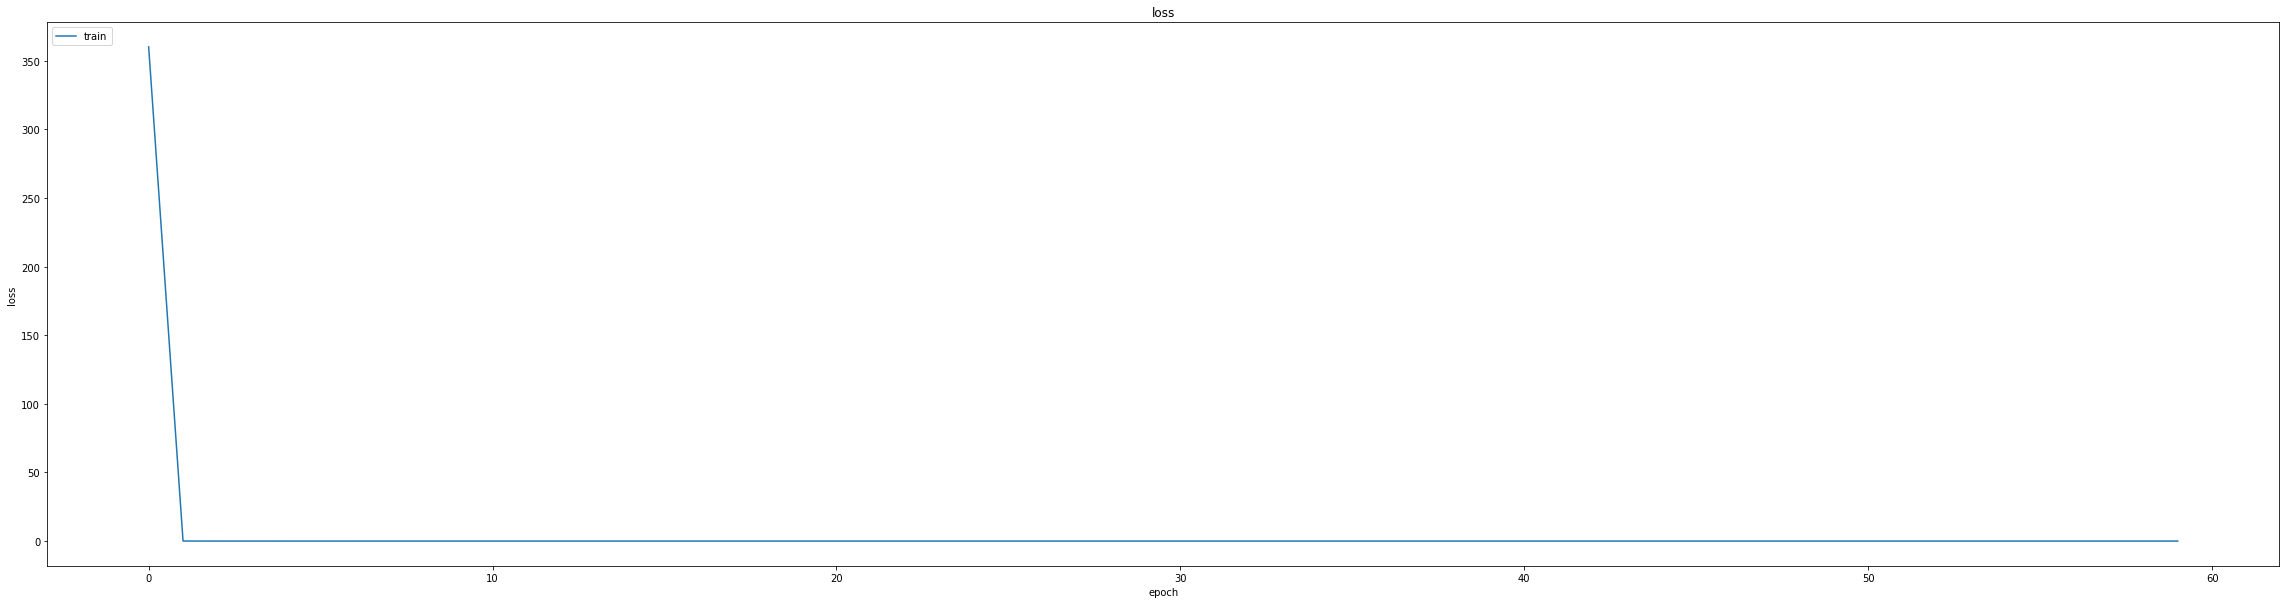

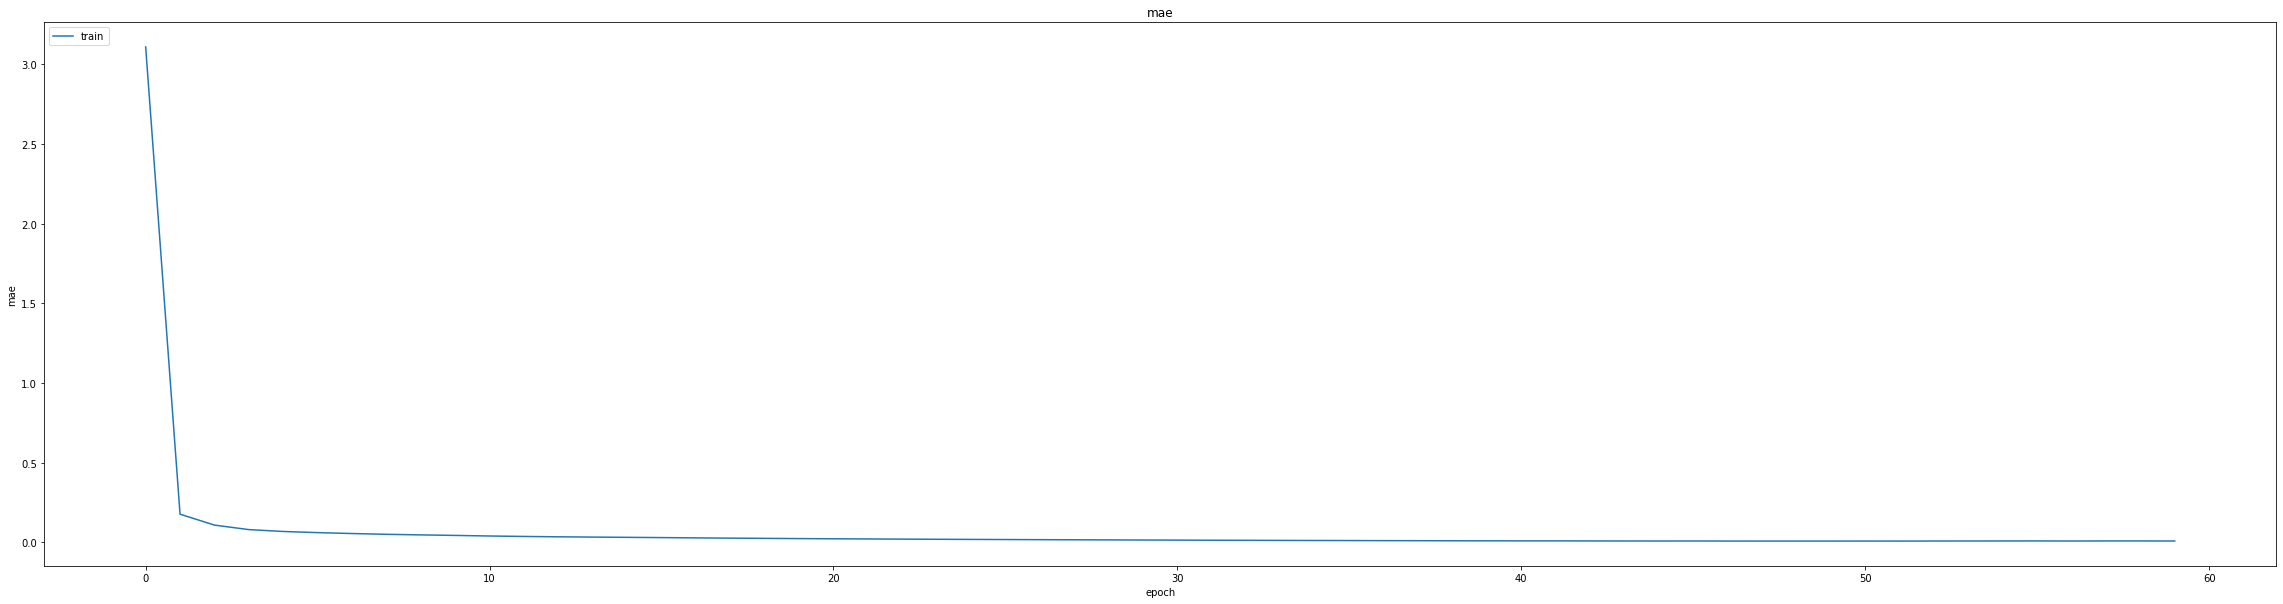

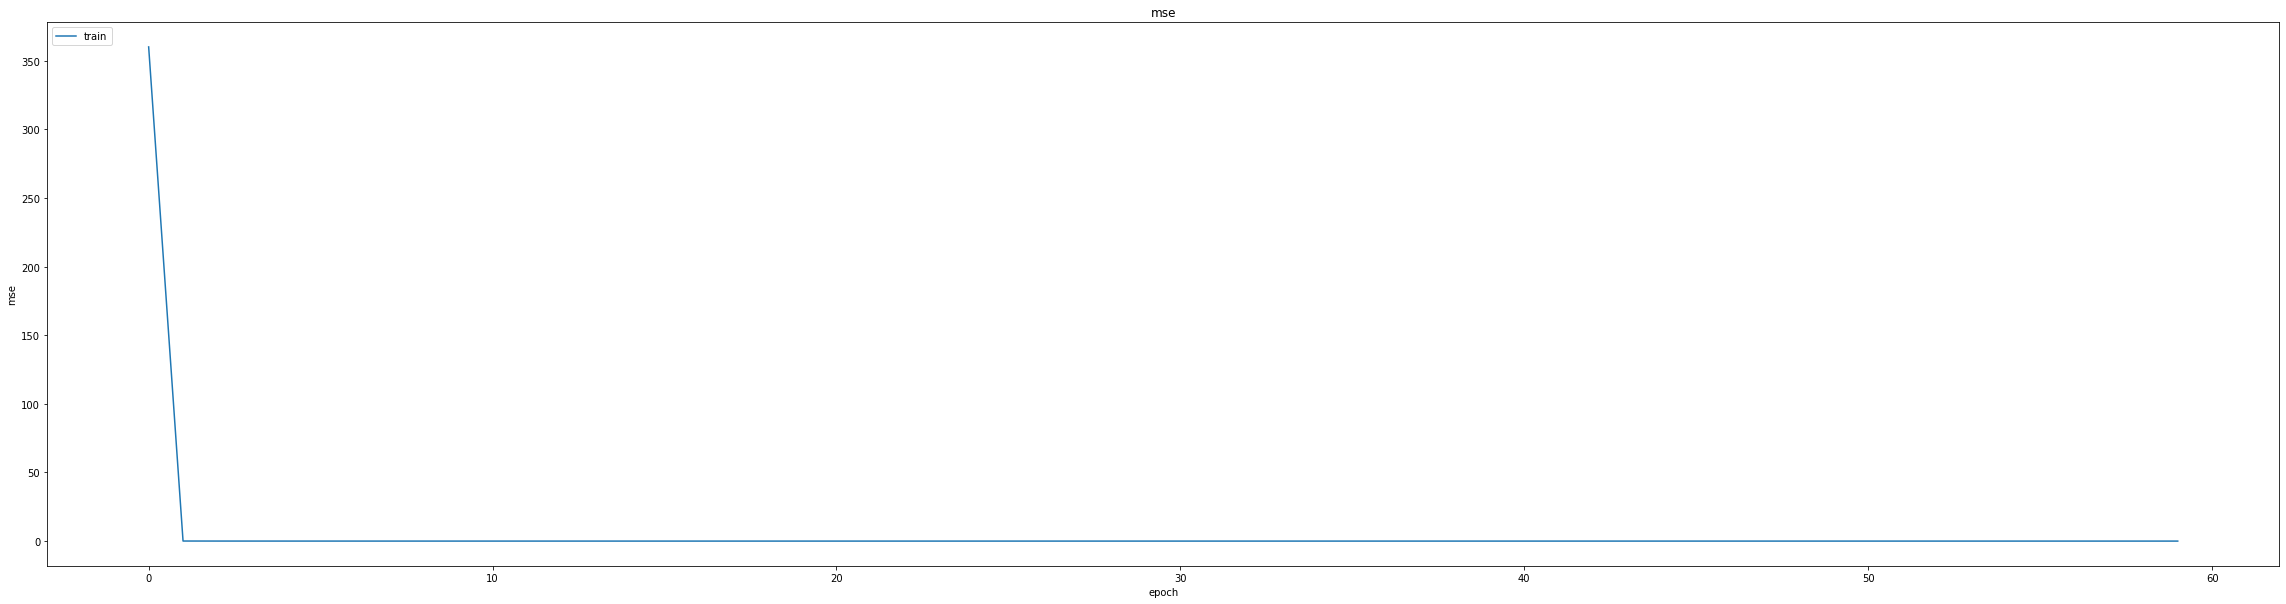

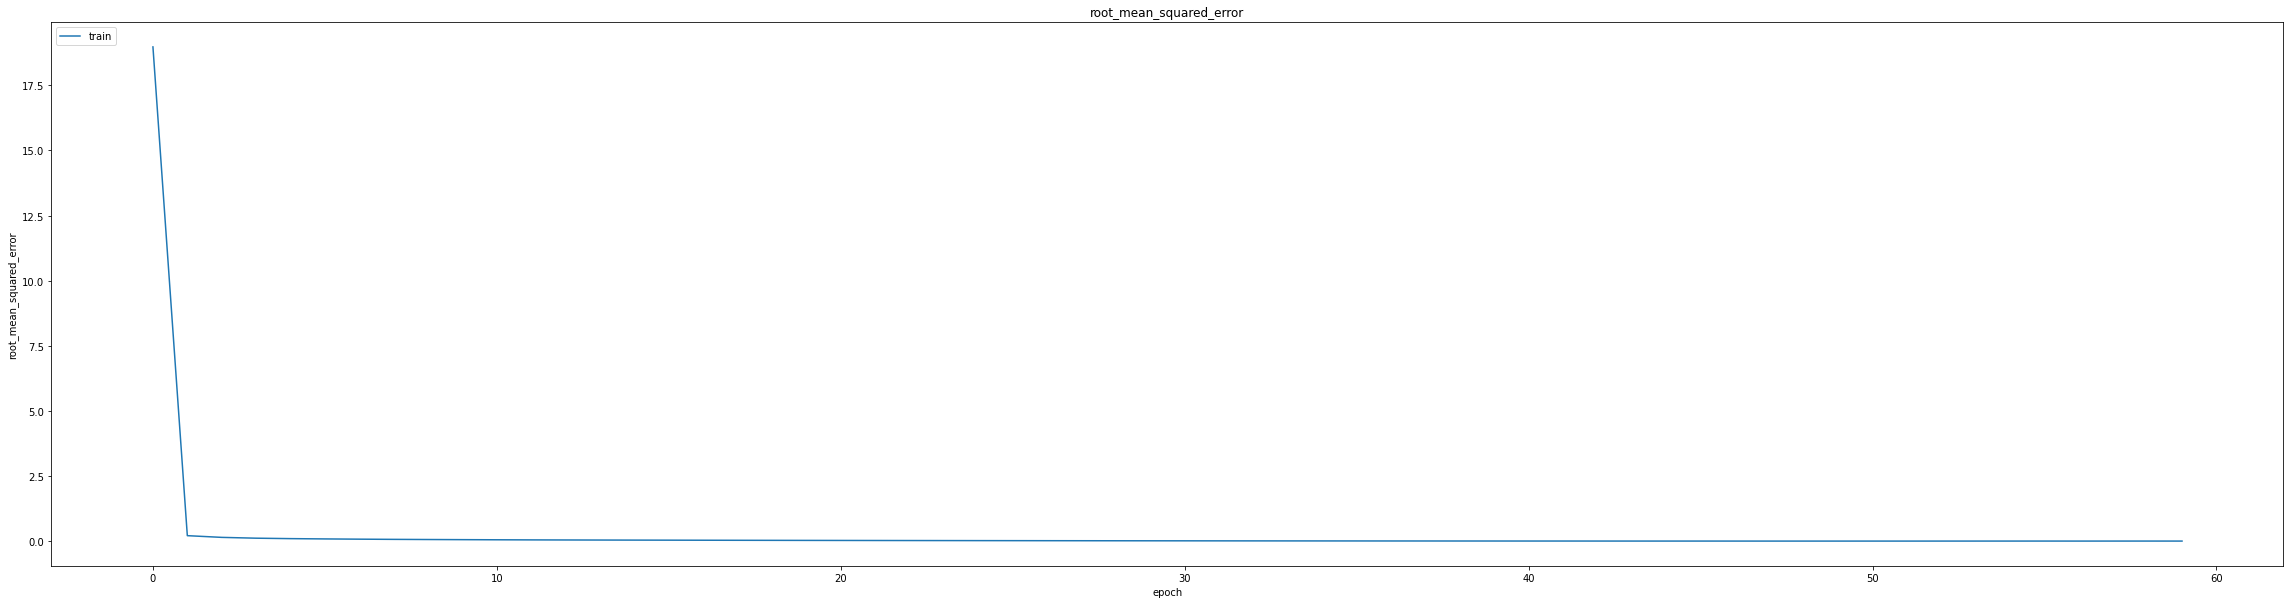

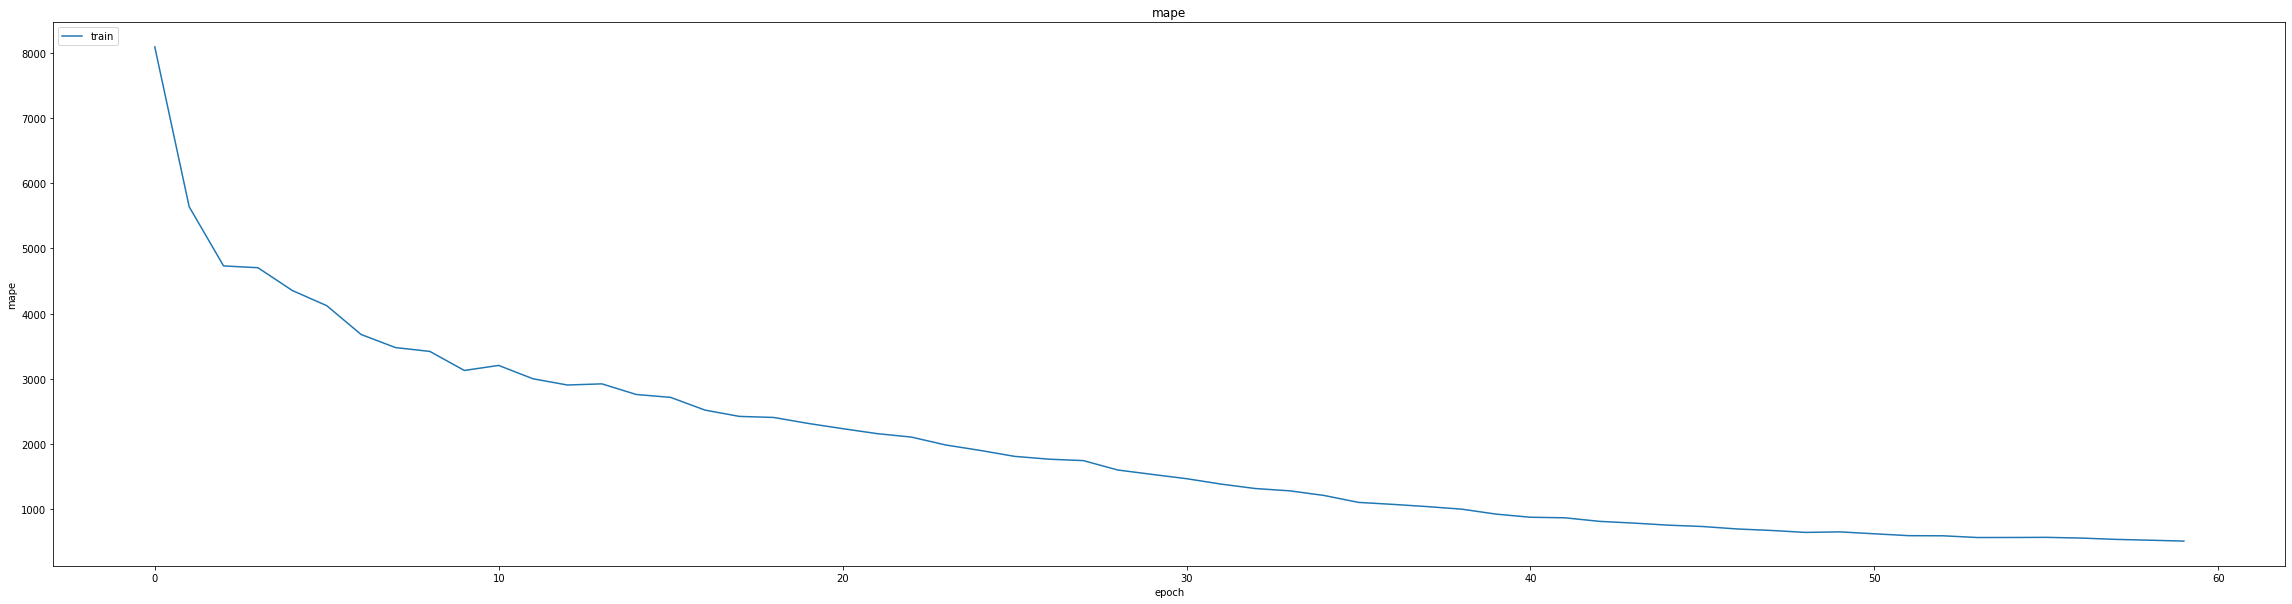

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006039813160896301
0.008926237933337688
1391/1391 [==============================] - 5s 3ms/step
0.9984853817367872


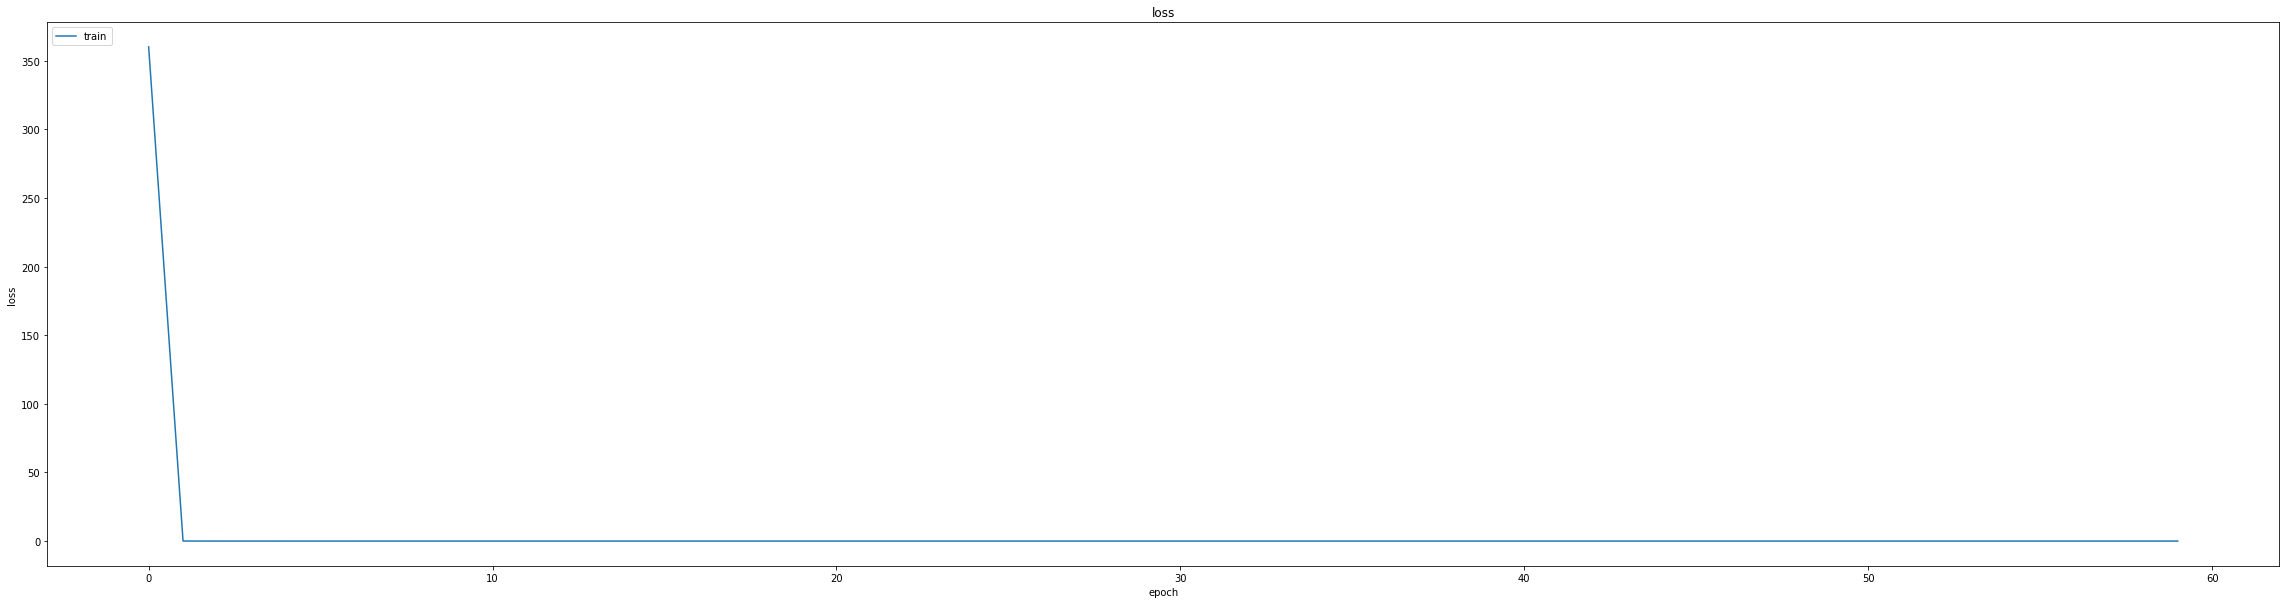

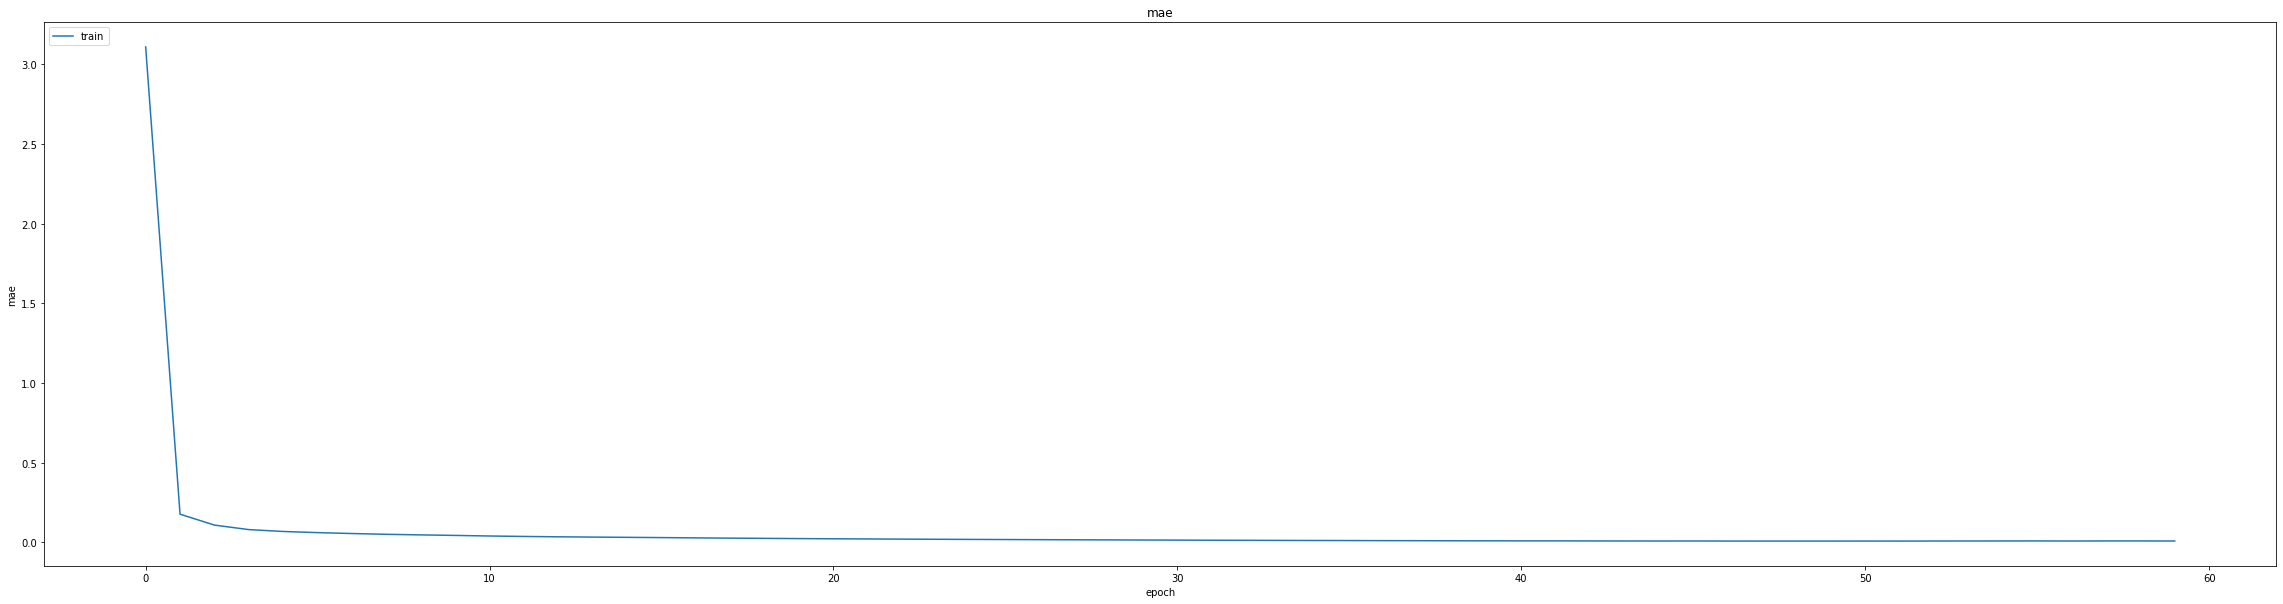

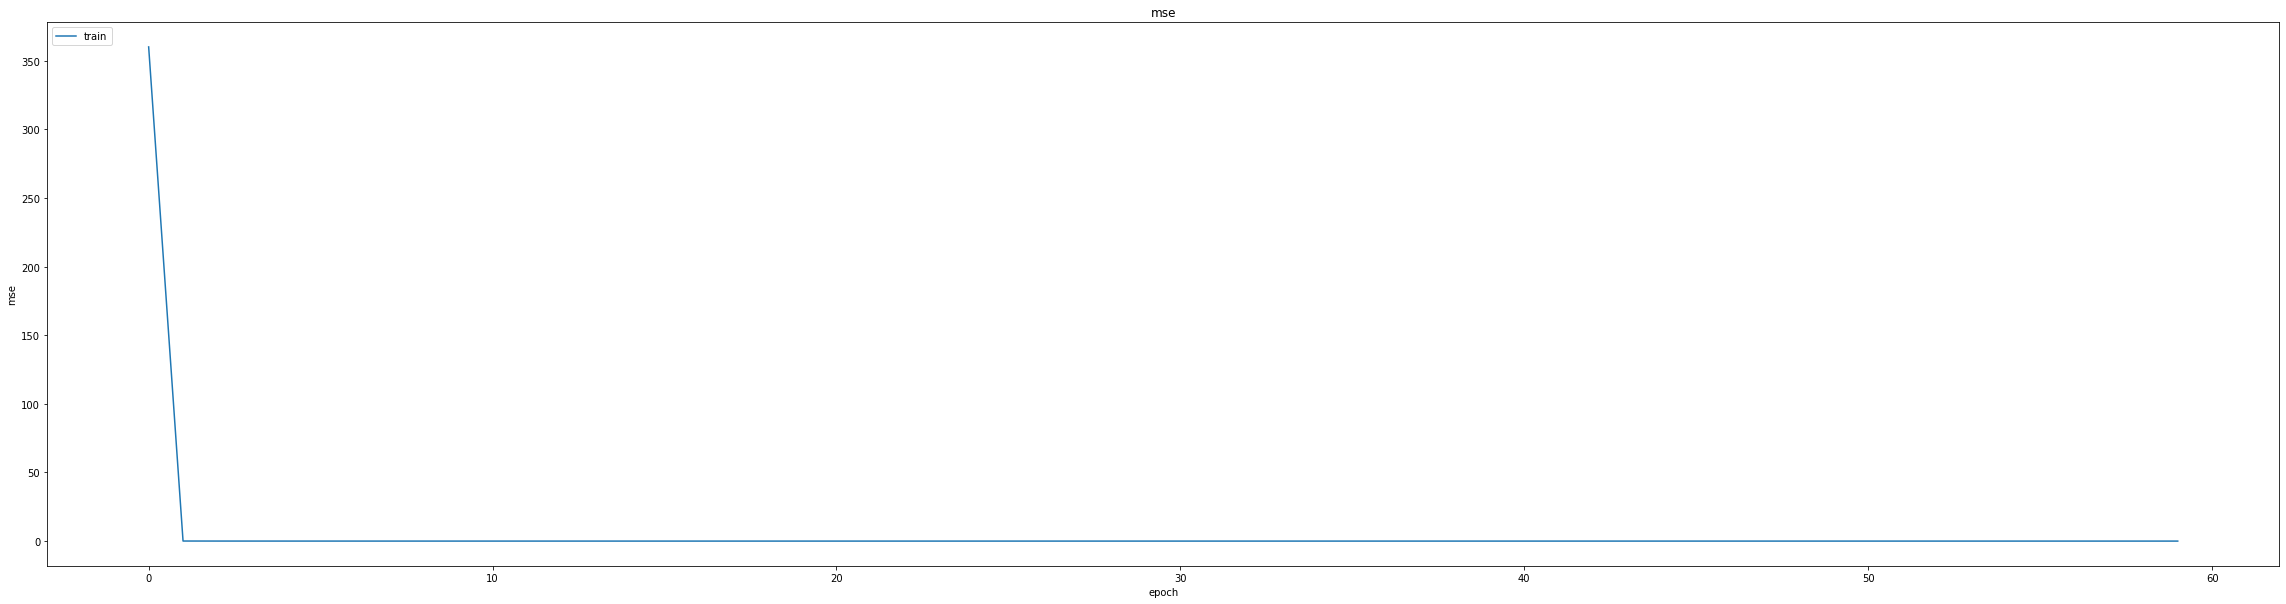

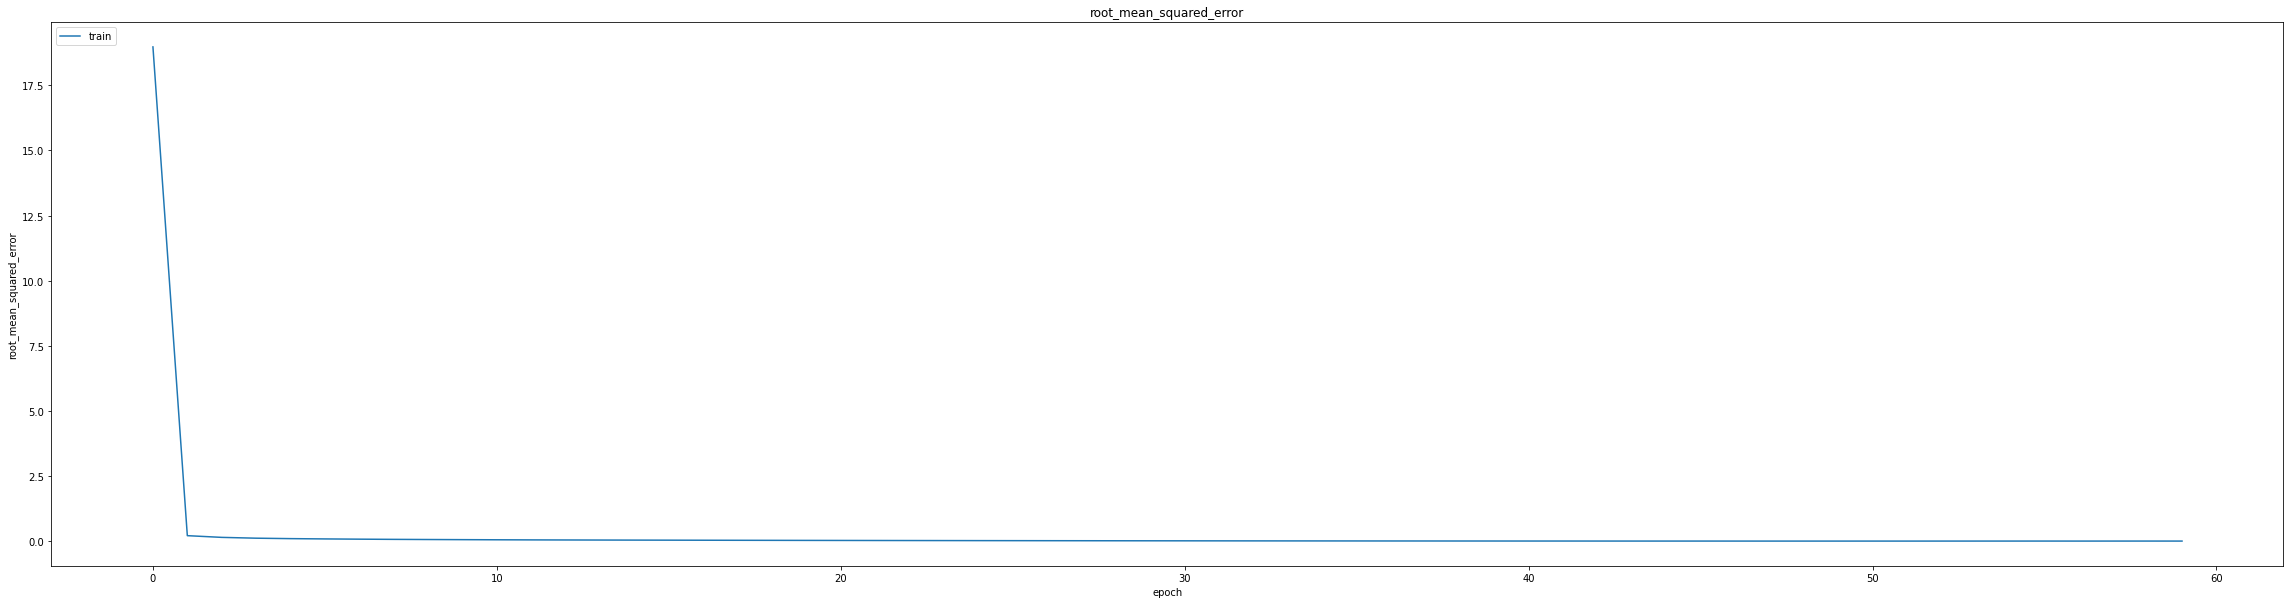

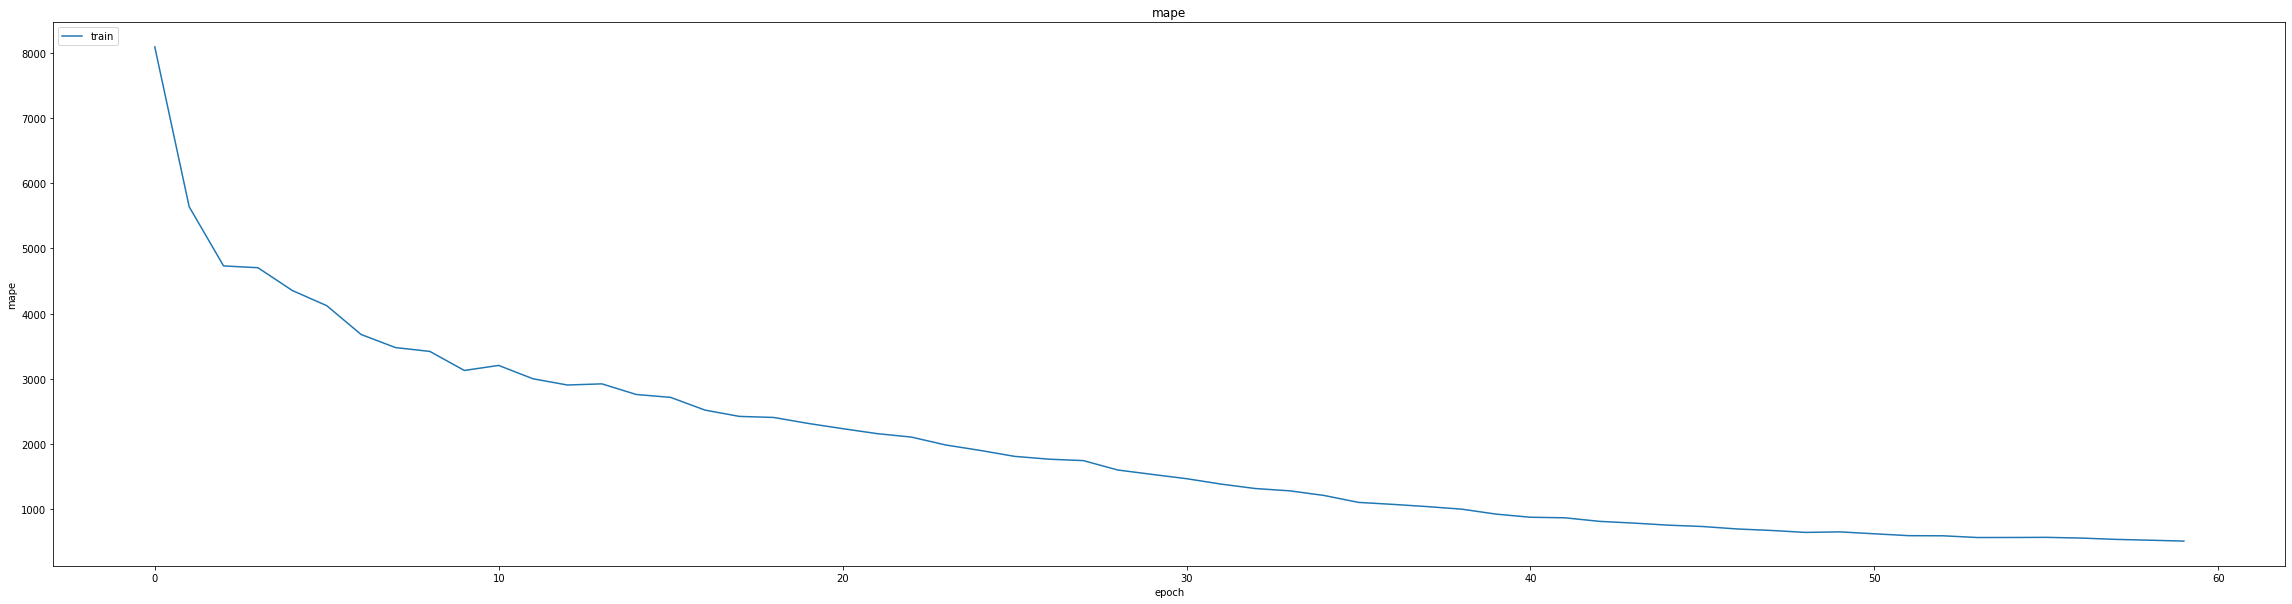

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]
Epochs=20
#Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


346/347 [============================>.] - ETA: 0s - loss: 8.8780e-04 - mae: 0.0126 - mse: 8.8780e-04 - root_mean_squared_error: 0.0298 - mape: 630.5747
Epoch 1: val_mse did not improve from 0.00008
347/347 [==============================] - 10s 19ms/step - loss: 8.8554e-04 - mae: 0.0126 - mse: 8.8554e-04 - root_mean_squared_error: 0.0298 - mape: 628.8606 - val_loss: 9.0640e-05 - val_mae: 0.0061 - val_mse: 9.0640e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 1652.9553 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 5.7980e-05 - mae: 0.0057 - mse: 5.7980e-05 - root_mean_squared_error: 0.0076 - mape: 562.1215
Epoch 2: val_mse improved from 0.00008 to 0.00008, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_CNN_LSTM(60-40)


347/347 [==============================] - 13s 37ms/step - loss: 5.7933e-05 - mae: 0.0057 - mse: 5.7933e-05 - root_mean_squared_error: 0.0076 - mape: 557.3594 - val_loss: 7.8240e-05 - val_mae: 0.0056 - val_mse: 7.8240e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 1548.4965 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/347 [==============================] - ETA: 0s - loss: 5.3449e-05 - mae: 0.0055 - mse: 5.3449e-05 - root_mean_squared_error: 0.0073 - mape: 493.5197
Epoch 3: val_mse did not improve from 0.00008
347/347 [==============================] - 6s 17ms/step - loss: 5.3449e-05 - mae: 0.0055 - mse: 5.3449e-05 - root_mean_squared_error: 0.0073 - mape: 493.5197 - val_loss: 8.5601e-05 - val_mae: 0.0066 - val_mse: 8.5601e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 1415.0961 - lr: 9.0000e-04
Epoch 4/20
345/347 [============================>.] - ETA: 0s - loss: 5.5722e-05 - mae: 0.0057 - mse: 5.5722e-05 - root_mean_squared_error: 0.0075 - mape: 447.92

347/347 [==============================] - 13s 38ms/step - loss: 5.5674e-05 - mae: 0.0057 - mse: 5.5674e-05 - root_mean_squared_error: 0.0075 - mape: 445.4181 - val_loss: 5.6475e-05 - val_mae: 0.0050 - val_mse: 5.6475e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 1237.1410 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
346/347 [============================>.] - ETA: 0s - loss: 4.9414e-05 - mae: 0.0054 - mse: 4.9414e-05 - root_mean_squared_error: 0.0070 - mape: 377.8492
Epoch 5: val_mse did not improve from 0.00006
347/347 [==============================] - 6s 17ms/step - loss: 4.9403e-05 - mae: 0.0054 - mse: 4.9403e-05 - root_mean_squared_error: 0.0070 - mape: 376.8224 - val_loss: 7.4779e-05 - val_mae: 0.0066 - val_mse: 7.4779e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 1110.7135 - lr: 8.1000e-04
Epoch 6/20
346/347 [============================>.] - ETA: 0s - loss: 6.1804e-05 - mae: 0.0061 - mse: 6.1804e-05 - root_mean_squared_error: 0.0079 - mape: 34

347/347 [==============================] - 14s 40ms/step - loss: 4.3168e-05 - mae: 0.0051 - mse: 4.3168e-05 - root_mean_squared_error: 0.0066 - mape: 280.7970 - val_loss: 4.1762e-05 - val_mae: 0.0046 - val_mse: 4.1762e-05 - val_root_mean_squared_error: 0.0065 - val_mape: 786.2785 - lr: 6.5610e-04
Epoch 10/20
344/347 [============================>.] - ETA: 0s - loss: 5.3761e-05 - mae: 0.0056 - mse: 5.3761e-05 - root_mean_squared_error: 0.0073 - mape: 254.0356
Epoch 10: val_mse did not improve from 0.00004
347/347 [==============================] - 6s 18ms/step - loss: 5.3912e-05 - mae: 0.0057 - mse: 5.3912e-05 - root_mean_squared_error: 0.0073 - mape: 251.8897 - val_loss: 5.2776e-05 - val_mae: 0.0052 - val_mse: 5.2776e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 737.6798 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
344/347 [============================>.] - ETA: 0s - loss: 4.2959e-05 - mae: 0.0051 - mse: 4.2959e-05 - root_mean_squared_error: 0.0066 - mape: 2

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004555185791105032
0.006462348159402609
1391/1391 [==============================] - 5s 3ms/step
0.9987883378921765


1391/1391 [==============================] - 4s 3ms/step


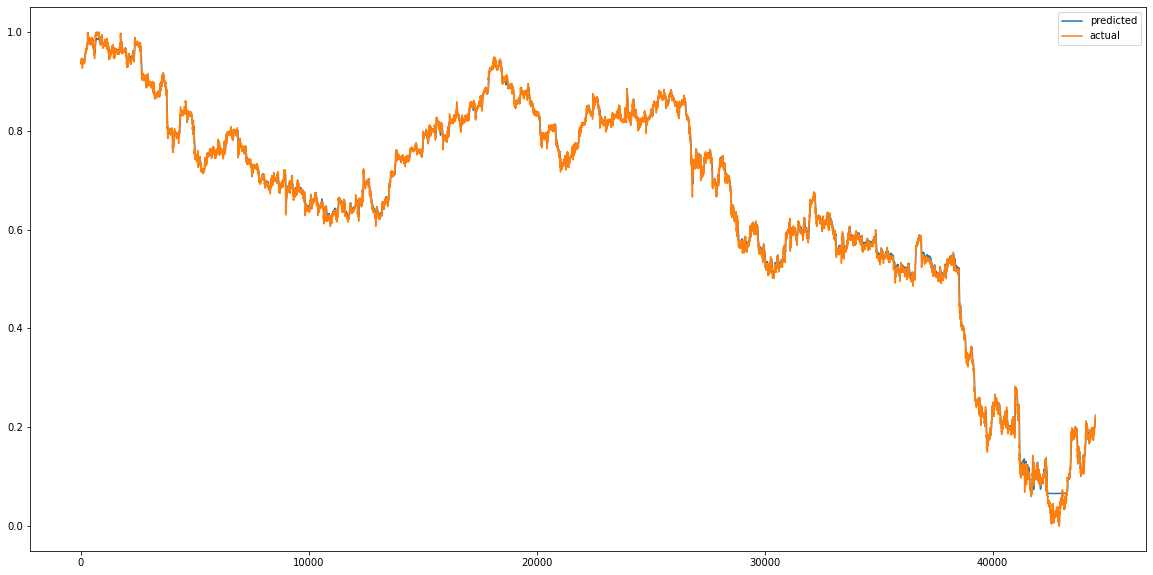

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


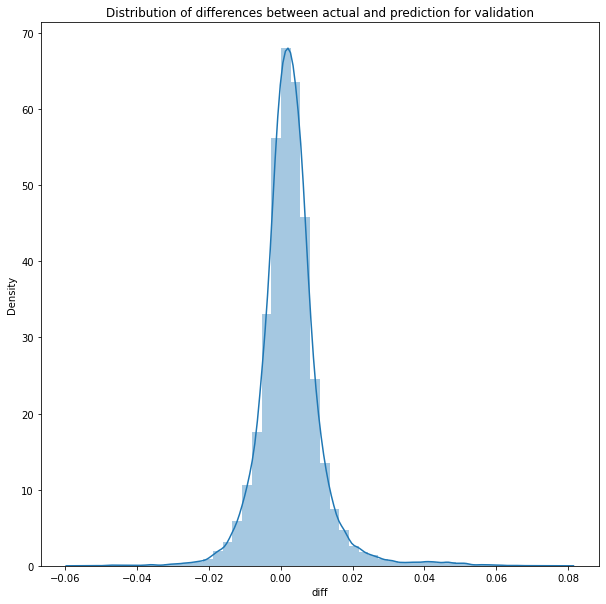

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 3ms/step


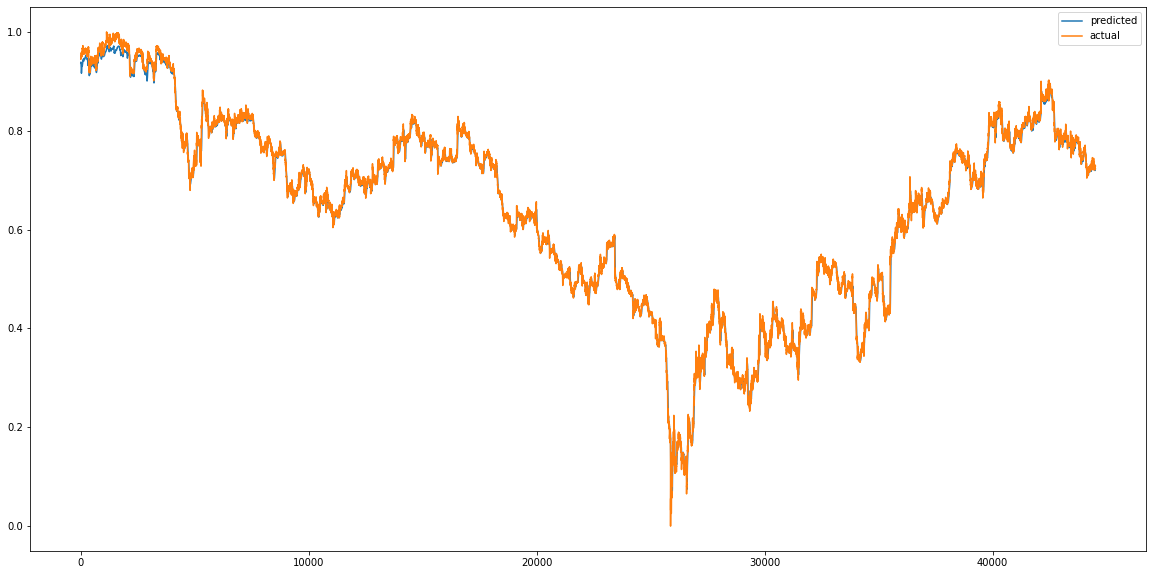

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


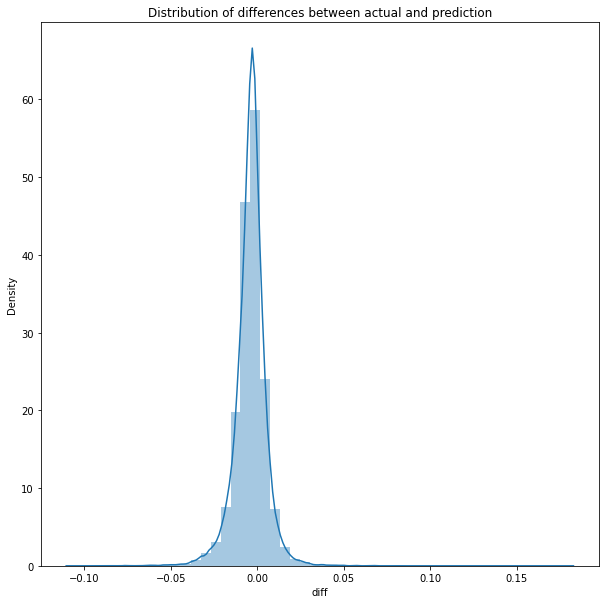

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00010006545903754957
RMSE :  0.01000327241644201
MAE :  0.007013822419342406
1391/1391 [==============================] - 5s 3ms/step
R2_Score  : 0.9973894309147584


count    44508.000000
mean        -0.003875
std          0.009222
min         -0.107198
25%         -0.007973
50%         -0.003358
75%          0.000719
max          0.179562
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/347 [============================>.] - ETA: 0s - loss: 292.6753 - mae: 2.4568 - mse: 292.6753 - root_mean_squared_error: 17.1078 - mape: 1252.3271
Epoch 1: val_mse improved from inf to 0.00402, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 15s 35ms/step - loss: 291.0342 - mae: 2.4434 - mse: 291.0342 - root_mean_squared_error: 17.0597 - mape: 1245.3739 - val_loss: 0.0040 - val_mae: 0.0439 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0634 - val_mape: 5499.6812
Epoch 2/60
346/347 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0418 - mape: 1192.0394
Epoch 2: val_mse improved from 0.00402 to 0.00092, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0417 - mape: 1188.8044 - val_loss: 9.1648e-04 - val_mae: 0.0188 - val_mse: 9.1648e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 3380.5876
Epoch 3/60
347/347 [==============================] - ETA: 0s - loss: 6.9714e-04 - mae: 0.0200 - mse: 6.9714e-04 - root_mean_squared_error: 0.0264 - mape: 1153.8219
Epoch 3: val_mse improved from 0.00092 to 0.00071, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 6.9714e-04 - mae: 0.0200 - mse: 6.9714e-04 - root_mean_squared_error: 0.0264 - mape: 1153.8219 - val_loss: 7.0816e-04 - val_mae: 0.0160 - val_mse: 7.0816e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 3232.7949
Epoch 4/60
344/347 [============================>.] - ETA: 0s - loss: 5.1421e-04 - mae: 0.0171 - mse: 5.1421e-04 - root_mean_squared_error: 0.0227 - mape: 1024.8339
Epoch 4: val_mse improved from 0.00071 to 0.00061, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 33ms/step - loss: 5.1393e-04 - mae: 0.0171 - mse: 5.1393e-04 - root_mean_squared_error: 0.0227 - mape: 1016.1685 - val_loss: 6.0669e-04 - val_mae: 0.0150 - val_mse: 6.0669e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 3090.7529
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 4.3073e-04 - mae: 0.0157 - mse: 4.3073e-04 - root_mean_squared_error: 0.0208 - mape: 1003.0957
Epoch 5: val_mse improved from 0.00061 to 0.00055, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 4.3073e-04 - mae: 0.0157 - mse: 4.3073e-04 - root_mean_squared_error: 0.0208 - mape: 1003.0957 - val_loss: 5.4875e-04 - val_mae: 0.0146 - val_mse: 5.4875e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 2978.5686
Epoch 6/60
345/347 [============================>.] - ETA: 0s - loss: 3.8157e-04 - mae: 0.0148 - mse: 3.8157e-04 - root_mean_squared_error: 0.0195 - mape: 970.7877
Epoch 6: val_mse improved from 0.00055 to 0.00050, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 35ms/step - loss: 3.8151e-04 - mae: 0.0148 - mse: 3.8151e-04 - root_mean_squared_error: 0.0195 - mape: 965.3662 - val_loss: 4.9852e-04 - val_mae: 0.0142 - val_mse: 4.9852e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 2874.2668
Epoch 7/60
346/347 [============================>.] - ETA: 0s - loss: 3.4604e-04 - mae: 0.0141 - mse: 3.4604e-04 - root_mean_squared_error: 0.0186 - mape: 994.8214 
Epoch 7: val_mse improved from 0.00050 to 0.00042, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 11s 33ms/step - loss: 3.4598e-04 - mae: 0.0141 - mse: 3.4598e-04 - root_mean_squared_error: 0.0186 - mape: 992.1212 - val_loss: 4.1978e-04 - val_mae: 0.0128 - val_mse: 4.1978e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 2780.3452
Epoch 8/60
347/347 [==============================] - ETA: 0s - loss: 3.1593e-04 - mae: 0.0135 - mse: 3.1593e-04 - root_mean_squared_error: 0.0178 - mape: 983.8153
Epoch 8: val_mse did not improve from 0.00042
347/347 [==============================] - 5s 15ms/step - loss: 3.1593e-04 - mae: 0.0135 - mse: 3.1593e-04 - root_mean_squared_error: 0.0178 - mape: 983.8153 - val_loss: 4.3153e-04 - val_mae: 0.0137 - val_mse: 4.3153e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2681.9141
Epoch 9/60
347/347 [==============================] - ETA: 0s - loss: 2.8990e-04 - mae: 0.0129 - mse: 2.8990e-04 - root_mean_squared_error: 0.0170 - mape: 838.5330
Epoch 9: val_mse did not improve from 0.00042
347/347 [========

347/347 [==============================] - 12s 35ms/step - loss: 2.6754e-04 - mae: 0.0124 - mse: 2.6754e-04 - root_mean_squared_error: 0.0164 - mape: 855.6473 - val_loss: 3.2747e-04 - val_mae: 0.0117 - val_mse: 3.2747e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 2491.6777
Epoch 11/60
347/347 [==============================] - ETA: 0s - loss: 2.4607e-04 - mae: 0.0119 - mse: 2.4607e-04 - root_mean_squared_error: 0.0157 - mape: 891.9211
Epoch 11: val_mse did not improve from 0.00033
347/347 [==============================] - 5s 15ms/step - loss: 2.4607e-04 - mae: 0.0119 - mse: 2.4607e-04 - root_mean_squared_error: 0.0157 - mape: 891.9211 - val_loss: 3.4722e-04 - val_mae: 0.0130 - val_mse: 3.4722e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2403.5369
Epoch 12/60
344/347 [============================>.] - ETA: 0s - loss: 2.2598e-04 - mae: 0.0115 - mse: 2.2598e-04 - root_mean_squared_error: 0.0150 - mape: 814.4869
Epoch 12: val_mse did not improve from 0.00033
347/347 [====

347/347 [==============================] - 12s 34ms/step - loss: 2.0763e-04 - mae: 0.0110 - mse: 2.0763e-04 - root_mean_squared_error: 0.0144 - mape: 845.0834 - val_loss: 2.2797e-04 - val_mae: 0.0103 - val_mse: 2.2797e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2045.7640
Epoch 14/60
347/347 [==============================] - ETA: 0s - loss: 1.8590e-04 - mae: 0.0105 - mse: 1.8590e-04 - root_mean_squared_error: 0.0136 - mape: 601.8765
Epoch 14: val_mse improved from 0.00023 to 0.00017, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 12s 34ms/step - loss: 1.8590e-04 - mae: 0.0105 - mse: 1.8590e-04 - root_mean_squared_error: 0.0136 - mape: 601.8765 - val_loss: 1.6780e-04 - val_mae: 0.0090 - val_mse: 1.6780e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 1698.7137
Epoch 15/60
344/347 [============================>.] - ETA: 0s - loss: 1.6615e-04 - mae: 0.0100 - mse: 1.6615e-04 - root_mean_squared_error: 0.0129 - mape: 581.8154
Epoch 15: val_mse did not improve from 0.00017
347/347 [==============================] - 5s 15ms/step - loss: 1.6612e-04 - mae: 0.0100 - mse: 1.6612e-04 - root_mean_squared_error: 0.0129 - mape: 576.9059 - val_loss: 2.7855e-04 - val_mae: 0.0135 - val_mse: 2.7855e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1495.7478
Epoch 16/60
344/347 [============================>.] - ETA: 0s - loss: 1.5185e-04 - mae: 0.0096 - mse: 1.5185e-04 - root_mean_squared_error: 0.0123 - mape: 481.5515
Epoch 16: val_mse did not improve from 0.00017
347/347 [====

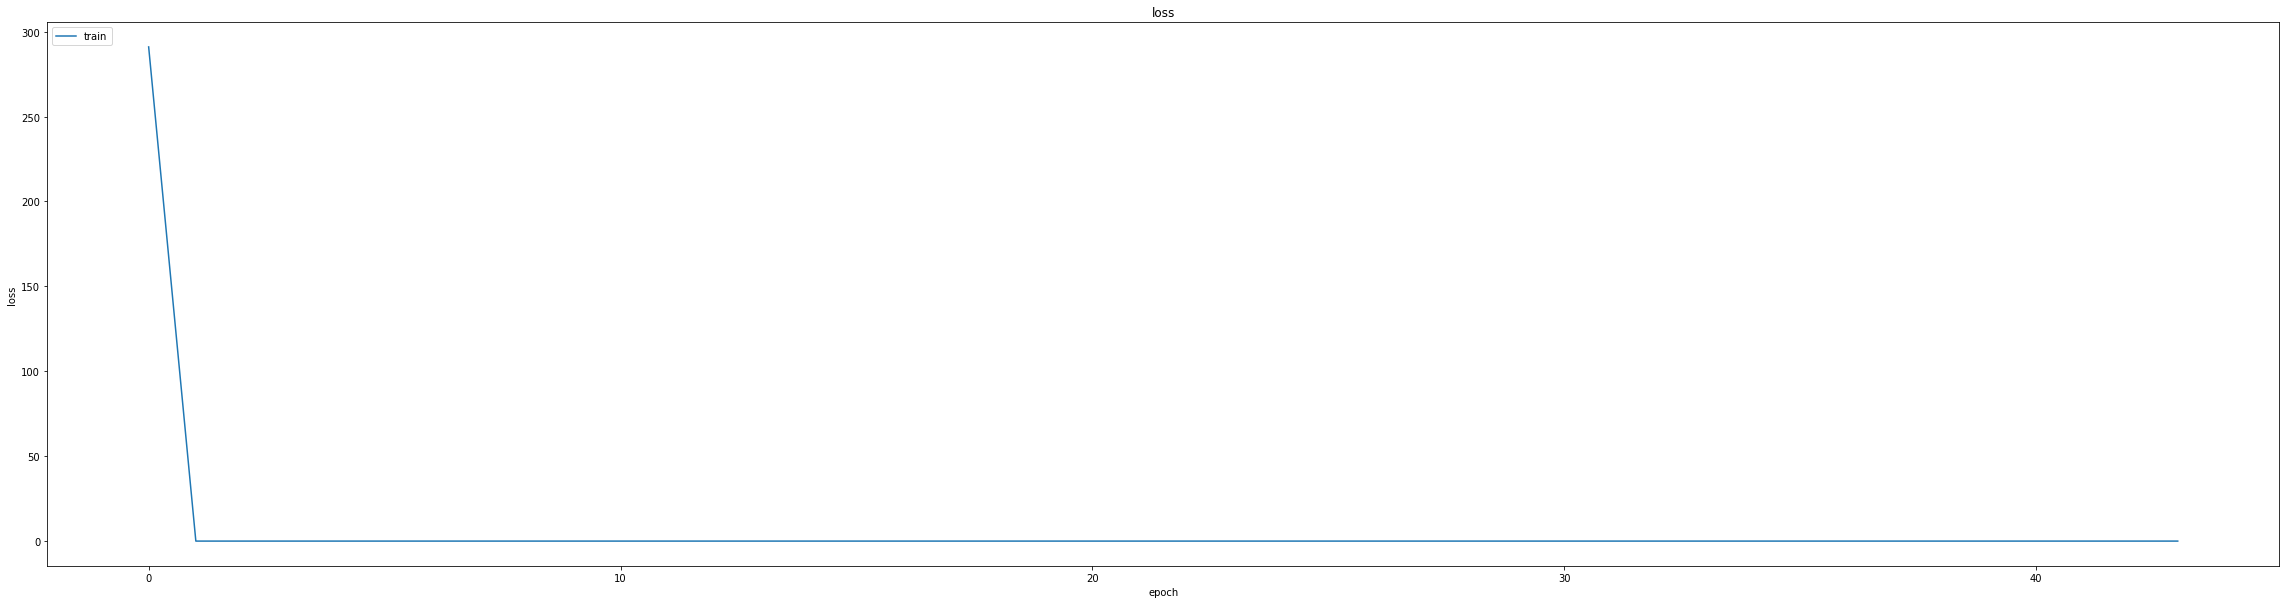

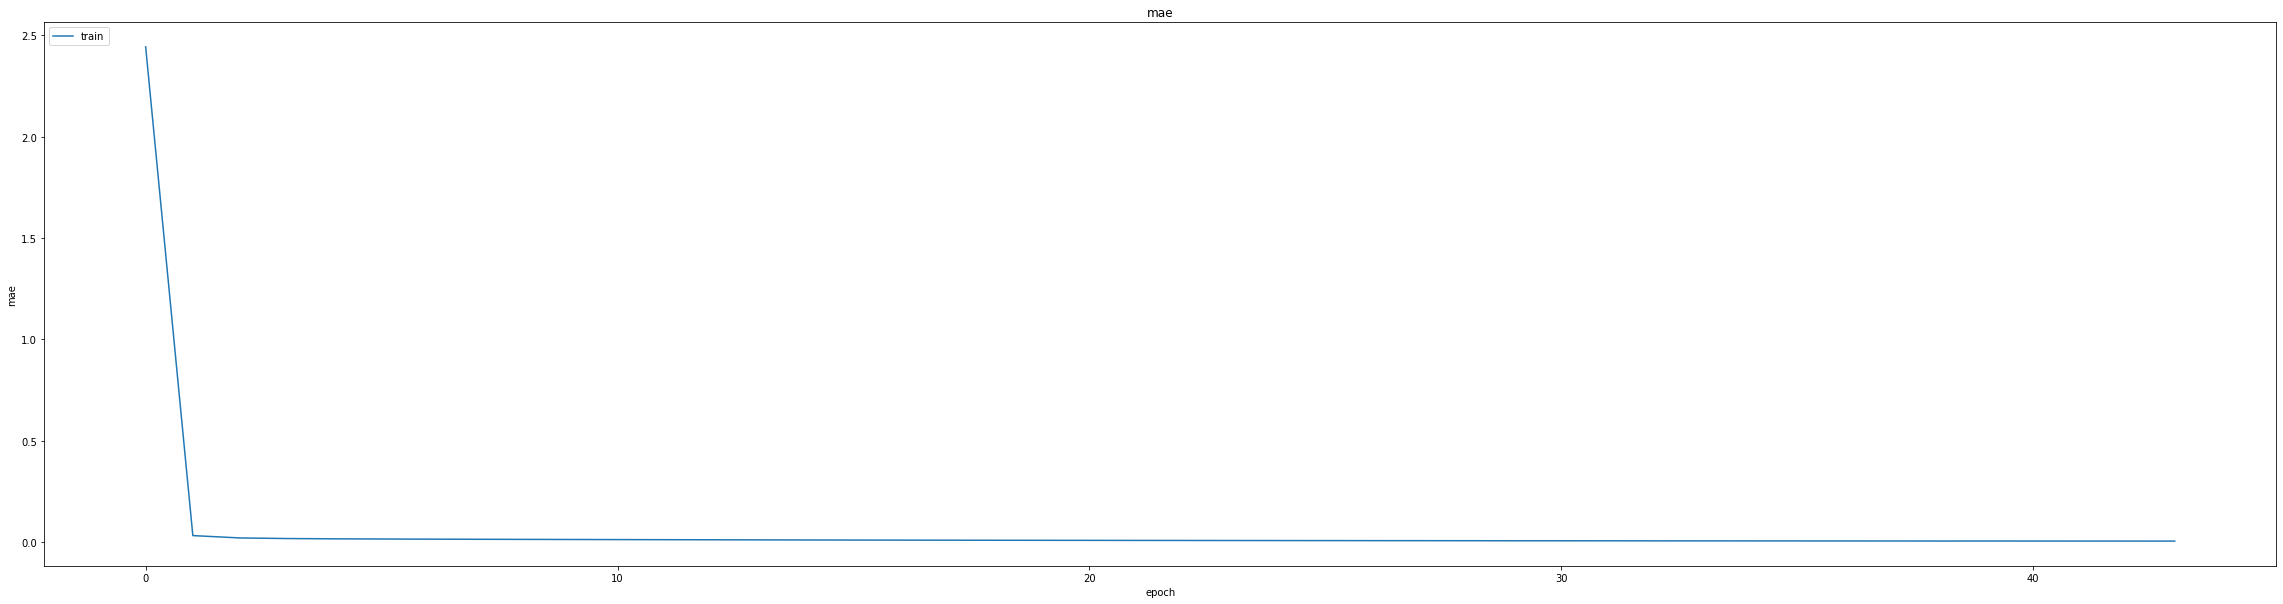

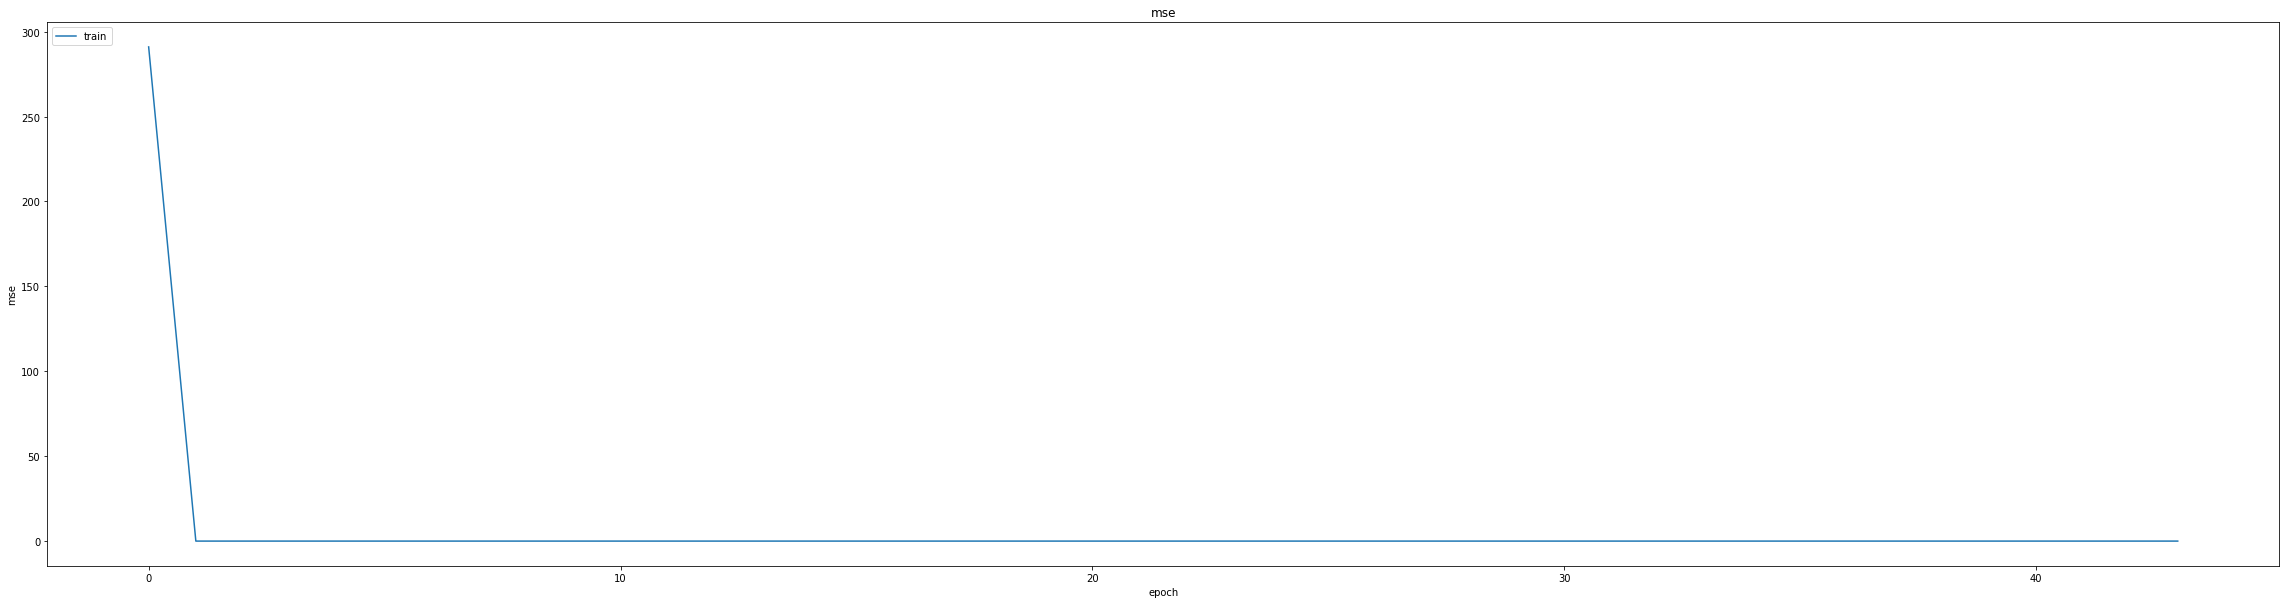

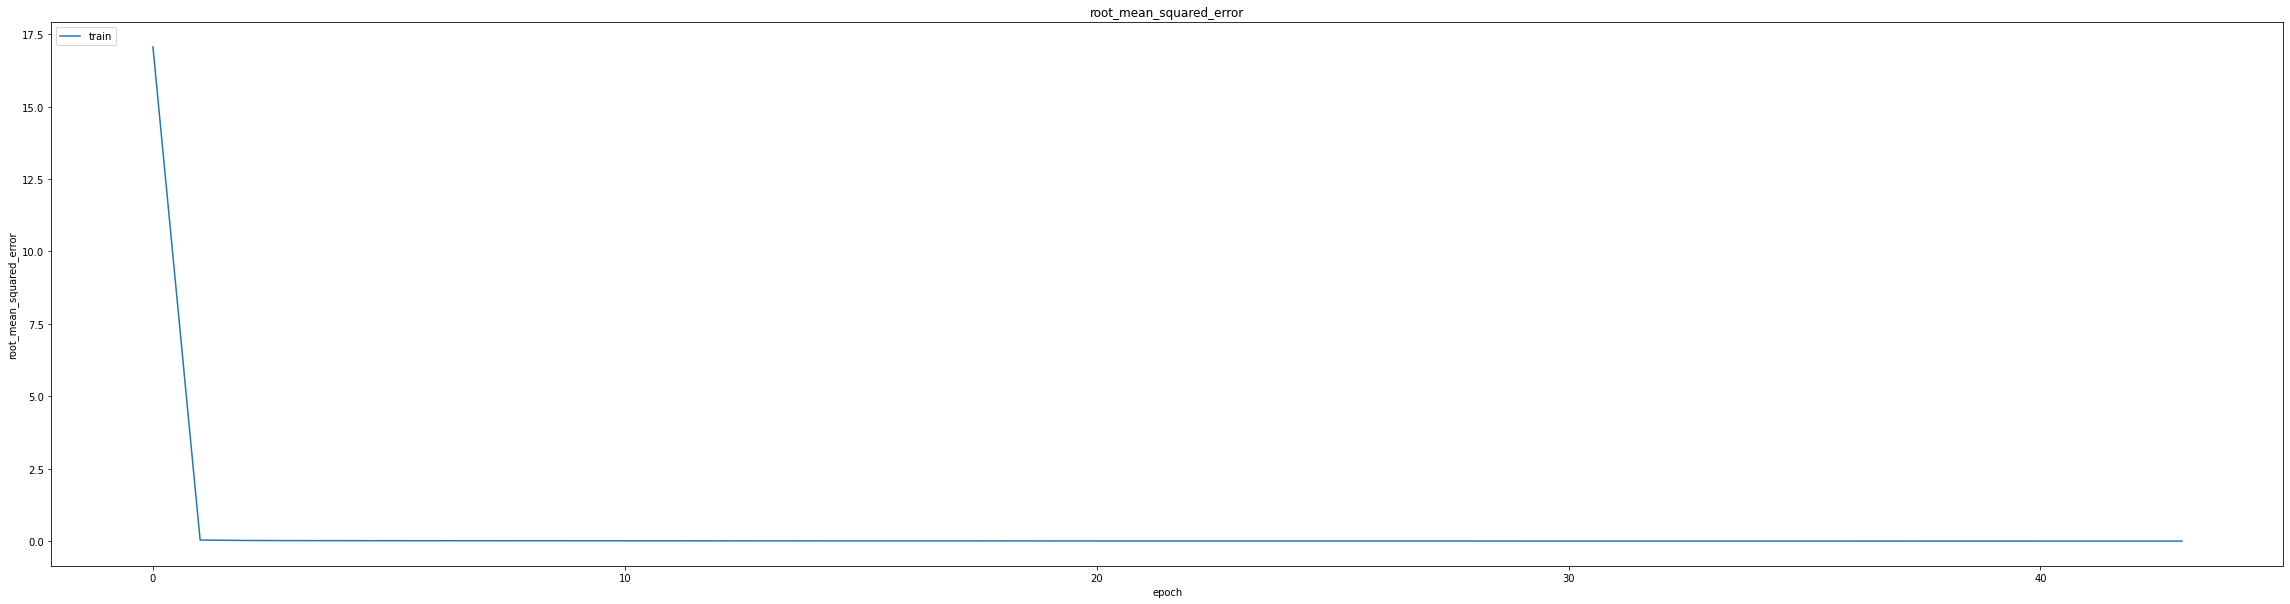

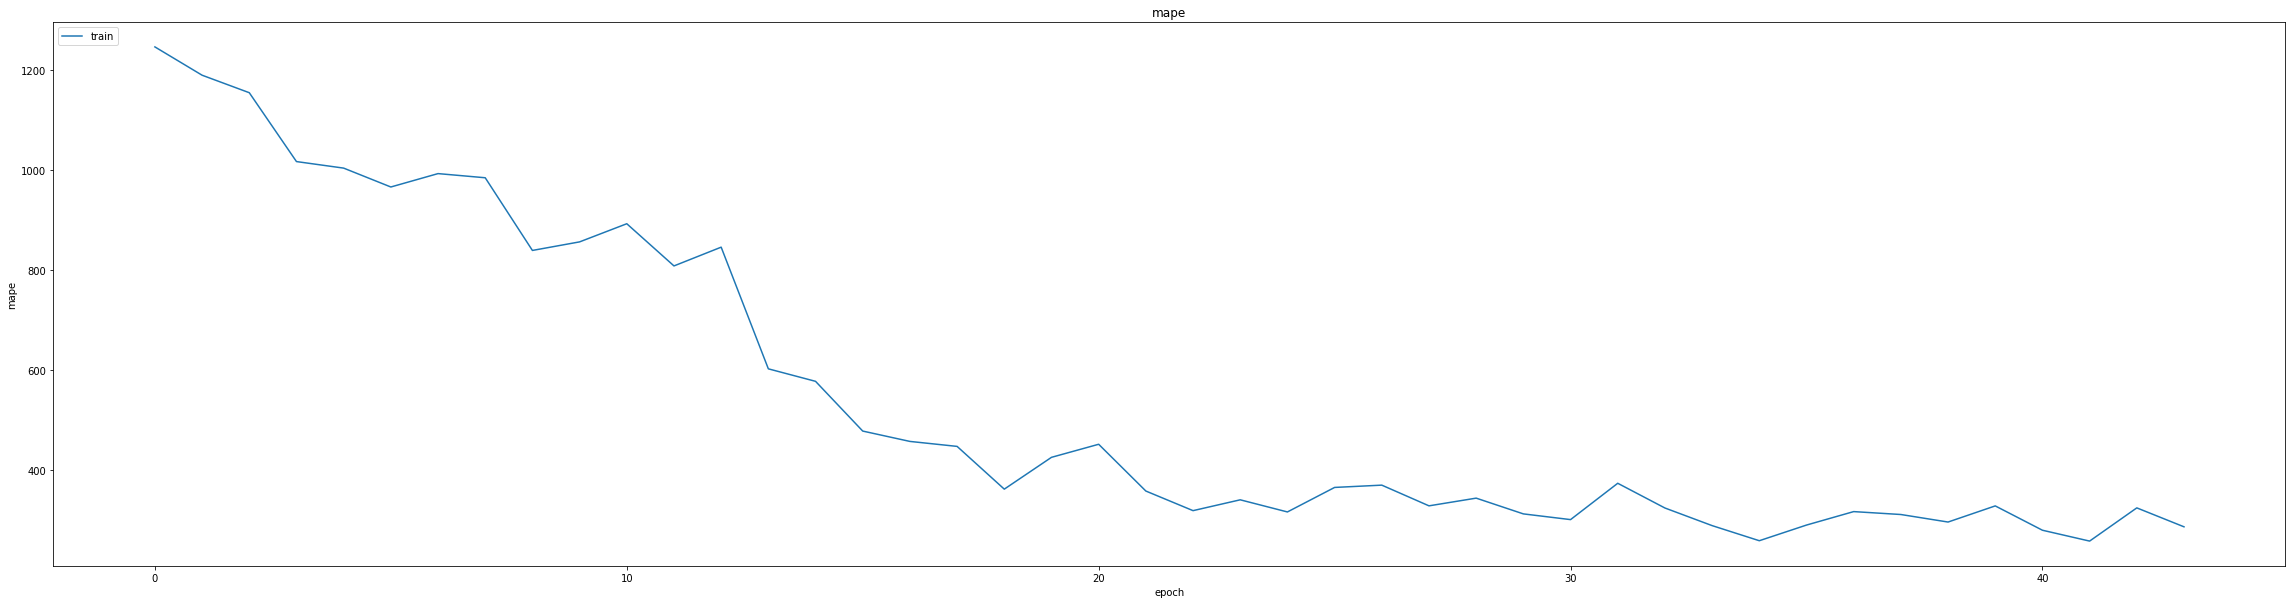

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008994941599667072
0.012953604571521282
1391/1391 [==============================] - 5s 3ms/step
0.9872458023065238


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/347 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0176 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 540.4225
Epoch 1: val_mse improved from 0.00017 to 0.00010, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)


347/347 [==============================] - 15s 35ms/step - loss: 0.0016 - mae: 0.0176 - mse: 0.0016 - root_mean_squared_error: 0.0396 - mape: 538.9557 - val_loss: 9.8876e-05 - val_mae: 0.0070 - val_mse: 9.8876e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1040.5448 - lr: 0.0010
Epoch 2/20
347/347 [==============================] - ETA: 0s - loss: 8.7974e-05 - mae: 0.0074 - mse: 8.7974e-05 - root_mean_squared_error: 0.0094 - mape: 298.3224
Epoch 2: val_mse did not improve from 0.00010
347/347 [==============================] - 5s 15ms/step - loss: 8.7974e-05 - mae: 0.0074 - mse: 8.7974e-05 - root_mean_squared_error: 0.0094 - mape: 298.3224 - val_loss: 1.1735e-04 - val_mae: 0.0081 - val_mse: 1.1735e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 822.1202 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
345/347 [============================>.] - ETA: 0s - loss: 6.5904e-05 - mae: 0.0064 - mse: 6.5904e-05 - root_mean_squared_error: 0.0081 - mape: 374.7281
Epoch 3: v

347/347 [==============================] - 12s 34ms/step - loss: 3.2831e-05 - mae: 0.0044 - mse: 3.2831e-05 - root_mean_squared_error: 0.0057 - mape: 241.3082 - val_loss: 9.2076e-05 - val_mae: 0.0069 - val_mse: 9.2076e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 586.7316 - lr: 5.9049e-04
Epoch 12/20
344/347 [============================>.] - ETA: 0s - loss: 4.0319e-05 - mae: 0.0049 - mse: 4.0319e-05 - root_mean_squared_error: 0.0063 - mape: 268.8309
Epoch 12: val_mse did not improve from 0.00009
347/347 [==============================] - 5s 15ms/step - loss: 4.0208e-05 - mae: 0.0049 - mse: 4.0208e-05 - root_mean_squared_error: 0.0063 - mape: 266.5553 - val_loss: 4.2721e-04 - val_mae: 0.0200 - val_mse: 4.2721e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 565.2487 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
346/347 [============================>.] - ETA: 0s - loss: 3.2313e-05 - mae: 0.0044 - mse: 3.2313e-05 - root_mean_squared_error: 0.0057 - mape: 1

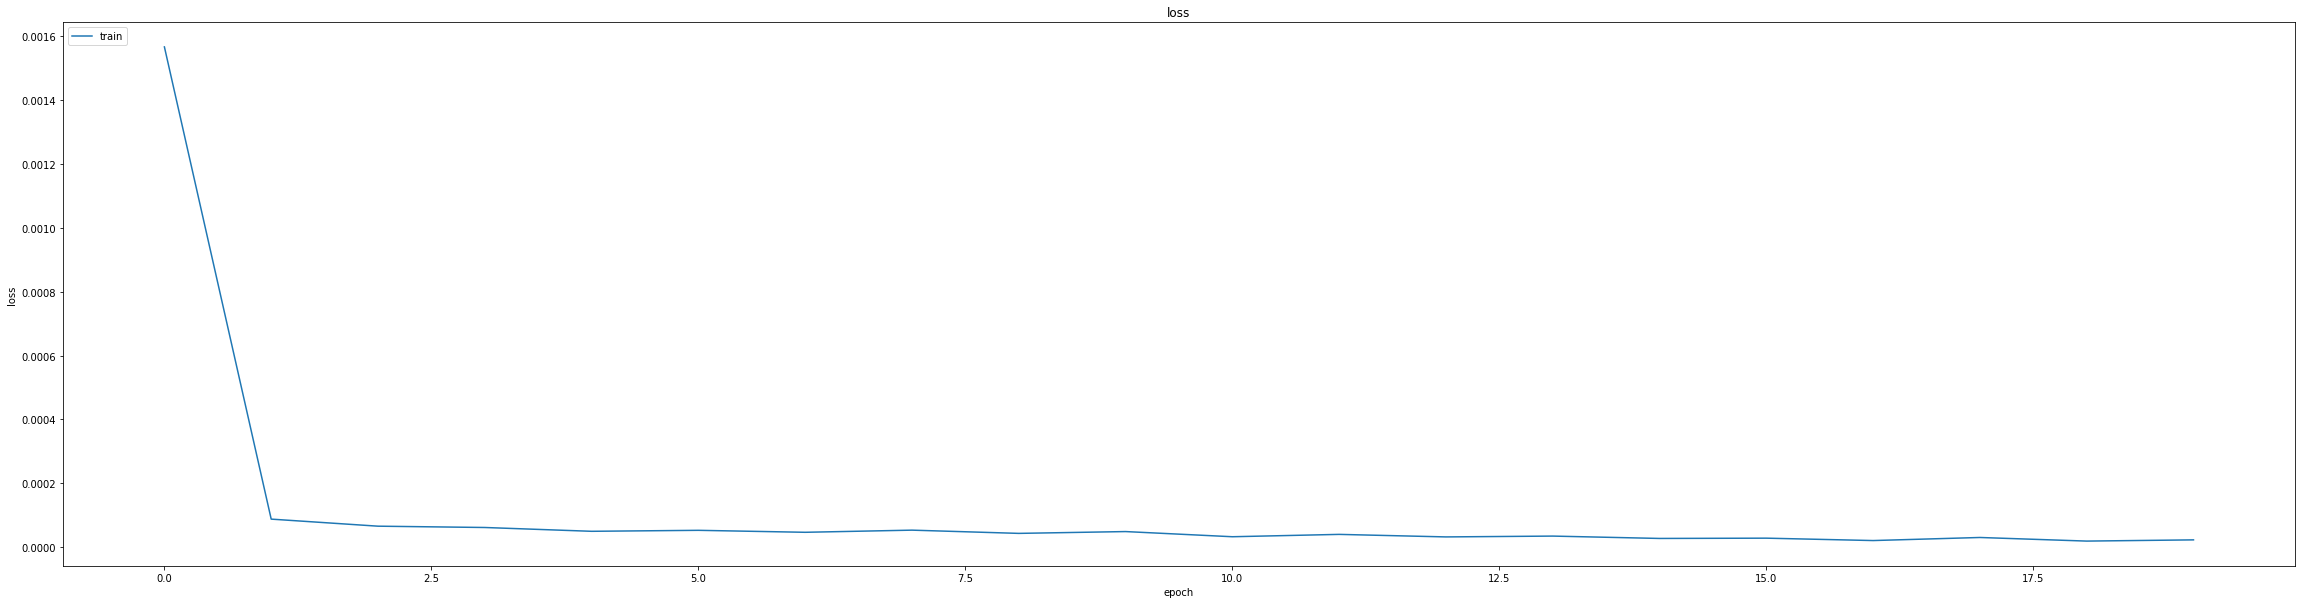

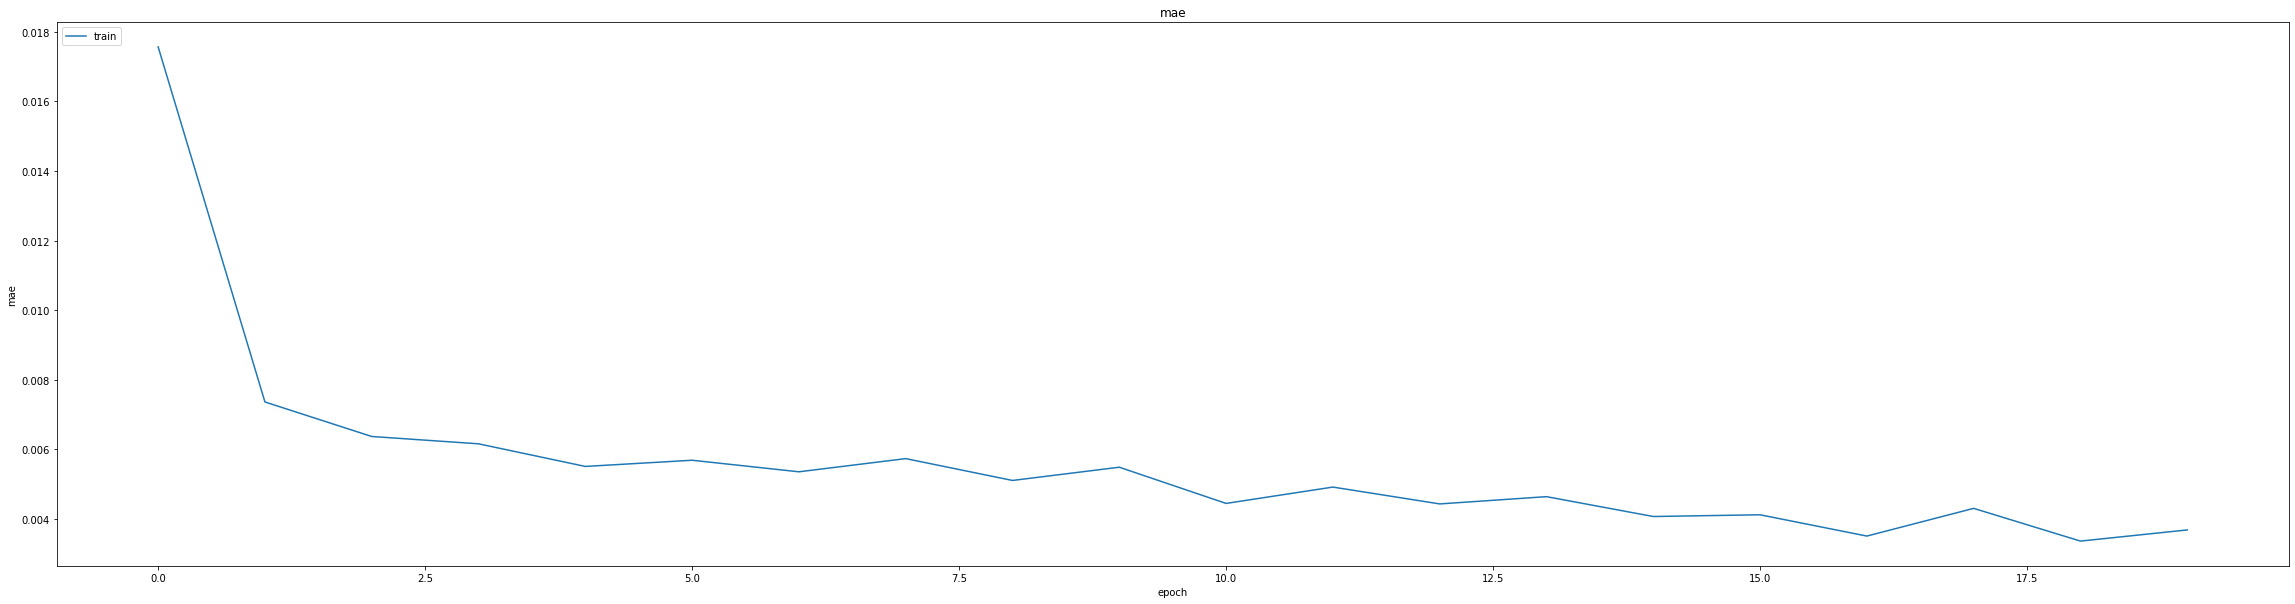

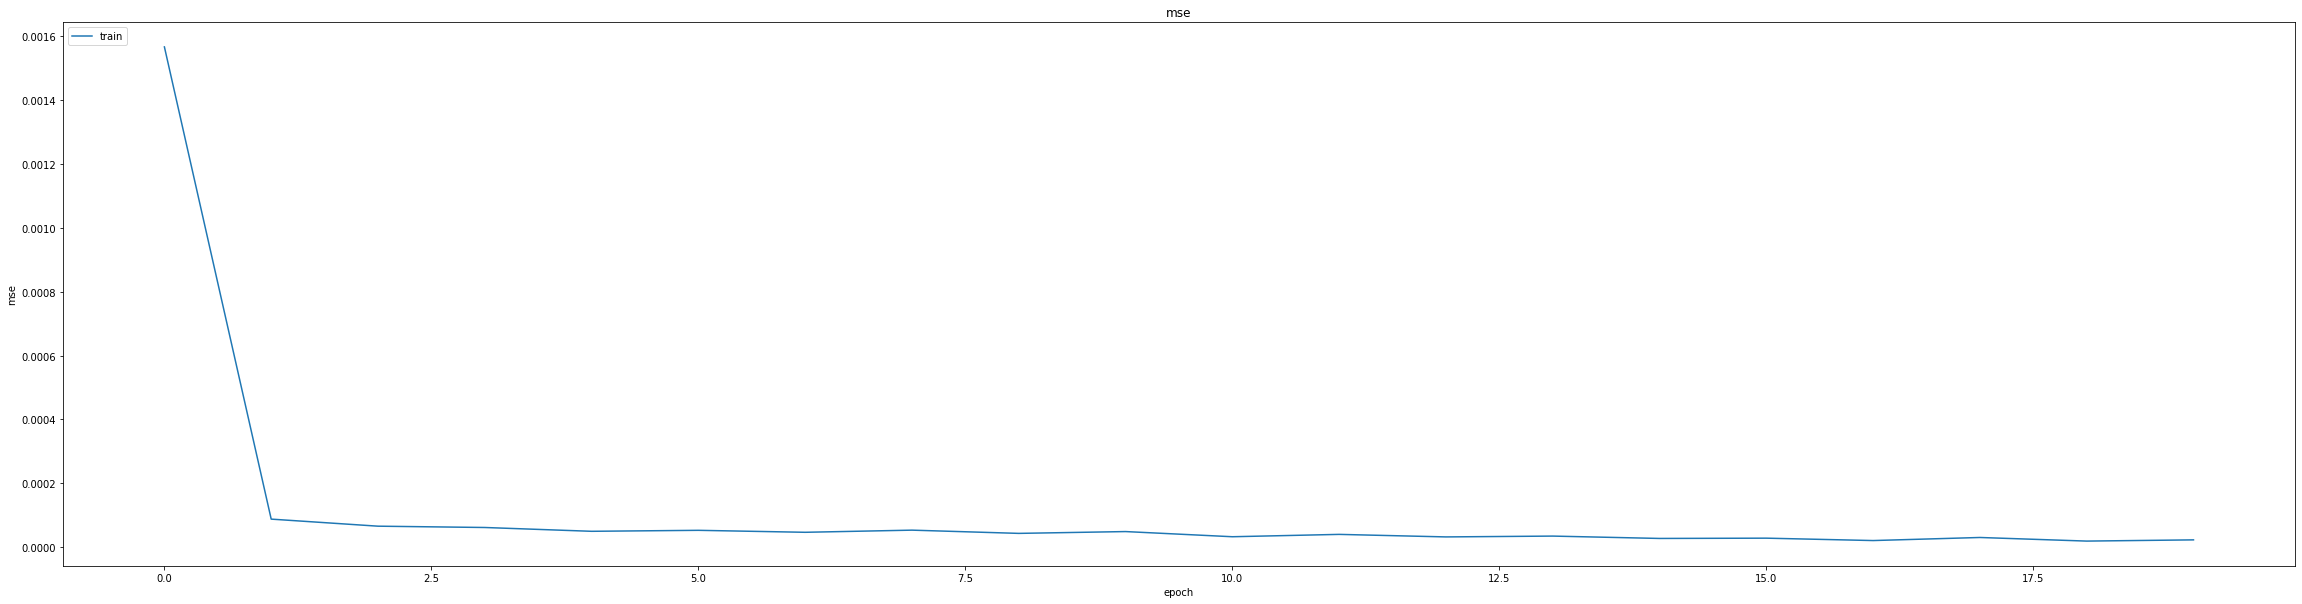

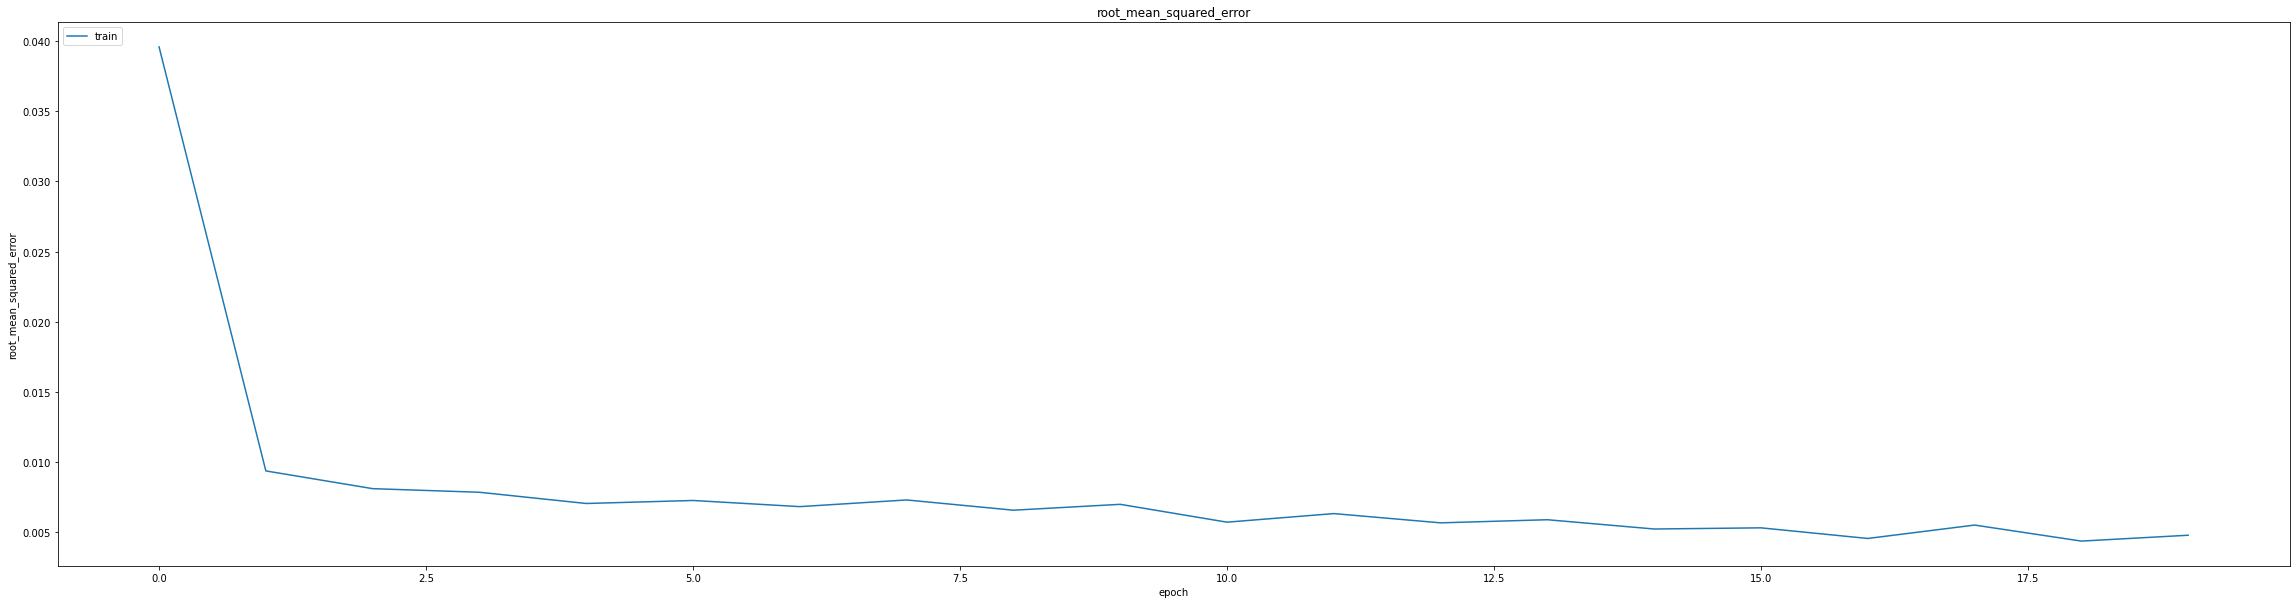

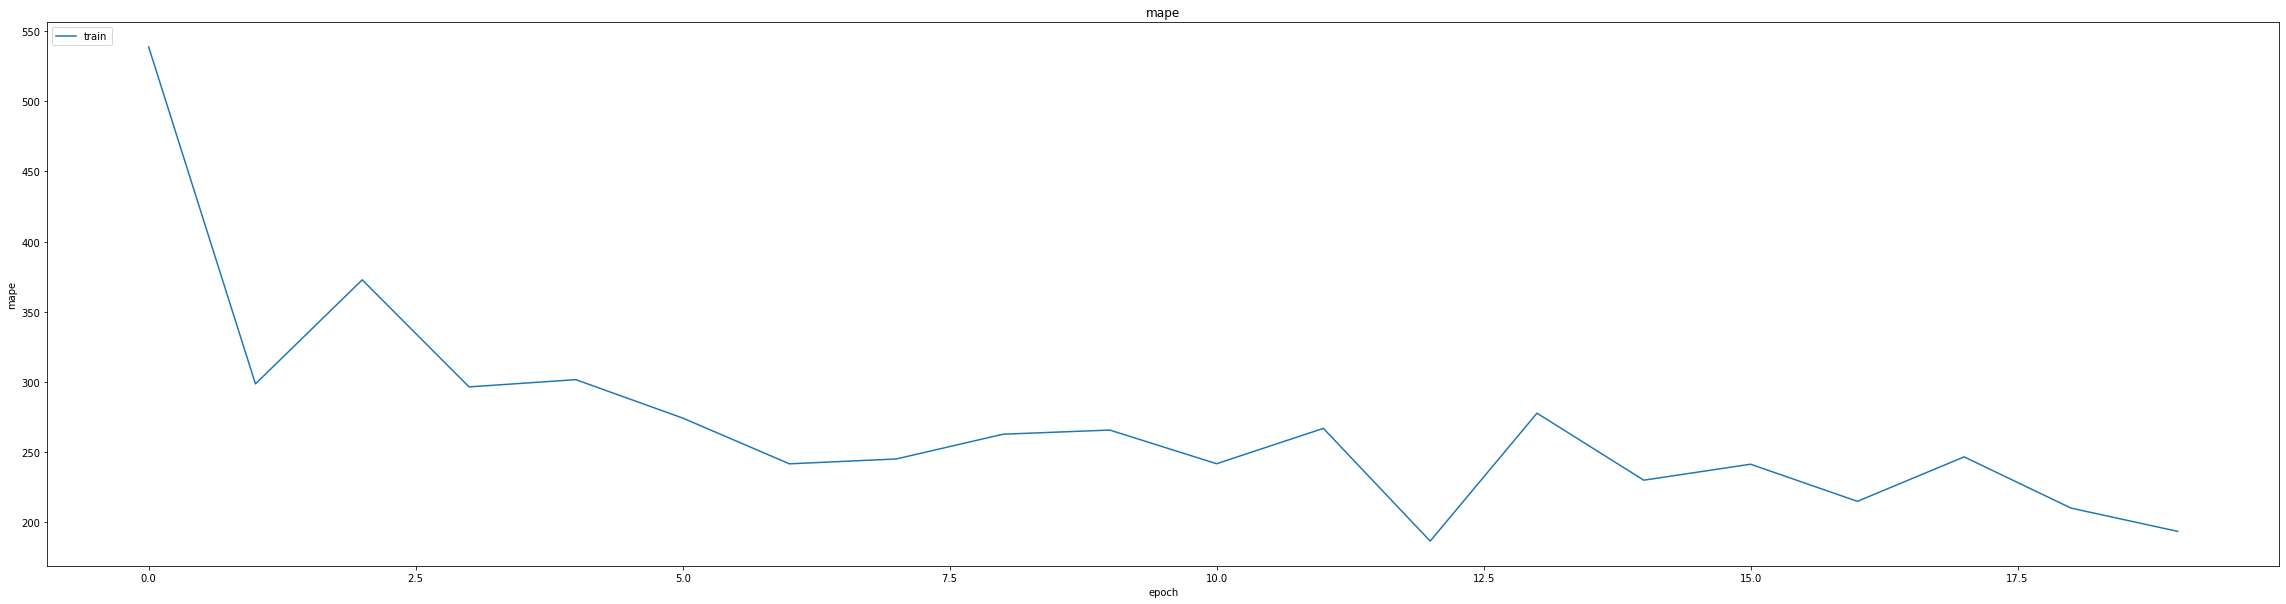

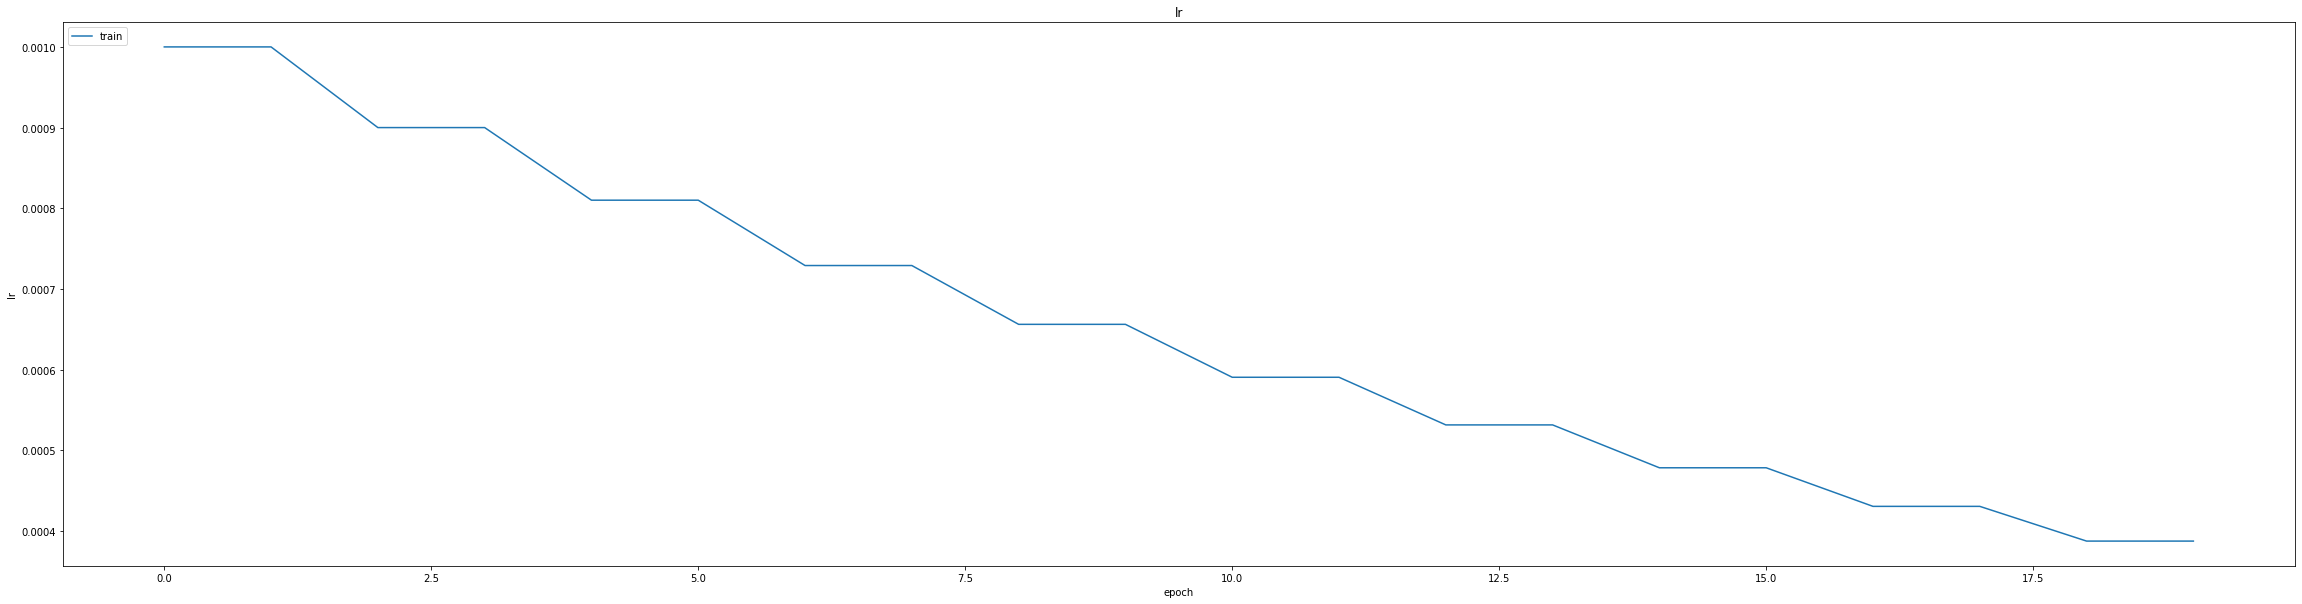

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006888727657496929
0.0095955990254879
1391/1391 [==============================] - 5s 3ms/step
0.9919856370882587


1391/1391 [==============================] - 5s 3ms/step


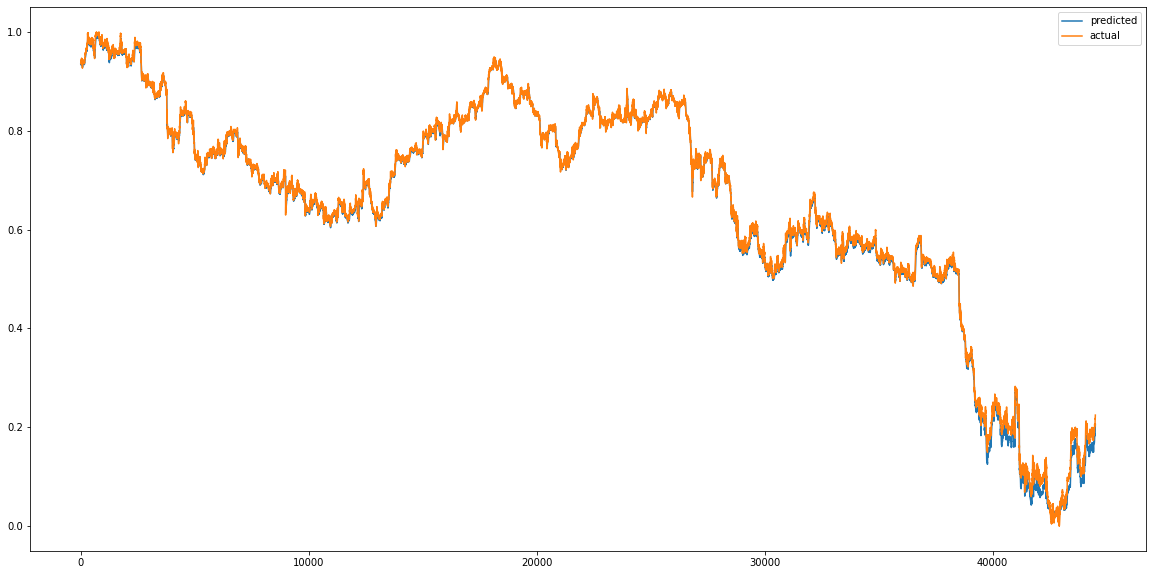

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


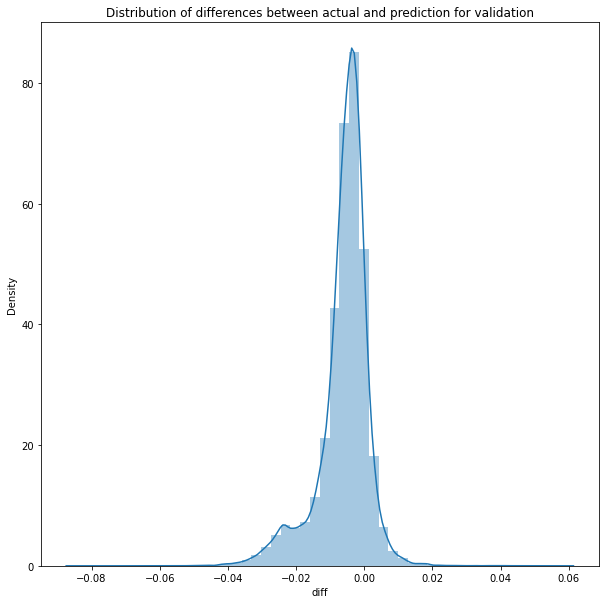

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 4s 3ms/step


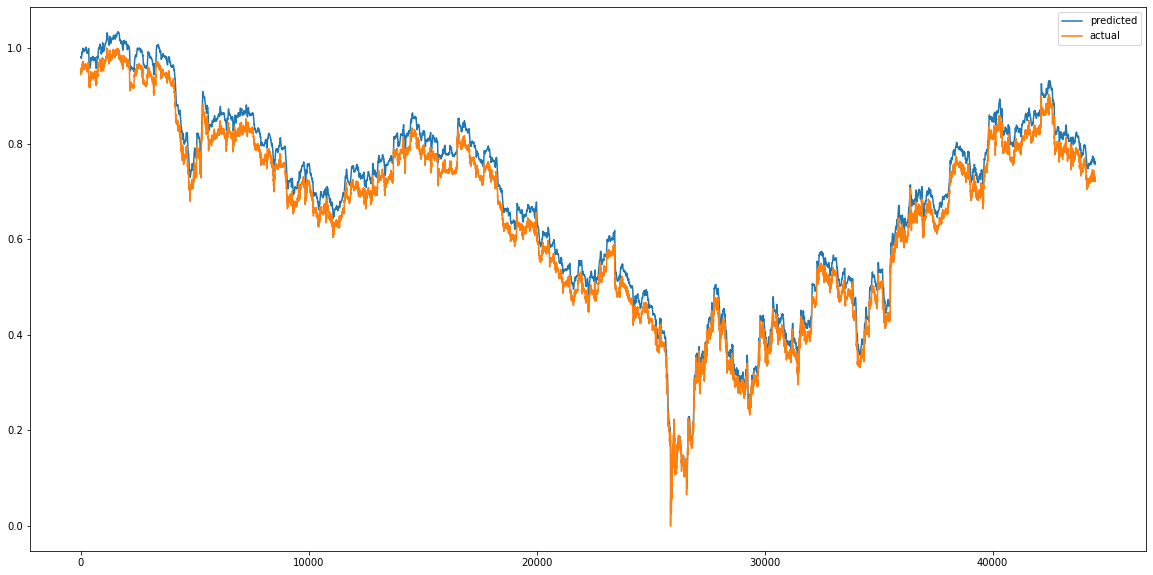

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


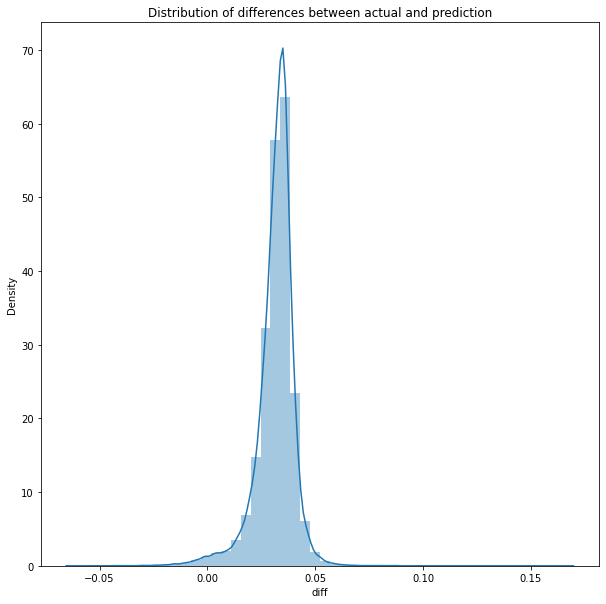

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0010761580868937247
RMSE :  0.032804848527218114
MAE :  0.031760120438449495
1391/1391 [==============================] - 4s 3ms/step
R2_Score  : 0.9719245276252222


count    44508.000000
mean         0.031561
std          0.008947
min         -0.062297
25%          0.028185
50%          0.032953
75%          0.036507
max          0.166555
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/347 [==============================] - ETA: 0s - loss: 558.8534 - mae: 6.1948 - mse: 558.8534 - root_mean_squared_error: 23.6401 - mape: 112719.7188
Epoch 1: val_mse improved from inf to 0.41012, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 49s 116ms/step - loss: 558.8534 - mae: 6.1948 - mse: 558.8534 - root_mean_squared_error: 23.6401 - mape: 112719.7188 - val_loss: 0.4101 - val_mae: 0.5933 - val_mse: 0.4101 - val_root_mean_squared_error: 0.6404 - val_mape: 29521.8359
Epoch 2/60
347/347 [==============================] - ETA: 0s - loss: 0.2071 - mae: 0.3825 - mse: 0.2071 - root_mean_squared_error: 0.4551 - mape: 8855.4902
Epoch 2: val_mse improved from 0.41012 to 0.09014, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.2071 - mae: 0.3825 - mse: 0.2071 - root_mean_squared_error: 0.4551 - mape: 8855.4902 - val_loss: 0.0901 - val_mae: 0.2101 - val_mse: 0.0901 - val_root_mean_squared_error: 0.3002 - val_mape: 19824.7031
Epoch 3/60
346/347 [============================>.] - ETA: 0s - loss: 0.0673 - mae: 0.2036 - mse: 0.0673 - root_mean_squared_error: 0.2594 - mape: 5973.4468
Epoch 3: val_mse improved from 0.09014 to 0.05810, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0673 - mae: 0.2035 - mse: 0.0673 - root_mean_squared_error: 0.2594 - mape: 5957.2822 - val_loss: 0.0581 - val_mae: 0.1749 - val_mse: 0.0581 - val_root_mean_squared_error: 0.2410 - val_mape: 16668.8125
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.0497 - mae: 0.1869 - mse: 0.0497 - root_mean_squared_error: 0.2229 - mape: 5408.4087
Epoch 4: val_mse improved from 0.05810 to 0.05502, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0497 - mae: 0.1869 - mse: 0.0497 - root_mean_squared_error: 0.2229 - mape: 5408.4087 - val_loss: 0.0550 - val_mae: 0.1790 - val_mse: 0.0550 - val_root_mean_squared_error: 0.2346 - val_mape: 15436.7822
Epoch 5/60
345/347 [============================>.] - ETA: 0s - loss: 0.0470 - mae: 0.1852 - mse: 0.0470 - root_mean_squared_error: 0.2169 - mape: 5227.2759
Epoch 5: val_mse did not improve from 0.05502
347/347 [==============================] - 8s 22ms/step - loss: 0.0471 - mae: 0.1853 - mse: 0.0471 - root_mean_squared_error: 0.2169 - mape: 5198.2002 - val_loss: 0.0551 - val_mae: 0.1823 - val_mse: 0.0551 - val_root_mean_squared_error: 0.2347 - val_mape: 14969.9492
Epoch 6/60
346/347 [============================>.] - ETA: 0s - loss: 0.0468 - mae: 0.1854 - mse: 0.0468 - root_mean_squared_error: 0.2163 - mape: 4749.4805
Epoch 6: val_mse did not improve from 0.05502
347/347 [==============================] - 8s 23ms/step - 

347/347 [==============================] - 39s 113ms/step - loss: 0.0466 - mae: 0.1851 - mse: 0.0466 - root_mean_squared_error: 0.2159 - mape: 4730.6924 - val_loss: 0.0548 - val_mae: 0.1832 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2342 - val_mape: 14700.3135
Epoch 9/60
346/347 [============================>.] - ETA: 0s - loss: 0.0464 - mae: 0.1848 - mse: 0.0464 - root_mean_squared_error: 0.2155 - mape: 5003.8696
Epoch 9: val_mse improved from 0.05485 to 0.05465, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0464 - mae: 0.1848 - mse: 0.0464 - root_mean_squared_error: 0.2154 - mape: 4990.3276 - val_loss: 0.0546 - val_mae: 0.1829 - val_mse: 0.0546 - val_root_mean_squared_error: 0.2338 - val_mape: 14657.0918
Epoch 10/60
347/347 [==============================] - ETA: 0s - loss: 0.0462 - mae: 0.1843 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 4424.9146
Epoch 10: val_mse improved from 0.05465 to 0.05430, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0462 - mae: 0.1843 - mse: 0.0462 - root_mean_squared_error: 0.2150 - mape: 4424.9146 - val_loss: 0.0543 - val_mae: 0.1820 - val_mse: 0.0543 - val_root_mean_squared_error: 0.2330 - val_mape: 14642.1123
Epoch 11/60
345/347 [============================>.] - ETA: 0s - loss: 0.0458 - mae: 0.1836 - mse: 0.0458 - root_mean_squared_error: 0.2141 - mape: 5165.9839
Epoch 11: val_mse improved from 0.05430 to 0.05332, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0458 - mae: 0.1836 - mse: 0.0458 - root_mean_squared_error: 0.2140 - mape: 5137.2876 - val_loss: 0.0533 - val_mae: 0.1799 - val_mse: 0.0533 - val_root_mean_squared_error: 0.2309 - val_mape: 14557.8447
Epoch 12/60
347/347 [==============================] - ETA: 0s - loss: 0.0441 - mae: 0.1801 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 5628.9858
Epoch 12: val_mse improved from 0.05332 to 0.05049, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 0.0441 - mae: 0.1801 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 5628.9858 - val_loss: 0.0505 - val_mae: 0.1751 - val_mse: 0.0505 - val_root_mean_squared_error: 0.2247 - val_mape: 14175.5859
Epoch 13/60
347/347 [==============================] - ETA: 0s - loss: 0.0416 - mae: 0.1747 - mse: 0.0416 - root_mean_squared_error: 0.2041 - mape: 5440.1919
Epoch 13: val_mse improved from 0.05049 to 0.04778, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 0.0416 - mae: 0.1747 - mse: 0.0416 - root_mean_squared_error: 0.2041 - mape: 5440.1919 - val_loss: 0.0478 - val_mae: 0.1689 - val_mse: 0.0478 - val_root_mean_squared_error: 0.2186 - val_mape: 14004.7471
Epoch 14/60
345/347 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1665 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4581.4307
Epoch 14: val_mse improved from 0.04778 to 0.04398, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 0.0384 - mae: 0.1665 - mse: 0.0384 - root_mean_squared_error: 0.1960 - mape: 4555.9541 - val_loss: 0.0440 - val_mae: 0.1594 - val_mse: 0.0440 - val_root_mean_squared_error: 0.2097 - val_mape: 13786.7705
Epoch 15/60
345/347 [============================>.] - ETA: 0s - loss: 0.0296 - mae: 0.1390 - mse: 0.0296 - root_mean_squared_error: 0.1719 - mape: 4106.6289
Epoch 15: val_mse improved from 0.04398 to 0.02363, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0295 - mae: 0.1389 - mse: 0.0295 - root_mean_squared_error: 0.1718 - mape: 4083.7725 - val_loss: 0.0236 - val_mae: 0.1014 - val_mse: 0.0236 - val_root_mean_squared_error: 0.1537 - val_mape: 11952.9756
Epoch 16/60
347/347 [==============================] - ETA: 0s - loss: 0.0184 - mae: 0.1029 - mse: 0.0184 - root_mean_squared_error: 0.1356 - mape: 4304.3301
Epoch 16: val_mse improved from 0.02363 to 0.01849, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0184 - mae: 0.1029 - mse: 0.0184 - root_mean_squared_error: 0.1356 - mape: 4304.3301 - val_loss: 0.0185 - val_mae: 0.0938 - val_mse: 0.0185 - val_root_mean_squared_error: 0.1360 - val_mape: 10974.5615
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0150 - mae: 0.0926 - mse: 0.0150 - root_mean_squared_error: 0.1225 - mape: 3167.9441
Epoch 17: val_mse improved from 0.01849 to 0.01518, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0150 - mae: 0.0926 - mse: 0.0150 - root_mean_squared_error: 0.1225 - mape: 3150.3604 - val_loss: 0.0152 - val_mae: 0.0847 - val_mse: 0.0152 - val_root_mean_squared_error: 0.1232 - val_mape: 10193.8779
Epoch 18/60
345/347 [============================>.] - ETA: 0s - loss: 0.0128 - mae: 0.0850 - mse: 0.0128 - root_mean_squared_error: 0.1133 - mape: 3148.0483
Epoch 18: val_mse improved from 0.01518 to 0.01427, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 0.0128 - mae: 0.0850 - mse: 0.0128 - root_mean_squared_error: 0.1133 - mape: 3130.5073 - val_loss: 0.0143 - val_mae: 0.0902 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1195 - val_mape: 9607.3623
Epoch 19/60
345/347 [============================>.] - ETA: 0s - loss: 0.0109 - mae: 0.0777 - mse: 0.0109 - root_mean_squared_error: 0.1043 - mape: 3284.9617
Epoch 19: val_mse improved from 0.01427 to 0.01138, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0109 - mae: 0.0777 - mse: 0.0109 - root_mean_squared_error: 0.1043 - mape: 3266.6555 - val_loss: 0.0114 - val_mae: 0.0778 - val_mse: 0.0114 - val_root_mean_squared_error: 0.1067 - val_mape: 8941.3340
Epoch 20/60
346/347 [============================>.] - ETA: 0s - loss: 0.0091 - mae: 0.0704 - mse: 0.0091 - root_mean_squared_error: 0.0953 - mape: 3164.6011
Epoch 20: val_mse improved from 0.01138 to 0.00872, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 0.0091 - mae: 0.0704 - mse: 0.0091 - root_mean_squared_error: 0.0953 - mape: 3156.0251 - val_loss: 0.0087 - val_mae: 0.0584 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0934 - val_mape: 8554.2021
Epoch 21/60
347/347 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0641 - mse: 0.0076 - root_mean_squared_error: 0.0873 - mape: 3903.7942
Epoch 21: val_mse improved from 0.00872 to 0.00792, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0076 - mae: 0.0641 - mse: 0.0076 - root_mean_squared_error: 0.0873 - mape: 3903.7942 - val_loss: 0.0079 - val_mae: 0.0567 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0890 - val_mape: 8249.1924
Epoch 22/60
345/347 [============================>.] - ETA: 0s - loss: 0.0065 - mae: 0.0593 - mse: 0.0065 - root_mean_squared_error: 0.0809 - mape: 4012.9409
Epoch 22: val_mse improved from 0.00792 to 0.00711, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0065 - mae: 0.0592 - mse: 0.0065 - root_mean_squared_error: 0.0809 - mape: 3990.5125 - val_loss: 0.0071 - val_mae: 0.0582 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0843 - val_mape: 7683.6997
Epoch 23/60
346/347 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0543 - mse: 0.0055 - root_mean_squared_error: 0.0745 - mape: 2905.7004
Epoch 23: val_mse improved from 0.00711 to 0.00509, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0055 - mae: 0.0543 - mse: 0.0055 - root_mean_squared_error: 0.0745 - mape: 2897.8154 - val_loss: 0.0051 - val_mae: 0.0384 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 7277.9106
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0511 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 2664.3696
Epoch 24: val_mse improved from 0.00509 to 0.00462, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0049 - mae: 0.0511 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 2649.5002 - val_loss: 0.0046 - val_mae: 0.0378 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 6928.8232
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0474 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 2426.3367
Epoch 25: val_mse improved from 0.00462 to 0.00420, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 0.0042 - mae: 0.0474 - mse: 0.0042 - root_mean_squared_error: 0.0647 - mape: 2419.7517 - val_loss: 0.0042 - val_mae: 0.0383 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0648 - val_mape: 6632.1260
Epoch 26/60
346/347 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0437 - mse: 0.0036 - root_mean_squared_error: 0.0598 - mape: 2087.4941
Epoch 26: val_mse improved from 0.00420 to 0.00356, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0036 - mae: 0.0436 - mse: 0.0036 - root_mean_squared_error: 0.0598 - mape: 2081.8313 - val_loss: 0.0036 - val_mae: 0.0337 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0596 - val_mape: 6262.9805
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0402 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 2206.3811
Epoch 27: val_mse improved from 0.00356 to 0.00300, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 0.0030 - mae: 0.0402 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 2200.3921 - val_loss: 0.0030 - val_mae: 0.0308 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0548 - val_mape: 5887.5020
Epoch 28/60
346/347 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0374 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1935.1467
Epoch 28: val_mse improved from 0.00300 to 0.00253, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0026 - mae: 0.0374 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1929.9084 - val_loss: 0.0025 - val_mae: 0.0280 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 5564.6714
Epoch 29/60
346/347 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 1659.6311
Epoch 29: val_mse improved from 0.00253 to 0.00219, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0021 - mae: 0.0342 - mse: 0.0021 - root_mean_squared_error: 0.0463 - mape: 1655.1385 - val_loss: 0.0022 - val_mae: 0.0274 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mape: 5280.0234
Epoch 30/60
347/347 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0315 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 1722.8295
Epoch 30: val_mse improved from 0.00219 to 0.00170, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0018 - mae: 0.0315 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 1722.8295 - val_loss: 0.0017 - val_mae: 0.0234 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mape: 4883.4062
Epoch 31/60
346/347 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1534.0076
Epoch 31: val_mse improved from 0.00170 to 0.00140, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 0.0015 - mae: 0.0289 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1529.8417 - val_loss: 0.0014 - val_mae: 0.0207 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 4609.9443
Epoch 32/60
346/347 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1594.3466
Epoch 32: val_mse improved from 0.00140 to 0.00115, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 114ms/step - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0359 - mape: 1590.0149 - val_loss: 0.0011 - val_mae: 0.0187 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0339 - val_mape: 4342.3804
Epoch 33/60
345/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1509.7795
Epoch 33: val_mse improved from 0.00115 to 0.00097, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 1501.3423 - val_loss: 9.7240e-04 - val_mae: 0.0170 - val_mse: 9.7240e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 4120.8130
Epoch 34/60
345/347 [============================>.] - ETA: 0s - loss: 9.8767e-04 - mae: 0.0236 - mse: 9.8767e-04 - root_mean_squared_error: 0.0314 - mape: 1396.1804
Epoch 34: val_mse improved from 0.00097 to 0.00090, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 9.8647e-04 - mae: 0.0236 - mse: 9.8647e-04 - root_mean_squared_error: 0.0314 - mape: 1388.3779 - val_loss: 9.0083e-04 - val_mae: 0.0177 - val_mse: 9.0083e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 3891.2705
Epoch 35/60
346/347 [============================>.] - ETA: 0s - loss: 8.5433e-04 - mae: 0.0220 - mse: 8.5433e-04 - root_mean_squared_error: 0.0292 - mape: 1255.5321
Epoch 35: val_mse improved from 0.00090 to 0.00083, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 8.5382e-04 - mae: 0.0220 - mse: 8.5382e-04 - root_mean_squared_error: 0.0292 - mape: 1252.1213 - val_loss: 8.2630e-04 - val_mae: 0.0191 - val_mse: 8.2630e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 3652.1543
Epoch 36/60
346/347 [============================>.] - ETA: 0s - loss: 7.5124e-04 - mae: 0.0206 - mse: 7.5124e-04 - root_mean_squared_error: 0.0274 - mape: 1516.1426
Epoch 36: val_mse improved from 0.00083 to 0.00066, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 112ms/step - loss: 7.5137e-04 - mae: 0.0206 - mse: 7.5137e-04 - root_mean_squared_error: 0.0274 - mape: 1512.0237 - val_loss: 6.5751e-04 - val_mae: 0.0165 - val_mse: 6.5751e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 3475.2263
Epoch 37/60
346/347 [============================>.] - ETA: 0s - loss: 6.6895e-04 - mae: 0.0195 - mse: 6.6895e-04 - root_mean_squared_error: 0.0259 - mape: 1153.3091
Epoch 37: val_mse improved from 0.00066 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 115ms/step - loss: 6.6864e-04 - mae: 0.0195 - mse: 6.6864e-04 - root_mean_squared_error: 0.0259 - mape: 1150.1753 - val_loss: 5.4196e-04 - val_mae: 0.0144 - val_mse: 5.4196e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 3283.2681
Epoch 38/60
345/347 [============================>.] - ETA: 0s - loss: 6.0291e-04 - mae: 0.0187 - mse: 6.0291e-04 - root_mean_squared_error: 0.0246 - mape: 1160.0608
Epoch 38: val_mse improved from 0.00054 to 0.00046, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 113ms/step - loss: 6.0268e-04 - mae: 0.0187 - mse: 6.0268e-04 - root_mean_squared_error: 0.0245 - mape: 1153.5913 - val_loss: 4.6264e-04 - val_mae: 0.0137 - val_mse: 4.6264e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 3128.5288
Epoch 39/60
346/347 [============================>.] - ETA: 0s - loss: 5.1911e-04 - mae: 0.0173 - mse: 5.1911e-04 - root_mean_squared_error: 0.0228 - mape: 963.3195
Epoch 39: val_mse did not improve from 0.00046
347/347 [==============================] - 8s 23ms/step - loss: 5.1967e-04 - mae: 0.0173 - mse: 5.1967e-04 - root_mean_squared_error: 0.0228 - mape: 960.7120 - val_loss: 0.0014 - val_mae: 0.0337 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 2973.1733
Epoch 40/60
346/347 [============================>.] - ETA: 0s - loss: 4.7710e-04 - mae: 0.0167 - mse: 4.7710e-04 - root_mean_squared_error: 0.0218 - mape: 999.6410 
Epoch 40: val_mse did not improve from 0.00046
347/347 [=========

347/347 [==============================] - 40s 115ms/step - loss: 4.3906e-04 - mae: 0.0161 - mse: 4.3906e-04 - root_mean_squared_error: 0.0210 - mape: 1109.8394 - val_loss: 4.1889e-04 - val_mae: 0.0153 - val_mse: 4.1889e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 2721.2202
Epoch 42/60
347/347 [==============================] - ETA: 0s - loss: 4.0893e-04 - mae: 0.0155 - mse: 4.0893e-04 - root_mean_squared_error: 0.0202 - mape: 803.9435
Epoch 42: val_mse did not improve from 0.00042
347/347 [==============================] - 8s 22ms/step - loss: 4.0893e-04 - mae: 0.0155 - mse: 4.0893e-04 - root_mean_squared_error: 0.0202 - mape: 803.9435 - val_loss: 5.0997e-04 - val_mae: 0.0190 - val_mse: 5.0997e-04 - val_root_mean_squared_error: 0.0226 - val_mape: 2609.7986
Epoch 43/60
347/347 [==============================] - ETA: 0s - loss: 3.5298e-04 - mae: 0.0145 - mse: 3.5298e-04 - root_mean_squared_error: 0.0188 - mape: 1150.7754
Epoch 43: val_mse improved from 0.00042 to 0.00023, savin

347/347 [==============================] - 40s 115ms/step - loss: 3.5298e-04 - mae: 0.0145 - mse: 3.5298e-04 - root_mean_squared_error: 0.0188 - mape: 1150.7754 - val_loss: 2.3056e-04 - val_mae: 0.0094 - val_mse: 2.3056e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 2491.4473
Epoch 44/60
345/347 [============================>.] - ETA: 0s - loss: 3.2952e-04 - mae: 0.0140 - mse: 3.2952e-04 - root_mean_squared_error: 0.0182 - mape: 836.1912
Epoch 44: val_mse did not improve from 0.00023
347/347 [==============================] - 8s 23ms/step - loss: 3.2999e-04 - mae: 0.0140 - mse: 3.2999e-04 - root_mean_squared_error: 0.0182 - mape: 831.5220 - val_loss: 0.0012 - val_mae: 0.0320 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 2383.4592
Epoch 45/60
346/347 [============================>.] - ETA: 0s - loss: 2.9522e-04 - mae: 0.0133 - mse: 2.9522e-04 - root_mean_squared_error: 0.0172 - mape: 799.0411
Epoch 45: val_mse did not improve from 0.00023
347/347 [==========

347/347 [==============================] - 39s 114ms/step - loss: 2.4357e-04 - mae: 0.0120 - mse: 2.4357e-04 - root_mean_squared_error: 0.0156 - mape: 760.0359 - val_loss: 1.8199e-04 - val_mae: 0.0094 - val_mse: 1.8199e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 2118.7861
Epoch 48/60
347/347 [==============================] - ETA: 0s - loss: 2.5284e-04 - mae: 0.0124 - mse: 2.5284e-04 - root_mean_squared_error: 0.0159 - mape: 792.6766
Epoch 48: val_mse did not improve from 0.00018
347/347 [==============================] - 8s 22ms/step - loss: 2.5284e-04 - mae: 0.0124 - mse: 2.5284e-04 - root_mean_squared_error: 0.0159 - mape: 792.6766 - val_loss: 5.2158e-04 - val_mae: 0.0206 - val_mse: 5.2158e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2046.4066
Epoch 49/60
347/347 [==============================] - ETA: 0s - loss: 2.4124e-04 - mae: 0.0121 - mse: 2.4124e-04 - root_mean_squared_error: 0.0155 - mape: 888.4637
Epoch 49: val_mse did not improve from 0.00018
347/347 [===

347/347 [==============================] - 39s 113ms/step - loss: 1.9050e-04 - mae: 0.0107 - mse: 1.9050e-04 - root_mean_squared_error: 0.0138 - mape: 618.7468 - val_loss: 1.6756e-04 - val_mae: 0.0095 - val_mse: 1.6756e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1911.5077
Epoch 51/60
346/347 [============================>.] - ETA: 0s - loss: 1.9276e-04 - mae: 0.0108 - mse: 1.9276e-04 - root_mean_squared_error: 0.0139 - mape: 643.8611
Epoch 51: val_mse improved from 0.00017 to 0.00014, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 1.9273e-04 - mae: 0.0108 - mse: 1.9273e-04 - root_mean_squared_error: 0.0139 - mape: 642.1122 - val_loss: 1.3670e-04 - val_mae: 0.0081 - val_mse: 1.3670e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 1854.3120
Epoch 52/60
347/347 [==============================] - ETA: 0s - loss: 1.9289e-04 - mae: 0.0108 - mse: 1.9289e-04 - root_mean_squared_error: 0.0139 - mape: 737.3210
Epoch 52: val_mse improved from 0.00014 to 0.00011, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 39s 114ms/step - loss: 1.9289e-04 - mae: 0.0108 - mse: 1.9289e-04 - root_mean_squared_error: 0.0139 - mape: 737.3210 - val_loss: 1.1077e-04 - val_mae: 0.0065 - val_mse: 1.1077e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 1806.0929
Epoch 53/60
347/347 [==============================] - ETA: 0s - loss: 1.9121e-04 - mae: 0.0107 - mse: 1.9121e-04 - root_mean_squared_error: 0.0138 - mape: 628.1442
Epoch 53: val_mse improved from 0.00011 to 0.00011, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)


347/347 [==============================] - 40s 116ms/step - loss: 1.9121e-04 - mae: 0.0107 - mse: 1.9121e-04 - root_mean_squared_error: 0.0138 - mape: 628.1442 - val_loss: 1.0798e-04 - val_mae: 0.0065 - val_mse: 1.0798e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 1768.4808
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 1.5239e-04 - mae: 0.0096 - mse: 1.5239e-04 - root_mean_squared_error: 0.0123 - mape: 614.6416
Epoch 54: val_mse did not improve from 0.00011
347/347 [==============================] - 8s 22ms/step - loss: 1.5239e-04 - mae: 0.0096 - mse: 1.5239e-04 - root_mean_squared_error: 0.0123 - mape: 614.6416 - val_loss: 3.4506e-04 - val_mae: 0.0158 - val_mse: 3.4506e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1704.5122
Epoch 55/60
347/347 [==============================] - ETA: 0s - loss: 1.5061e-04 - mae: 0.0097 - mse: 1.5061e-04 - root_mean_squared_error: 0.0123 - mape: 575.6216
Epoch 55: val_mse did not improve from 0.00011
347/347 [===

347/347 [==============================] - 39s 113ms/step - loss: 1.3847e-04 - mae: 0.0090 - mse: 1.3847e-04 - root_mean_squared_error: 0.0118 - mape: 469.5751 - val_loss: 9.8815e-05 - val_mae: 0.0066 - val_mse: 9.8815e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1499.2915


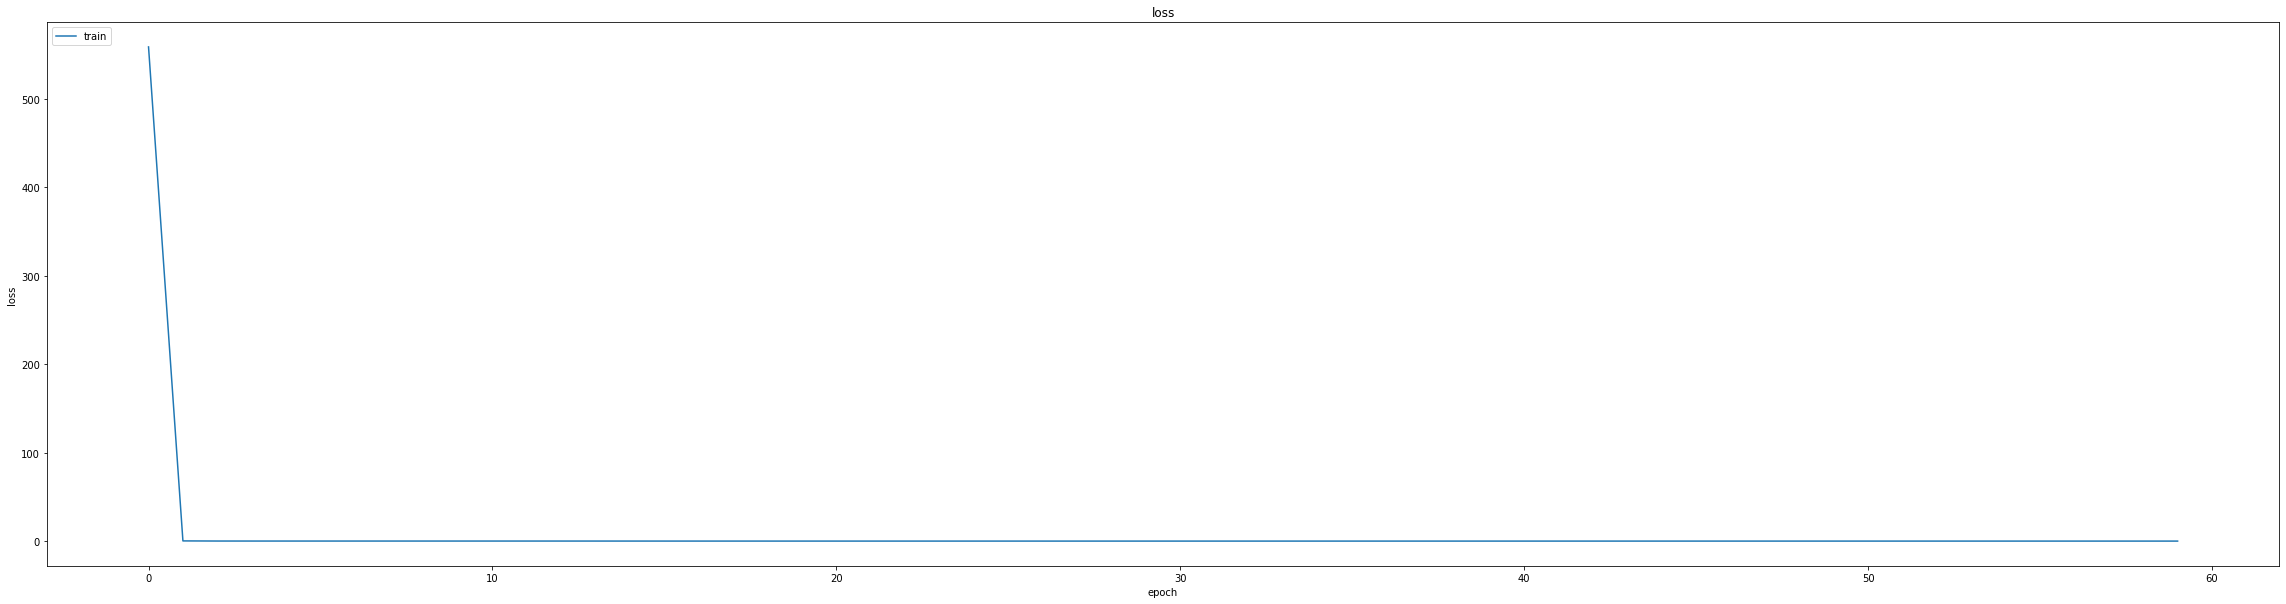

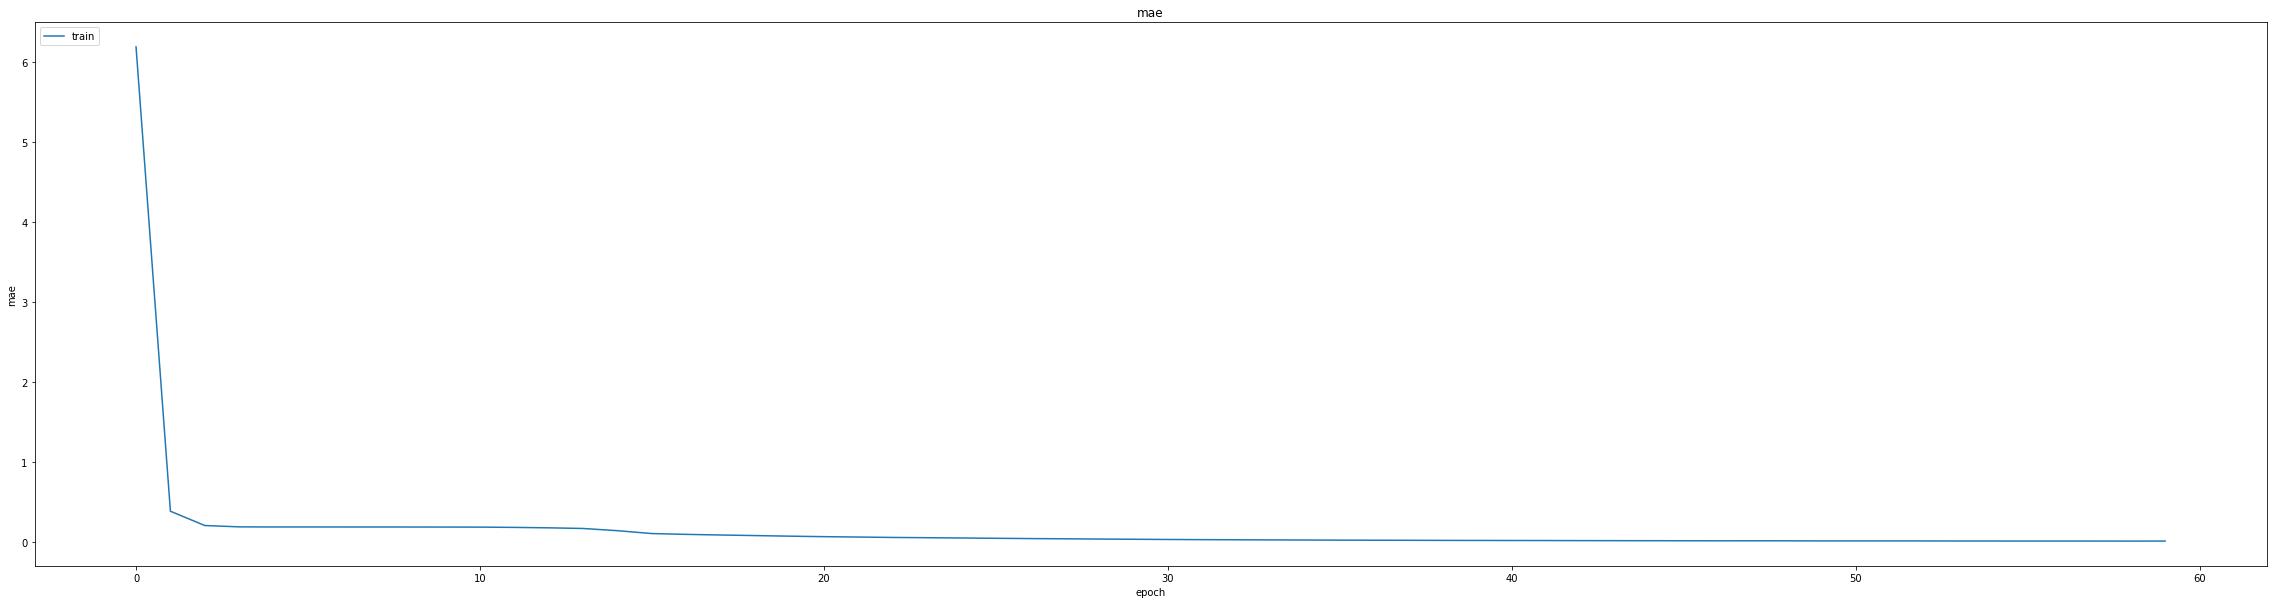

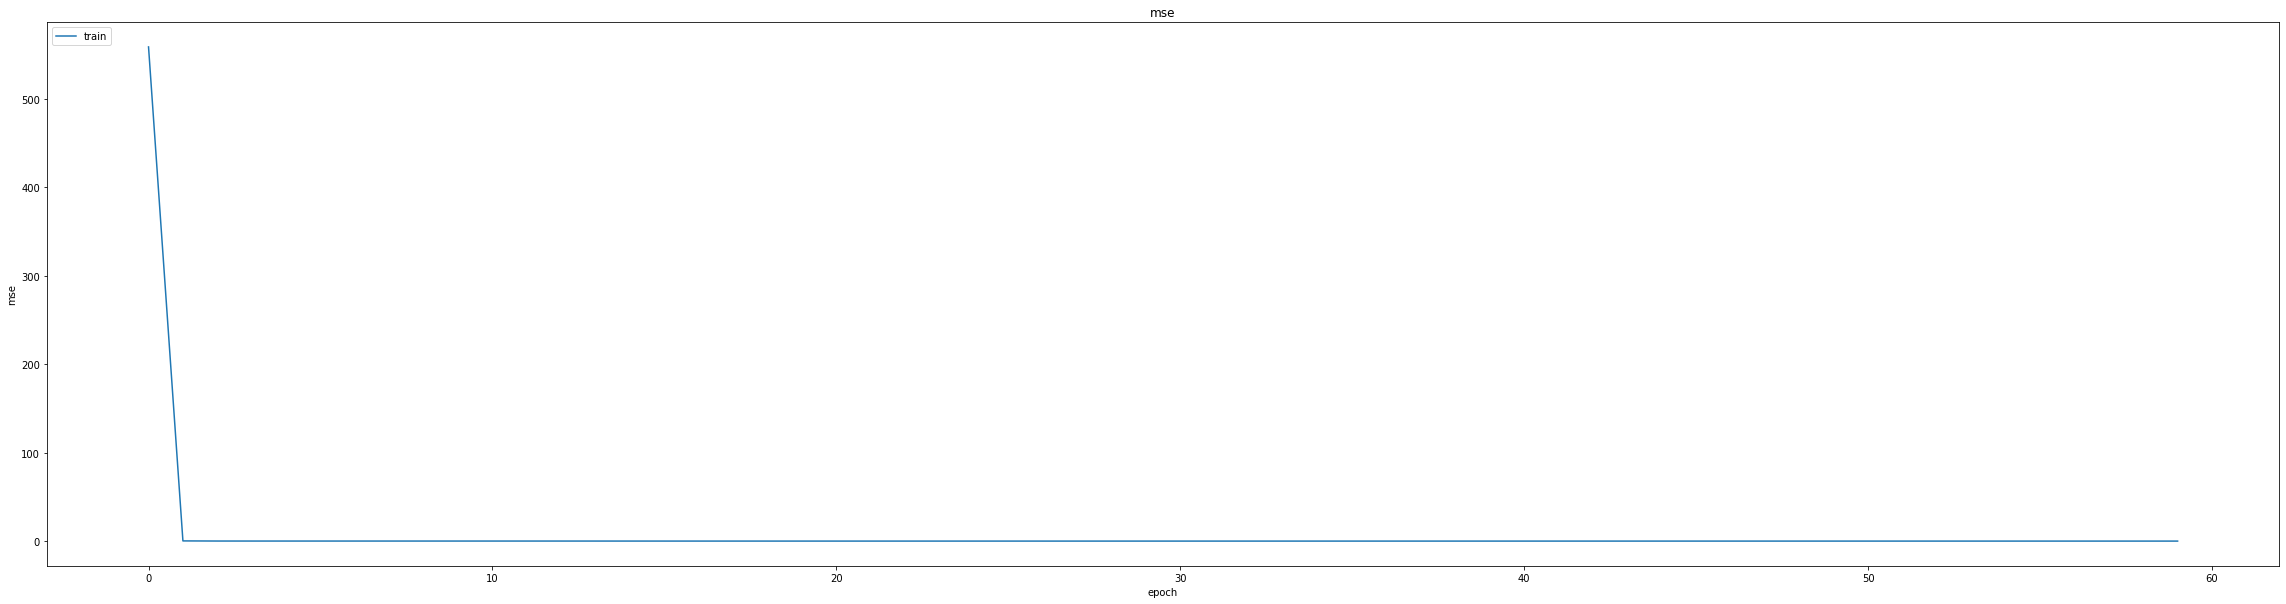

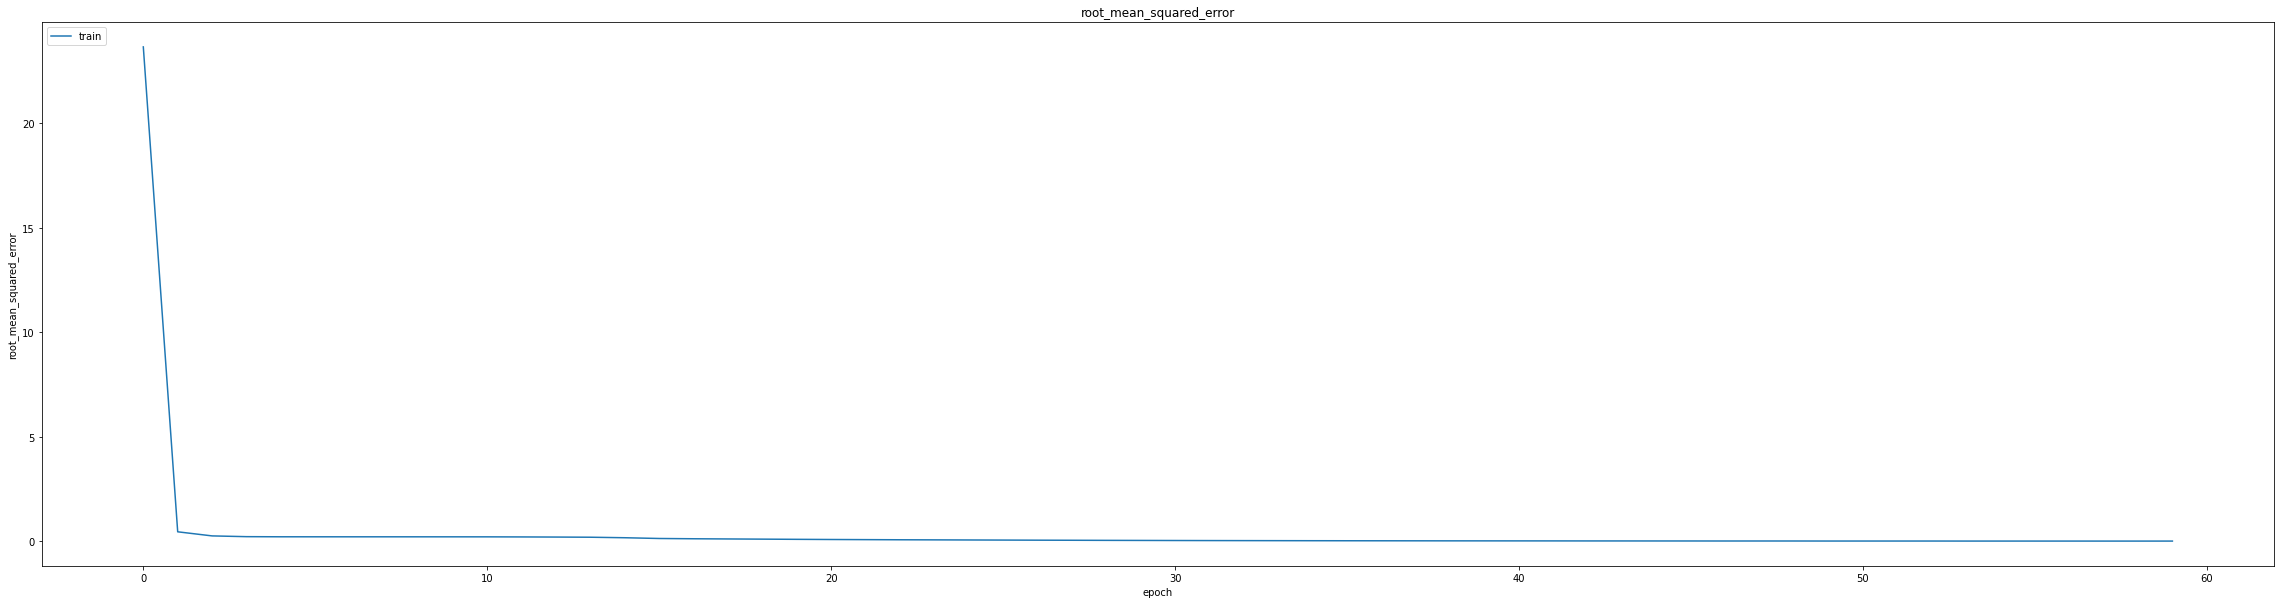

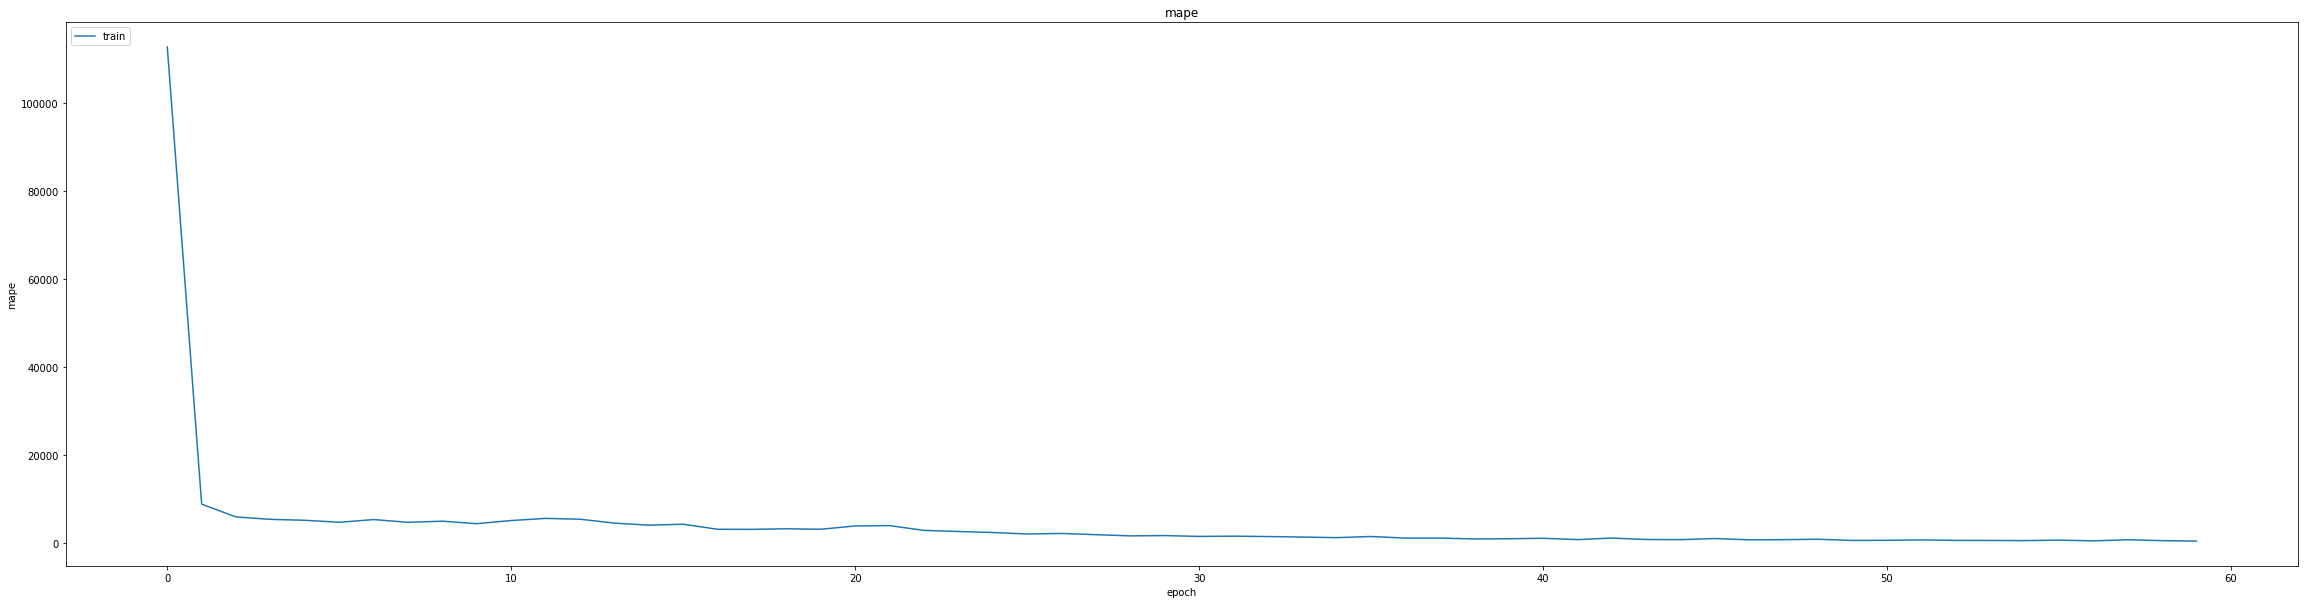

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006528639700263739
0.009940571151673794
1391/1391 [==============================] - 10s 6ms/step
0.9981215951636306


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0136 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 522.9370
Epoch 1: val_mse did not improve from 0.00010
347/347 [==============================] - 17s 27ms/step - loss: 0.0012 - mae: 0.0136 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 520.0104 - val_loss: 2.5650e-04 - val_mae: 0.0140 - val_mse: 2.5650e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 1525.1095 - lr: 0.0010
Epoch 2/20
346/347 [============================>.] - ETA: 0s - loss: 5.0847e-05 - mae: 0.0054 - mse: 5.0847e-05 - root_mean_squared_error: 0.0071 - mape: 544.9011
Epoch 2: val_mse did not improve from 0.00010
347/347 [==============================] - 7s 22ms/step - loss: 5.0827e-05 - mae: 0.0054 - mse: 5.0827e-05 - root_mean_squared_error: 0.0071 - mape: 543.4195 - val_loss: 3.0083e-04 - val_mae: 0.0157 - val_mse: 3.0083e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 1389.1050 - lr: 0.0010
lr chan

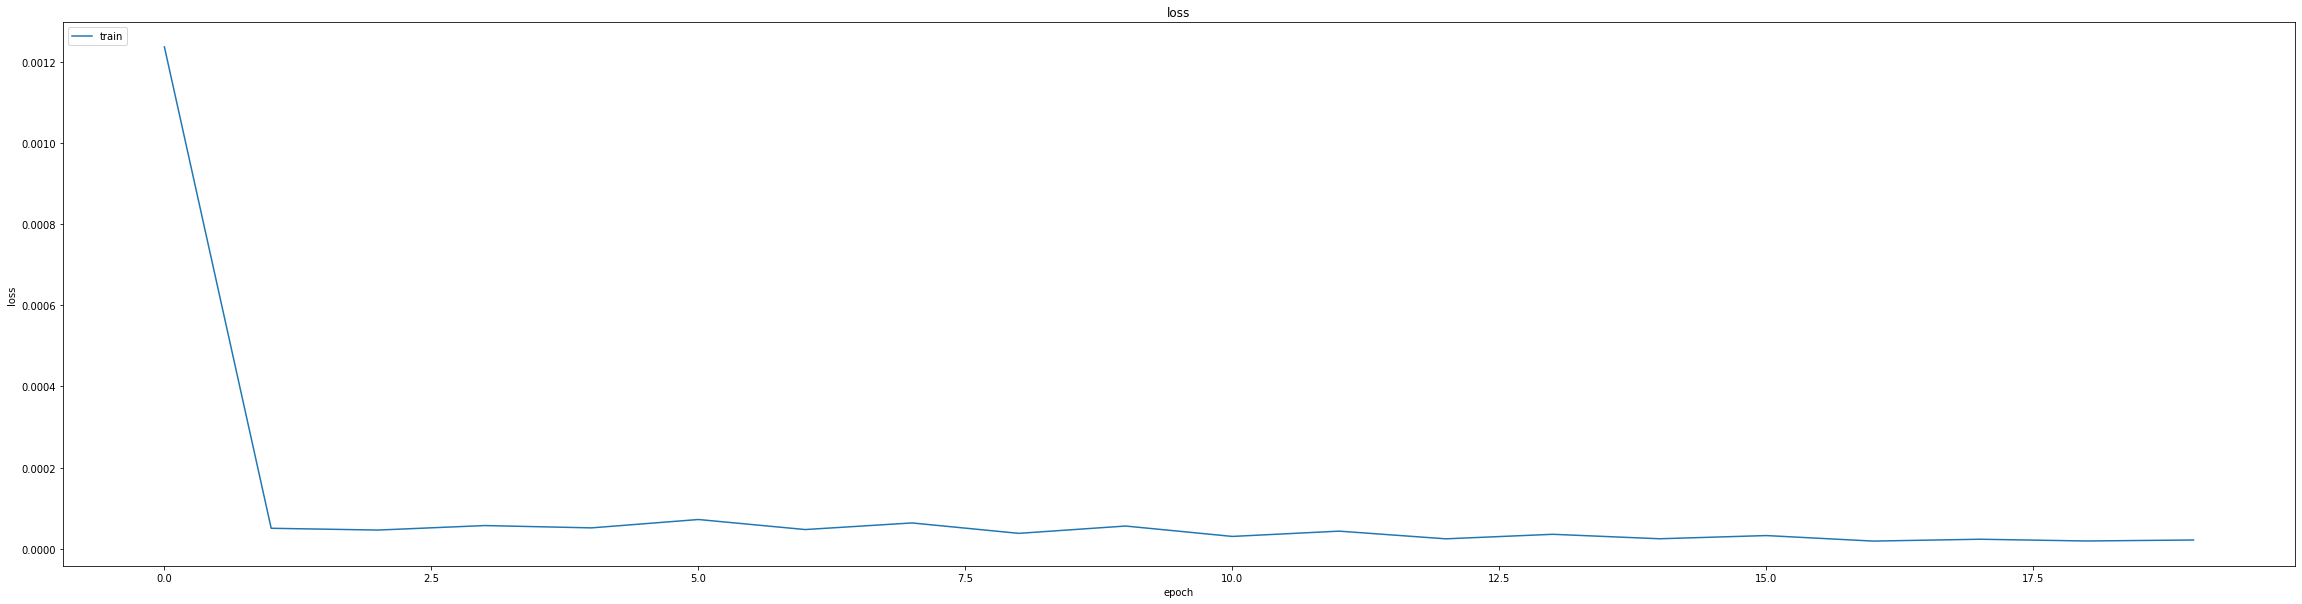

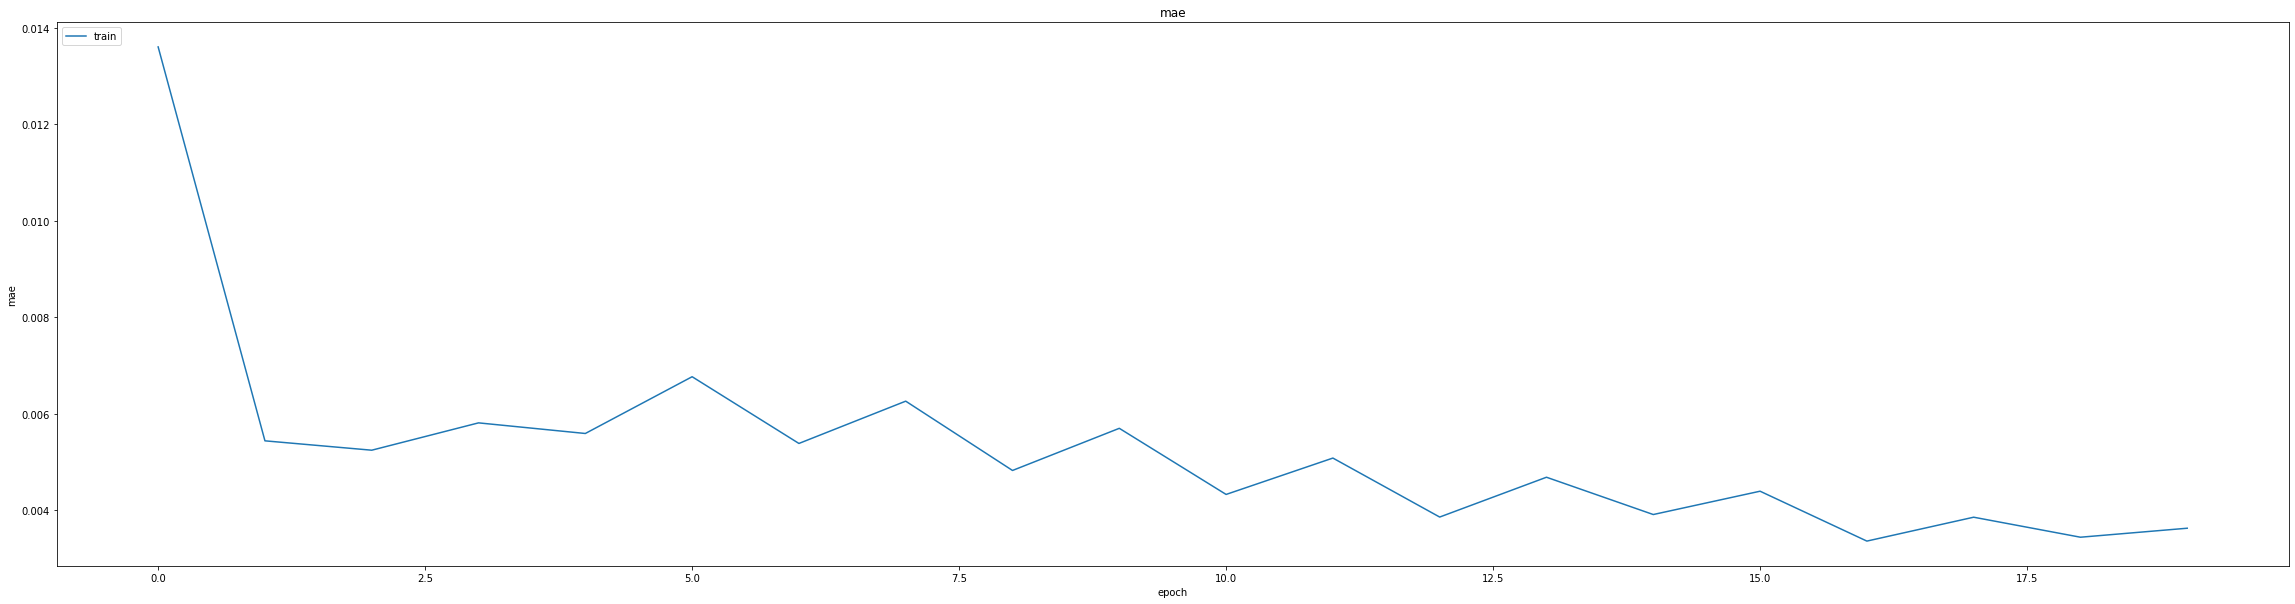

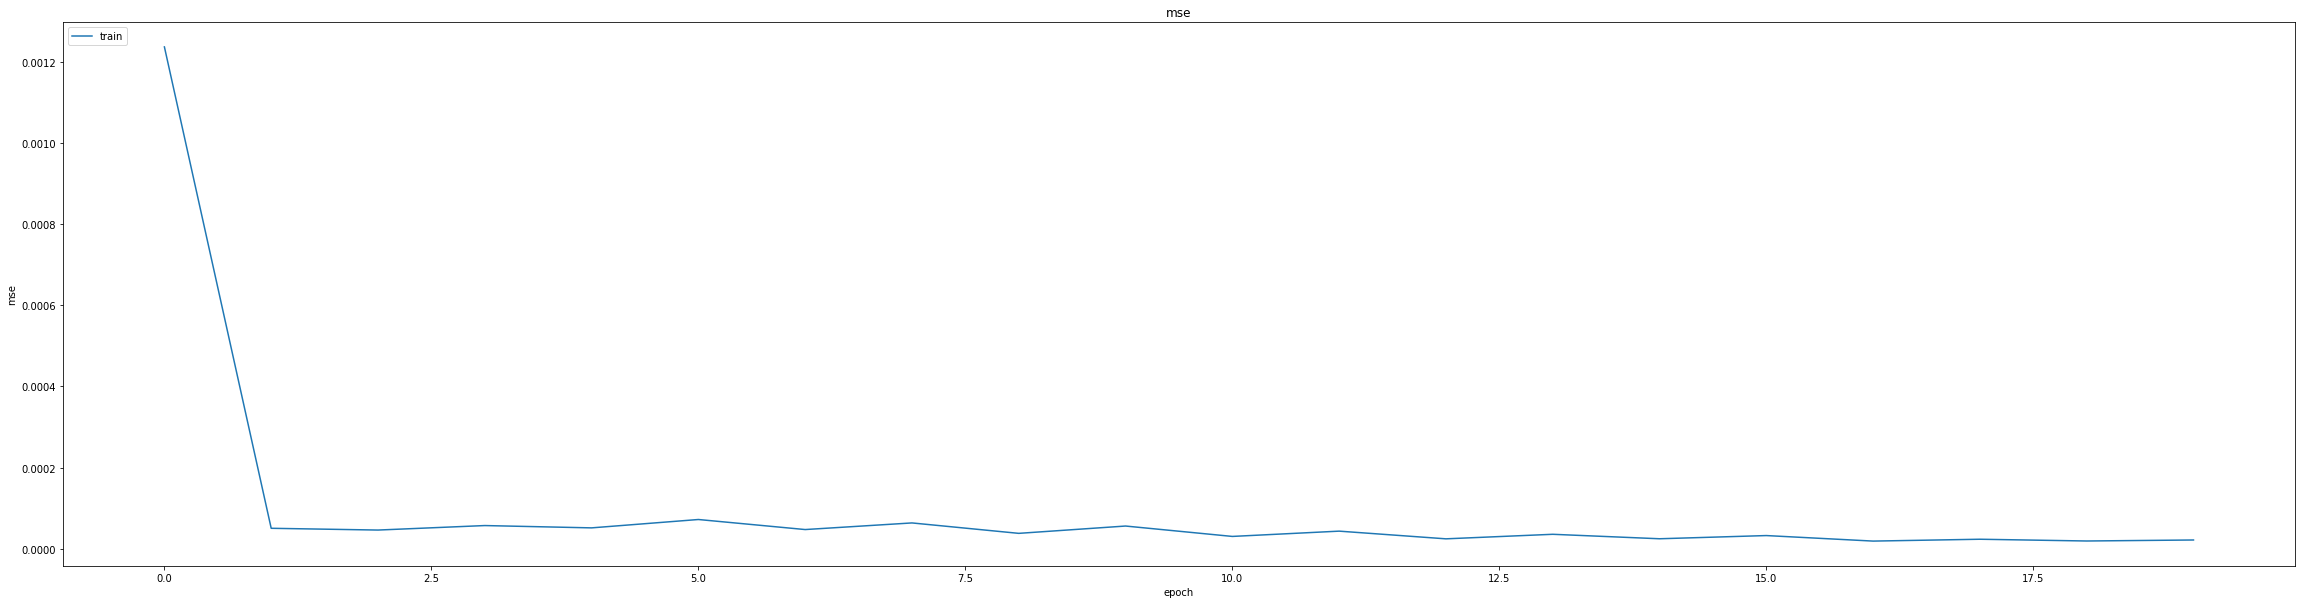

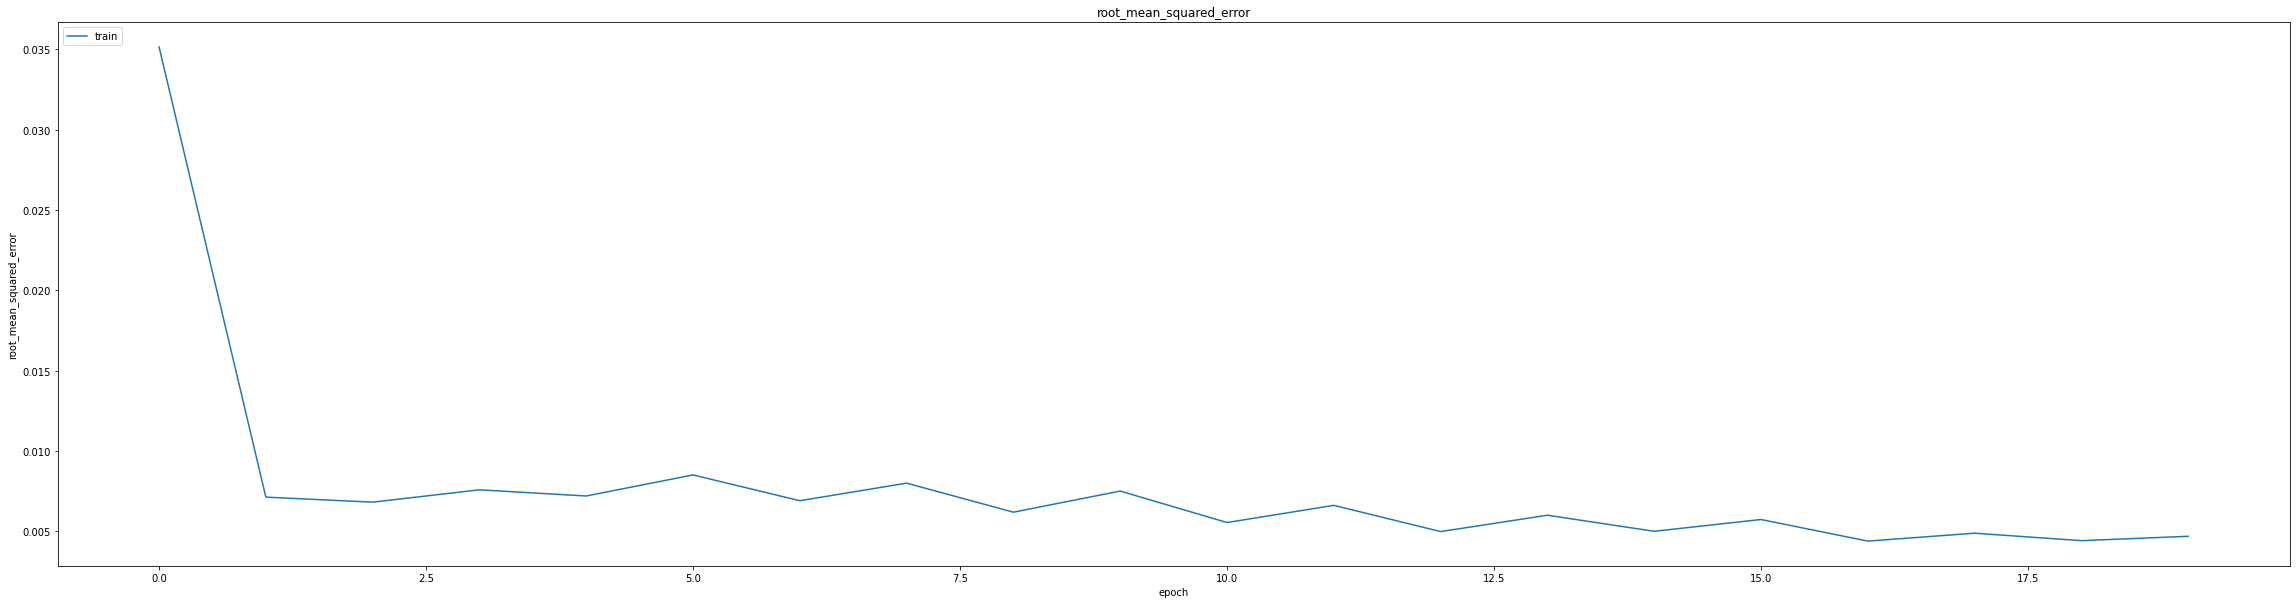

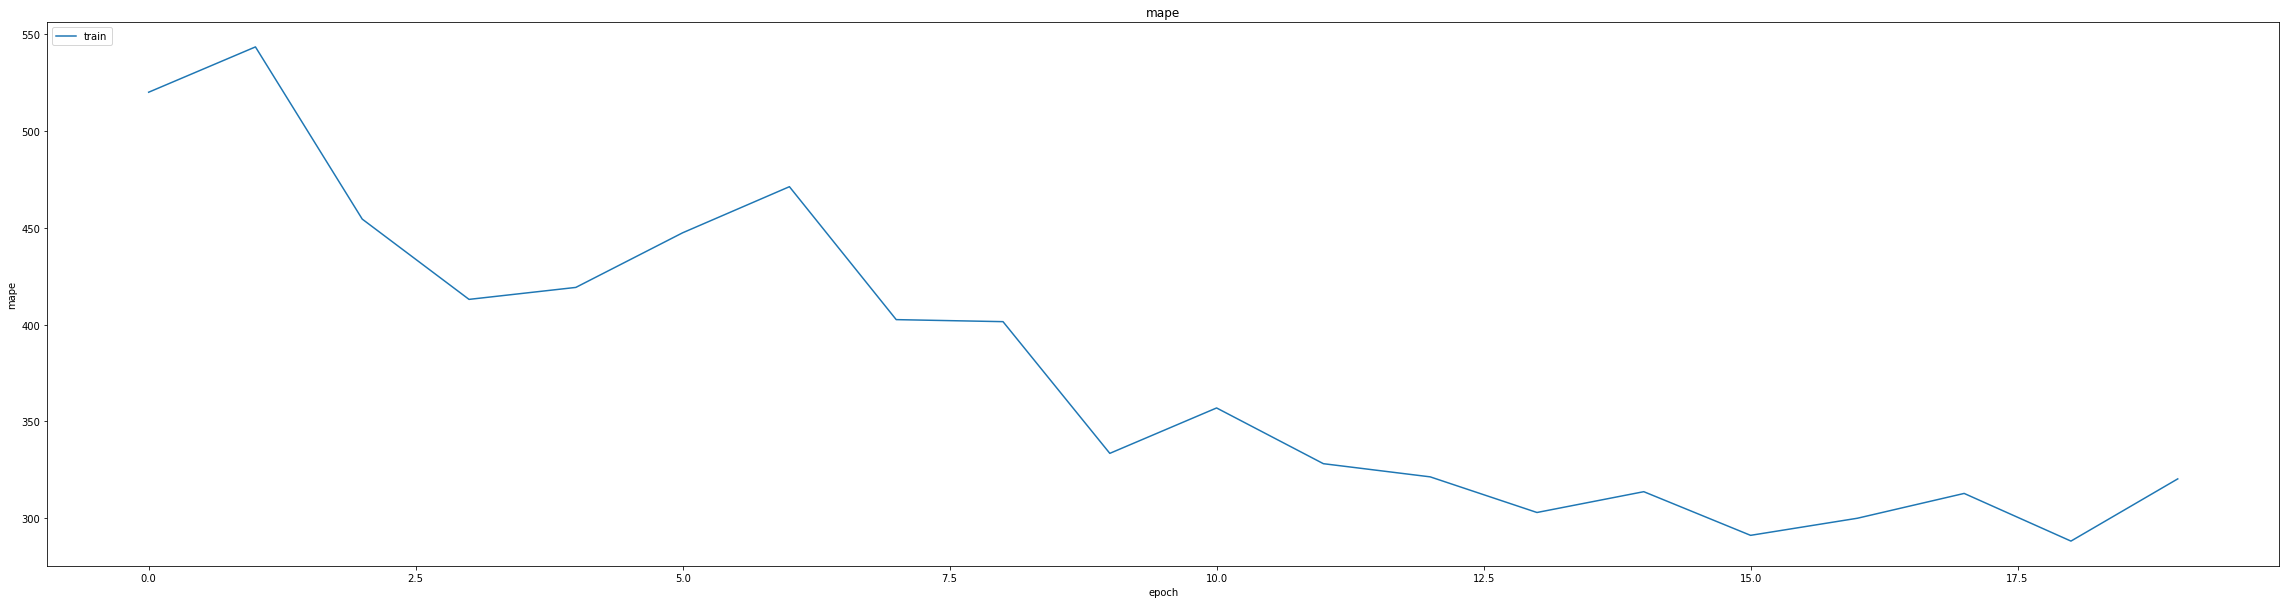

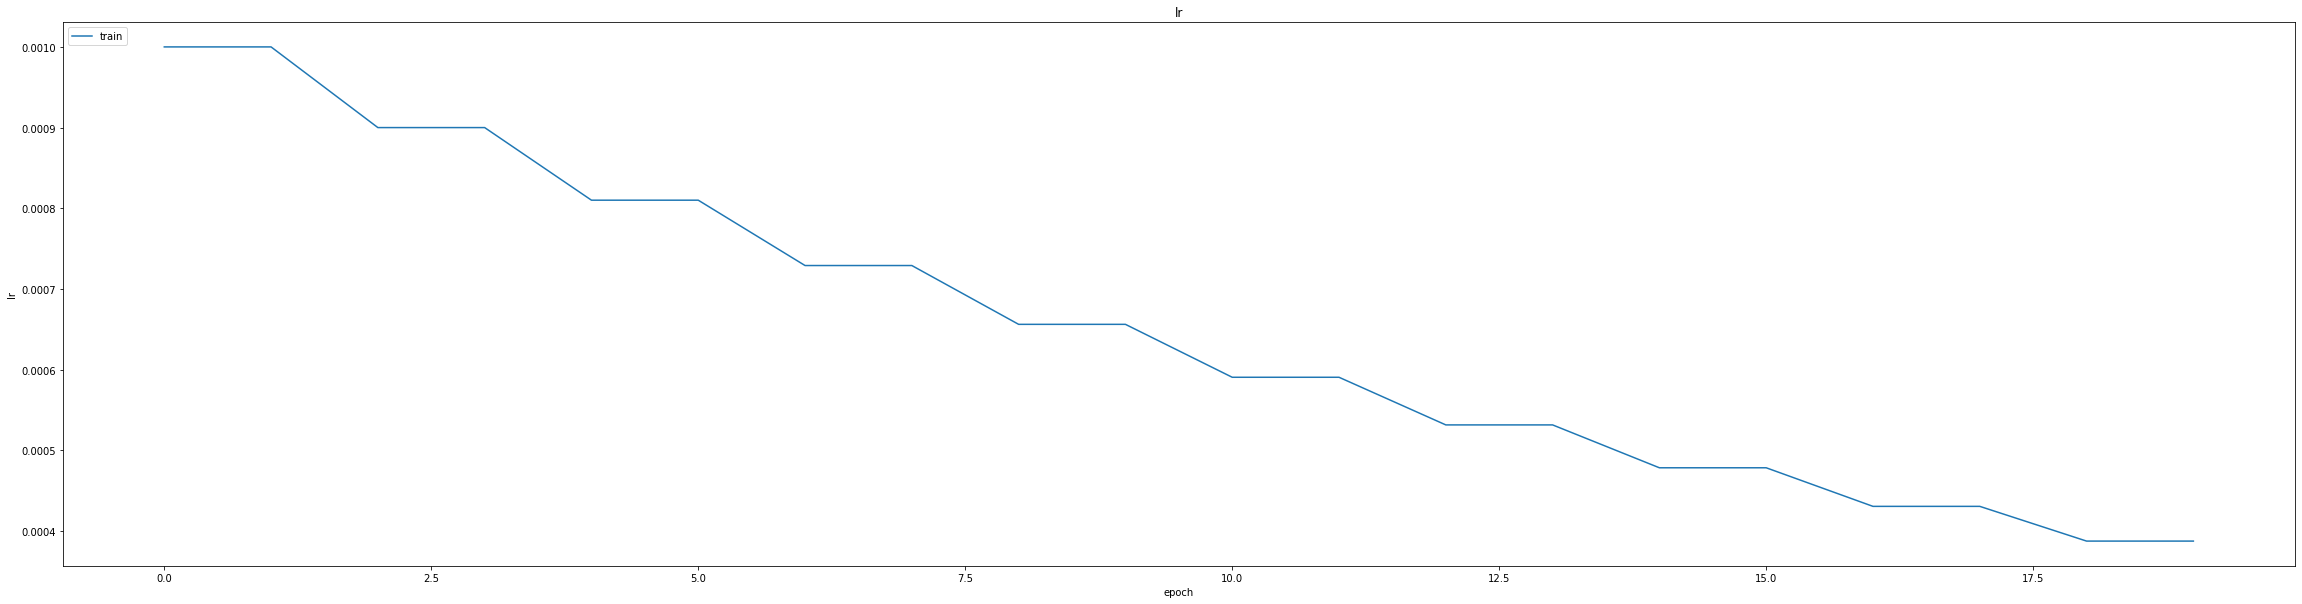

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009154834784567356
0.010379903949797153
1391/1391 [==============================] - 10s 6ms/step
0.9937517949102407


1391/1391 [==============================] - 8s 6ms/step


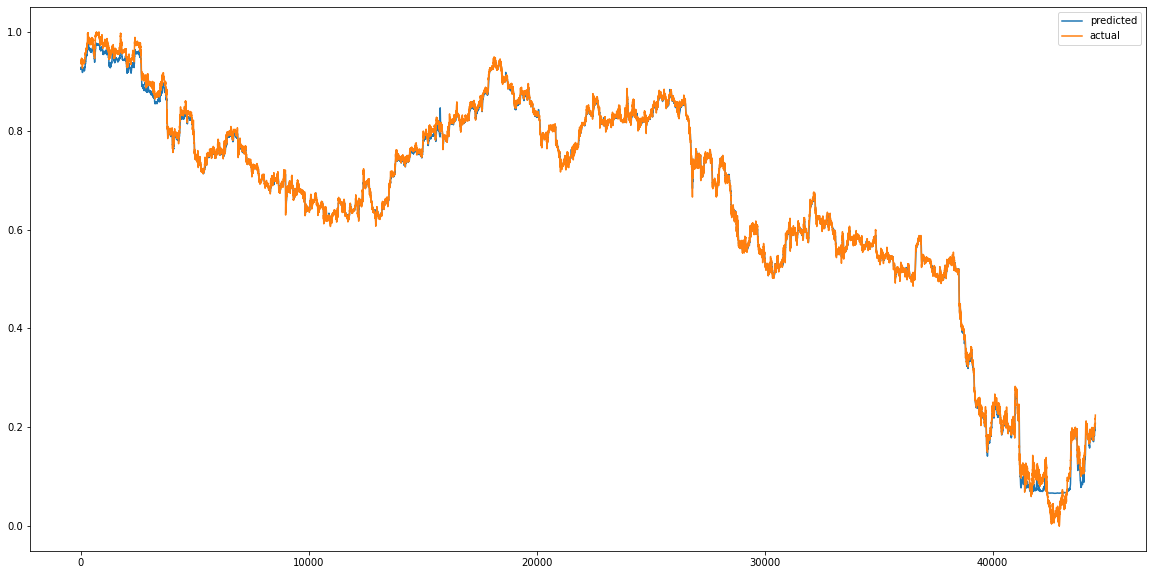

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


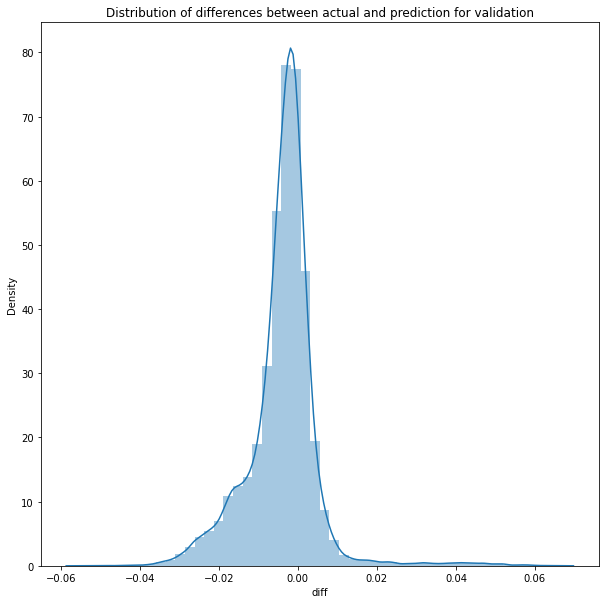

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 8s 6ms/step


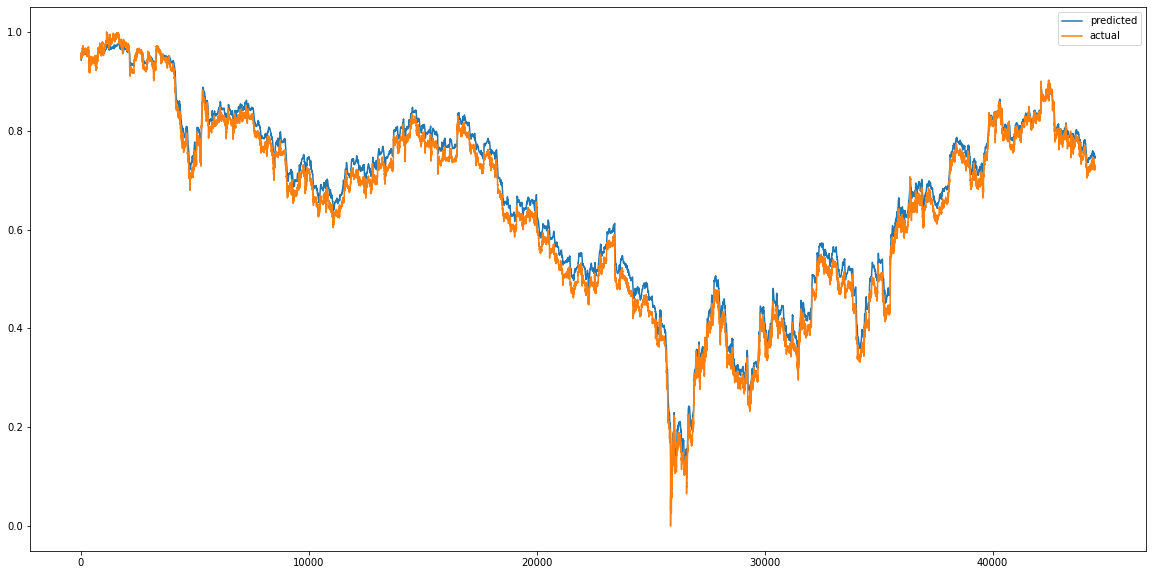

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


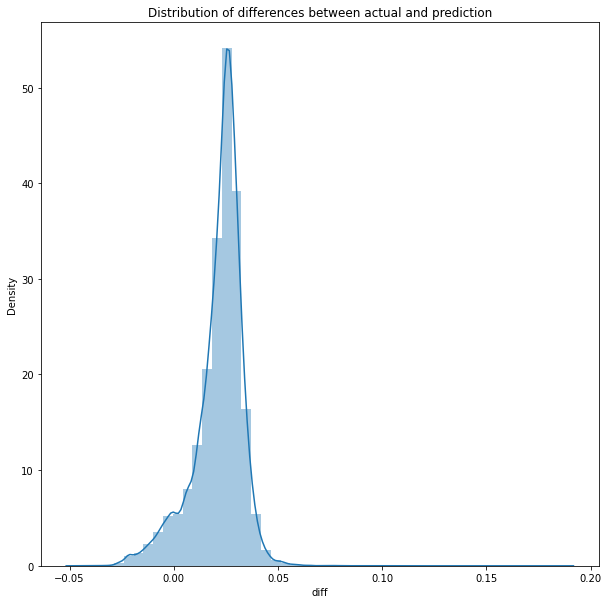

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0006083766644149565
RMSE :  0.024665292708884616
MAE :  0.022791662604558165
1391/1391 [==============================] - 9s 6ms/step
R2_Score  : 0.9841282963462765


count    44508.000000
mean         0.021634
std          0.011847
min         -0.047438
25%          0.017004
50%          0.024157
75%          0.028783
max          0.187571
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
344/347 [============================>.] - ETA: 0s - loss: 1513.3356 - mae: 21.3467 - mse: 1513.3356 - root_mean_squared_error: 38.9016 - mape: 60645.6758
Epoch 1: val_mse improved from inf to 16.81589, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 23s 54ms/step - loss: 1500.6359 - mae: 21.2009 - mse: 1500.6359 - root_mean_squared_error: 38.7380 - mape: 60137.4570 - val_loss: 16.8159 - val_mae: 4.0943 - val_mse: 16.8159 - val_root_mean_squared_error: 4.1007 - val_mape: 107964.1406
Epoch 2/60
344/347 [============================>.] - ETA: 0s - loss: 7.6673 - mae: 2.6787 - mse: 7.6673 - root_mean_squared_error: 2.7690 - mape: 23904.5488
Epoch 2: val_mse improved from 16.81589 to 3.04319, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 47ms/step - loss: 7.6287 - mae: 2.6709 - mse: 7.6287 - root_mean_squared_error: 2.7620 - mape: 23704.6621 - val_loss: 3.0432 - val_mae: 1.7293 - val_mse: 3.0432 - val_root_mean_squared_error: 1.7445 - val_mape: 54193.3203
Epoch 3/60
344/347 [============================>.] - ETA: 0s - loss: 1.8507 - mae: 1.3258 - mse: 1.8507 - root_mean_squared_error: 1.3604 - mape: 14164.9834
Epoch 3: val_mse improved from 3.04319 to 1.00746, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 50ms/step - loss: 1.8438 - mae: 1.3231 - mse: 1.8438 - root_mean_squared_error: 1.3579 - mape: 14046.4434 - val_loss: 1.0075 - val_mae: 0.9772 - val_mse: 1.0075 - val_root_mean_squared_error: 1.0037 - val_mape: 37091.8633
Epoch 4/60
347/347 [==============================] - ETA: 0s - loss: 0.6872 - mae: 0.7945 - mse: 0.6872 - root_mean_squared_error: 0.8289 - mape: 11546.3643
Epoch 4: val_mse improved from 1.00746 to 0.42955, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 0.6872 - mae: 0.7945 - mse: 0.6872 - root_mean_squared_error: 0.8289 - mape: 11546.3643 - val_loss: 0.4296 - val_mae: 0.6140 - val_mse: 0.4296 - val_root_mean_squared_error: 0.6554 - val_mape: 28833.8066
Epoch 5/60
347/347 [==============================] - ETA: 0s - loss: 0.1671 - mae: 0.3262 - mse: 0.1671 - root_mean_squared_error: 0.4088 - mape: 8990.3760
Epoch 5: val_mse improved from 0.42955 to 0.05269, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.1671 - mae: 0.3262 - mse: 0.1671 - root_mean_squared_error: 0.4088 - mape: 8990.3760 - val_loss: 0.0527 - val_mae: 0.1773 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 14693.7773
Epoch 6/60
344/347 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 4998.0806
Epoch 6: val_mse improved from 0.05269 to 0.05264, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0441 - mae: 0.1817 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 4955.9927 - val_loss: 0.0526 - val_mae: 0.1767 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 14770.1396
Epoch 7/60
345/347 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 5042.5347
Epoch 7: val_mse did not improve from 0.05264
347/347 [==============================] - 6s 17ms/step - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 5014.5269 - val_loss: 0.0527 - val_mae: 0.1775 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2296 - val_mape: 14675.0801
Epoch 8/60
344/347 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2100 - mape: 4830.9170
Epoch 8: val_mse did not improve from 0.05264
347/347 [==============================] - 6s 16ms/step - l

347/347 [==============================] - 16s 46ms/step - loss: 0.0440 - mae: 0.1817 - mse: 0.0440 - root_mean_squared_error: 0.2099 - mape: 4839.9058 - val_loss: 0.0526 - val_mae: 0.1762 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 14839.0156
Epoch 17/60
346/347 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1817 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 4952.9917
Epoch 17: val_mse did not improve from 0.05262
347/347 [==============================] - 6s 17ms/step - loss: 0.0441 - mae: 0.1817 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 4939.6094 - val_loss: 0.0527 - val_mae: 0.1773 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 14701.1973
Epoch 18/60
347/347 [==============================] - ETA: 0s - loss: 0.0440 - mae: 0.1817 - mse: 0.0440 - root_mean_squared_error: 0.2099 - mape: 4786.3789
Epoch 18: val_mse did not improve from 0.05262
347/347 [==============================] - 6s 17ms/step

347/347 [==============================] - 17s 48ms/step - loss: 0.0440 - mae: 0.1816 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 5117.5234 - val_loss: 0.0526 - val_mae: 0.1757 - val_mse: 0.0526 - val_root_mean_squared_error: 0.2294 - val_mape: 14901.5146
Epoch 27/60
345/347 [============================>.] - ETA: 0s - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 4992.9805
Epoch 27: val_mse did not improve from 0.05261
347/347 [==============================] - 6s 16ms/step - loss: 0.0441 - mae: 0.1818 - mse: 0.0441 - root_mean_squared_error: 0.2099 - mape: 4965.2744 - val_loss: 0.0527 - val_mae: 0.1768 - val_mse: 0.0527 - val_root_mean_squared_error: 0.2295 - val_mape: 14750.7373
Epoch 28/60
345/347 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1817 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 4930.7153
Epoch 28: val_mse did not improve from 0.05261
347/347 [==============================] - 6s 16ms/step

347/347 [==============================] - 17s 48ms/step - loss: 0.0438 - mae: 0.1813 - mse: 0.0438 - root_mean_squared_error: 0.2092 - mape: 5011.7456 - val_loss: 0.0521 - val_mae: 0.1725 - val_mse: 0.0521 - val_root_mean_squared_error: 0.2282 - val_mape: 15140.5693
Epoch 52/60
347/347 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.0884 - mse: 0.0167 - root_mean_squared_error: 0.1294 - mape: 2636.3208
Epoch 52: val_mse improved from 0.05209 to 0.00230, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 0.0167 - mae: 0.0884 - mse: 0.0167 - root_mean_squared_error: 0.1294 - mape: 2636.3208 - val_loss: 0.0023 - val_mae: 0.0239 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0480 - val_mape: 5824.8369
Epoch 53/60
344/347 [============================>.] - ETA: 0s - loss: 9.0971e-04 - mae: 0.0218 - mse: 9.0971e-04 - root_mean_squared_error: 0.0302 - mape: 1814.1891
Epoch 53: val_mse improved from 0.00230 to 0.00098, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 9.0837e-04 - mae: 0.0218 - mse: 9.0837e-04 - root_mean_squared_error: 0.0301 - mape: 1798.8390 - val_loss: 9.7816e-04 - val_mae: 0.0157 - val_mse: 9.7816e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 4392.8135
Epoch 54/60
347/347 [==============================] - ETA: 0s - loss: 6.0560e-04 - mae: 0.0182 - mse: 6.0560e-04 - root_mean_squared_error: 0.0246 - mape: 1412.7729
Epoch 54: val_mse improved from 0.00098 to 0.00067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 6.0560e-04 - mae: 0.0182 - mse: 6.0560e-04 - root_mean_squared_error: 0.0246 - mape: 1412.7729 - val_loss: 6.7433e-04 - val_mae: 0.0134 - val_mse: 6.7433e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 3844.7205
Epoch 55/60
345/347 [============================>.] - ETA: 0s - loss: 4.6162e-04 - mae: 0.0160 - mse: 4.6162e-04 - root_mean_squared_error: 0.0215 - mape: 1365.3315
Epoch 55: val_mse improved from 0.00067 to 0.00053, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 48ms/step - loss: 4.6114e-04 - mae: 0.0160 - mse: 4.6114e-04 - root_mean_squared_error: 0.0215 - mape: 1357.6938 - val_loss: 5.3284e-04 - val_mae: 0.0136 - val_mse: 5.3284e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 3464.4788
Epoch 56/60
347/347 [==============================] - ETA: 0s - loss: 3.8676e-04 - mae: 0.0147 - mse: 3.8676e-04 - root_mean_squared_error: 0.0197 - mape: 1091.2698
Epoch 56: val_mse improved from 0.00053 to 0.00041, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 16s 46ms/step - loss: 3.8676e-04 - mae: 0.0147 - mse: 3.8676e-04 - root_mean_squared_error: 0.0197 - mape: 1091.2698 - val_loss: 4.1256e-04 - val_mae: 0.0115 - val_mse: 4.1256e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 3182.4827
Epoch 57/60
344/347 [============================>.] - ETA: 0s - loss: 3.1905e-04 - mae: 0.0134 - mse: 3.1905e-04 - root_mean_squared_error: 0.0179 - mape: 1036.5796
Epoch 57: val_mse improved from 0.00041 to 0.00036, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 3.1865e-04 - mae: 0.0134 - mse: 3.1865e-04 - root_mean_squared_error: 0.0179 - mape: 1027.8031 - val_loss: 3.5902e-04 - val_mae: 0.0111 - val_mse: 3.5902e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 2977.4116
Epoch 58/60
344/347 [============================>.] - ETA: 0s - loss: 2.7348e-04 - mae: 0.0125 - mse: 2.7348e-04 - root_mean_squared_error: 0.0165 - mape: 1002.0391
Epoch 58: val_mse did not improve from 0.00036
347/347 [==============================] - 6s 17ms/step - loss: 2.7344e-04 - mae: 0.0125 - mse: 2.7344e-04 - root_mean_squared_error: 0.0165 - mape: 993.5634 - val_loss: 4.1112e-04 - val_mae: 0.0146 - val_mse: 4.1112e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 2820.0371
Epoch 59/60
346/347 [============================>.] - ETA: 0s - loss: 2.4361e-04 - mae: 0.0118 - mse: 2.4361e-04 - root_mean_squared_error: 0.0156 - mape: 953.2681
Epoch 59: val_mse improved from 0.00036 to 0.00034, saving

347/347 [==============================] - 16s 46ms/step - loss: 2.4360e-04 - mae: 0.0118 - mse: 2.4360e-04 - root_mean_squared_error: 0.0156 - mape: 950.6846 - val_loss: 3.3541e-04 - val_mae: 0.0129 - val_mse: 3.3541e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 2658.5488
Epoch 60/60
347/347 [==============================] - ETA: 0s - loss: 2.1716e-04 - mae: 0.0112 - mse: 2.1716e-04 - root_mean_squared_error: 0.0147 - mape: 875.1887
Epoch 60: val_mse improved from 0.00034 to 0.00023, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 17s 49ms/step - loss: 2.1716e-04 - mae: 0.0112 - mse: 2.1716e-04 - root_mean_squared_error: 0.0147 - mape: 875.1887 - val_loss: 2.3484e-04 - val_mae: 0.0091 - val_mse: 2.3484e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 2525.5535


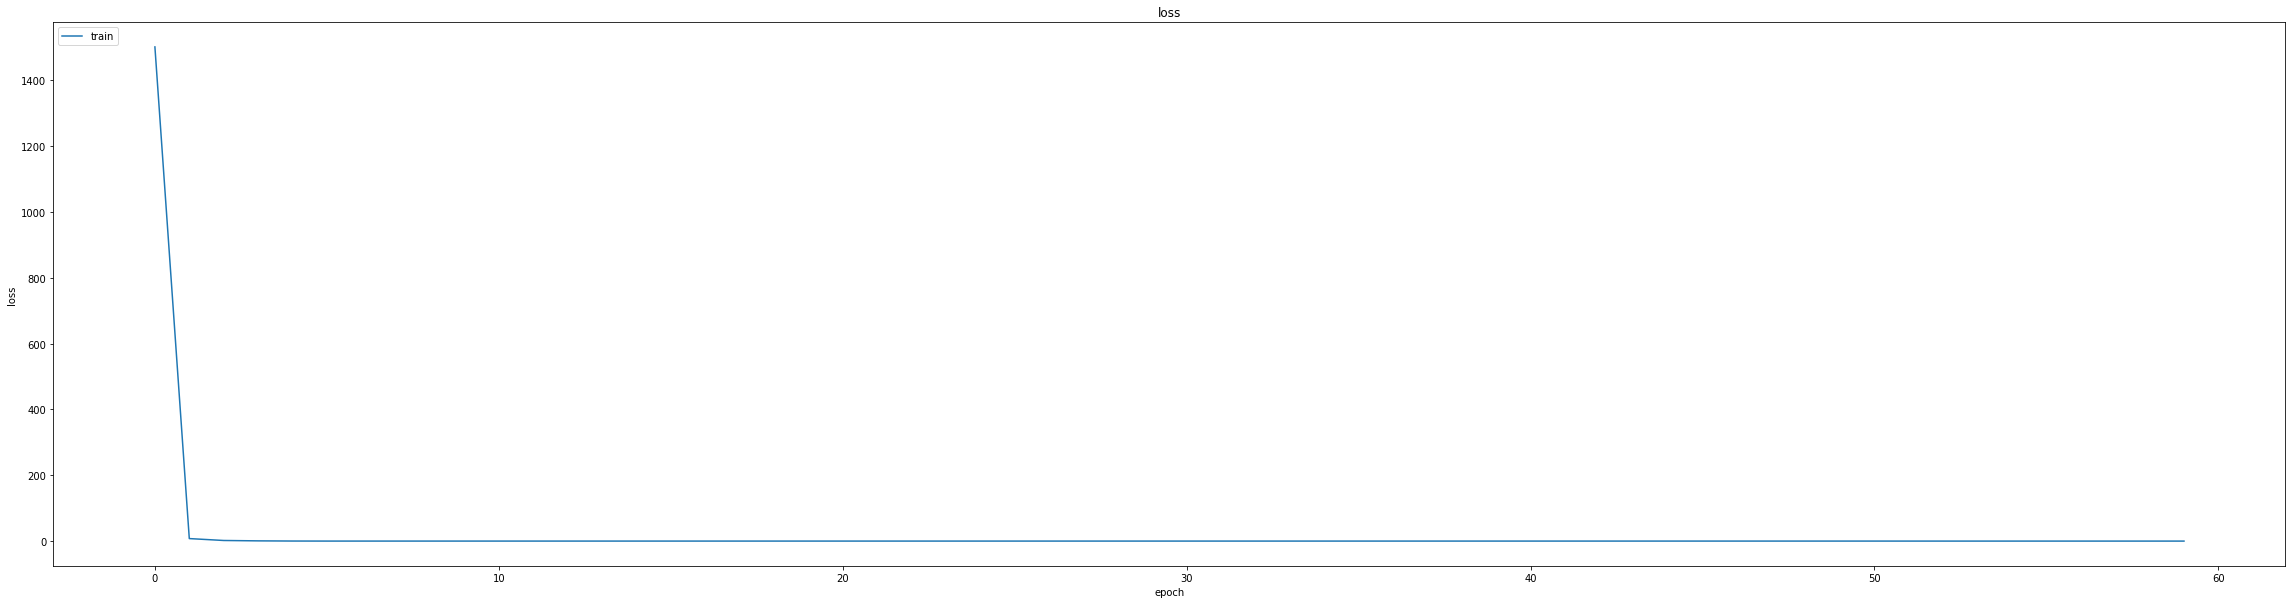

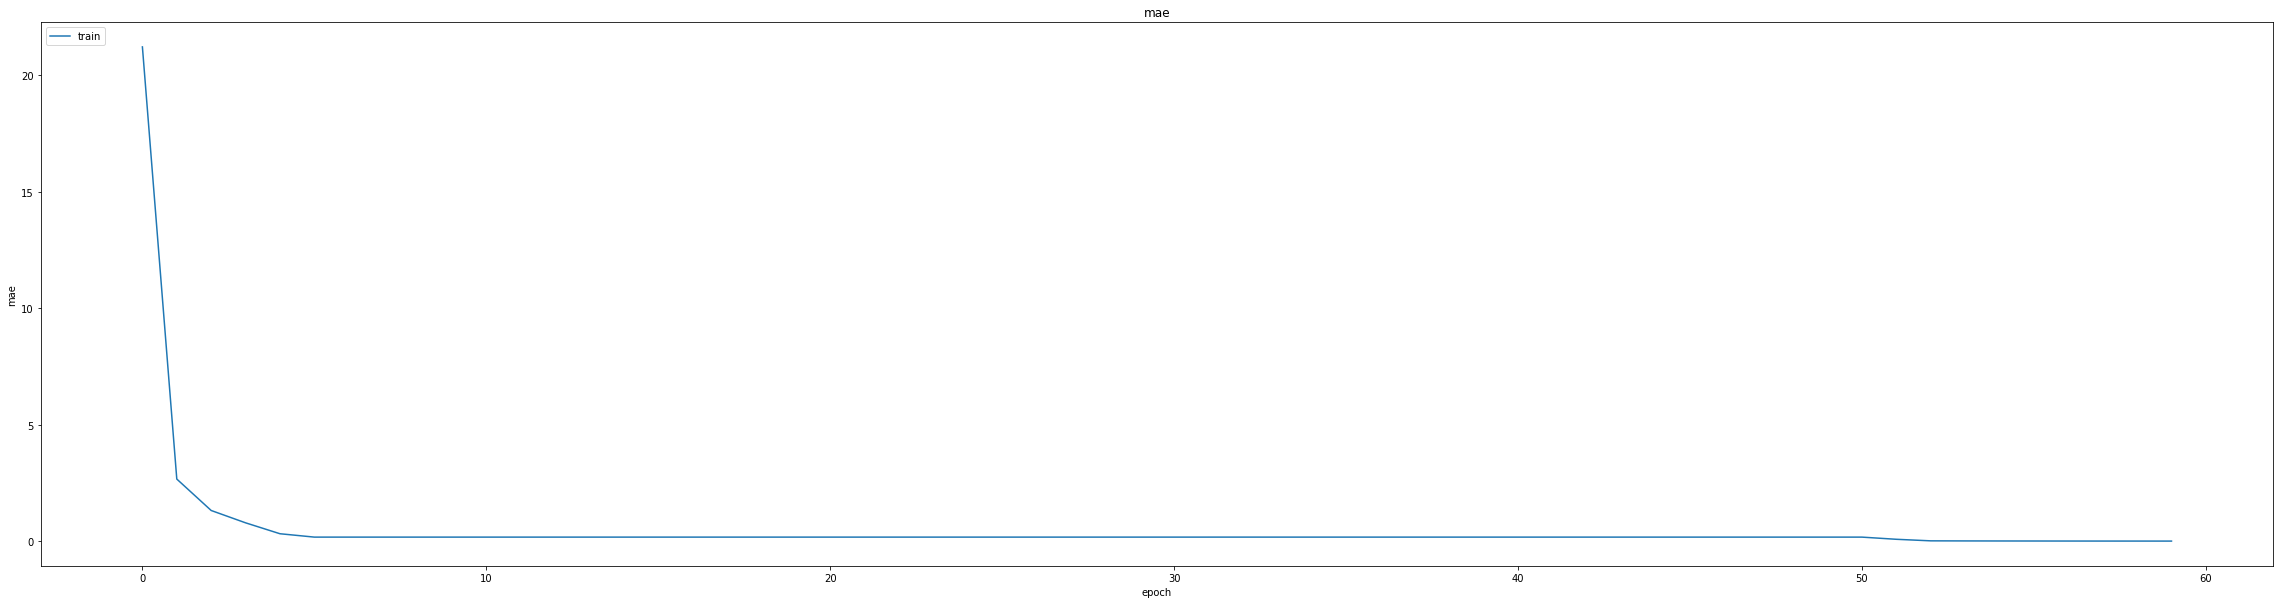

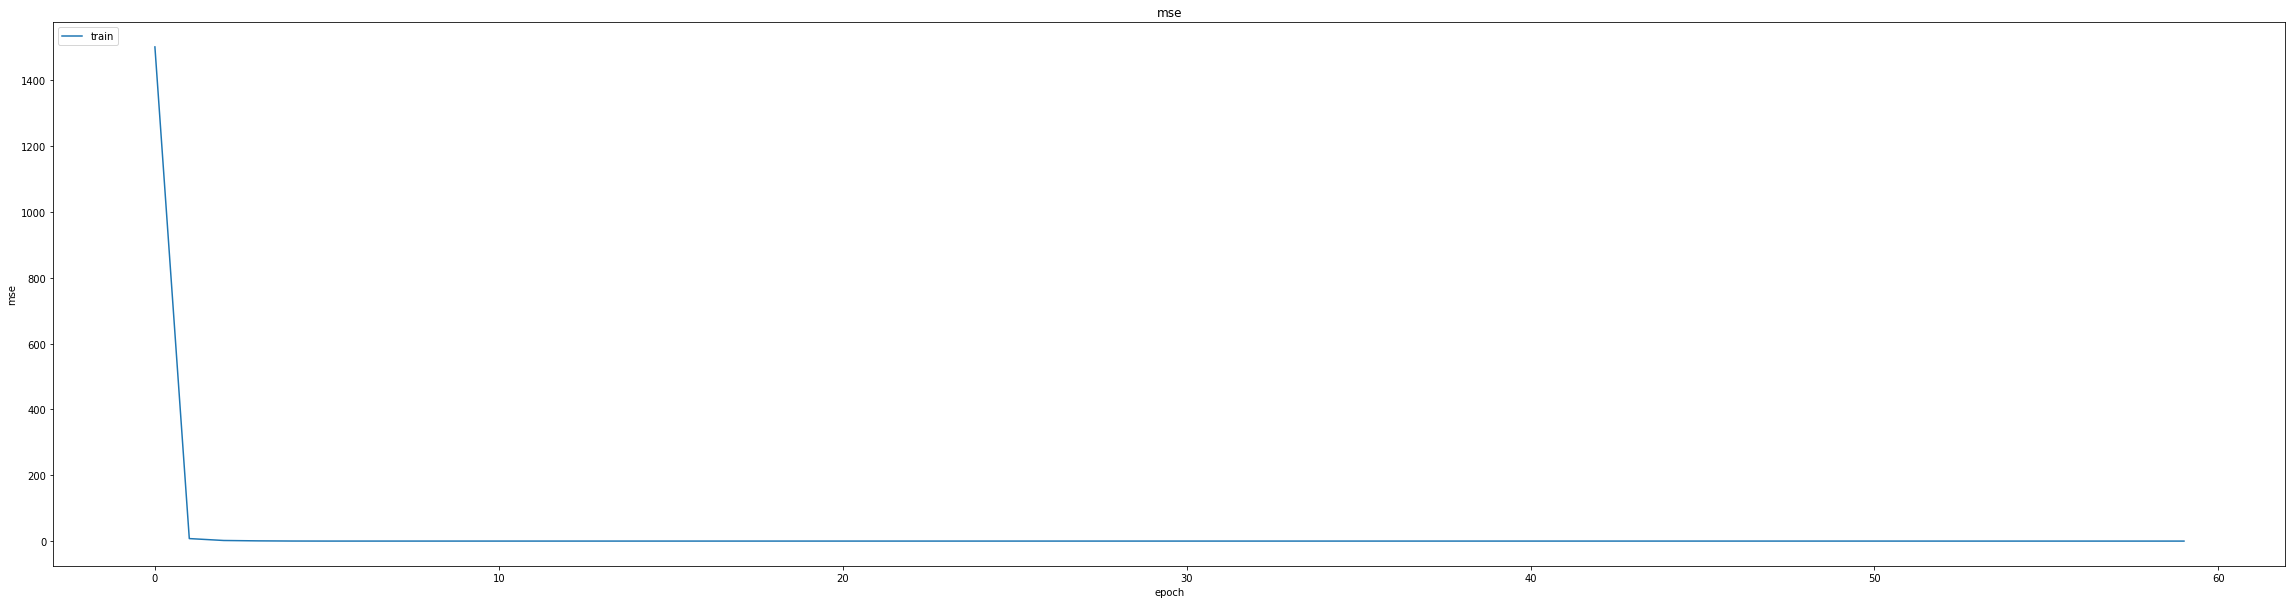

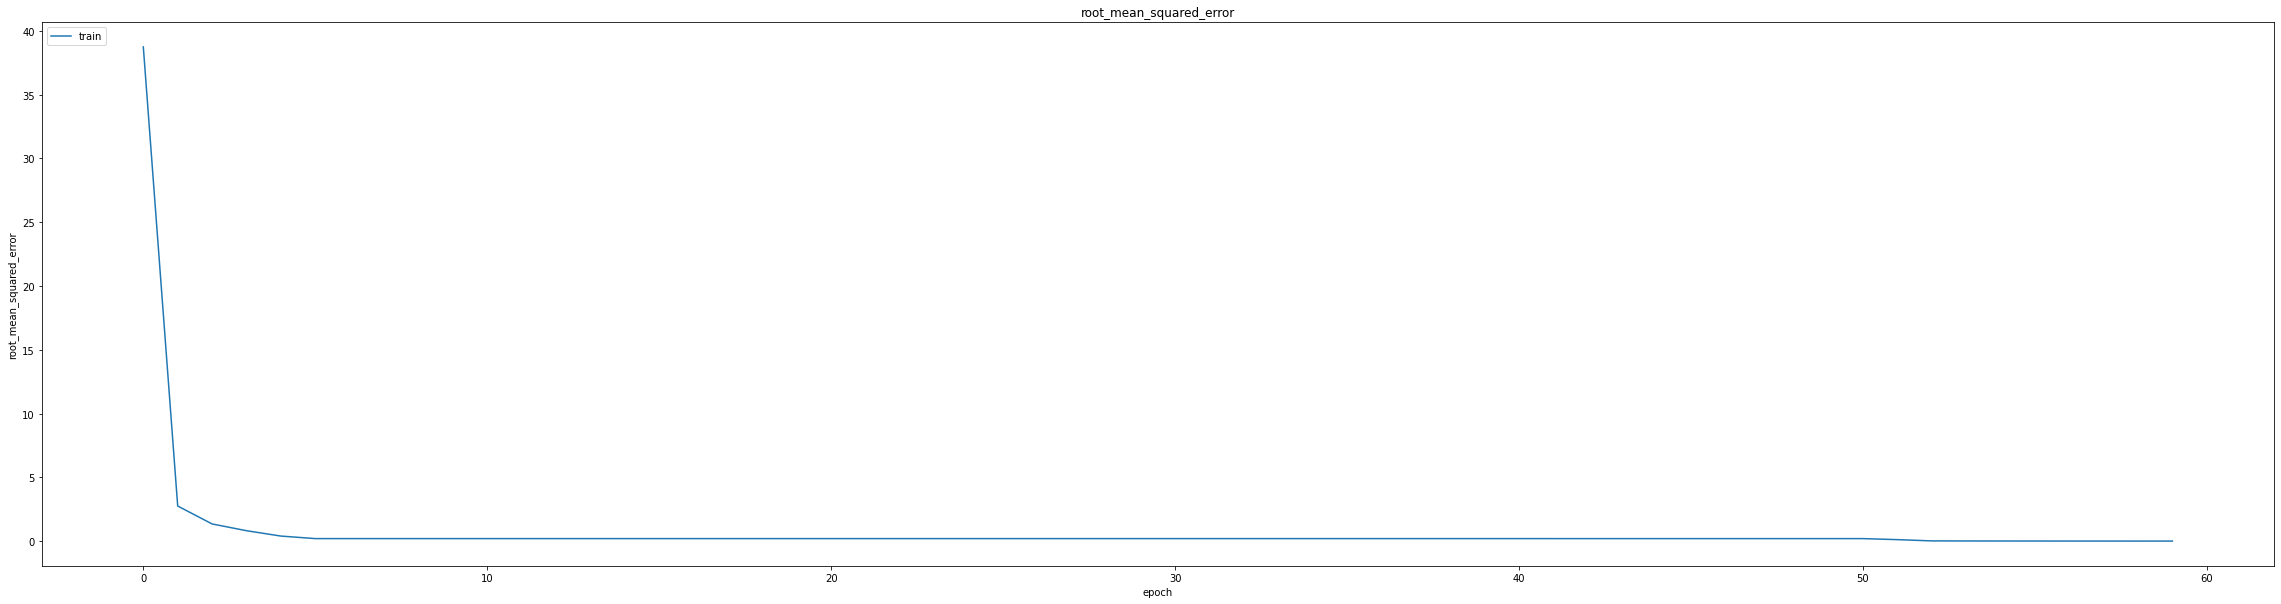

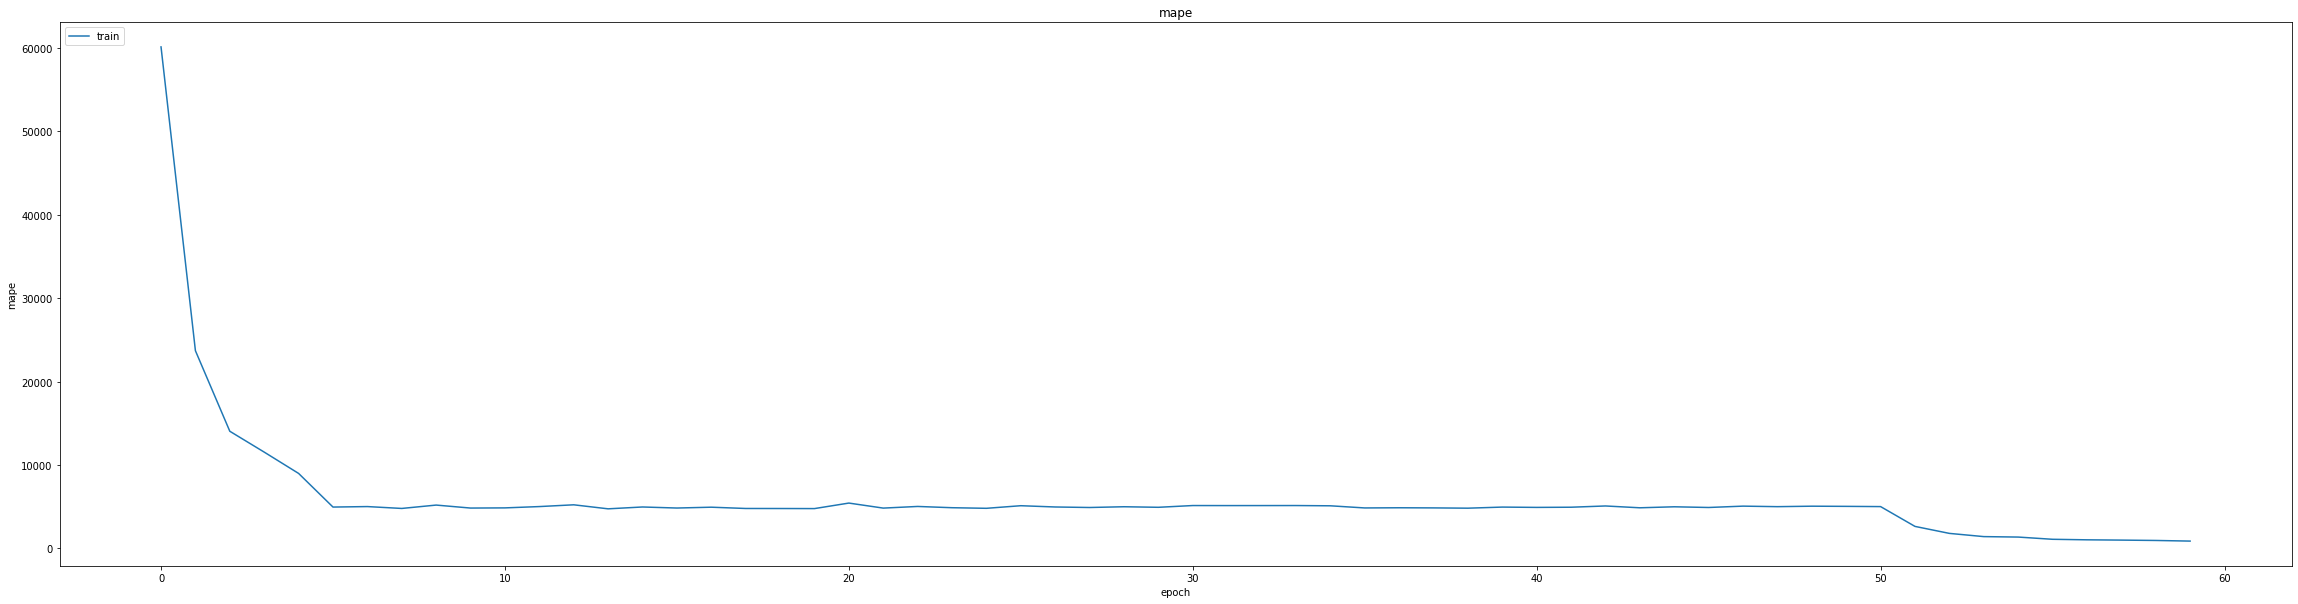

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009108453057706356
0.01532448548823595
1391/1391 [==============================] - 6s 4ms/step
0.9955358544657007


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/347 [============================>.] - ETA: 0s - loss: 8.1351e-04 - mae: 0.0157 - mse: 8.1351e-04 - root_mean_squared_error: 0.0285 - mape: 1413.6714
Epoch 1: val_mse improved from 0.00023 to 0.00023, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)


347/347 [==============================] - 22s 53ms/step - loss: 8.0999e-04 - mae: 0.0156 - mse: 8.0999e-04 - root_mean_squared_error: 0.0285 - mape: 1405.7590 - val_loss: 2.2788e-04 - val_mae: 0.0093 - val_mse: 2.2788e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 2414.2422 - lr: 0.0010
Epoch 2/20
344/347 [============================>.] - ETA: 0s - loss: 1.5549e-04 - mae: 0.0095 - mse: 1.5549e-04 - root_mean_squared_error: 0.0125 - mape: 734.6658
Epoch 2: val_mse did not improve from 0.00023
347/347 [==============================] - 6s 17ms/step - loss: 1.5519e-04 - mae: 0.0095 - mse: 1.5519e-04 - root_mean_squared_error: 0.0125 - mape: 728.4457 - val_loss: 2.5224e-04 - val_mae: 0.0117 - val_mse: 2.5224e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 2124.1379 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
344/347 [============================>.] - ETA: 0s - loss: 1.2389e-04 - mae: 0.0084 - mse: 1.2389e-04 - root_mean_squared_error: 0.0111 - mape: 691.3318


347/347 [==============================] - 17s 48ms/step - loss: 1.2372e-04 - mae: 0.0084 - mse: 1.2372e-04 - root_mean_squared_error: 0.0111 - mape: 685.4793 - val_loss: 2.0820e-04 - val_mae: 0.0105 - val_mse: 2.0820e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 1935.0360 - lr: 9.0000e-04
Epoch 4/20
344/347 [============================>.] - ETA: 0s - loss: 1.1140e-04 - mae: 0.0080 - mse: 1.1140e-04 - root_mean_squared_error: 0.0106 - mape: 639.9249
Epoch 4: val_mse did not improve from 0.00021
347/347 [==============================] - 6s 17ms/step - loss: 1.1127e-04 - mae: 0.0080 - mse: 1.1127e-04 - root_mean_squared_error: 0.0105 - mape: 634.5082 - val_loss: 3.4995e-04 - val_mae: 0.0163 - val_mse: 3.4995e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 1764.9800 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/347 [============================>.] - ETA: 0s - loss: 1.0268e-04 - mae: 0.0077 - mse: 1.0268e-04 - root_mean_squared_error: 0.0101 - mape: 56

347/347 [==============================] - 17s 48ms/step - loss: 9.4008e-05 - mae: 0.0074 - mse: 9.4008e-05 - root_mean_squared_error: 0.0097 - mape: 518.5842 - val_loss: 1.4935e-04 - val_mae: 0.0089 - val_mse: 1.4935e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1545.3019 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
347/347 [==============================] - ETA: 0s - loss: 8.6147e-05 - mae: 0.0070 - mse: 8.6147e-05 - root_mean_squared_error: 0.0093 - mape: 488.8131
Epoch 7: val_mse did not improve from 0.00015
347/347 [==============================] - 6s 17ms/step - loss: 8.6147e-05 - mae: 0.0070 - mse: 8.6147e-05 - root_mean_squared_error: 0.0093 - mape: 488.8131 - val_loss: 3.6394e-04 - val_mae: 0.0165 - val_mse: 3.6394e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 1445.3029 - lr: 7.2900e-04
Epoch 8/20
345/347 [============================>.] - ETA: 0s - loss: 8.6530e-05 - mae: 0.0070 - mse: 8.6530e-05 - root_mean_squared_error: 0.0093 - mape: 49

347/347 [==============================] - 16s 47ms/step - loss: 5.6521e-05 - mae: 0.0057 - mse: 5.6521e-05 - root_mean_squared_error: 0.0075 - mape: 374.9344 - val_loss: 9.4289e-05 - val_mae: 0.0072 - val_mse: 9.4289e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 976.8574 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
345/347 [============================>.] - ETA: 0s - loss: 5.2101e-05 - mae: 0.0054 - mse: 5.2101e-05 - root_mean_squared_error: 0.0072 - mape: 328.3830
Epoch 17: val_mse did not improve from 0.00009
347/347 [==============================] - 6s 18ms/step - loss: 5.2288e-05 - mae: 0.0054 - mse: 5.2288e-05 - root_mean_squared_error: 0.0072 - mape: 326.5502 - val_loss: 2.0302e-04 - val_mae: 0.0121 - val_mse: 2.0302e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 883.8389 - lr: 4.3047e-04
Epoch 18/20
344/347 [============================>.] - ETA: 0s - loss: 5.0319e-05 - mae: 0.0053 - mse: 5.0319e-05 - root_mean_squared_error: 0.0071 - mape: 2

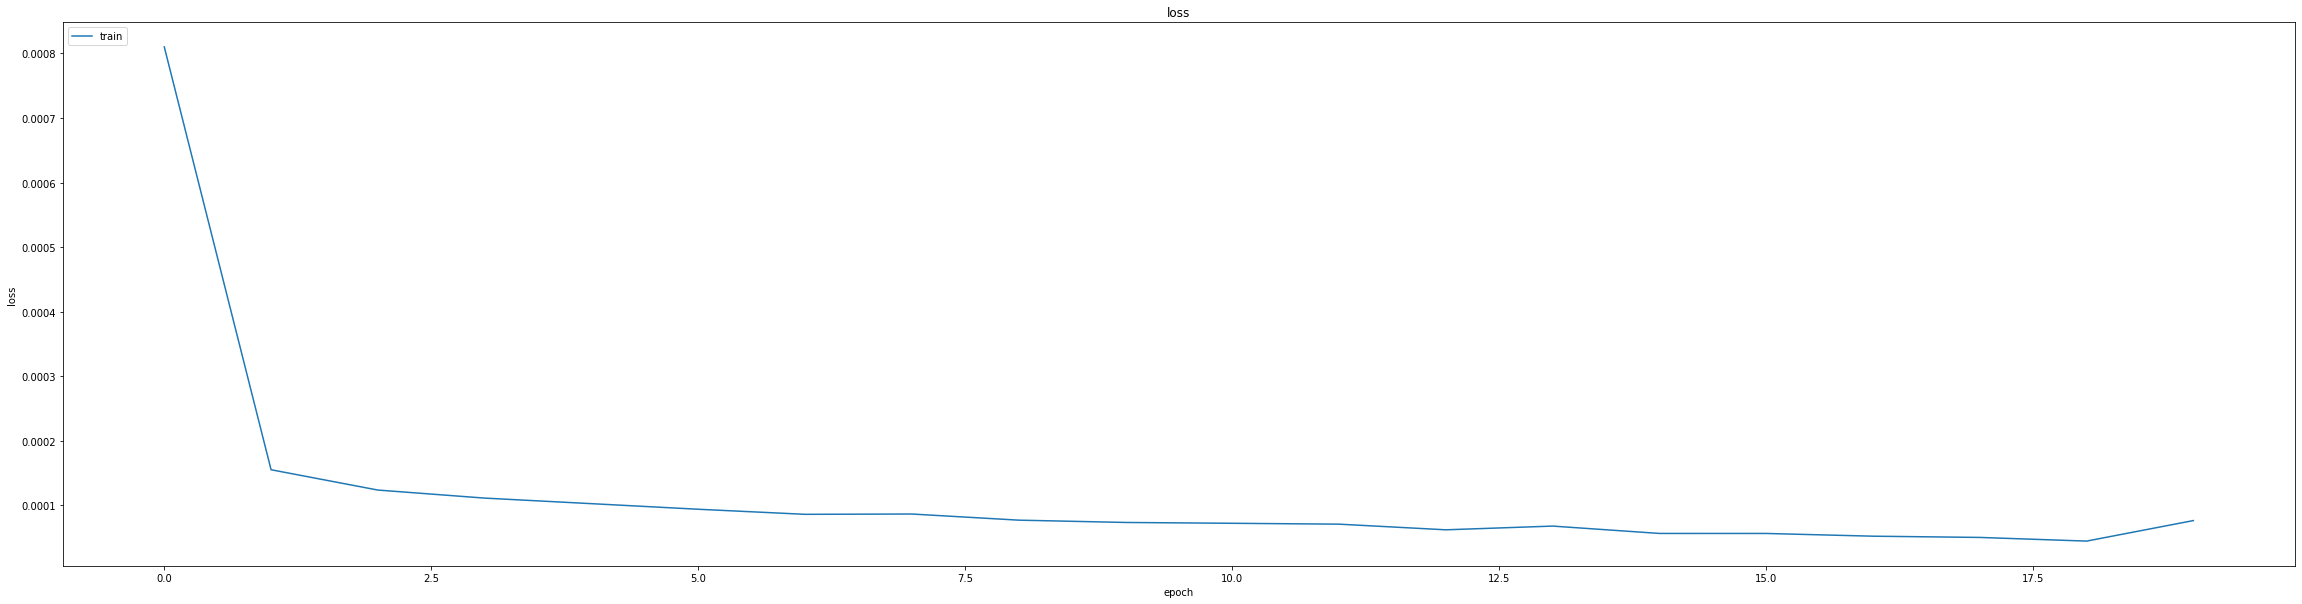

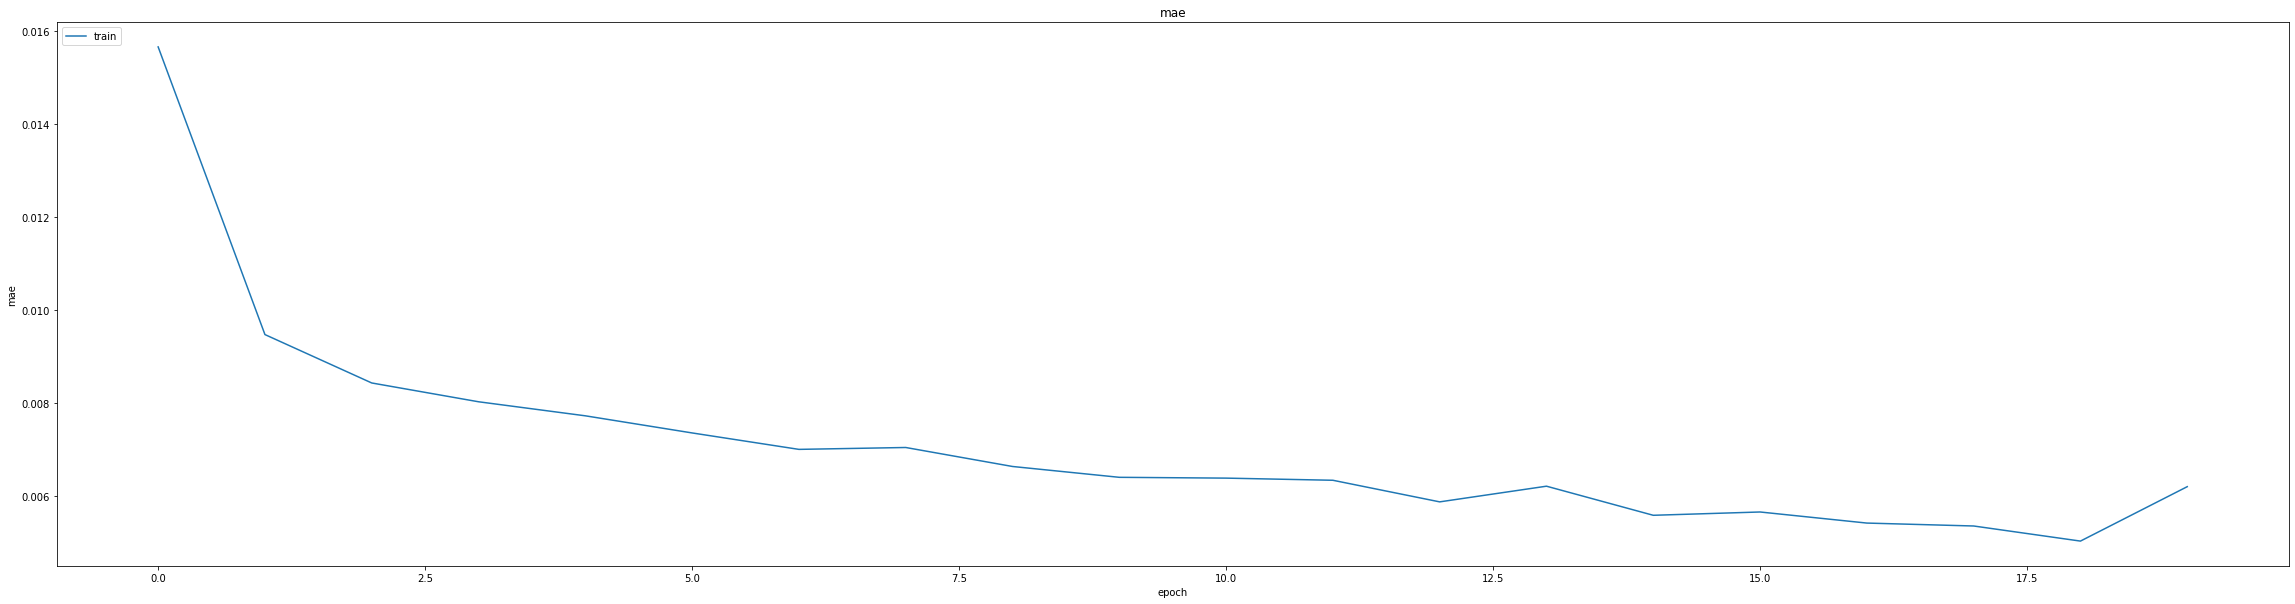

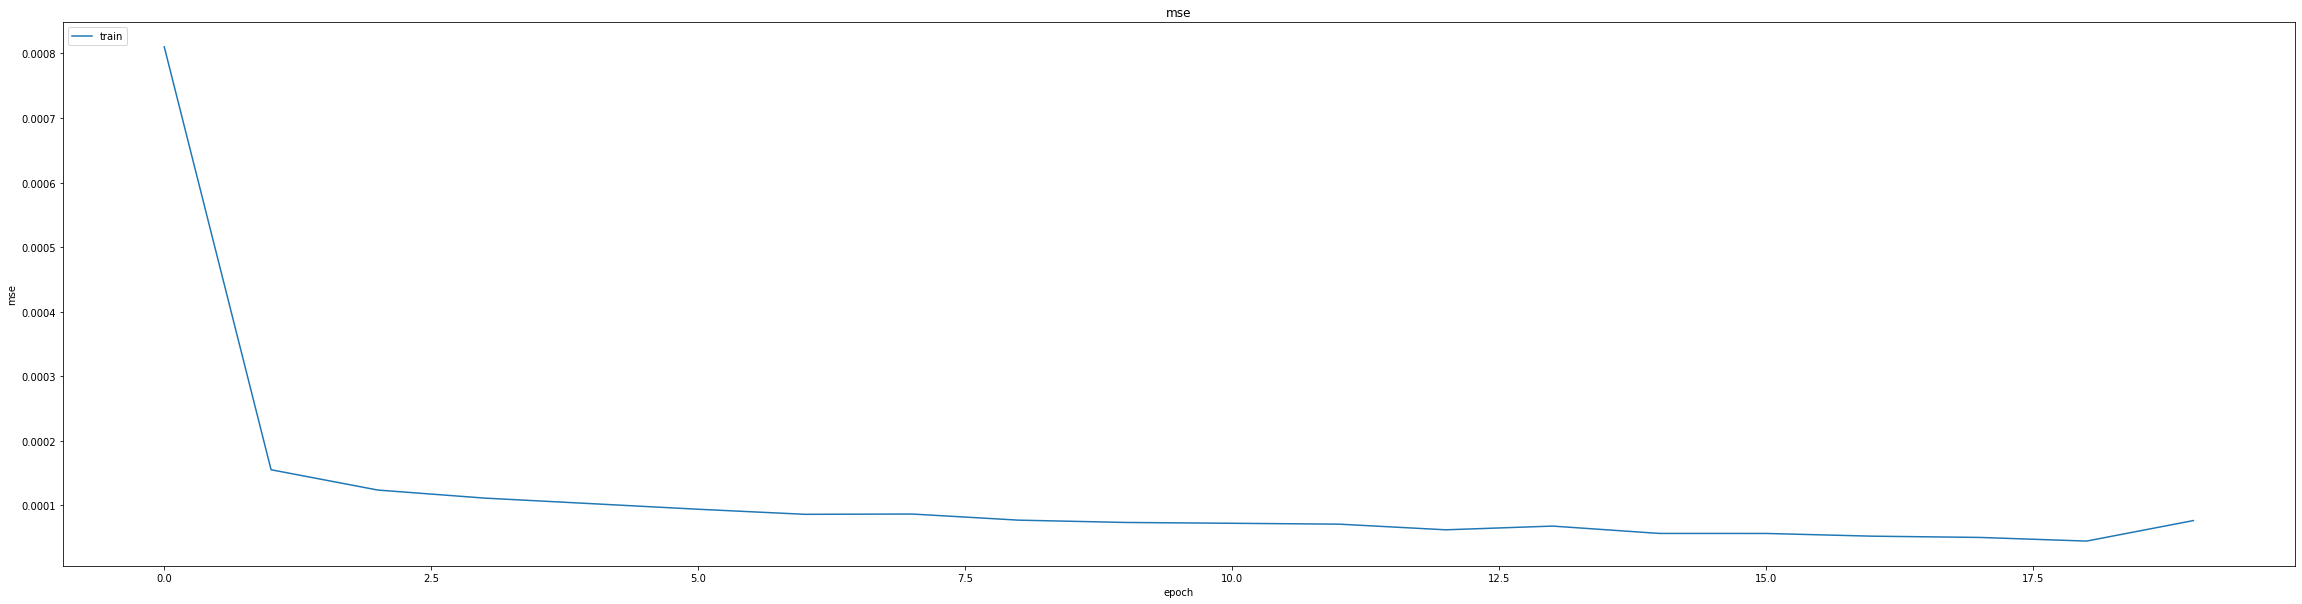

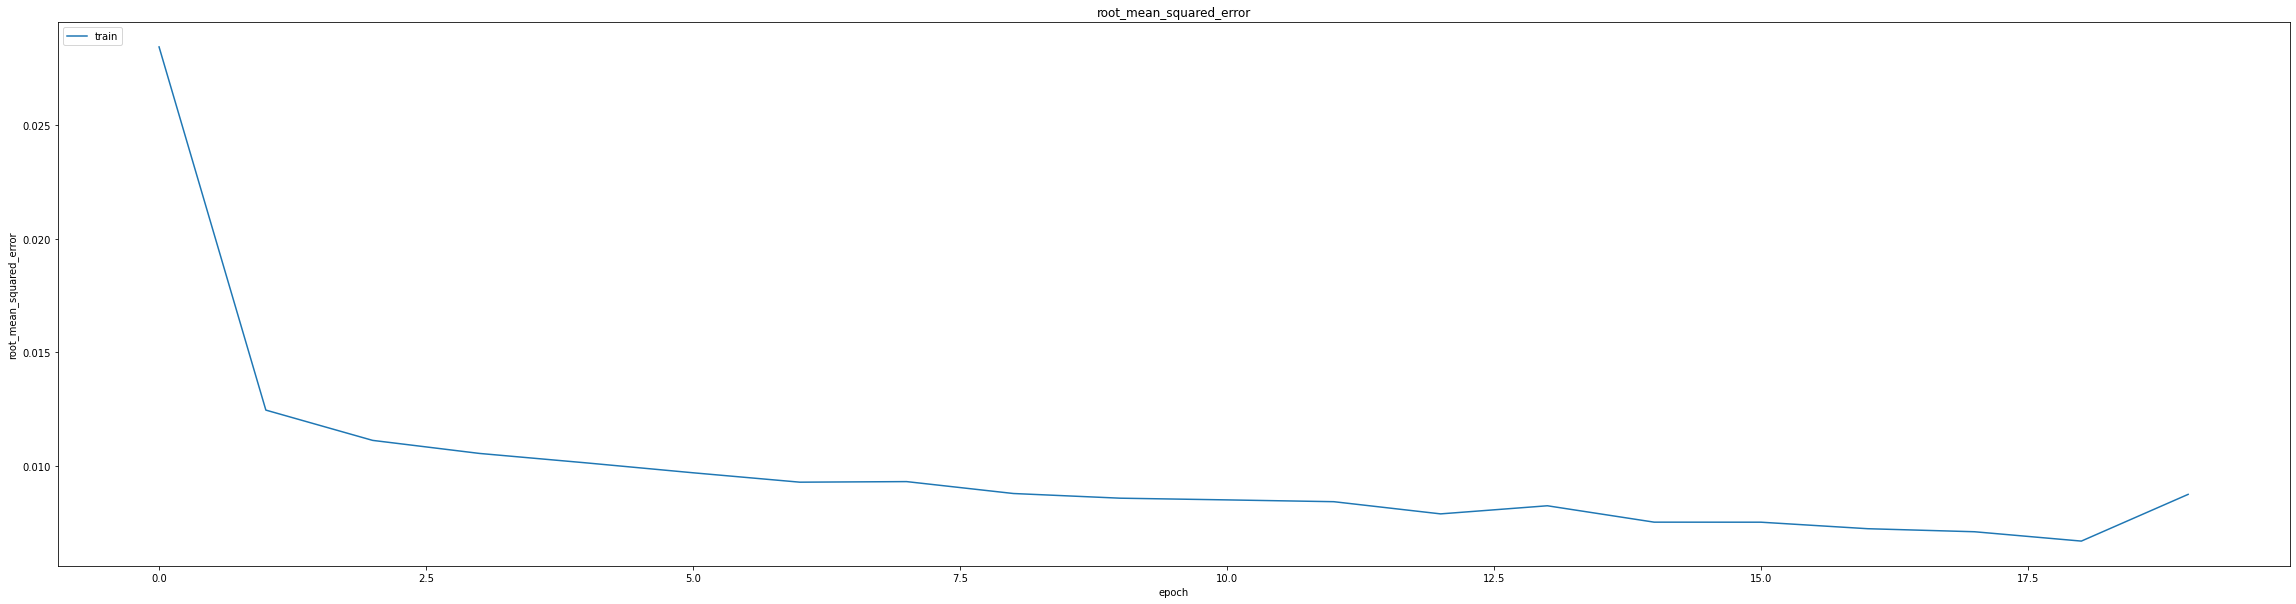

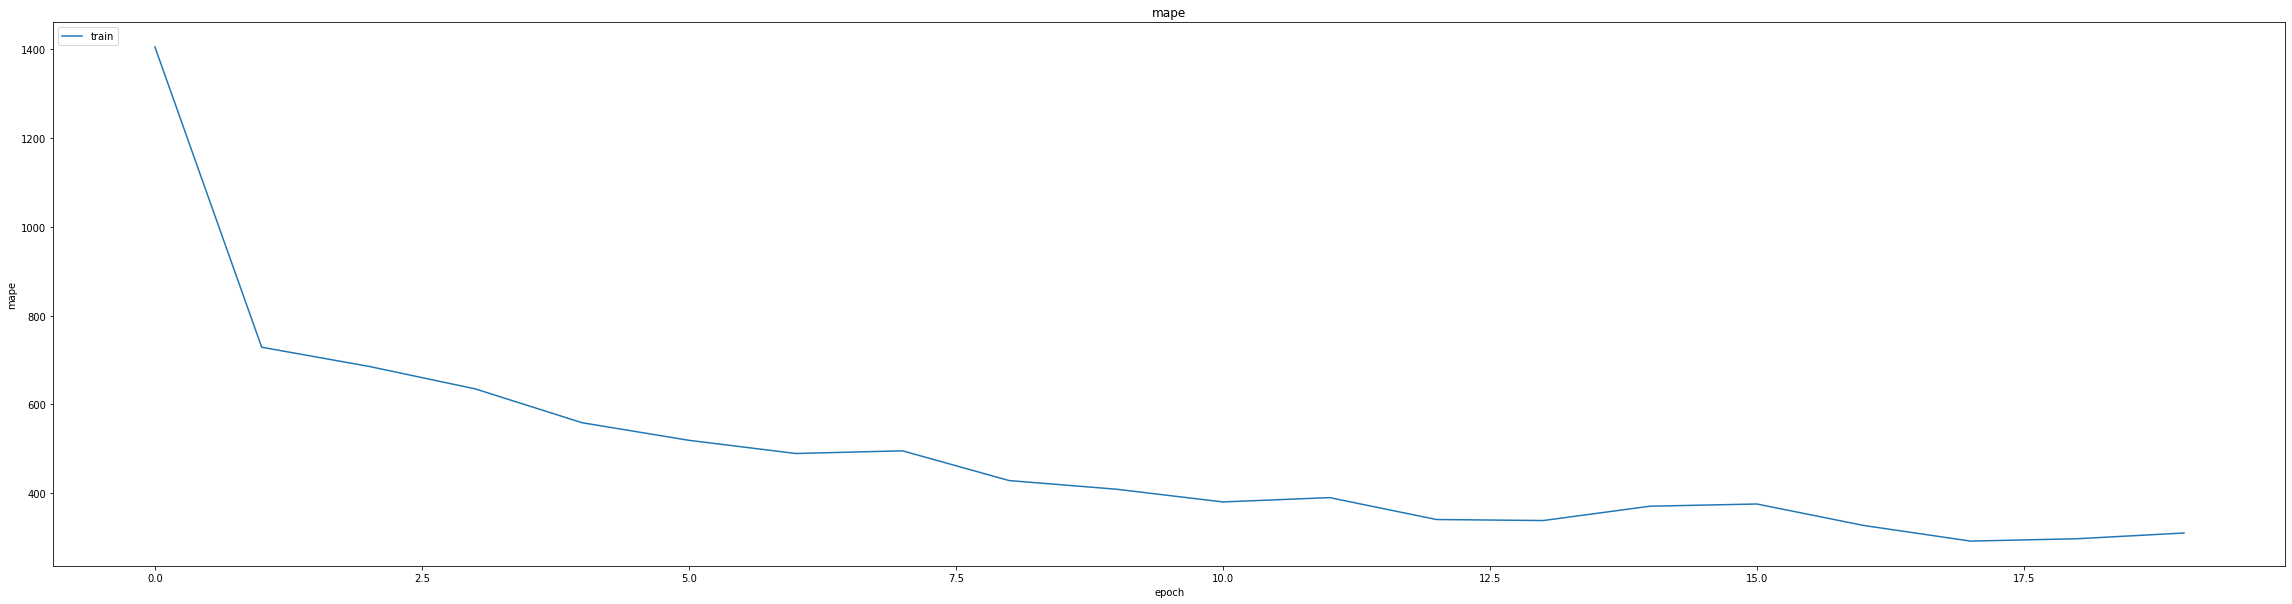

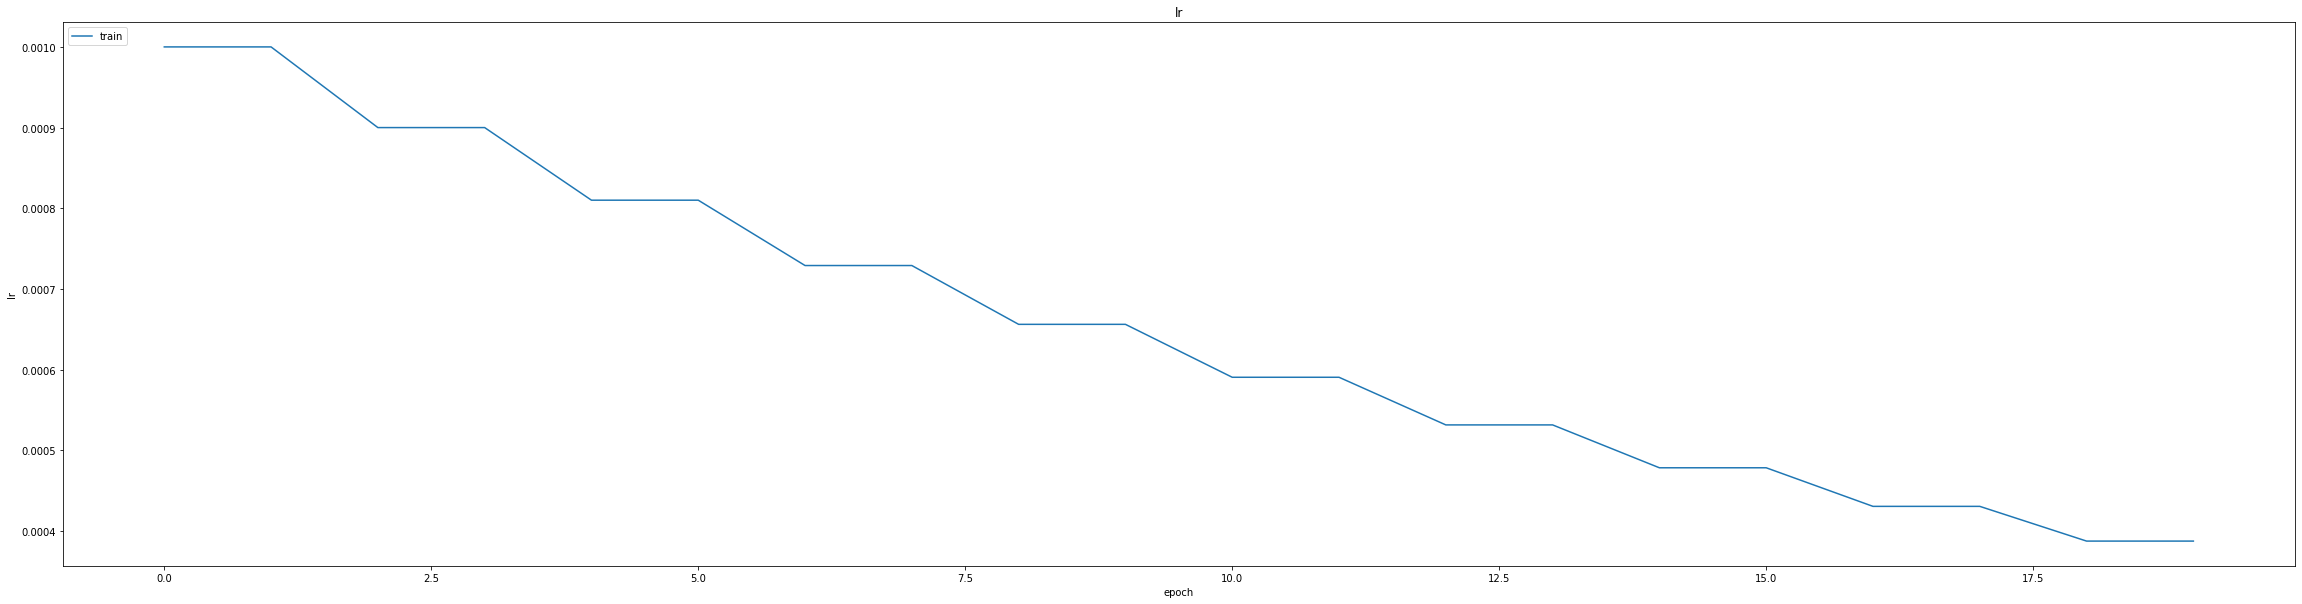

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007163326255977154
0.009710274636745453
1391/1391 [==============================] - 6s 4ms/step
0.9959628905893808


1391/1391 [==============================] - 5s 4ms/step


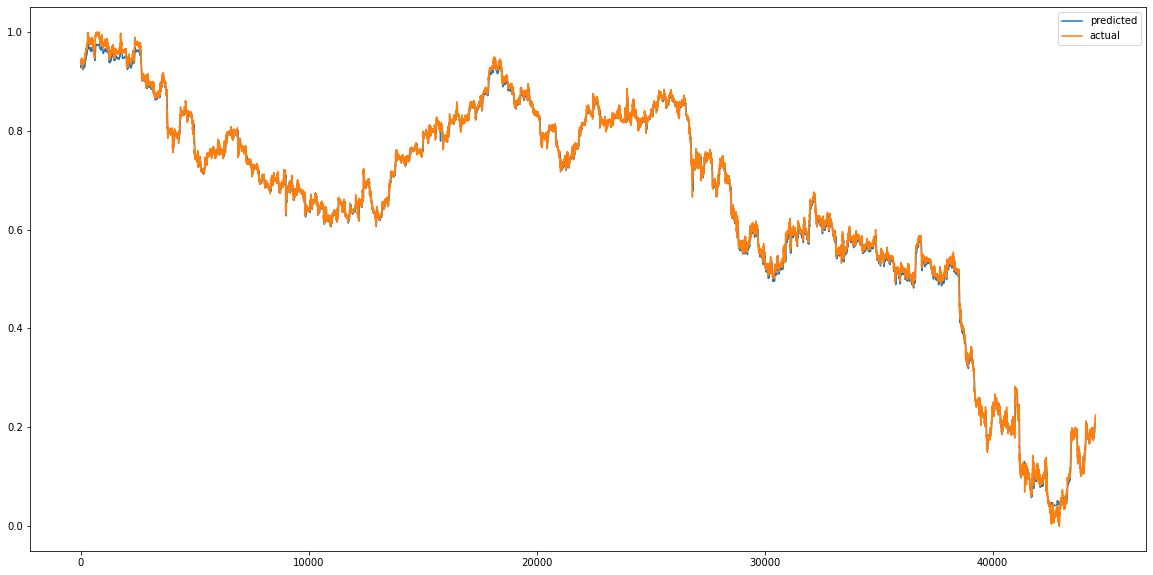

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


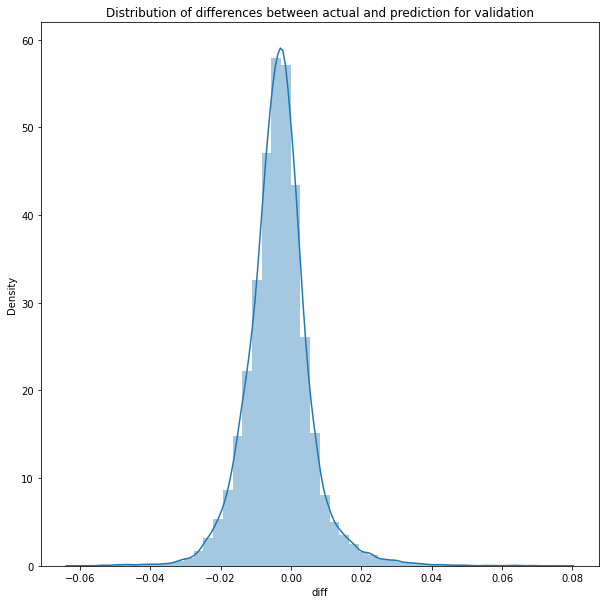

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 4ms/step


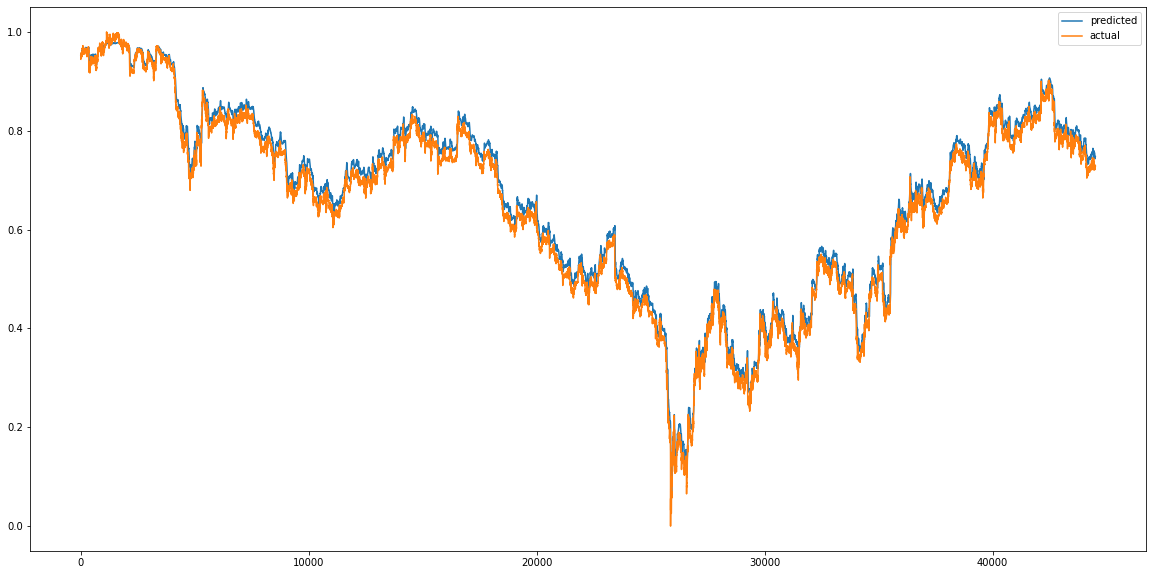

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


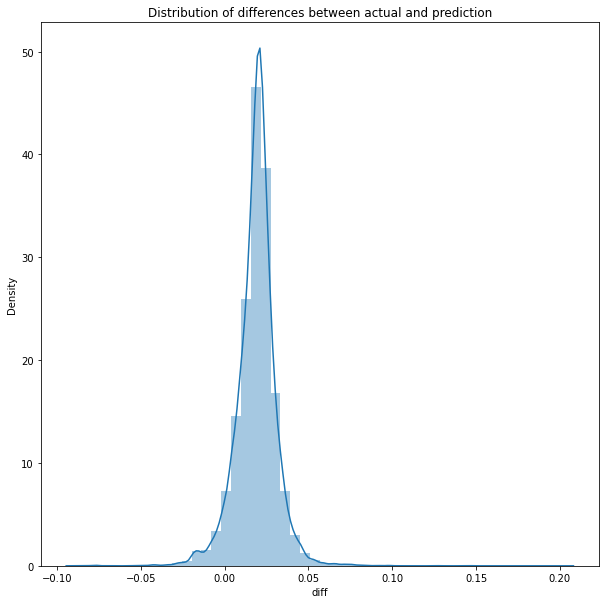

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0004998762359785366
RMSE :  0.022357912156069866
MAE :  0.019918164234650933
1391/1391 [==============================] - 5s 4ms/step
R2_Score  : 0.9869589220892061


count    44508.000000
mean         0.018873
std          0.011987
min         -0.090229
25%          0.013200
50%          0.019699
75%          0.024985
max          0.203887
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/347 [============================>.] - ETA: 0s - loss: 563.1823 - mae: 6.4290 - mse: 563.1823 - root_mean_squared_error: 23.7315 - mape: 10241.4873
Epoch 1: val_mse improved from inf to 0.14129, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 20s 44ms/step - loss: 561.6481 - mae: 6.4126 - mse: 561.6481 - root_mean_squared_error: 23.6991 - mape: 10213.8047 - val_loss: 0.1413 - val_mae: 0.2988 - val_mse: 0.1413 - val_root_mean_squared_error: 0.3759 - val_mape: 21674.1250
Epoch 2/60
345/347 [============================>.] - ETA: 0s - loss: 0.0928 - mae: 0.2392 - mse: 0.0928 - root_mean_squared_error: 0.3046 - mape: 6566.9180
Epoch 2: val_mse improved from 0.14129 to 0.05297, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0926 - mae: 0.2390 - mse: 0.0926 - root_mean_squared_error: 0.3043 - mape: 6530.3911 - val_loss: 0.0530 - val_mae: 0.1752 - val_mse: 0.0530 - val_root_mean_squared_error: 0.2302 - val_mape: 15095.8857
Epoch 3/60
345/347 [============================>.] - ETA: 0s - loss: 0.0486 - mae: 0.1857 - mse: 0.0486 - root_mean_squared_error: 0.2206 - mape: 4915.0879
Epoch 3: val_mse did not improve from 0.05297
347/347 [==============================] - 5s 15ms/step - loss: 0.0486 - mae: 0.1857 - mse: 0.0486 - root_mean_squared_error: 0.2206 - mape: 4887.7891 - val_loss: 0.0556 - val_mae: 0.1897 - val_mse: 0.0556 - val_root_mean_squared_error: 0.2358 - val_mape: 13739.4834
Epoch 4/60
344/347 [============================>.] - ETA: 0s - loss: 0.0466 - mae: 0.1843 - mse: 0.0466 - root_mean_squared_error: 0.2158 - mape: 5791.7988
Epoch 4: val_mse did not improve from 0.05297
347/347 [==============================] - 5s 15ms/step - l

347/347 [==============================] - 15s 43ms/step - loss: 0.0416 - mae: 0.1751 - mse: 0.0416 - root_mean_squared_error: 0.2040 - mape: 4700.9473 - val_loss: 0.0520 - val_mae: 0.1853 - val_mse: 0.0520 - val_root_mean_squared_error: 0.2279 - val_mape: 12927.1992
Epoch 15/60
346/347 [============================>.] - ETA: 0s - loss: 0.0297 - mae: 0.1422 - mse: 0.0297 - root_mean_squared_error: 0.1722 - mape: 4554.9067
Epoch 15: val_mse improved from 0.05196 to 0.02799, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0296 - mae: 0.1420 - mse: 0.0296 - root_mean_squared_error: 0.1721 - mape: 4542.5464 - val_loss: 0.0280 - val_mae: 0.1405 - val_mse: 0.0280 - val_root_mean_squared_error: 0.1673 - val_mape: 10186.1602
Epoch 16/60
344/347 [============================>.] - ETA: 0s - loss: 0.0081 - mae: 0.0664 - mse: 0.0081 - root_mean_squared_error: 0.0899 - mape: 3321.8337
Epoch 16: val_mse improved from 0.02799 to 0.01265, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0081 - mae: 0.0663 - mse: 0.0081 - root_mean_squared_error: 0.0897 - mape: 3293.7371 - val_loss: 0.0126 - val_mae: 0.1011 - val_mse: 0.0126 - val_root_mean_squared_error: 0.1125 - val_mape: 7744.2148
Epoch 17/60
345/347 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0487 - mse: 0.0045 - root_mean_squared_error: 0.0668 - mape: 2721.5527
Epoch 17: val_mse improved from 0.01265 to 0.01032, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0045 - mae: 0.0486 - mse: 0.0045 - root_mean_squared_error: 0.0667 - mape: 2706.3455 - val_loss: 0.0103 - val_mae: 0.0928 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1016 - val_mape: 7028.7339
Epoch 18/60
344/347 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0429 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 2594.1897
Epoch 18: val_mse improved from 0.01032 to 0.00940, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0035 - mae: 0.0429 - mse: 0.0035 - root_mean_squared_error: 0.0593 - mape: 2572.2375 - val_loss: 0.0094 - val_mae: 0.0885 - val_mse: 0.0094 - val_root_mean_squared_error: 0.0969 - val_mape: 6701.1592
Epoch 19/60
344/347 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0384 - mse: 0.0028 - root_mean_squared_error: 0.0534 - mape: 2323.8018
Epoch 19: val_mse improved from 0.00940 to 0.00757, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0028 - mae: 0.0383 - mse: 0.0028 - root_mean_squared_error: 0.0533 - mape: 2304.1396 - val_loss: 0.0076 - val_mae: 0.0785 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0870 - val_mape: 6412.0645
Epoch 20/60
345/347 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0348 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 2144.7837
Epoch 20: val_mse improved from 0.00757 to 0.00673, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0024 - mae: 0.0348 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 2132.8047 - val_loss: 0.0067 - val_mae: 0.0735 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0820 - val_mape: 6173.0146
Epoch 21/60
345/347 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0322 - mse: 0.0020 - root_mean_squared_error: 0.0451 - mape: 2206.4595
Epoch 21: val_mse improved from 0.00673 to 0.00581, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0020 - mae: 0.0322 - mse: 0.0020 - root_mean_squared_error: 0.0451 - mape: 2194.1284 - val_loss: 0.0058 - val_mae: 0.0679 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0762 - val_mape: 5895.7690
Epoch 22/60
347/347 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0299 - mse: 0.0018 - root_mean_squared_error: 0.0418 - mape: 2209.0752
Epoch 22: val_mse improved from 0.00581 to 0.00542, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0018 - mae: 0.0299 - mse: 0.0018 - root_mean_squared_error: 0.0418 - mape: 2209.0752 - val_loss: 0.0054 - val_mae: 0.0654 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0736 - val_mape: 5609.9204
Epoch 23/60
347/347 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0280 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1935.0862
Epoch 23: val_mse improved from 0.00542 to 0.00470, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0015 - mae: 0.0280 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 1935.0862 - val_loss: 0.0047 - val_mae: 0.0602 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0686 - val_mape: 5375.5879
Epoch 24/60
345/347 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0266 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1825.7828
Epoch 24: val_mse improved from 0.00470 to 0.00370, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 0.0014 - mae: 0.0266 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 1815.5894 - val_loss: 0.0037 - val_mae: 0.0525 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0609 - val_mape: 5110.6680
Epoch 25/60
346/347 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0347 - mape: 1794.9906
Epoch 25: val_mse improved from 0.00370 to 0.00349, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1790.1198 - val_loss: 0.0035 - val_mae: 0.0512 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mape: 4867.7788
Epoch 26/60
345/347 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0237 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1603.8466
Epoch 26: val_mse improved from 0.00349 to 0.00347, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 0.0011 - mae: 0.0237 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 1594.8978 - val_loss: 0.0035 - val_mae: 0.0519 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0589 - val_mape: 4653.1567
Epoch 27/60
346/347 [============================>.] - ETA: 0s - loss: 9.5066e-04 - mae: 0.0225 - mse: 9.5066e-04 - root_mean_squared_error: 0.0308 - mape: 1685.6498
Epoch 27: val_mse improved from 0.00347 to 0.00237, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 9.5040e-04 - mae: 0.0225 - mse: 9.5040e-04 - root_mean_squared_error: 0.0308 - mape: 1681.0702 - val_loss: 0.0024 - val_mae: 0.0410 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0487 - val_mape: 4411.6787
Epoch 28/60
346/347 [============================>.] - ETA: 0s - loss: 8.2636e-04 - mae: 0.0211 - mse: 8.2636e-04 - root_mean_squared_error: 0.0287 - mape: 1466.7206
Epoch 28: val_mse improved from 0.00237 to 0.00210, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 8.2615e-04 - mae: 0.0210 - mse: 8.2615e-04 - root_mean_squared_error: 0.0287 - mape: 1462.7361 - val_loss: 0.0021 - val_mae: 0.0390 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 4199.0103
Epoch 29/60
345/347 [============================>.] - ETA: 0s - loss: 7.3629e-04 - mae: 0.0199 - mse: 7.3629e-04 - root_mean_squared_error: 0.0271 - mape: 1526.3850
Epoch 29: val_mse did not improve from 0.00210
347/347 [==============================] - 5s 15ms/step - loss: 7.3579e-04 - mae: 0.0199 - mse: 7.3579e-04 - root_mean_squared_error: 0.0271 - mape: 1517.8500 - val_loss: 0.0027 - val_mae: 0.0461 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0516 - val_mape: 4014.8435
Epoch 30/60
344/347 [============================>.] - ETA: 0s - loss: 6.4650e-04 - mae: 0.0187 - mse: 6.4650e-04 - root_mean_squared_error: 0.0254 - mape: 1426.8795
Epoch 30: val_mse did not improve from 0.00210
347/347 [================

347/347 [==============================] - 15s 43ms/step - loss: 5.9057e-04 - mae: 0.0180 - mse: 5.9057e-04 - root_mean_squared_error: 0.0243 - mape: 1319.3401 - val_loss: 0.0015 - val_mae: 0.0319 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 3641.6016
Epoch 32/60
344/347 [============================>.] - ETA: 0s - loss: 5.2672e-04 - mae: 0.0171 - mse: 5.2672e-04 - root_mean_squared_error: 0.0230 - mape: 1192.7002
Epoch 32: val_mse did not improve from 0.00146
347/347 [==============================] - 5s 15ms/step - loss: 5.2608e-04 - mae: 0.0171 - mse: 5.2608e-04 - root_mean_squared_error: 0.0229 - mape: 1182.6119 - val_loss: 0.0021 - val_mae: 0.0415 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 3456.7383
Epoch 33/60
346/347 [============================>.] - ETA: 0s - loss: 4.7836e-04 - mae: 0.0164 - mse: 4.7836e-04 - root_mean_squared_error: 0.0219 - mape: 1322.2657
Epoch 33: val_mse did not improve from 0.00146
347/347 [================

347/347 [==============================] - 15s 43ms/step - loss: 4.3228e-04 - mae: 0.0156 - mse: 4.3228e-04 - root_mean_squared_error: 0.0208 - mape: 1205.2622 - val_loss: 0.0014 - val_mae: 0.0335 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 3158.7505
Epoch 35/60
344/347 [============================>.] - ETA: 0s - loss: 3.9632e-04 - mae: 0.0150 - mse: 3.9632e-04 - root_mean_squared_error: 0.0199 - mape: 1076.6021
Epoch 35: val_mse improved from 0.00144 to 0.00113, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 3.9626e-04 - mae: 0.0150 - mse: 3.9626e-04 - root_mean_squared_error: 0.0199 - mape: 1067.4948 - val_loss: 0.0011 - val_mae: 0.0293 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 3017.4998
Epoch 36/60
347/347 [==============================] - ETA: 0s - loss: 3.6644e-04 - mae: 0.0145 - mse: 3.6644e-04 - root_mean_squared_error: 0.0191 - mape: 1087.5427
Epoch 36: val_mse did not improve from 0.00113
347/347 [==============================] - 5s 15ms/step - loss: 3.6644e-04 - mae: 0.0145 - mse: 3.6644e-04 - root_mean_squared_error: 0.0191 - mape: 1087.5427 - val_loss: 0.0014 - val_mae: 0.0331 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 2900.3506
Epoch 37/60
347/347 [==============================] - ETA: 0s - loss: 3.3413e-04 - mae: 0.0139 - mse: 3.3413e-04 - root_mean_squared_error: 0.0183 - mape: 968.2857
Epoch 37: val_mse did not improve from 0.00113
347/347 [=================

347/347 [==============================] - 14s 41ms/step - loss: 2.6331e-04 - mae: 0.0124 - mse: 2.6331e-04 - root_mean_squared_error: 0.0162 - mape: 983.9937 - val_loss: 0.0011 - val_mae: 0.0293 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 2461.8293
Epoch 42/60
346/347 [============================>.] - ETA: 0s - loss: 2.6466e-04 - mae: 0.0125 - mse: 2.6466e-04 - root_mean_squared_error: 0.0163 - mape: 838.5739
Epoch 42: val_mse improved from 0.00111 to 0.00086, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 15s 43ms/step - loss: 2.6471e-04 - mae: 0.0125 - mse: 2.6471e-04 - root_mean_squared_error: 0.0163 - mape: 836.2975 - val_loss: 8.6065e-04 - val_mae: 0.0255 - val_mse: 8.6065e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 2401.5178
Epoch 43/60
346/347 [============================>.] - ETA: 0s - loss: 2.2681e-04 - mae: 0.0115 - mse: 2.2681e-04 - root_mean_squared_error: 0.0151 - mape: 806.0507
Epoch 43: val_mse improved from 0.00086 to 0.00084, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 16s 45ms/step - loss: 2.2671e-04 - mae: 0.0115 - mse: 2.2671e-04 - root_mean_squared_error: 0.0151 - mape: 803.8591 - val_loss: 8.4008e-04 - val_mae: 0.0253 - val_mse: 8.4008e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 2337.0039
Epoch 44/60
346/347 [============================>.] - ETA: 0s - loss: 2.2370e-04 - mae: 0.0115 - mse: 2.2370e-04 - root_mean_squared_error: 0.0150 - mape: 781.8056
Epoch 44: val_mse improved from 0.00084 to 0.00067, saving model to /content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)


347/347 [==============================] - 14s 41ms/step - loss: 2.2371e-04 - mae: 0.0115 - mse: 2.2371e-04 - root_mean_squared_error: 0.0150 - mape: 779.6842 - val_loss: 6.7354e-04 - val_mae: 0.0224 - val_mse: 6.7354e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 2278.0732
Epoch 45/60
347/347 [==============================] - ETA: 0s - loss: 2.1412e-04 - mae: 0.0113 - mse: 2.1412e-04 - root_mean_squared_error: 0.0146 - mape: 743.0864
Epoch 45: val_mse did not improve from 0.00067
347/347 [==============================] - 5s 15ms/step - loss: 2.1412e-04 - mae: 0.0113 - mse: 2.1412e-04 - root_mean_squared_error: 0.0146 - mape: 743.0864 - val_loss: 9.1562e-04 - val_mae: 0.0272 - val_mse: 9.1562e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 2209.7002
Epoch 46/60
344/347 [============================>.] - ETA: 0s - loss: 2.0178e-04 - mae: 0.0109 - mse: 2.0178e-04 - root_mean_squared_error: 0.0142 - mape: 722.1710
Epoch 46: val_mse did not improve from 0.00067
347/347 [====

347/347 [==============================] - 15s 43ms/step - loss: 1.9412e-04 - mae: 0.0107 - mse: 1.9412e-04 - root_mean_squared_error: 0.0139 - mape: 732.8181 - val_loss: 3.7547e-04 - val_mae: 0.0158 - val_mse: 3.7547e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2119.3052
Epoch 48/60
344/347 [============================>.] - ETA: 0s - loss: 1.8795e-04 - mae: 0.0106 - mse: 1.8795e-04 - root_mean_squared_error: 0.0137 - mape: 736.3569
Epoch 48: val_mse did not improve from 0.00038
347/347 [==============================] - 5s 15ms/step - loss: 1.8809e-04 - mae: 0.0106 - mse: 1.8809e-04 - root_mean_squared_error: 0.0137 - mape: 730.1262 - val_loss: 0.0013 - val_mae: 0.0332 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 2054.3784
Epoch 49/60
345/347 [============================>.] - ETA: 0s - loss: 1.9177e-04 - mae: 0.0107 - mse: 1.9177e-04 - root_mean_squared_error: 0.0138 - mape: 747.3566
Epoch 49: val_mse did not improve from 0.00038
347/347 [============

347/347 [==============================] - 15s 43ms/step - loss: 1.3523e-04 - mae: 0.0090 - mse: 1.3523e-04 - root_mean_squared_error: 0.0116 - mape: 554.0349 - val_loss: 2.2236e-04 - val_mae: 0.0118 - val_mse: 2.2236e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1728.4001


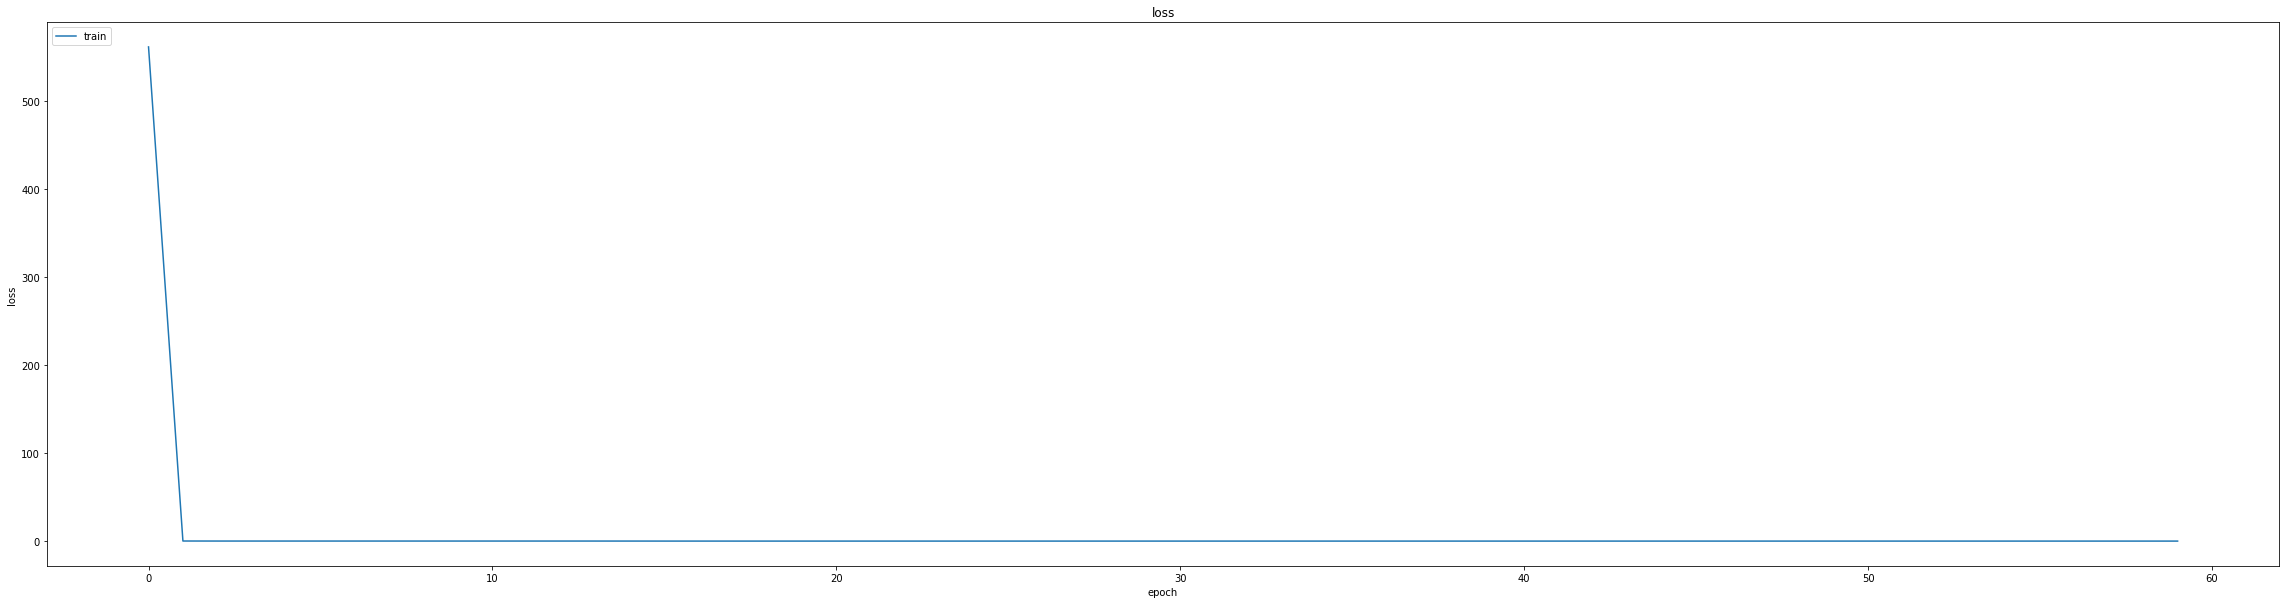

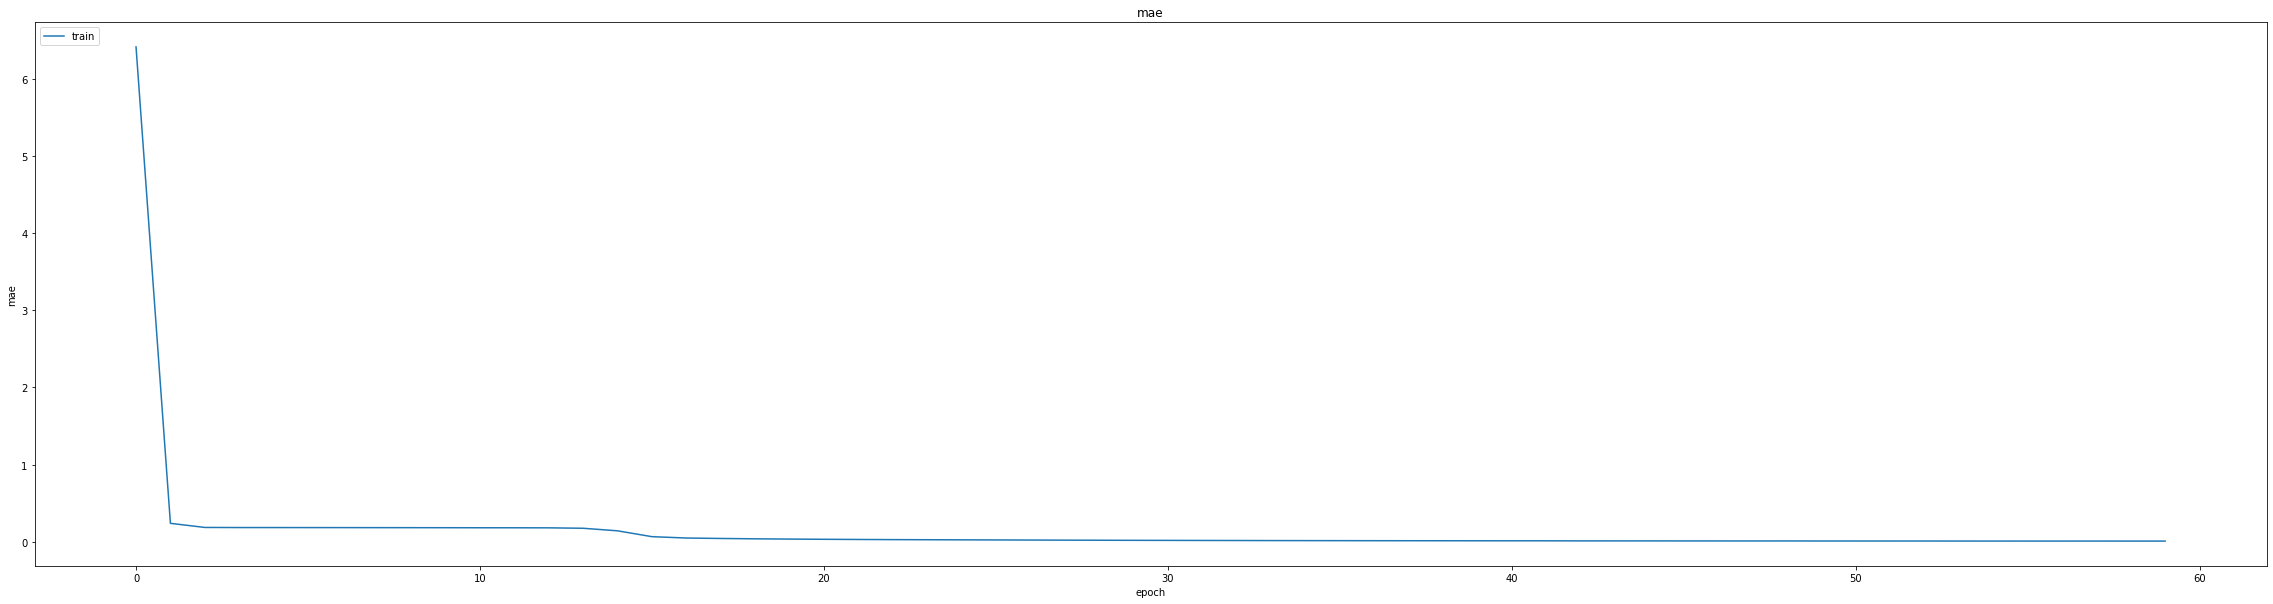

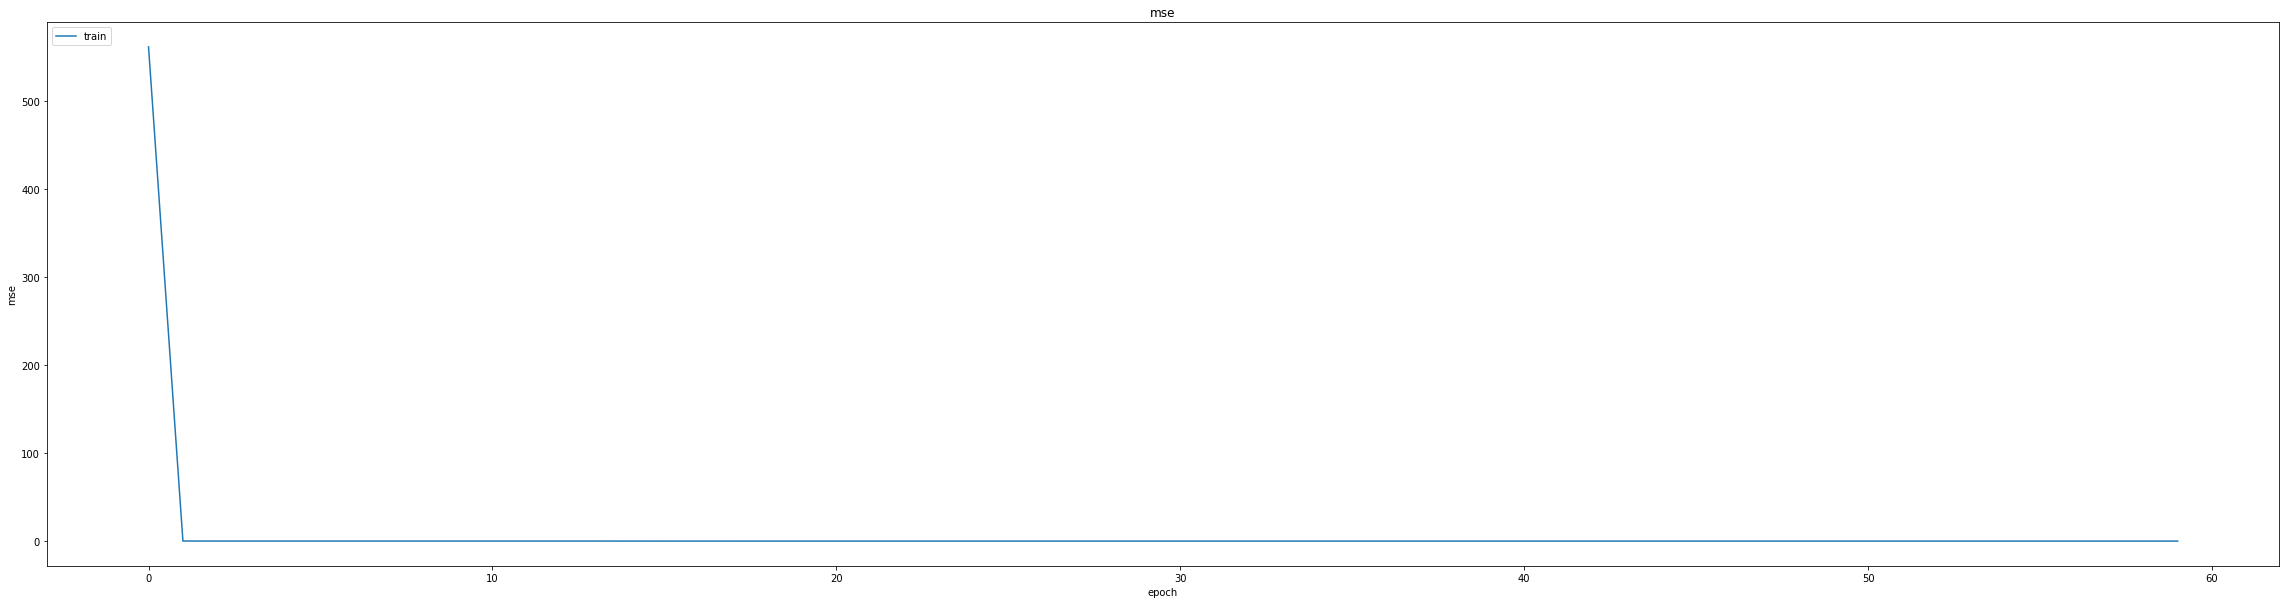

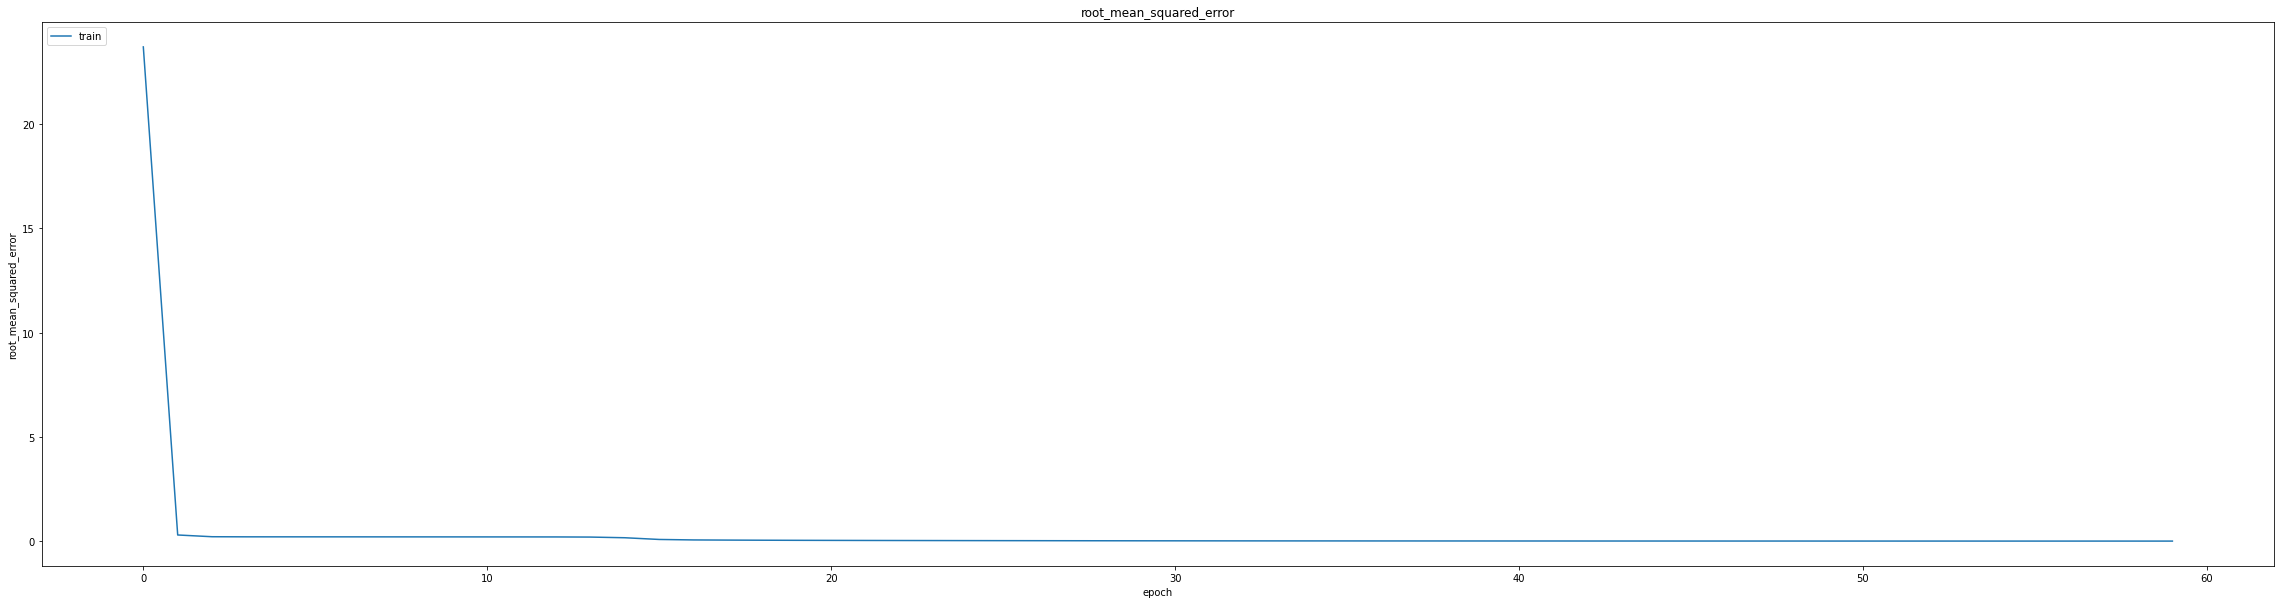

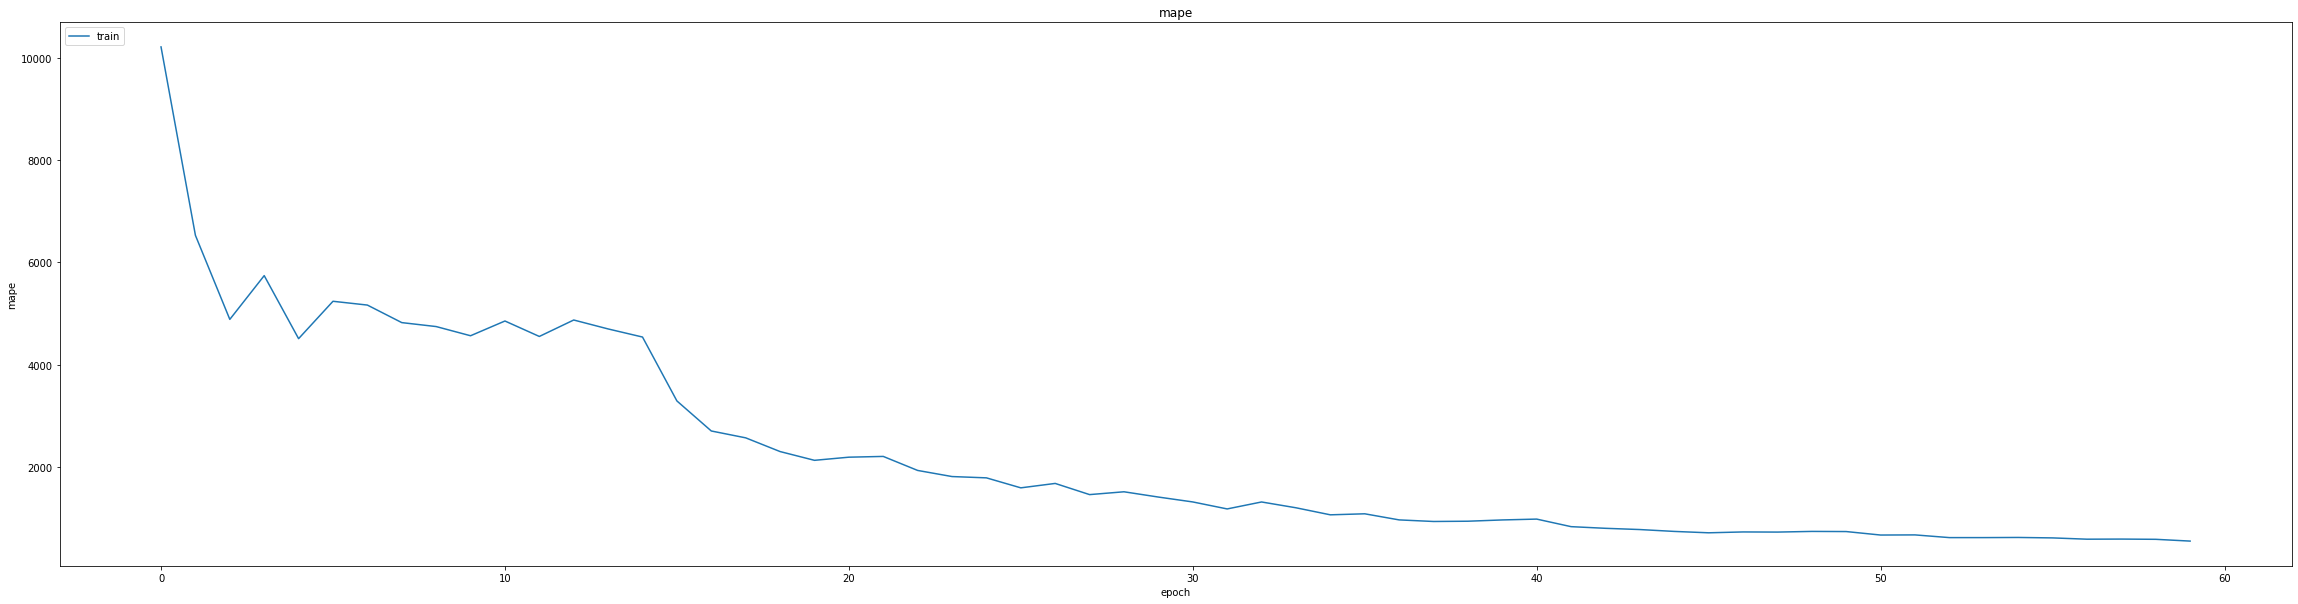

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011797183193266392
0.011797183193266392
0.01491173543035984
1391/1391 [==============================] - 6s 3ms/step
0.9957730911133624


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/347 [==============================] - ETA: 0s - loss: 7.0452e-04 - mae: 0.0129 - mse: 7.0452e-04 - root_mean_squared_error: 0.0265 - mape: 586.4700
Epoch 1: val_mse did not improve from 0.00022
347/347 [==============================] - 12s 24ms/step - loss: 7.0452e-04 - mae: 0.0129 - mse: 7.0452e-04 - root_mean_squared_error: 0.0265 - mape: 586.4700 - val_loss: 4.3532e-04 - val_mae: 0.0183 - val_mse: 4.3532e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 1731.5773 - lr: 0.0010
Epoch 2/20
345/347 [============================>.] - ETA: 0s - loss: 9.9639e-05 - mae: 0.0075 - mse: 9.9639e-05 - root_mean_squared_error: 0.0100 - mape: 1.8295
Epoch 2: val_mse did not improve from 0.00022
347/347 [==============================] - 7s 20ms/step - loss: 9.9770e-05 - mae: 0.0075 - mse: 9.9770e-05 - root_mean_squared_error: 0.0100 - mape: 525.1426 - val_loss: 3.8191e-04 - val_mae: 0.0170 - val_mse: 3.8191e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 1623.4159 - lr: 

347/347 [==============================] - 15s 45ms/step - loss: 8.1334e-05 - mae: 0.0069 - mse: 8.1334e-05 - root_mean_squared_error: 0.0090 - mape: 491.1290 - val_loss: 1.3694e-04 - val_mae: 0.0087 - val_mse: 1.3694e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 1453.3256 - lr: 5.3144e-04
Epoch 14/20
344/347 [============================>.] - ETA: 0s - loss: 7.8670e-05 - mae: 0.0067 - mse: 7.8670e-05 - root_mean_squared_error: 0.0089 - mape: 473.4002
Epoch 14: val_mse did not improve from 0.00014
347/347 [==============================] - 5s 15ms/step - loss: 7.8715e-05 - mae: 0.0067 - mse: 7.8715e-05 - root_mean_squared_error: 0.0089 - mape: 469.3973 - val_loss: 2.6820e-04 - val_mae: 0.0142 - val_mse: 2.6820e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 1425.4432 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
346/347 [============================>.] - ETA: 0s - loss: 7.1612e-05 - mae: 0.0064 - mse: 7.1612e-05 - root_mean_squared_error: 0.0085 - mape

347/347 [==============================] - 15s 44ms/step - loss: 6.6262e-05 - mae: 0.0061 - mse: 6.6262e-05 - root_mean_squared_error: 0.0081 - mape: 451.9199 - val_loss: 1.1601e-04 - val_mae: 0.0080 - val_mse: 1.1601e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1402.1195 - lr: 3.8742e-04
Epoch 20/20
346/347 [============================>.] - ETA: 0s - loss: 6.6785e-05 - mae: 0.0062 - mse: 6.6785e-05 - root_mean_squared_error: 0.0082 - mape: 461.7986
Epoch 20: val_mse did not improve from 0.00012
347/347 [==============================] - 5s 15ms/step - loss: 6.6722e-05 - mae: 0.0062 - mse: 6.6722e-05 - root_mean_squared_error: 0.0082 - mape: 460.5428 - val_loss: 2.7843e-04 - val_mae: 0.0145 - val_mse: 2.7843e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 1374.9546 - lr: 3.8742e-04


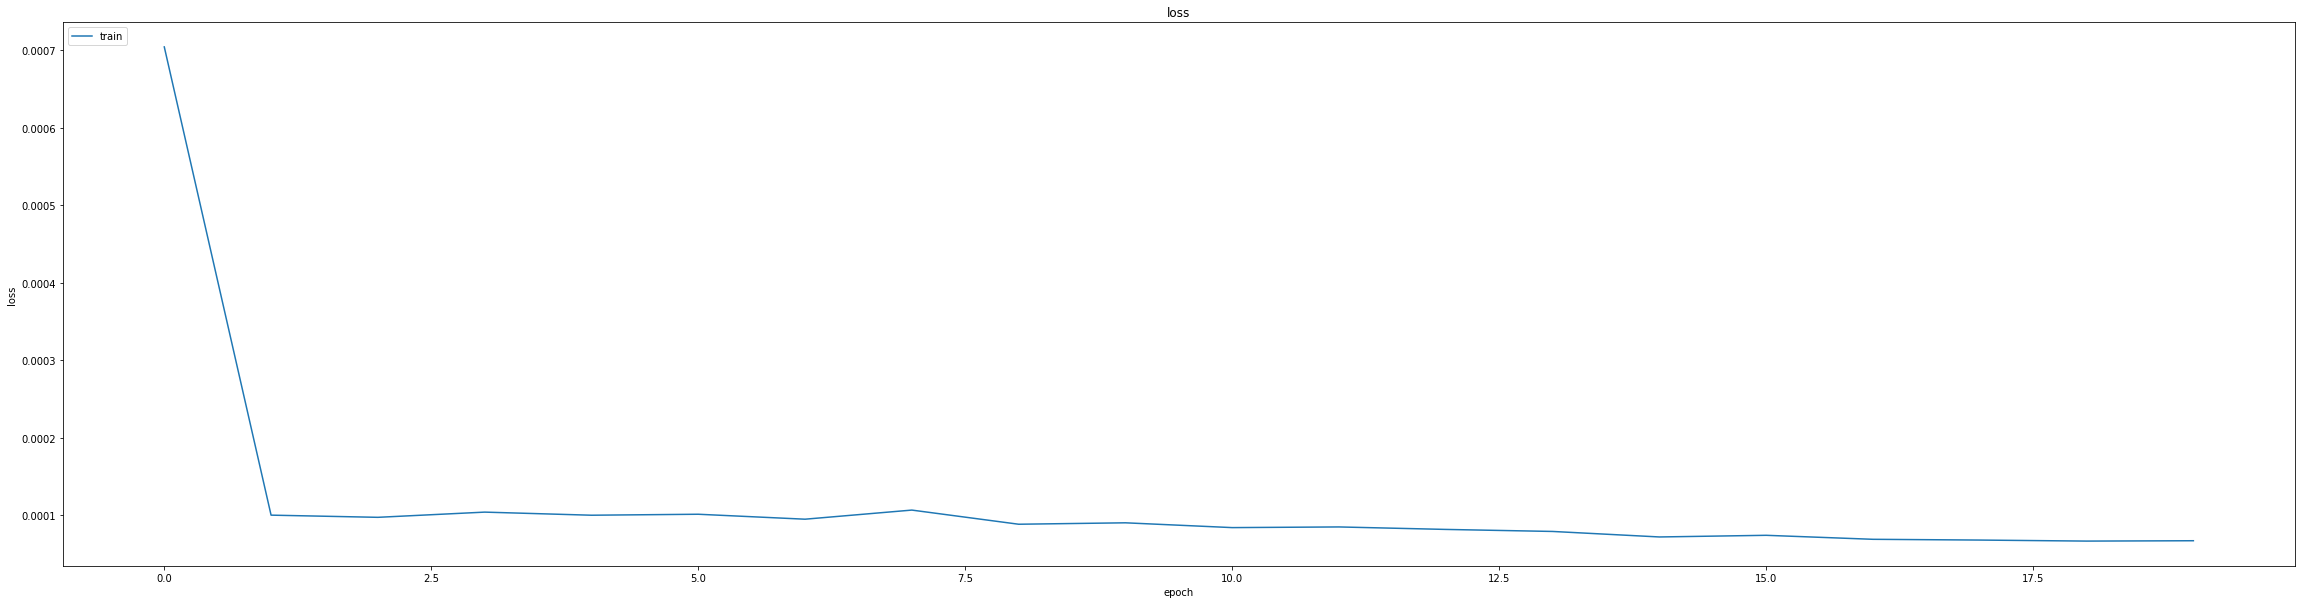

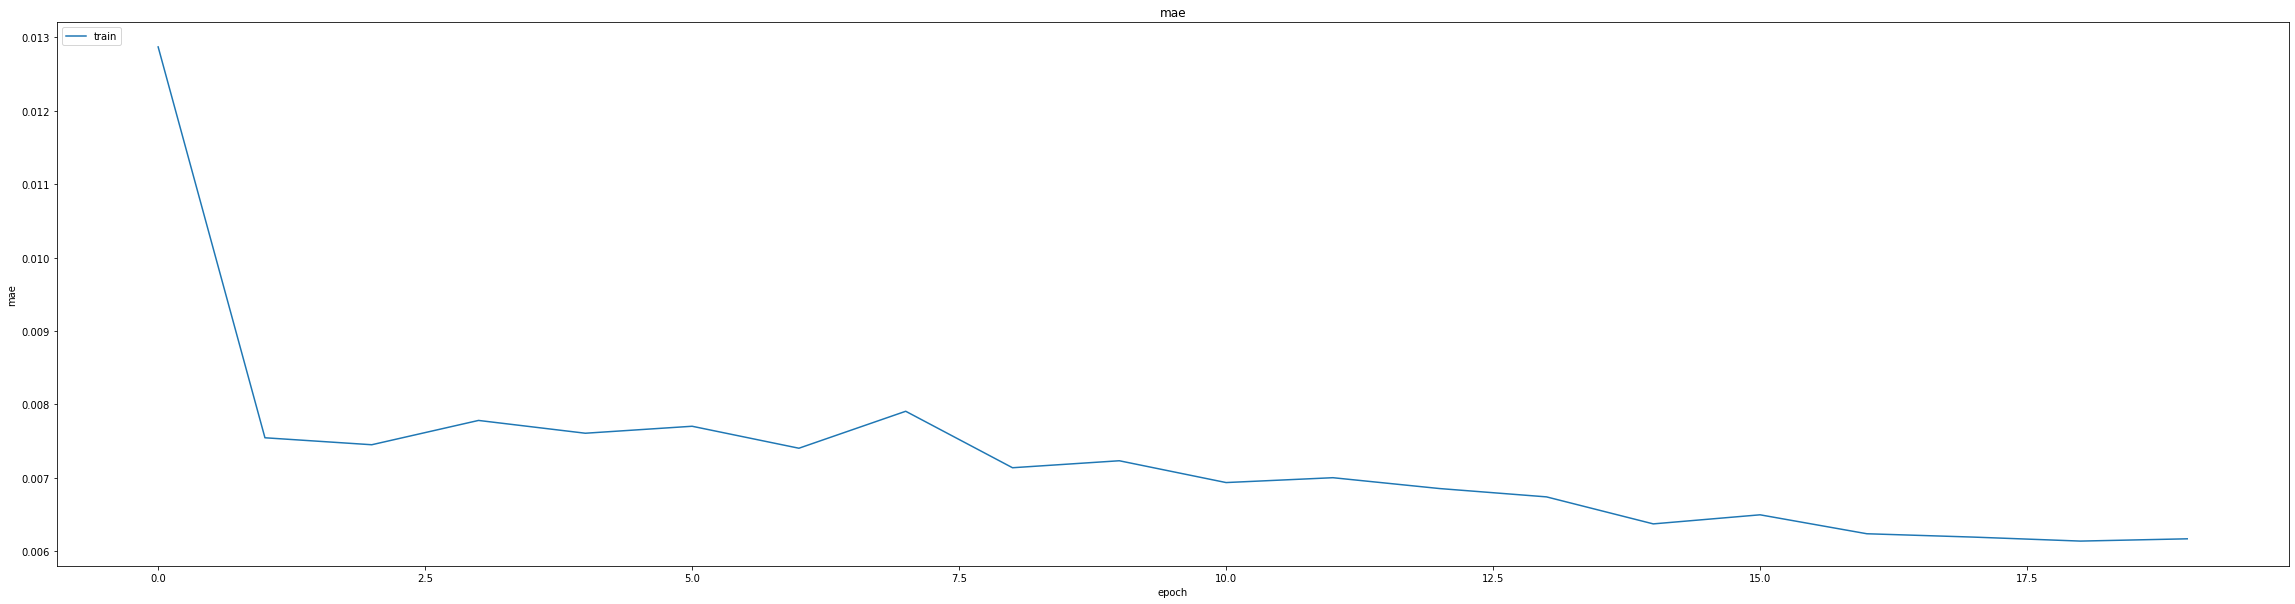

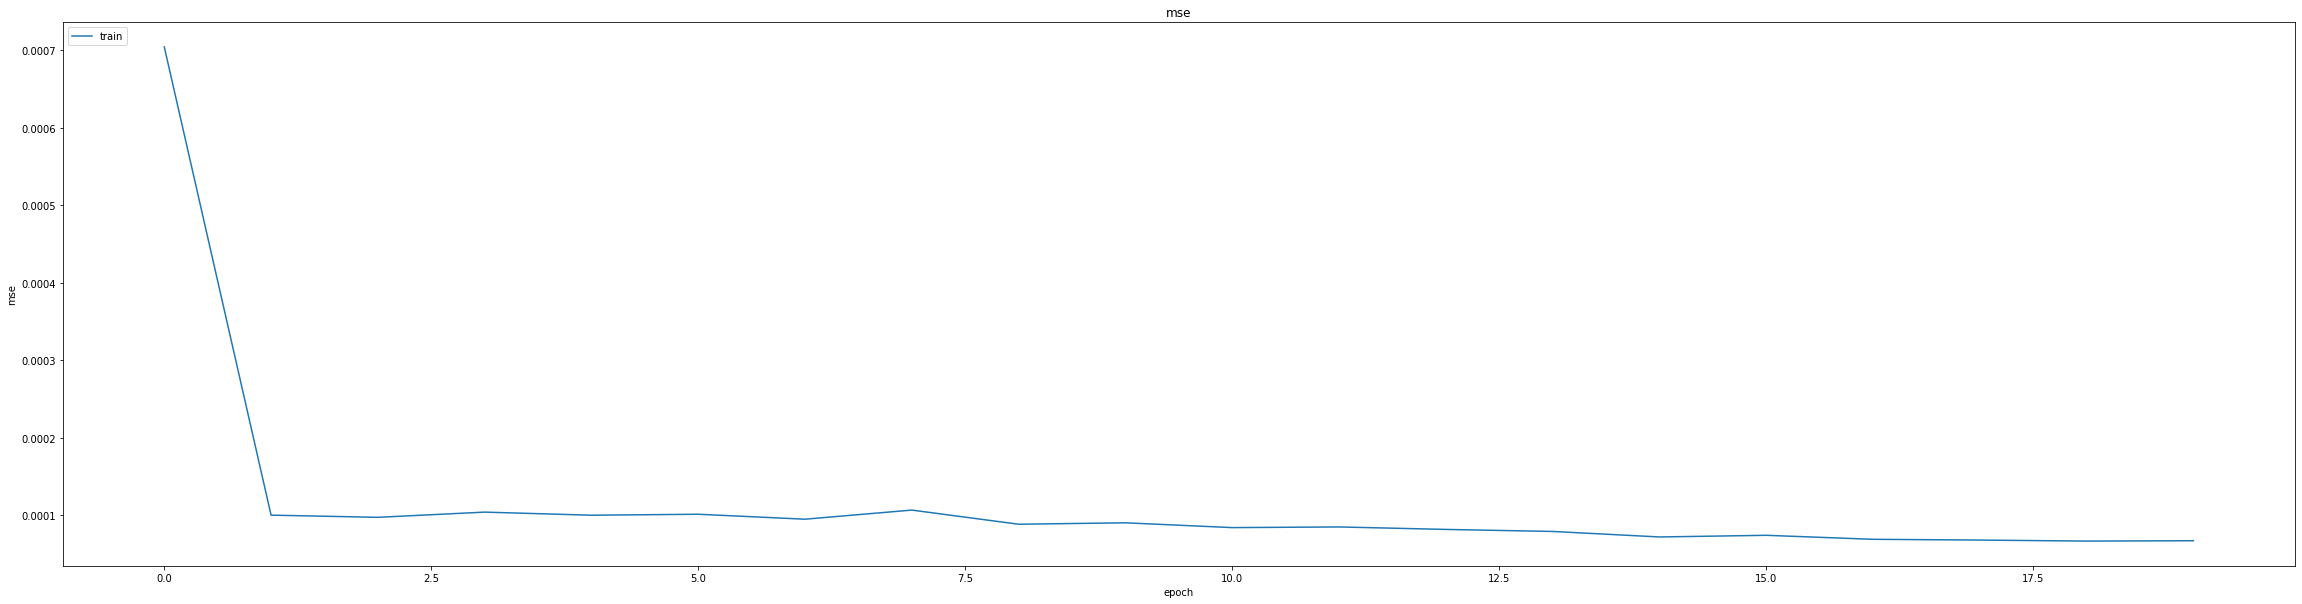

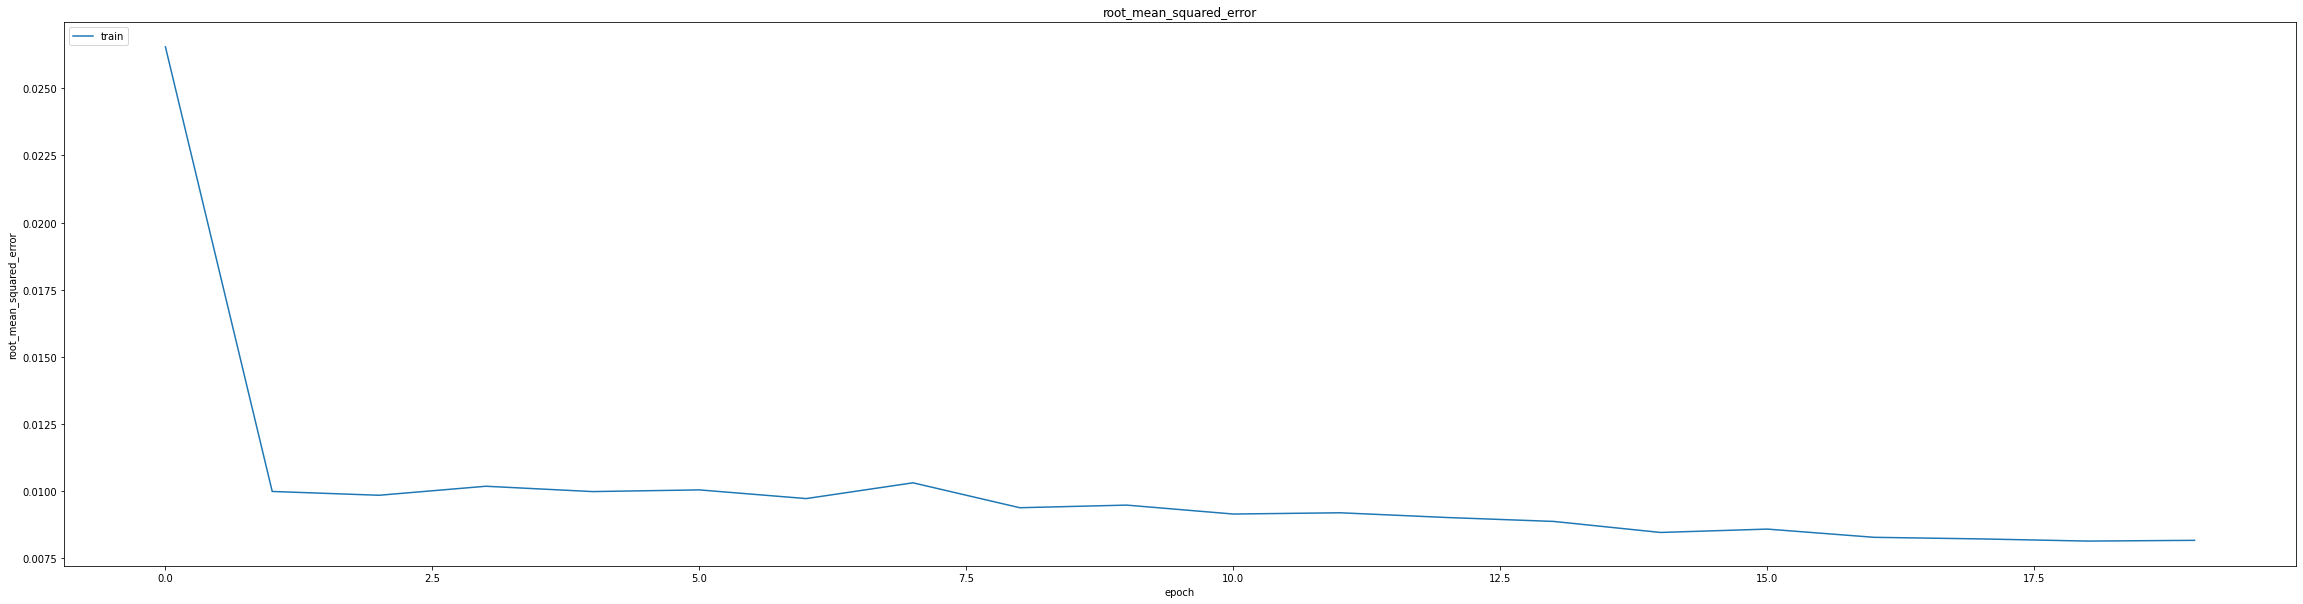

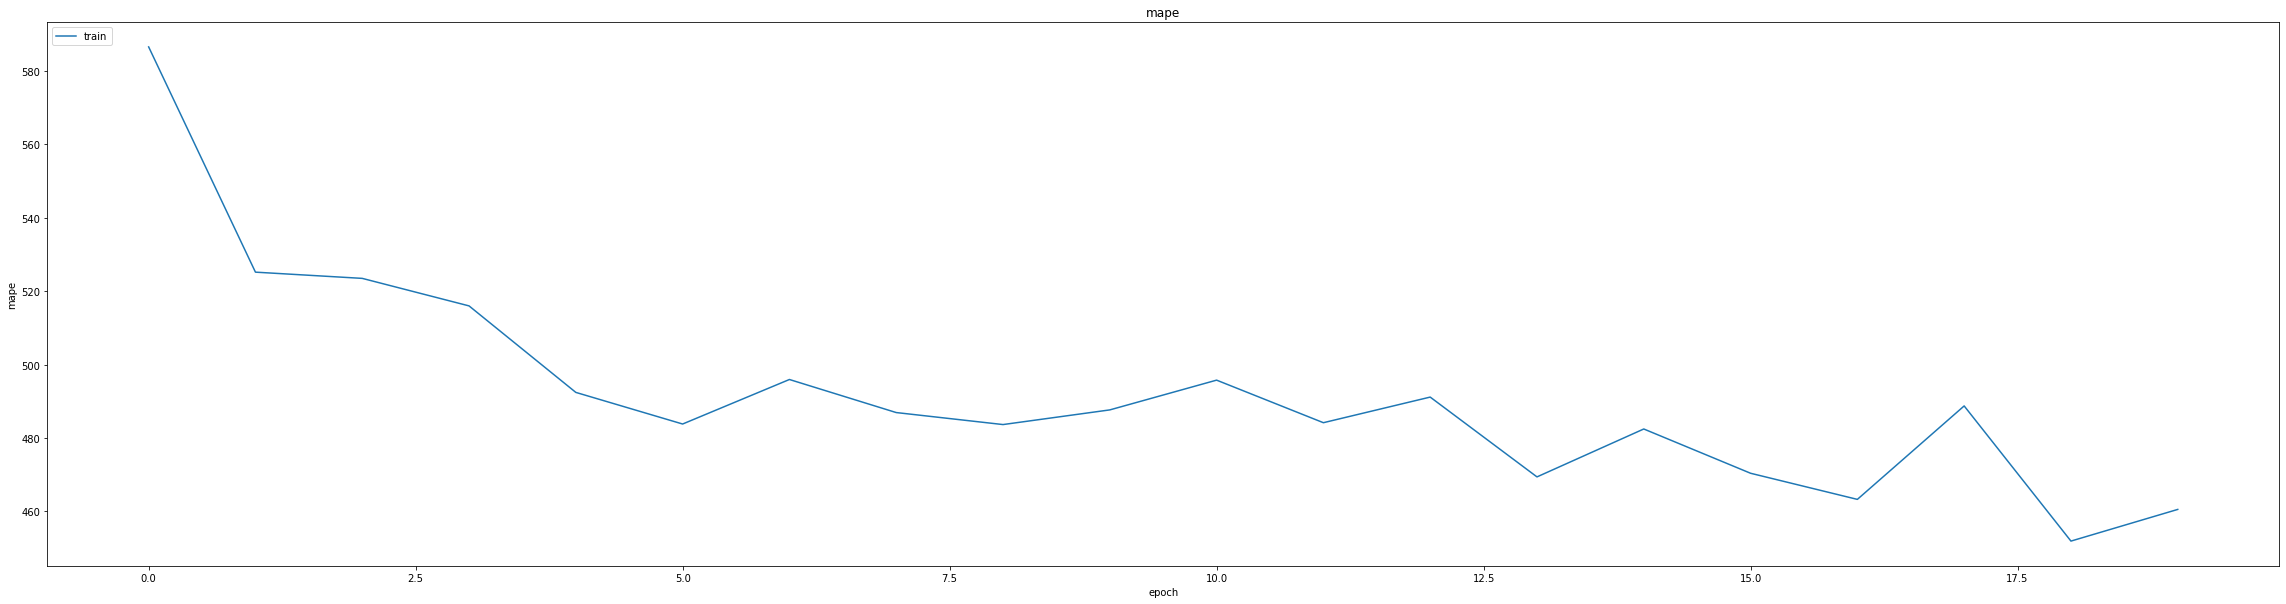

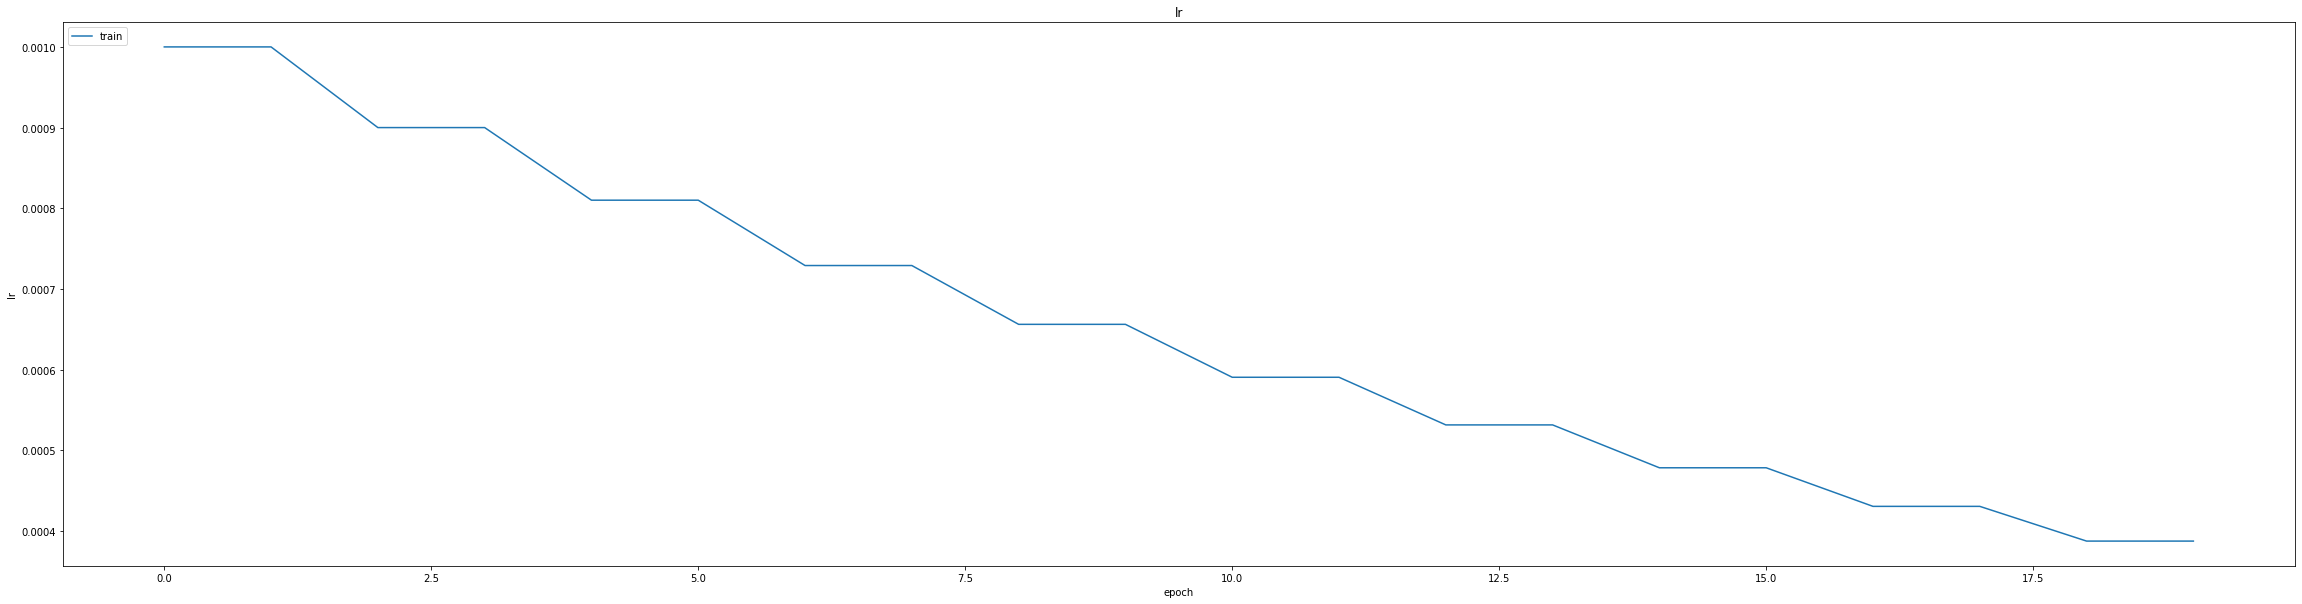

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.007961171679198742
0.007961171679198742
0.010770745575428009
1391/1391 [==============================] - 6s 4ms/step
0.9947071718224039


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD_5min_GRU(60-40)")

1391/1391 [==============================] - 5s 4ms/step


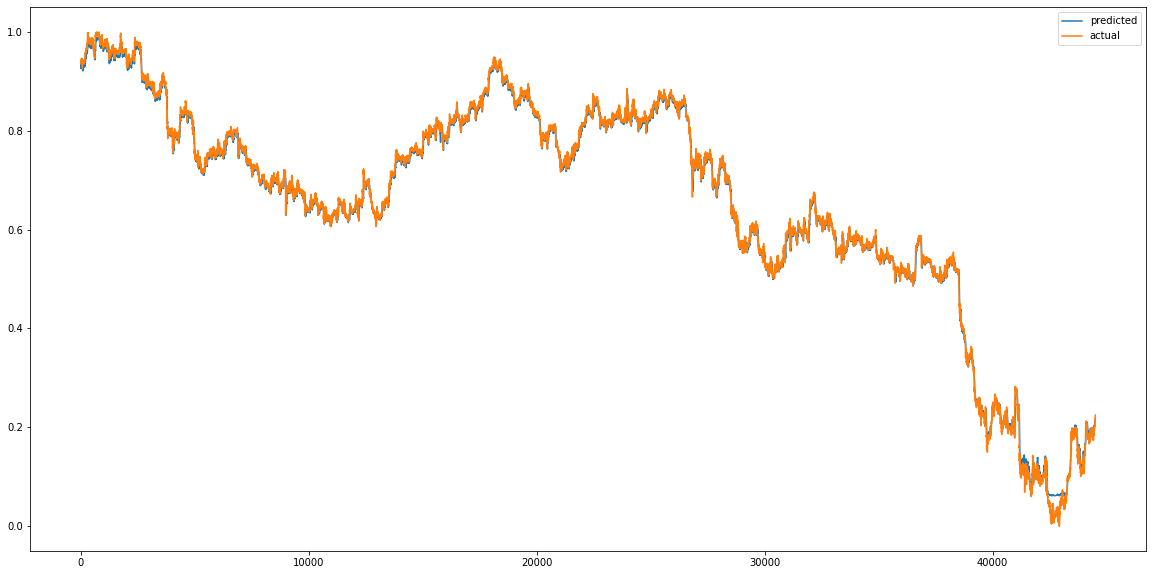

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


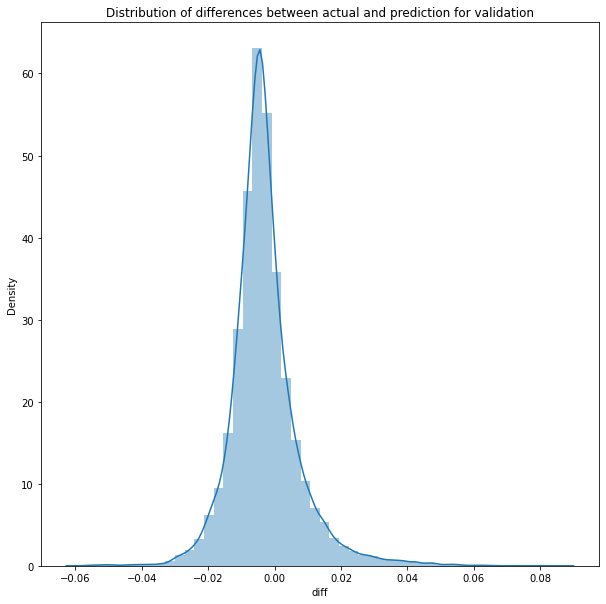

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1391/1391 [==============================] - 5s 4ms/step


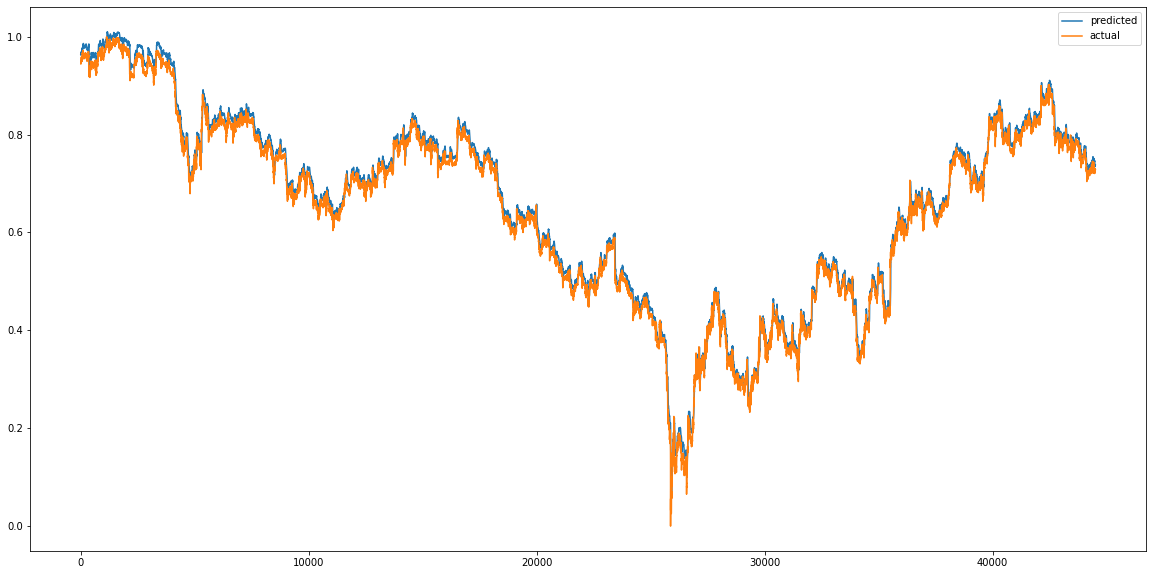

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


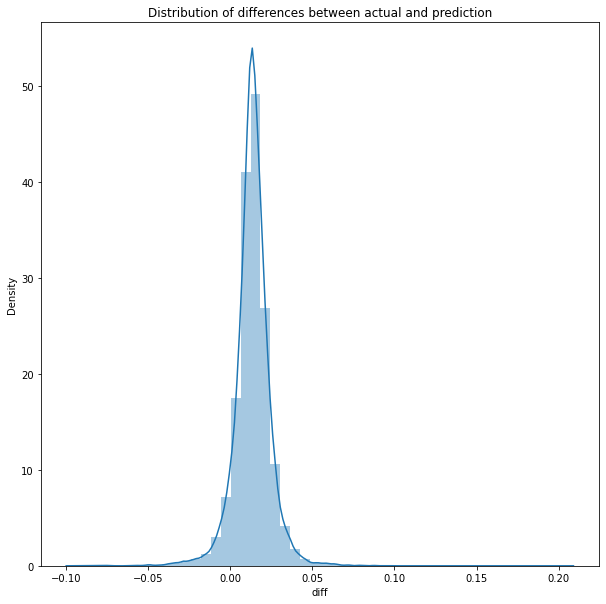

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0003054057116316011
RMSE :  0.017475860826626
MAE :  0.014913802251013514
1391/1391 [==============================] - 5s 4ms/step
R2_Score  : 0.9920323884330392


count    44508.000000
mean         0.013482
std          0.011119
min         -0.096010
25%          0.008429
50%          0.013587
75%          0.018943
max          0.205061
Name: diff, dtype: float64